In [ ]:
!pip install torch==1.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 404.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cpu
    Uninstalling torch-2.5.1+cpu:
      Successfully uninstalled torch-2.5.1+cpu
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cpu requires torch==2.5.1, but you have torch 1.13.1 which is incompatible.
torchvision 0.20.1+cpu requires torch==2.5.1, but you have torch 1.13.1 which is incompatible.


In [ ]:
pip install --upgrade torchvision torchtext torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 906.4/906.4 MB 217.8 MB/s eta 0:00:01
ERROR: Operation cancelled by user


In [ ]:
import copy
import math
import os
from collections import namedtuple

import gym
import ipywidgets as widgets
import matplotlib.pyplot as plt
import more_itertools as mitt

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import tqdm
from tqdm import trange
import random
import time
from collections import deque
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 4]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.__version__)
print(torch.cuda.is_available())

print(torch._dynamo)
print(dir(torch._dynamo))


2.5.1+cu121
False
<module 'torch._dynamo' from '/usr/local/lib/python3.10/dist-packages/torch/_dynamo/__init__.py'>
['GenerationTracker', 'OptimizedModule', '_', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_reset_guarded_backend_cache', '_trace_wrapped_higher_order_op', 'allow_in_graph', 'assume_constant_result', 'backends', 'bytecode_analysis', 'bytecode_transformation', 'cache_size', 'callback', 'callback_handler', 'code_context', 'codegen', 'compiled_autograd', 'comptime', 'config', 'convert_frame', 'create_parameter_op', 'current_scope_id', 'decorators', 'device_interface', 'disable', 'disallow_in_graph', 'distributed', 'eval_frame', 'exc', 'explain', 'export', 'external_utils', 'forbid_in_graph', 'funcname_cache', 'graph_break', 'graph_break_reasons', 'guard_failures', 'guards', 'hooks', 'is_compiling', 'is_dynamo_supported', 'is_inductor_supported', 'list_backends', 'logging', 'lookup_backend', 

In [ ]:
pip install Box2D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 54.1 MB/s eta 0:00:00


In [ ]:
env = gym.make('BipedalWalker-v3')
env_button = {'BipedalWalker-v3': env}

# Set seeds
seed = 88
env.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type swigvarlink has no __module__ attribute
/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/

In [ ]:
# Code based on: CS5180 Homework 6: Deep Q-Networks in Pytorch

def render(env, policy=None):
    """Graphically render an episode using the given policy

    :param env:  Gym environment
    :param policy:  function which maps state to action.  If None, the random
                    policy is used.
    """

    if policy is None:

        def policy(s):
            return env.action_space.sample()

    s = env.reset()
    env.render()

    while True:
        a = policy(s)
        s, _, done, _ = env.step(a)
        env.render()

        if done:
            break

    env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def button_callback(button):
    for b in buttons:
        b.disabled = True

    env = env_button[button.description]
    render(env)
    env.close()

    for b in buttons:
        b.disabled = False

buttons = []
for env_id in env_button.keys():
    button = widgets.Button(description=env_id)
    button.on_click(button_callback)
    buttons.append(button)

print('Click a button to run a random policy:')
widgets.HBox(buttons)

Click a button to run a random policy:


In [ ]:
class Actor(nn.Module):
    def __init__(self, s_size, a_size, a_max):
        super(Actor, self).__init__()

        self.l1 = nn.Linear(s_size, 400)
        self.l2 = nn.Linear(400, 300)
        self.l3 = nn.Linear(300, a_size)

        self.a_max = a_max

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.a_max * torch.tanh(self.l3(x))

        return x

class Critic(nn.Module):
    def __init__(self, s_size, a_size):
        super(Critic, self).__init__()

        self.l1 = nn.Linear(s_size + a_size, 400)
        self.l2 = nn.Linear(400, 300)
        self.l3 = nn.Linear(300, 1)

    def forward(self, x, u):
        xu = torch.cat([x, u], 1)
        x1 = self.l3(F.relu(self.l2(F.relu(self.l1(xu)))))

        return x1

In [ ]:
class Buffer(object):
    def __init__(self, s_size, a_size, max_size=int(1e6)):
        self.max_size = max_size

        self.s = torch.empty((max_size, s_size))
        self.a = torch.empty((max_size, a_size))
        self.n_s = torch.empty((max_size, s_size))
        self.r = torch.empty((max_size, 1))
        self.done = torch.empty((max_size, 1))

        self.idx = 0
        self.size = 0

    def add(self, s, a, n_s,  r, done):

        self.s[self.idx] = torch.as_tensor(s).to(device)
        self.a[self.idx] = torch.as_tensor(a).to(device)
        self.n_s[self.idx] = torch.as_tensor(n_s).to(device)
        self.r[self.idx] = torch.as_tensor(r).to(device)
        self.done[self.idx] = torch.as_tensor(1 - done).to(device)

        self.idx = (self.idx + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample(self, batch_size):
        sample_idx = np.random.randint(0, self.size, size=batch_size)

        s = torch.as_tensor(self.s[sample_idx]).to(device)
        a_cpu = torch.as_tensor(self.a[sample_idx])
        n_s = torch.as_tensor(self.n_s[sample_idx]).to(device)
        r = torch.as_tensor(self.r[sample_idx]).to(device)
        done = torch.as_tensor(self.done[sample_idx]).to(device)

        return (s, a_cpu, n_s, r, done)

In [ ]:
class DDPG(object):
    def __init__(self, s_size, a_size, a_max):
        self.actor = Actor(s_size, a_size, a_max).to(device)
        self.actor_target = Actor(s_size, a_size, a_max).to(device)
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters())

        self.critic = Critic(s_size, a_size).to(device)
        self.critic_target = Critic(s_size, a_size).to(device)
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters())

        self.a_max = a_max

    def Action(self, s):
        s= torch.FloatTensor(s.reshape(1, -1)).to(device)
        return self.actor(s).cpu().data.numpy().flatten()

    def train(self, buffer, iterations, batch_size=100, discount=0.99, \
              tau=0.005, policy_noise=0.2, noise_clip=0.5, policy_freq=2):

        for it in range(iterations):

            # Sample replay buffer
            s, a_cpu, n_s, r, done = buffer.sample(batch_size)
            a = torch.as_tensor(a_cpu).to(device)

            # Select action according to policy and add clipped noise
            noise = torch.FloatTensor(a_cpu).data.normal_(0, policy_noise).to(device)
            noise = noise.clamp(-noise_clip, noise_clip)
            n_a = (self.actor_target(n_s) + noise).clamp(-self.a_max, self.a_max)

            # Compute the target Q valuen_a
            target_Q = self.critic_target(n_s, n_a)
            target_Q = r + (done * discount * target_Q).detach()

            # Get current Q estimates
            current_Q1 = self.critic(s, a)

            # Compute critic loss
            critic_loss = F.mse_loss(current_Q1, target_Q)

            # Optimize the critic
            self.critic_optimizer.zero_grad()
            critic_loss.backward()
            self.critic_optimizer.step()

            # Delayed policy updates
            if it % policy_freq == 0:

                # Compute actor loss
                actor_loss = -self.critic.forward(s, self.actor(s))[0].mean()
                # Optimize the actor
                self.actor_optimizer.zero_grad()
                actor_loss.backward()
                self.actor_optimizer.step()

            # Update the frozen target models
            for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)


In [ ]:
def Train(episodes, save_every=10):

    time_start = time.time()

    T_start = 1e4
    T_total = 0
    steps = 0

    deq_scores = deque(maxlen=100)
    scores = []
    Avg_Scores = []

    a_max = float(env.action_space.high[0])
    a_size = env.action_space.shape[0]
    s_size = env.observation_space.shape[0]

    agent = DDPG(s_size, a_size, a_max)
    buffer = Buffer(s_size, a_size)

    for i in trange(1, episodes + 1):

        timestep = 0
        timestep_max = env._max_episode_steps

        R = 0
        s = env.reset()

        while True:
            if T_total < T_start:
                a = env.action_space.sample()

            else:
                a = agent.Action(np.array(s)) + np.random.normal(0, 0.1, size = a_size)
                a = (a).clip(env.action_space.low, env.action_space.high)

            n_s, r, done, _ = env.step(a)

            timestep += 1
            T_total += 1
            steps += 1

            R += r
            done_ = done

            if timestep == timestep_max:
                done_ = 0

            buffer.add(s, a, n_s, r, done_)
            s = n_s

            if done:
                break

        deq_scores.append(R)
        scores.append(R)

        avg_score = np.mean(deq_scores)
        Avg_Scores.append(avg_score)

        s = (int)(time.time() - time_start)
        print('Ep. {}, Timestep {},  Ep.Timesteps {}, Score: {:.2f}, Avg.Score: {:.2f}, Time: {:02}:{:02}:{:02} '\
                .format(i, T_total, timestep, \
                        R, avg_score, s//3600, s%3600//60, s%60))

        agent.train(buffer, timestep)

        if len(deq_scores) == 100 and np.mean(deq_scores) >= 300.5:
            print('Environment solved with Average Score: ',  np.mean(deq_scores) )
            break

    return scores, Avg_Scores

In [ ]:
scores, Avg_Scores = Train(episodes = 2000)

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Ep. 1, Timestep 1600,  Ep.Timesteps 1600, Score: -76.15, Avg.Score: -76.15, Time: 00:00:02 


  0%|          | 1/2000 [00:29<16:35:34, 29.88s/it]

Ep. 2, Timestep 3200,  Ep.Timesteps 1600, Score: -83.79, Avg.Score: -79.97, Time: 00:00:31 


  0%|          | 2/2000 [00:51<13:46:10, 24.81s/it]

Ep. 3, Timestep 3248,  Ep.Timesteps 48, Score: -111.73, Avg.Score: -90.56, Time: 00:00:51 


  0%|          | 3/2000 [00:51<7:37:59, 13.76s/it] 

Ep. 4, Timestep 3370,  Ep.Timesteps 122, Score: -101.02, Avg.Score: -93.17, Time: 00:00:51 


  0%|          | 4/2000 [00:53<4:57:00,  8.93s/it]

Ep. 5, Timestep 3420,  Ep.Timesteps 50, Score: -109.94, Avg.Score: -96.53, Time: 00:00:53 


  0%|          | 5/2000 [00:53<3:17:18,  5.93s/it]

Ep. 6, Timestep 3554,  Ep.Timesteps 134, Score: -122.80, Avg.Score: -100.90, Time: 00:00:54 


  0%|          | 6/2000 [00:56<2:35:22,  4.68s/it]

Ep. 7, Timestep 3619,  Ep.Timesteps 65, Score: -119.38, Avg.Score: -103.54, Time: 00:00:56 


  0%|          | 7/2000 [00:57<1:57:18,  3.53s/it]

Ep. 8, Timestep 5219,  Ep.Timesteps 1600, Score: -92.06, Avg.Score: -102.11, Time: 00:00:58 


  0%|          | 8/2000 [01:19<5:09:29,  9.32s/it]

Ep. 9, Timestep 6819,  Ep.Timesteps 1600, Score: -77.25, Avg.Score: -99.35, Time: 00:01:19 


  0%|          | 9/2000 [01:41<7:28:05, 13.50s/it]

Ep. 10, Timestep 8419,  Ep.Timesteps 1600, Score: -77.35, Avg.Score: -97.15, Time: 00:01:42 


  0%|          | 10/2000 [02:04<9:02:54, 16.37s/it]

Ep. 11, Timestep 8477,  Ep.Timesteps 58, Score: -108.02, Avg.Score: -98.14, Time: 00:02:04 


  1%|          | 11/2000 [02:05<6:24:27, 11.60s/it]

Ep. 12, Timestep 10061,  Ep.Timesteps 1584, Score: -207.35, Avg.Score: -107.24, Time: 00:02:06 


  1%|          | 12/2000 [02:27<8:14:00, 14.91s/it]

Ep. 13, Timestep 11661,  Ep.Timesteps 1600, Score: -169.62, Avg.Score: -112.04, Time: 00:02:28 


  1%|          | 13/2000 [02:50<9:27:42, 17.14s/it]

Ep. 14, Timestep 13261,  Ep.Timesteps 1600, Score: -169.46, Avg.Score: -116.14, Time: 00:02:51 


  1%|          | 14/2000 [03:13<10:27:59, 18.97s/it]

Ep. 15, Timestep 14861,  Ep.Timesteps 1600, Score: -170.26, Avg.Score: -119.75, Time: 00:03:14 


  1%|          | 15/2000 [03:36<11:14:53, 20.40s/it]

Ep. 16, Timestep 16461,  Ep.Timesteps 1600, Score: -170.25, Avg.Score: -122.90, Time: 00:03:38 


  1%|          | 16/2000 [04:00<11:42:00, 21.23s/it]

Ep. 17, Timestep 18061,  Ep.Timesteps 1600, Score: -170.35, Avg.Score: -125.69, Time: 00:04:01 


  1%|          | 17/2000 [04:22<11:56:10, 21.67s/it]

Ep. 18, Timestep 19661,  Ep.Timesteps 1600, Score: -170.17, Avg.Score: -128.16, Time: 00:04:24 


  1%|          | 18/2000 [04:45<12:03:15, 21.90s/it]

Ep. 19, Timestep 21261,  Ep.Timesteps 1600, Score: -170.47, Avg.Score: -130.39, Time: 00:04:46 


  1%|          | 19/2000 [05:08<12:11:57, 22.17s/it]

Ep. 20, Timestep 21394,  Ep.Timesteps 133, Score: -115.68, Avg.Score: -129.66, Time: 00:05:08 


  1%|          | 20/2000 [05:09<8:49:34, 16.05s/it] 

Ep. 21, Timestep 21531,  Ep.Timesteps 137, Score: -115.94, Avg.Score: -129.00, Time: 00:05:09 


  1%|          | 21/2000 [05:11<6:28:55, 11.79s/it]

Ep. 22, Timestep 21663,  Ep.Timesteps 132, Score: -115.60, Avg.Score: -128.39, Time: 00:05:11 


  1%|          | 22/2000 [05:13<4:53:52,  8.91s/it]

Ep. 23, Timestep 21701,  Ep.Timesteps 38, Score: -118.83, Avg.Score: -127.98, Time: 00:05:14 


  1%|          | 23/2000 [05:14<3:33:05,  6.47s/it]

Ep. 24, Timestep 21842,  Ep.Timesteps 141, Score: -115.92, Avg.Score: -127.48, Time: 00:05:14 


  1%|          | 24/2000 [05:16<2:50:19,  5.17s/it]

Ep. 25, Timestep 21917,  Ep.Timesteps 75, Score: -112.10, Avg.Score: -126.86, Time: 00:05:16 


  1%|▏         | 25/2000 [05:17<2:09:16,  3.93s/it]

Ep. 26, Timestep 22072,  Ep.Timesteps 155, Score: -117.73, Avg.Score: -126.51, Time: 00:05:18 


  1%|▏         | 26/2000 [05:19<1:50:59,  3.37s/it]

Ep. 27, Timestep 22148,  Ep.Timesteps 76, Score: -112.14, Avg.Score: -125.98, Time: 00:05:20 


  1%|▏         | 27/2000 [05:20<1:28:14,  2.68s/it]

Ep. 28, Timestep 22285,  Ep.Timesteps 137, Score: -116.13, Avg.Score: -125.63, Time: 00:05:21 


  1%|▏         | 28/2000 [05:22<1:19:50,  2.43s/it]

Ep. 29, Timestep 22355,  Ep.Timesteps 70, Score: -112.42, Avg.Score: -125.17, Time: 00:05:22 


  1%|▏         | 29/2000 [05:23<1:05:26,  1.99s/it]

Ep. 30, Timestep 22487,  Ep.Timesteps 132, Score: -115.60, Avg.Score: -124.85, Time: 00:05:23 


  2%|▏         | 30/2000 [05:25<1:04:23,  1.96s/it]

Ep. 31, Timestep 22573,  Ep.Timesteps 86, Score: -112.98, Avg.Score: -124.47, Time: 00:05:25 


  2%|▏         | 31/2000 [05:27<1:01:08,  1.86s/it]

Ep. 32, Timestep 22706,  Ep.Timesteps 133, Score: -115.69, Avg.Score: -124.19, Time: 00:05:27 


  2%|▏         | 32/2000 [05:29<1:02:49,  1.92s/it]

Ep. 33, Timestep 22842,  Ep.Timesteps 136, Score: -115.35, Avg.Score: -123.93, Time: 00:05:29 


  2%|▏         | 33/2000 [05:31<1:02:01,  1.89s/it]

Ep. 34, Timestep 22995,  Ep.Timesteps 153, Score: -117.55, Avg.Score: -123.74, Time: 00:05:31 


  2%|▏         | 34/2000 [05:33<1:03:39,  1.94s/it]

Ep. 35, Timestep 23080,  Ep.Timesteps 85, Score: -112.51, Avg.Score: -123.42, Time: 00:05:33 


  2%|▏         | 35/2000 [05:34<55:57,  1.71s/it]  

Ep. 36, Timestep 23220,  Ep.Timesteps 140, Score: -116.05, Avg.Score: -123.21, Time: 00:05:34 


  2%|▏         | 36/2000 [05:36<57:37,  1.76s/it]

Ep. 37, Timestep 23356,  Ep.Timesteps 136, Score: -115.94, Avg.Score: -123.02, Time: 00:05:36 


  2%|▏         | 37/2000 [05:38<58:14,  1.78s/it]

Ep. 38, Timestep 23485,  Ep.Timesteps 129, Score: -115.02, Avg.Score: -122.81, Time: 00:05:38 


  2%|▏         | 38/2000 [05:40<1:04:35,  1.98s/it]

Ep. 39, Timestep 23608,  Ep.Timesteps 123, Score: -114.72, Avg.Score: -122.60, Time: 00:05:40 


  2%|▏         | 39/2000 [05:42<1:02:46,  1.92s/it]

Ep. 40, Timestep 23749,  Ep.Timesteps 141, Score: -115.93, Avg.Score: -122.43, Time: 00:05:42 


  2%|▏         | 40/2000 [05:44<1:02:32,  1.91s/it]

Ep. 41, Timestep 23856,  Ep.Timesteps 107, Score: -114.59, Avg.Score: -122.24, Time: 00:05:44 


  2%|▏         | 41/2000 [05:45<58:00,  1.78s/it]  

Ep. 42, Timestep 25456,  Ep.Timesteps 1600, Score: -174.10, Avg.Score: -123.47, Time: 00:05:46 


  2%|▏         | 42/2000 [06:08<4:25:38,  8.14s/it]

Ep. 43, Timestep 25493,  Ep.Timesteps 37, Score: -118.21, Avg.Score: -123.35, Time: 00:06:08 


  2%|▏         | 43/2000 [06:09<3:10:57,  5.85s/it]

Ep. 44, Timestep 25601,  Ep.Timesteps 108, Score: -113.48, Avg.Score: -123.13, Time: 00:06:09 


  2%|▏         | 44/2000 [06:10<2:28:00,  4.54s/it]

Ep. 45, Timestep 25746,  Ep.Timesteps 145, Score: -116.68, Avg.Score: -122.98, Time: 00:06:10 


  2%|▏         | 45/2000 [06:12<2:03:04,  3.78s/it]

Ep. 46, Timestep 25867,  Ep.Timesteps 121, Score: -114.57, Avg.Score: -122.80, Time: 00:06:12 


  2%|▏         | 46/2000 [06:14<1:41:58,  3.13s/it]

Ep. 47, Timestep 25943,  Ep.Timesteps 76, Score: -112.15, Avg.Score: -122.58, Time: 00:06:14 


  2%|▏         | 47/2000 [06:15<1:21:28,  2.50s/it]

Ep. 48, Timestep 25984,  Ep.Timesteps 41, Score: -121.51, Avg.Score: -122.55, Time: 00:06:15 


  2%|▏         | 48/2000 [06:15<1:02:29,  1.92s/it]

Ep. 49, Timestep 26133,  Ep.Timesteps 149, Score: -116.79, Avg.Score: -122.44, Time: 00:06:16 


  2%|▏         | 49/2000 [06:18<1:07:24,  2.07s/it]

Ep. 50, Timestep 26280,  Ep.Timesteps 147, Score: -116.84, Avg.Score: -122.32, Time: 00:06:18 


  2%|▎         | 50/2000 [06:20<1:10:54,  2.18s/it]

Ep. 51, Timestep 26363,  Ep.Timesteps 83, Score: -112.27, Avg.Score: -122.13, Time: 00:06:20 


  3%|▎         | 51/2000 [06:21<1:00:42,  1.87s/it]

Ep. 52, Timestep 26474,  Ep.Timesteps 111, Score: -114.91, Avg.Score: -121.99, Time: 00:06:22 


  3%|▎         | 52/2000 [06:23<56:50,  1.75s/it]  

Ep. 53, Timestep 26607,  Ep.Timesteps 133, Score: -115.24, Avg.Score: -121.86, Time: 00:06:23 


  3%|▎         | 53/2000 [06:25<57:13,  1.76s/it]

Ep. 54, Timestep 26788,  Ep.Timesteps 181, Score: -119.37, Avg.Score: -121.81, Time: 00:06:25 


  3%|▎         | 54/2000 [06:27<1:03:43,  1.96s/it]

Ep. 55, Timestep 26928,  Ep.Timesteps 140, Score: -116.01, Avg.Score: -121.71, Time: 00:06:27 


  3%|▎         | 55/2000 [06:29<1:02:39,  1.93s/it]

Ep. 56, Timestep 26999,  Ep.Timesteps 71, Score: -112.17, Avg.Score: -121.54, Time: 00:06:29 


  3%|▎         | 56/2000 [06:30<55:55,  1.73s/it]  

Ep. 57, Timestep 27076,  Ep.Timesteps 77, Score: -112.20, Avg.Score: -121.37, Time: 00:06:30 


  3%|▎         | 57/2000 [06:32<53:29,  1.65s/it]

Ep. 58, Timestep 27205,  Ep.Timesteps 129, Score: -115.25, Avg.Score: -121.27, Time: 00:06:32 


  3%|▎         | 58/2000 [06:34<55:47,  1.72s/it]

Ep. 59, Timestep 27425,  Ep.Timesteps 220, Score: -123.71, Avg.Score: -121.31, Time: 00:06:34 


  3%|▎         | 59/2000 [06:36<1:07:18,  2.08s/it]

Ep. 60, Timestep 27506,  Ep.Timesteps 81, Score: -112.38, Avg.Score: -121.16, Time: 00:06:37 


  3%|▎         | 60/2000 [06:38<58:00,  1.79s/it]  

Ep. 61, Timestep 27658,  Ep.Timesteps 152, Score: -116.95, Avg.Score: -121.09, Time: 00:06:38 


  3%|▎         | 61/2000 [06:40<1:00:32,  1.87s/it]

Ep. 62, Timestep 27746,  Ep.Timesteps 88, Score: -113.04, Avg.Score: -120.96, Time: 00:06:40 


  3%|▎         | 62/2000 [06:41<53:41,  1.66s/it]  

Ep. 63, Timestep 27783,  Ep.Timesteps 37, Score: -117.39, Avg.Score: -120.91, Time: 00:06:41 


  3%|▎         | 63/2000 [06:41<42:30,  1.32s/it]

Ep. 64, Timestep 27824,  Ep.Timesteps 41, Score: -119.65, Avg.Score: -120.89, Time: 00:06:41 


  3%|▎         | 64/2000 [06:42<35:13,  1.09s/it]

Ep. 65, Timestep 27865,  Ep.Timesteps 41, Score: -121.60, Avg.Score: -120.90, Time: 00:06:42 


  3%|▎         | 65/2000 [06:43<31:00,  1.04it/s]

Ep. 66, Timestep 27976,  Ep.Timesteps 111, Score: -113.88, Avg.Score: -120.79, Time: 00:06:43 


  3%|▎         | 66/2000 [06:45<42:05,  1.31s/it]

Ep. 67, Timestep 28095,  Ep.Timesteps 119, Score: -115.16, Avg.Score: -120.71, Time: 00:06:45 


  3%|▎         | 67/2000 [06:46<46:29,  1.44s/it]

Ep. 68, Timestep 28205,  Ep.Timesteps 110, Score: -113.70, Avg.Score: -120.60, Time: 00:06:47 


  3%|▎         | 68/2000 [06:48<46:45,  1.45s/it]

Ep. 69, Timestep 28328,  Ep.Timesteps 123, Score: -115.47, Avg.Score: -120.53, Time: 00:06:48 


  3%|▎         | 69/2000 [06:50<48:53,  1.52s/it]

Ep. 70, Timestep 28450,  Ep.Timesteps 122, Score: -114.23, Avg.Score: -120.44, Time: 00:06:50 


  4%|▎         | 70/2000 [06:51<50:10,  1.56s/it]

Ep. 71, Timestep 28563,  Ep.Timesteps 113, Score: -114.62, Avg.Score: -120.36, Time: 00:06:51 


  4%|▎         | 71/2000 [06:53<49:52,  1.55s/it]

Ep. 72, Timestep 28691,  Ep.Timesteps 128, Score: -115.25, Avg.Score: -120.29, Time: 00:06:53 


  4%|▎         | 72/2000 [06:55<51:31,  1.60s/it]

Ep. 73, Timestep 28806,  Ep.Timesteps 115, Score: -114.21, Avg.Score: -120.20, Time: 00:06:55 


  4%|▎         | 73/2000 [06:56<54:12,  1.69s/it]

Ep. 74, Timestep 28922,  Ep.Timesteps 116, Score: -114.35, Avg.Score: -120.12, Time: 00:06:57 


  4%|▎         | 74/2000 [06:58<57:49,  1.80s/it]

Ep. 75, Timestep 29033,  Ep.Timesteps 111, Score: -113.99, Avg.Score: -120.04, Time: 00:06:59 


  4%|▍         | 75/2000 [07:00<54:56,  1.71s/it]

Ep. 76, Timestep 29167,  Ep.Timesteps 134, Score: -115.85, Avg.Score: -119.99, Time: 00:07:00 


  4%|▍         | 76/2000 [07:02<55:49,  1.74s/it]

Ep. 77, Timestep 29208,  Ep.Timesteps 41, Score: -119.45, Avg.Score: -119.98, Time: 00:07:02 


  4%|▍         | 77/2000 [07:02<44:24,  1.39s/it]

Ep. 78, Timestep 29249,  Ep.Timesteps 41, Score: -119.63, Avg.Score: -119.98, Time: 00:07:02 


  4%|▍         | 78/2000 [07:03<36:34,  1.14s/it]

Ep. 79, Timestep 29342,  Ep.Timesteps 93, Score: -113.05, Avg.Score: -119.89, Time: 00:07:03 


  4%|▍         | 79/2000 [07:04<37:38,  1.18s/it]

Ep. 80, Timestep 30942,  Ep.Timesteps 1600, Score: -177.34, Avg.Score: -120.61, Time: 00:07:05 


  4%|▍         | 80/2000 [07:27<4:07:48,  7.74s/it]

Ep. 81, Timestep 32542,  Ep.Timesteps 1600, Score: -171.67, Avg.Score: -121.24, Time: 00:07:28 


  4%|▍         | 81/2000 [07:51<6:39:08, 12.48s/it]

Ep. 82, Timestep 34142,  Ep.Timesteps 1600, Score: -171.09, Avg.Score: -121.84, Time: 00:07:52 


  4%|▍         | 82/2000 [08:13<8:16:41, 15.54s/it]

Ep. 83, Timestep 34190,  Ep.Timesteps 48, Score: -125.02, Avg.Score: -121.88, Time: 00:08:14 


  4%|▍         | 83/2000 [08:14<5:56:34, 11.16s/it]

Ep. 84, Timestep 35790,  Ep.Timesteps 1600, Score: -176.56, Avg.Score: -122.53, Time: 00:08:16 


  4%|▍         | 84/2000 [08:37<7:47:45, 14.65s/it]

Ep. 85, Timestep 35846,  Ep.Timesteps 56, Score: -101.80, Avg.Score: -122.29, Time: 00:08:37 


  4%|▍         | 85/2000 [08:38<5:34:32, 10.48s/it]

Ep. 86, Timestep 35896,  Ep.Timesteps 50, Score: -108.87, Avg.Score: -122.13, Time: 00:08:38 


  4%|▍         | 86/2000 [08:39<4:00:51,  7.55s/it]

Ep. 87, Timestep 36013,  Ep.Timesteps 117, Score: -105.07, Avg.Score: -121.94, Time: 00:08:39 


  4%|▍         | 87/2000 [08:41<3:10:13,  5.97s/it]

Ep. 88, Timestep 36077,  Ep.Timesteps 64, Score: -105.39, Avg.Score: -121.75, Time: 00:08:41 


  4%|▍         | 88/2000 [08:42<2:23:22,  4.50s/it]

Ep. 89, Timestep 36135,  Ep.Timesteps 58, Score: -105.05, Avg.Score: -121.56, Time: 00:08:42 


  4%|▍         | 89/2000 [08:43<1:47:53,  3.39s/it]

Ep. 90, Timestep 36186,  Ep.Timesteps 51, Score: -107.63, Avg.Score: -121.41, Time: 00:08:43 


  4%|▍         | 90/2000 [08:44<1:22:39,  2.60s/it]

Ep. 91, Timestep 36250,  Ep.Timesteps 64, Score: -104.94, Avg.Score: -121.23, Time: 00:08:44 


  5%|▍         | 91/2000 [08:44<1:06:25,  2.09s/it]

Ep. 92, Timestep 36300,  Ep.Timesteps 50, Score: -108.38, Avg.Score: -121.09, Time: 00:08:45 


  5%|▍         | 92/2000 [08:45<53:09,  1.67s/it]  

Ep. 93, Timestep 36352,  Ep.Timesteps 52, Score: -107.27, Avg.Score: -120.94, Time: 00:08:45 


  5%|▍         | 93/2000 [08:46<44:15,  1.39s/it]

Ep. 94, Timestep 36406,  Ep.Timesteps 54, Score: -107.55, Avg.Score: -120.80, Time: 00:08:46 


  5%|▍         | 94/2000 [08:47<38:08,  1.20s/it]

Ep. 95, Timestep 36459,  Ep.Timesteps 53, Score: -107.17, Avg.Score: -120.65, Time: 00:08:47 


  5%|▍         | 95/2000 [08:47<33:56,  1.07s/it]

Ep. 96, Timestep 36510,  Ep.Timesteps 51, Score: -107.32, Avg.Score: -120.51, Time: 00:08:47 


  5%|▍         | 96/2000 [08:48<30:32,  1.04it/s]

Ep. 97, Timestep 36560,  Ep.Timesteps 50, Score: -106.60, Avg.Score: -120.37, Time: 00:08:48 


  5%|▍         | 97/2000 [08:49<27:54,  1.14it/s]

Ep. 98, Timestep 36610,  Ep.Timesteps 50, Score: -104.95, Avg.Score: -120.21, Time: 00:08:49 


  5%|▍         | 98/2000 [08:50<26:17,  1.21it/s]

Ep. 99, Timestep 36662,  Ep.Timesteps 52, Score: -102.94, Avg.Score: -120.04, Time: 00:08:50 


  5%|▍         | 99/2000 [08:50<25:24,  1.25it/s]

Ep. 100, Timestep 36719,  Ep.Timesteps 57, Score: -102.32, Avg.Score: -119.86, Time: 00:08:50 


  5%|▌         | 100/2000 [08:51<25:14,  1.25it/s]

Ep. 101, Timestep 36771,  Ep.Timesteps 52, Score: -104.17, Avg.Score: -120.14, Time: 00:08:51 


  5%|▌         | 101/2000 [08:52<25:12,  1.26it/s]

Ep. 102, Timestep 36824,  Ep.Timesteps 53, Score: -102.86, Avg.Score: -120.33, Time: 00:08:52 


  5%|▌         | 102/2000 [08:53<27:32,  1.15it/s]

Ep. 103, Timestep 36879,  Ep.Timesteps 55, Score: -103.66, Avg.Score: -120.25, Time: 00:08:53 


  5%|▌         | 103/2000 [08:54<29:39,  1.07it/s]

Ep. 104, Timestep 36930,  Ep.Timesteps 51, Score: -104.65, Avg.Score: -120.29, Time: 00:08:54 


  5%|▌         | 104/2000 [08:55<29:30,  1.07it/s]

Ep. 105, Timestep 36983,  Ep.Timesteps 53, Score: -102.85, Avg.Score: -120.22, Time: 00:08:55 


  5%|▌         | 105/2000 [08:56<27:42,  1.14it/s]

Ep. 106, Timestep 37035,  Ep.Timesteps 52, Score: -103.70, Avg.Score: -120.03, Time: 00:08:56 


  5%|▌         | 106/2000 [08:56<26:07,  1.21it/s]

Ep. 107, Timestep 37080,  Ep.Timesteps 45, Score: -104.21, Avg.Score: -119.87, Time: 00:08:56 


  5%|▌         | 107/2000 [08:57<24:24,  1.29it/s]

Ep. 108, Timestep 37139,  Ep.Timesteps 59, Score: -103.18, Avg.Score: -119.99, Time: 00:08:57 


  5%|▌         | 108/2000 [08:58<24:52,  1.27it/s]

Ep. 109, Timestep 37201,  Ep.Timesteps 62, Score: -102.37, Avg.Score: -120.24, Time: 00:08:58 


  5%|▌         | 109/2000 [08:59<25:26,  1.24it/s]

Ep. 110, Timestep 37259,  Ep.Timesteps 58, Score: -102.36, Avg.Score: -120.49, Time: 00:08:59 


  6%|▌         | 110/2000 [08:59<25:26,  1.24it/s]

Ep. 111, Timestep 37312,  Ep.Timesteps 53, Score: -102.30, Avg.Score: -120.43, Time: 00:09:00 


  6%|▌         | 111/2000 [09:00<25:15,  1.25it/s]

Ep. 112, Timestep 37373,  Ep.Timesteps 61, Score: -103.95, Avg.Score: -119.40, Time: 00:09:00 


  6%|▌         | 112/2000 [09:01<25:56,  1.21it/s]

Ep. 113, Timestep 37443,  Ep.Timesteps 70, Score: -103.57, Avg.Score: -118.73, Time: 00:09:01 


  6%|▌         | 113/2000 [09:02<27:14,  1.15it/s]

Ep. 114, Timestep 37516,  Ep.Timesteps 73, Score: -104.16, Avg.Score: -118.08, Time: 00:09:02 


  6%|▌         | 114/2000 [09:03<28:32,  1.10it/s]

Ep. 115, Timestep 37566,  Ep.Timesteps 50, Score: -104.16, Avg.Score: -117.42, Time: 00:09:03 


  6%|▌         | 115/2000 [09:04<26:30,  1.19it/s]

Ep. 116, Timestep 37617,  Ep.Timesteps 51, Score: -104.96, Avg.Score: -116.77, Time: 00:09:04 


  6%|▌         | 116/2000 [09:05<25:11,  1.25it/s]

Ep. 117, Timestep 37668,  Ep.Timesteps 51, Score: -103.39, Avg.Score: -116.10, Time: 00:09:05 


  6%|▌         | 117/2000 [09:05<26:36,  1.18it/s]

Ep. 118, Timestep 39268,  Ep.Timesteps 1600, Score: -155.63, Avg.Score: -115.95, Time: 00:09:07 


  6%|▌         | 118/2000 [09:29<3:56:18,  7.53s/it]

Ep. 119, Timestep 39349,  Ep.Timesteps 81, Score: -102.18, Avg.Score: -115.27, Time: 00:09:29 


  6%|▌         | 119/2000 [09:30<2:55:48,  5.61s/it]

Ep. 120, Timestep 39469,  Ep.Timesteps 120, Score: -130.25, Avg.Score: -115.42, Time: 00:09:30 


  6%|▌         | 120/2000 [09:32<2:22:11,  4.54s/it]

Ep. 121, Timestep 41069,  Ep.Timesteps 1600, Score: -160.20, Avg.Score: -115.86, Time: 00:09:33 


  6%|▌         | 121/2000 [09:55<5:17:48, 10.15s/it]

Ep. 122, Timestep 42669,  Ep.Timesteps 1600, Score: -170.20, Avg.Score: -116.40, Time: 00:09:56 


  6%|▌         | 122/2000 [10:19<7:24:55, 14.21s/it]

Ep. 123, Timestep 44269,  Ep.Timesteps 1600, Score: -170.09, Avg.Score: -116.92, Time: 00:10:20 


  6%|▌         | 123/2000 [10:43<8:55:02, 17.10s/it]

Ep. 124, Timestep 45869,  Ep.Timesteps 1600, Score: -169.53, Avg.Score: -117.45, Time: 00:10:44 


  6%|▌         | 124/2000 [11:07<10:00:34, 19.21s/it]

Ep. 125, Timestep 47469,  Ep.Timesteps 1600, Score: -169.70, Avg.Score: -118.03, Time: 00:11:08 


  6%|▋         | 125/2000 [11:31<10:48:33, 20.75s/it]

Ep. 126, Timestep 47540,  Ep.Timesteps 71, Score: -105.59, Avg.Score: -117.91, Time: 00:11:31 


  6%|▋         | 126/2000 [11:32<7:43:25, 14.84s/it] 

Ep. 127, Timestep 47706,  Ep.Timesteps 166, Score: -126.31, Avg.Score: -118.05, Time: 00:11:32 


  6%|▋         | 127/2000 [11:34<5:46:22, 11.10s/it]

Ep. 128, Timestep 47796,  Ep.Timesteps 90, Score: -104.86, Avg.Score: -117.94, Time: 00:11:35 


  6%|▋         | 128/2000 [11:36<4:14:23,  8.15s/it]

Ep. 129, Timestep 48094,  Ep.Timesteps 298, Score: -153.04, Avg.Score: -118.34, Time: 00:11:36 


  6%|▋         | 129/2000 [11:40<3:41:27,  7.10s/it]

Ep. 130, Timestep 49694,  Ep.Timesteps 1600, Score: -136.45, Avg.Score: -118.55, Time: 00:11:42 


  6%|▋         | 130/2000 [12:04<6:19:44, 12.18s/it]

Ep. 131, Timestep 49821,  Ep.Timesteps 127, Score: -119.65, Avg.Score: -118.62, Time: 00:12:05 


  7%|▋         | 131/2000 [12:07<4:48:45,  9.27s/it]

Ep. 132, Timestep 49986,  Ep.Timesteps 165, Score: -117.62, Avg.Score: -118.64, Time: 00:12:07 


  7%|▋         | 132/2000 [12:09<3:46:09,  7.26s/it]

Ep. 133, Timestep 50250,  Ep.Timesteps 264, Score: -130.93, Avg.Score: -118.79, Time: 00:12:10 


  7%|▋         | 133/2000 [12:13<3:13:54,  6.23s/it]

Ep. 134, Timestep 50467,  Ep.Timesteps 217, Score: -112.39, Avg.Score: -118.74, Time: 00:12:13 


  7%|▋         | 134/2000 [12:16<2:45:01,  5.31s/it]

Ep. 135, Timestep 50576,  Ep.Timesteps 109, Score: -110.77, Avg.Score: -118.72, Time: 00:12:17 


  7%|▋         | 135/2000 [12:18<2:12:01,  4.25s/it]

Ep. 136, Timestep 50702,  Ep.Timesteps 126, Score: -102.16, Avg.Score: -118.59, Time: 00:12:18 


  7%|▋         | 136/2000 [12:21<1:55:29,  3.72s/it]

Ep. 137, Timestep 50762,  Ep.Timesteps 60, Score: -119.24, Avg.Score: -118.62, Time: 00:12:21 


  7%|▋         | 137/2000 [12:22<1:28:57,  2.86s/it]

Ep. 138, Timestep 50807,  Ep.Timesteps 45, Score: -113.07, Avg.Score: -118.60, Time: 00:12:22 


  7%|▋         | 138/2000 [12:22<1:08:26,  2.21s/it]

Ep. 139, Timestep 50998,  Ep.Timesteps 191, Score: -114.19, Avg.Score: -118.59, Time: 00:12:22 


  7%|▋         | 139/2000 [12:25<1:13:54,  2.38s/it]

Ep. 140, Timestep 51109,  Ep.Timesteps 111, Score: -128.05, Avg.Score: -118.71, Time: 00:12:25 


  7%|▋         | 140/2000 [12:27<1:06:56,  2.16s/it]

Ep. 141, Timestep 51238,  Ep.Timesteps 129, Score: -102.75, Avg.Score: -118.60, Time: 00:12:27 


  7%|▋         | 141/2000 [12:29<1:04:10,  2.07s/it]

Ep. 142, Timestep 51340,  Ep.Timesteps 102, Score: -121.44, Avg.Score: -118.07, Time: 00:12:29 


  7%|▋         | 142/2000 [12:30<58:42,  1.90s/it]  

Ep. 143, Timestep 51448,  Ep.Timesteps 108, Score: -110.09, Avg.Score: -117.99, Time: 00:12:30 


  7%|▋         | 143/2000 [12:32<1:00:09,  1.94s/it]

Ep. 144, Timestep 51495,  Ep.Timesteps 47, Score: -115.86, Avg.Score: -118.01, Time: 00:12:32 


  7%|▋         | 144/2000 [12:33<51:22,  1.66s/it]  

Ep. 145, Timestep 51555,  Ep.Timesteps 60, Score: -116.27, Avg.Score: -118.01, Time: 00:12:33 


  7%|▋         | 145/2000 [12:34<44:52,  1.45s/it]

Ep. 146, Timestep 51600,  Ep.Timesteps 45, Score: -114.66, Avg.Score: -118.01, Time: 00:12:34 


  7%|▋         | 146/2000 [12:35<37:43,  1.22s/it]

Ep. 147, Timestep 51646,  Ep.Timesteps 46, Score: -115.85, Avg.Score: -118.05, Time: 00:12:35 


  7%|▋         | 147/2000 [12:35<32:43,  1.06s/it]

Ep. 148, Timestep 51693,  Ep.Timesteps 47, Score: -115.17, Avg.Score: -117.98, Time: 00:12:35 


  7%|▋         | 148/2000 [12:36<29:32,  1.04it/s]

Ep. 149, Timestep 51785,  Ep.Timesteps 92, Score: -125.07, Avg.Score: -118.07, Time: 00:12:36 


  7%|▋         | 149/2000 [12:37<33:22,  1.08s/it]

Ep. 150, Timestep 53385,  Ep.Timesteps 1600, Score: -170.78, Avg.Score: -118.60, Time: 00:12:39 


  8%|▊         | 150/2000 [13:03<4:15:22,  8.28s/it]

Ep. 151, Timestep 54985,  Ep.Timesteps 1600, Score: -169.69, Avg.Score: -119.18, Time: 00:13:04 


  8%|▊         | 151/2000 [13:28<6:51:25, 13.35s/it]

Ep. 152, Timestep 56585,  Ep.Timesteps 1600, Score: -169.47, Avg.Score: -119.72, Time: 00:13:29 


  8%|▊         | 152/2000 [13:53<8:45:11, 17.05s/it]

Ep. 153, Timestep 58185,  Ep.Timesteps 1600, Score: -170.10, Avg.Score: -120.27, Time: 00:13:55 


  8%|▊         | 153/2000 [14:19<10:04:52, 19.65s/it]

Ep. 154, Timestep 58286,  Ep.Timesteps 101, Score: -106.96, Avg.Score: -120.15, Time: 00:14:19 


  8%|▊         | 154/2000 [14:21<7:17:31, 14.22s/it] 

Ep. 155, Timestep 58745,  Ep.Timesteps 459, Score: -169.28, Avg.Score: -120.68, Time: 00:14:21 


  8%|▊         | 155/2000 [14:28<6:16:19, 12.24s/it]

Ep. 156, Timestep 60345,  Ep.Timesteps 1600, Score: -170.88, Avg.Score: -121.27, Time: 00:14:30 


  8%|▊         | 156/2000 [14:55<8:29:02, 16.56s/it]

Ep. 157, Timestep 61945,  Ep.Timesteps 1600, Score: -170.86, Avg.Score: -121.86, Time: 00:14:56 


  8%|▊         | 157/2000 [15:22<10:02:32, 19.62s/it]

Ep. 158, Timestep 63545,  Ep.Timesteps 1600, Score: -169.84, Avg.Score: -122.40, Time: 00:15:23 


  8%|▊         | 158/2000 [15:48<11:08:18, 21.77s/it]

Ep. 159, Timestep 63630,  Ep.Timesteps 85, Score: -106.85, Avg.Score: -122.23, Time: 00:15:49 


  8%|▊         | 159/2000 [15:50<8:00:17, 15.65s/it] 

Ep. 160, Timestep 63693,  Ep.Timesteps 63, Score: -107.85, Avg.Score: -122.19, Time: 00:15:50 


  8%|▊         | 160/2000 [15:51<5:45:27, 11.27s/it]

Ep. 161, Timestep 63761,  Ep.Timesteps 68, Score: -107.39, Avg.Score: -122.09, Time: 00:15:51 


  8%|▊         | 161/2000 [15:52<4:11:51,  8.22s/it]

Ep. 162, Timestep 64085,  Ep.Timesteps 324, Score: -148.28, Avg.Score: -122.44, Time: 00:15:52 


  8%|▊         | 162/2000 [15:57<3:44:03,  7.31s/it]

Ep. 163, Timestep 64211,  Ep.Timesteps 126, Score: -110.94, Avg.Score: -122.38, Time: 00:15:57 


  8%|▊         | 163/2000 [16:00<3:01:37,  5.93s/it]

Ep. 164, Timestep 64336,  Ep.Timesteps 125, Score: -113.82, Avg.Score: -122.32, Time: 00:16:00 


  8%|▊         | 164/2000 [16:02<2:25:38,  4.76s/it]

Ep. 165, Timestep 64396,  Ep.Timesteps 60, Score: -107.57, Avg.Score: -122.18, Time: 00:16:02 


  8%|▊         | 165/2000 [16:03<1:50:42,  3.62s/it]

Ep. 166, Timestep 64476,  Ep.Timesteps 80, Score: -107.62, Avg.Score: -122.12, Time: 00:16:03 


  8%|▊         | 166/2000 [16:04<1:29:03,  2.91s/it]

Ep. 167, Timestep 64572,  Ep.Timesteps 96, Score: -108.40, Avg.Score: -122.05, Time: 00:16:04 


  8%|▊         | 167/2000 [16:06<1:16:24,  2.50s/it]

Ep. 168, Timestep 64733,  Ep.Timesteps 161, Score: -111.28, Avg.Score: -122.03, Time: 00:16:06 


  8%|▊         | 168/2000 [16:08<1:17:03,  2.52s/it]

Ep. 169, Timestep 66333,  Ep.Timesteps 1600, Score: -137.13, Avg.Score: -122.24, Time: 00:16:10 


  8%|▊         | 169/2000 [16:35<5:02:54,  9.93s/it]

Ep. 170, Timestep 67933,  Ep.Timesteps 1600, Score: -131.19, Avg.Score: -122.41, Time: 00:16:37 


  8%|▊         | 170/2000 [17:03<7:44:28, 15.23s/it]

Ep. 171, Timestep 69533,  Ep.Timesteps 1600, Score: -171.55, Avg.Score: -122.98, Time: 00:17:05 


  9%|▊         | 171/2000 [17:30<9:35:17, 18.87s/it]

Ep. 172, Timestep 71133,  Ep.Timesteps 1600, Score: -170.16, Avg.Score: -123.53, Time: 00:17:32 


  9%|▊         | 172/2000 [17:58<10:49:45, 21.33s/it]

Ep. 173, Timestep 72733,  Ep.Timesteps 1600, Score: -170.31, Avg.Score: -124.09, Time: 00:17:59 


  9%|▊         | 173/2000 [18:25<11:42:15, 23.06s/it]

Ep. 174, Timestep 74333,  Ep.Timesteps 1600, Score: -170.24, Avg.Score: -124.65, Time: 00:18:26 


  9%|▊         | 174/2000 [18:52<12:22:07, 24.39s/it]

Ep. 175, Timestep 75933,  Ep.Timesteps 1600, Score: -170.02, Avg.Score: -125.21, Time: 00:18:53 


  9%|▉         | 175/2000 [19:20<12:50:09, 25.32s/it]

Ep. 176, Timestep 77533,  Ep.Timesteps 1600, Score: -170.12, Avg.Score: -125.75, Time: 00:19:21 


  9%|▉         | 176/2000 [19:47<13:08:32, 25.94s/it]

Ep. 177, Timestep 79133,  Ep.Timesteps 1600, Score: -171.07, Avg.Score: -126.27, Time: 00:19:48 


  9%|▉         | 177/2000 [20:15<13:23:56, 26.46s/it]

Ep. 178, Timestep 80733,  Ep.Timesteps 1600, Score: -169.72, Avg.Score: -126.77, Time: 00:20:16 


  9%|▉         | 178/2000 [20:43<13:40:06, 27.01s/it]

Ep. 179, Timestep 80777,  Ep.Timesteps 44, Score: -104.25, Avg.Score: -126.68, Time: 00:20:43 


  9%|▉         | 179/2000 [20:44<9:40:54, 19.14s/it] 

Ep. 180, Timestep 80835,  Ep.Timesteps 58, Score: -102.72, Avg.Score: -125.94, Time: 00:20:44 


  9%|▉         | 180/2000 [20:45<6:55:05, 13.68s/it]

Ep. 181, Timestep 80879,  Ep.Timesteps 44, Score: -104.43, Avg.Score: -125.26, Time: 00:20:45 


  9%|▉         | 181/2000 [20:45<4:57:01,  9.80s/it]

Ep. 182, Timestep 80924,  Ep.Timesteps 45, Score: -104.36, Avg.Score: -124.60, Time: 00:20:46 


  9%|▉         | 182/2000 [20:46<3:34:34,  7.08s/it]

Ep. 183, Timestep 80969,  Ep.Timesteps 45, Score: -104.49, Avg.Score: -124.39, Time: 00:20:46 


  9%|▉         | 183/2000 [20:47<2:36:57,  5.18s/it]

Ep. 184, Timestep 81033,  Ep.Timesteps 64, Score: -105.26, Avg.Score: -123.68, Time: 00:20:47 


  9%|▉         | 184/2000 [20:48<1:59:18,  3.94s/it]

Ep. 185, Timestep 81084,  Ep.Timesteps 51, Score: -106.39, Avg.Score: -123.72, Time: 00:20:48 


  9%|▉         | 185/2000 [20:49<1:31:13,  3.02s/it]

Ep. 186, Timestep 81129,  Ep.Timesteps 45, Score: -106.22, Avg.Score: -123.70, Time: 00:20:49 


  9%|▉         | 186/2000 [20:50<1:10:44,  2.34s/it]

Ep. 187, Timestep 81173,  Ep.Timesteps 44, Score: -106.02, Avg.Score: -123.71, Time: 00:20:50 


  9%|▉         | 187/2000 [20:50<56:08,  1.86s/it]  

Ep. 188, Timestep 81218,  Ep.Timesteps 45, Score: -105.70, Avg.Score: -123.71, Time: 00:20:50 


  9%|▉         | 188/2000 [20:51<46:01,  1.52s/it]

Ep. 189, Timestep 81263,  Ep.Timesteps 45, Score: -106.08, Avg.Score: -123.72, Time: 00:20:51 


  9%|▉         | 189/2000 [20:52<39:02,  1.29s/it]

Ep. 190, Timestep 81307,  Ep.Timesteps 44, Score: -106.14, Avg.Score: -123.71, Time: 00:20:52 


 10%|▉         | 190/2000 [20:53<33:57,  1.13s/it]

Ep. 191, Timestep 81356,  Ep.Timesteps 49, Score: -106.44, Avg.Score: -123.72, Time: 00:20:53 


 10%|▉         | 191/2000 [20:53<32:11,  1.07s/it]

Ep. 192, Timestep 81400,  Ep.Timesteps 44, Score: -106.09, Avg.Score: -123.70, Time: 00:20:54 


 10%|▉         | 192/2000 [20:55<31:54,  1.06s/it]

Ep. 193, Timestep 81445,  Ep.Timesteps 45, Score: -106.33, Avg.Score: -123.69, Time: 00:20:55 


 10%|▉         | 193/2000 [20:56<31:59,  1.06s/it]

Ep. 194, Timestep 81489,  Ep.Timesteps 44, Score: -106.07, Avg.Score: -123.67, Time: 00:20:56 


 10%|▉         | 194/2000 [20:56<30:34,  1.02s/it]

Ep. 195, Timestep 81533,  Ep.Timesteps 44, Score: -106.58, Avg.Score: -123.67, Time: 00:20:57 


 10%|▉         | 195/2000 [20:57<27:54,  1.08it/s]

Ep. 196, Timestep 81576,  Ep.Timesteps 43, Score: -106.51, Avg.Score: -123.66, Time: 00:20:57 


 10%|▉         | 196/2000 [20:58<26:00,  1.16it/s]

Ep. 197, Timestep 81620,  Ep.Timesteps 44, Score: -106.36, Avg.Score: -123.66, Time: 00:20:58 


 10%|▉         | 197/2000 [20:59<24:46,  1.21it/s]

Ep. 198, Timestep 81664,  Ep.Timesteps 44, Score: -105.64, Avg.Score: -123.66, Time: 00:20:59 


 10%|▉         | 198/2000 [20:59<23:44,  1.27it/s]

Ep. 199, Timestep 81708,  Ep.Timesteps 44, Score: -106.20, Avg.Score: -123.70, Time: 00:20:59 


 10%|▉         | 199/2000 [21:00<23:09,  1.30it/s]

Ep. 200, Timestep 81752,  Ep.Timesteps 44, Score: -106.52, Avg.Score: -123.74, Time: 00:21:00 


 10%|█         | 200/2000 [21:01<22:55,  1.31it/s]

Ep. 201, Timestep 81796,  Ep.Timesteps 44, Score: -106.25, Avg.Score: -123.76, Time: 00:21:01 


 10%|█         | 201/2000 [21:02<22:34,  1.33it/s]

Ep. 202, Timestep 81840,  Ep.Timesteps 44, Score: -106.12, Avg.Score: -123.79, Time: 00:21:02 


 10%|█         | 202/2000 [21:02<22:28,  1.33it/s]

Ep. 203, Timestep 81884,  Ep.Timesteps 44, Score: -105.75, Avg.Score: -123.81, Time: 00:21:02 


 10%|█         | 203/2000 [21:03<22:21,  1.34it/s]

Ep. 204, Timestep 81929,  Ep.Timesteps 45, Score: -105.98, Avg.Score: -123.83, Time: 00:21:03 


 10%|█         | 204/2000 [21:04<22:23,  1.34it/s]

Ep. 205, Timestep 81976,  Ep.Timesteps 47, Score: -105.15, Avg.Score: -123.85, Time: 00:21:04 


 10%|█         | 205/2000 [21:05<22:36,  1.32it/s]

Ep. 206, Timestep 82021,  Ep.Timesteps 45, Score: -106.02, Avg.Score: -123.87, Time: 00:21:05 


 10%|█         | 206/2000 [21:05<22:34,  1.32it/s]

Ep. 207, Timestep 82065,  Ep.Timesteps 44, Score: -105.99, Avg.Score: -123.89, Time: 00:21:05 


 10%|█         | 207/2000 [21:06<22:26,  1.33it/s]

Ep. 208, Timestep 82111,  Ep.Timesteps 46, Score: -105.31, Avg.Score: -123.91, Time: 00:21:06 


 10%|█         | 208/2000 [21:07<25:15,  1.18it/s]

Ep. 209, Timestep 82156,  Ep.Timesteps 45, Score: -105.96, Avg.Score: -123.95, Time: 00:21:07 


 10%|█         | 209/2000 [21:08<27:11,  1.10it/s]

Ep. 210, Timestep 82208,  Ep.Timesteps 52, Score: -106.43, Avg.Score: -123.99, Time: 00:21:08 


 10%|█         | 210/2000 [21:09<28:42,  1.04it/s]

Ep. 211, Timestep 82253,  Ep.Timesteps 45, Score: -105.68, Avg.Score: -124.02, Time: 00:21:09 


 11%|█         | 211/2000 [21:10<26:59,  1.10it/s]

Ep. 212, Timestep 82298,  Ep.Timesteps 45, Score: -106.23, Avg.Score: -124.05, Time: 00:21:10 


 11%|█         | 212/2000 [21:11<25:46,  1.16it/s]

Ep. 213, Timestep 82342,  Ep.Timesteps 44, Score: -106.49, Avg.Score: -124.07, Time: 00:21:11 


 11%|█         | 213/2000 [21:12<24:39,  1.21it/s]

Ep. 214, Timestep 82384,  Ep.Timesteps 42, Score: -104.73, Avg.Score: -124.08, Time: 00:21:12 


 11%|█         | 214/2000 [21:12<23:29,  1.27it/s]

Ep. 215, Timestep 82427,  Ep.Timesteps 43, Score: -105.41, Avg.Score: -124.09, Time: 00:21:12 


 11%|█         | 215/2000 [21:13<22:51,  1.30it/s]

Ep. 216, Timestep 82472,  Ep.Timesteps 45, Score: -104.91, Avg.Score: -124.09, Time: 00:21:13 


 11%|█         | 216/2000 [21:14<22:46,  1.31it/s]

Ep. 217, Timestep 82511,  Ep.Timesteps 39, Score: -105.45, Avg.Score: -124.11, Time: 00:21:14 


 11%|█         | 217/2000 [21:14<21:52,  1.36it/s]

Ep. 218, Timestep 82565,  Ep.Timesteps 54, Score: -106.14, Avg.Score: -123.62, Time: 00:21:15 


 11%|█         | 218/2000 [21:15<23:29,  1.26it/s]

Ep. 219, Timestep 82619,  Ep.Timesteps 54, Score: -104.45, Avg.Score: -123.64, Time: 00:21:15 


 11%|█         | 219/2000 [21:16<24:26,  1.21it/s]

Ep. 220, Timestep 82659,  Ep.Timesteps 40, Score: -105.17, Avg.Score: -123.39, Time: 00:21:16 


 11%|█         | 220/2000 [21:17<22:59,  1.29it/s]

Ep. 221, Timestep 82713,  Ep.Timesteps 54, Score: -104.82, Avg.Score: -122.84, Time: 00:21:17 


 11%|█         | 221/2000 [21:18<24:06,  1.23it/s]

Ep. 222, Timestep 82769,  Ep.Timesteps 56, Score: -104.30, Avg.Score: -122.18, Time: 00:21:18 


 11%|█         | 222/2000 [21:19<25:11,  1.18it/s]

Ep. 223, Timestep 82816,  Ep.Timesteps 47, Score: -104.82, Avg.Score: -121.52, Time: 00:21:19 


 11%|█         | 223/2000 [21:20<26:49,  1.10it/s]

Ep. 224, Timestep 82857,  Ep.Timesteps 41, Score: -104.14, Avg.Score: -120.87, Time: 00:21:20 


 11%|█         | 224/2000 [21:21<27:30,  1.08it/s]

Ep. 225, Timestep 82897,  Ep.Timesteps 40, Score: -104.85, Avg.Score: -120.22, Time: 00:21:21 


 11%|█▏        | 225/2000 [21:22<27:53,  1.06it/s]

Ep. 226, Timestep 82953,  Ep.Timesteps 56, Score: -104.16, Avg.Score: -120.21, Time: 00:21:22 


 11%|█▏        | 226/2000 [21:23<28:18,  1.04it/s]

Ep. 227, Timestep 83009,  Ep.Timesteps 56, Score: -104.00, Avg.Score: -119.98, Time: 00:21:23 


 11%|█▏        | 227/2000 [21:24<28:13,  1.05it/s]

Ep. 228, Timestep 83048,  Ep.Timesteps 39, Score: -105.62, Avg.Score: -119.99, Time: 00:21:24 


 11%|█▏        | 228/2000 [21:24<25:30,  1.16it/s]

Ep. 229, Timestep 83087,  Ep.Timesteps 39, Score: -105.62, Avg.Score: -119.52, Time: 00:21:24 


 11%|█▏        | 229/2000 [21:25<23:43,  1.24it/s]

Ep. 230, Timestep 83143,  Ep.Timesteps 56, Score: -103.71, Avg.Score: -119.19, Time: 00:21:25 


 12%|█▏        | 230/2000 [21:26<24:46,  1.19it/s]

Ep. 231, Timestep 83187,  Ep.Timesteps 44, Score: -107.05, Avg.Score: -119.06, Time: 00:21:26 


 12%|█▏        | 231/2000 [21:27<23:52,  1.24it/s]

Ep. 232, Timestep 83249,  Ep.Timesteps 62, Score: -105.69, Avg.Score: -118.95, Time: 00:21:27 


 12%|█▏        | 232/2000 [21:28<25:46,  1.14it/s]

Ep. 233, Timestep 83294,  Ep.Timesteps 45, Score: -106.15, Avg.Score: -118.70, Time: 00:21:28 


 12%|█▏        | 233/2000 [21:28<24:47,  1.19it/s]

Ep. 234, Timestep 83342,  Ep.Timesteps 48, Score: -106.40, Avg.Score: -118.64, Time: 00:21:29 


 12%|█▏        | 234/2000 [21:29<24:26,  1.20it/s]

Ep. 235, Timestep 83387,  Ep.Timesteps 45, Score: -105.99, Avg.Score: -118.59, Time: 00:21:29 


 12%|█▏        | 235/2000 [21:30<23:51,  1.23it/s]

Ep. 236, Timestep 83445,  Ep.Timesteps 58, Score: -103.80, Avg.Score: -118.61, Time: 00:21:30 


 12%|█▏        | 236/2000 [21:31<25:14,  1.16it/s]

Ep. 237, Timestep 83494,  Ep.Timesteps 49, Score: -105.63, Avg.Score: -118.47, Time: 00:21:31 


 12%|█▏        | 237/2000 [21:32<24:59,  1.18it/s]

Ep. 238, Timestep 83554,  Ep.Timesteps 60, Score: -104.76, Avg.Score: -118.39, Time: 00:21:32 


 12%|█▏        | 238/2000 [21:33<29:43,  1.01s/it]

Ep. 239, Timestep 83609,  Ep.Timesteps 55, Score: -104.72, Avg.Score: -118.29, Time: 00:21:33 


 12%|█▏        | 239/2000 [21:35<32:17,  1.10s/it]

Ep. 240, Timestep 83671,  Ep.Timesteps 62, Score: -104.10, Avg.Score: -118.05, Time: 00:21:35 


 12%|█▏        | 240/2000 [21:36<32:18,  1.10s/it]

Ep. 241, Timestep 83729,  Ep.Timesteps 58, Score: -105.81, Avg.Score: -118.08, Time: 00:21:36 


 12%|█▏        | 241/2000 [21:37<31:13,  1.07s/it]

Ep. 242, Timestep 83785,  Ep.Timesteps 56, Score: -105.48, Avg.Score: -117.92, Time: 00:21:37 


 12%|█▏        | 242/2000 [21:38<30:00,  1.02s/it]

Ep. 243, Timestep 83835,  Ep.Timesteps 50, Score: -104.73, Avg.Score: -117.87, Time: 00:21:38 


 12%|█▏        | 243/2000 [21:38<28:25,  1.03it/s]

Ep. 244, Timestep 83883,  Ep.Timesteps 48, Score: -104.33, Avg.Score: -117.76, Time: 00:21:38 


 12%|█▏        | 244/2000 [21:39<26:56,  1.09it/s]

Ep. 245, Timestep 83930,  Ep.Timesteps 47, Score: -105.50, Avg.Score: -117.65, Time: 00:21:39 


 12%|█▏        | 245/2000 [21:40<25:48,  1.13it/s]

Ep. 246, Timestep 83981,  Ep.Timesteps 51, Score: -105.26, Avg.Score: -117.55, Time: 00:21:40 


 12%|█▏        | 246/2000 [21:41<25:46,  1.13it/s]

Ep. 247, Timestep 84033,  Ep.Timesteps 52, Score: -105.43, Avg.Score: -117.45, Time: 00:21:41 


 12%|█▏        | 247/2000 [21:42<25:40,  1.14it/s]

Ep. 248, Timestep 84080,  Ep.Timesteps 47, Score: -104.72, Avg.Score: -117.34, Time: 00:21:42 


 12%|█▏        | 248/2000 [21:43<24:58,  1.17it/s]

Ep. 249, Timestep 84129,  Ep.Timesteps 49, Score: -106.00, Avg.Score: -117.15, Time: 00:21:43 


 12%|█▏        | 249/2000 [21:43<24:39,  1.18it/s]

Ep. 250, Timestep 84175,  Ep.Timesteps 46, Score: -105.85, Avg.Score: -116.50, Time: 00:21:43 


 12%|█▎        | 250/2000 [21:44<23:48,  1.22it/s]

Ep. 251, Timestep 84239,  Ep.Timesteps 64, Score: -104.48, Avg.Score: -115.85, Time: 00:21:44 


 13%|█▎        | 251/2000 [21:45<27:14,  1.07it/s]

Ep. 252, Timestep 84305,  Ep.Timesteps 66, Score: -104.55, Avg.Score: -115.20, Time: 00:21:45 


 13%|█▎        | 252/2000 [21:47<32:38,  1.12s/it]

Ep. 253, Timestep 84366,  Ep.Timesteps 61, Score: -104.35, Avg.Score: -114.55, Time: 00:21:47 


 13%|█▎        | 253/2000 [21:48<34:19,  1.18s/it]

Ep. 254, Timestep 84424,  Ep.Timesteps 58, Score: -105.72, Avg.Score: -114.53, Time: 00:21:48 


 13%|█▎        | 254/2000 [21:49<32:32,  1.12s/it]

Ep. 255, Timestep 84482,  Ep.Timesteps 58, Score: -106.40, Avg.Score: -113.90, Time: 00:21:49 


 13%|█▎        | 255/2000 [21:50<31:19,  1.08s/it]

Ep. 256, Timestep 84549,  Ep.Timesteps 67, Score: -103.91, Avg.Score: -113.24, Time: 00:21:50 


 13%|█▎        | 256/2000 [21:51<31:44,  1.09s/it]

Ep. 257, Timestep 84613,  Ep.Timesteps 64, Score: -102.93, Avg.Score: -112.56, Time: 00:21:51 


 13%|█▎        | 257/2000 [21:52<31:25,  1.08s/it]

Ep. 258, Timestep 84679,  Ep.Timesteps 66, Score: -103.93, Avg.Score: -111.90, Time: 00:21:52 


 13%|█▎        | 258/2000 [21:53<31:28,  1.08s/it]

Ep. 259, Timestep 84741,  Ep.Timesteps 62, Score: -104.47, Avg.Score: -111.87, Time: 00:21:54 


 13%|█▎        | 259/2000 [21:54<31:00,  1.07s/it]

Ep. 260, Timestep 84836,  Ep.Timesteps 95, Score: -125.89, Avg.Score: -112.05, Time: 00:21:55 


 13%|█▎        | 260/2000 [21:56<35:16,  1.22s/it]

Ep. 261, Timestep 84890,  Ep.Timesteps 54, Score: -104.35, Avg.Score: -112.02, Time: 00:21:56 


 13%|█▎        | 261/2000 [21:57<32:29,  1.12s/it]

Ep. 262, Timestep 84943,  Ep.Timesteps 53, Score: -105.49, Avg.Score: -111.60, Time: 00:21:57 


 13%|█▎        | 262/2000 [21:58<30:27,  1.05s/it]

Ep. 263, Timestep 85011,  Ep.Timesteps 68, Score: -104.90, Avg.Score: -111.53, Time: 00:21:58 


 13%|█▎        | 263/2000 [21:59<34:47,  1.20s/it]

Ep. 264, Timestep 85075,  Ep.Timesteps 64, Score: -104.15, Avg.Score: -111.44, Time: 00:21:59 


 13%|█▎        | 264/2000 [22:01<37:45,  1.31s/it]

Ep. 265, Timestep 85140,  Ep.Timesteps 65, Score: -104.01, Avg.Score: -111.40, Time: 00:22:01 


 13%|█▎        | 265/2000 [22:02<35:55,  1.24s/it]

Ep. 266, Timestep 85195,  Ep.Timesteps 55, Score: -105.41, Avg.Score: -111.38, Time: 00:22:02 


 13%|█▎        | 266/2000 [22:03<33:05,  1.15s/it]

Ep. 267, Timestep 85260,  Ep.Timesteps 65, Score: -103.19, Avg.Score: -111.33, Time: 00:22:03 


 13%|█▎        | 267/2000 [22:04<32:25,  1.12s/it]

Ep. 268, Timestep 85327,  Ep.Timesteps 67, Score: -104.69, Avg.Score: -111.26, Time: 00:22:04 


 13%|█▎        | 268/2000 [22:05<32:24,  1.12s/it]

Ep. 269, Timestep 85396,  Ep.Timesteps 69, Score: -104.36, Avg.Score: -110.93, Time: 00:22:05 


 13%|█▎        | 269/2000 [22:06<32:34,  1.13s/it]

Ep. 270, Timestep 85464,  Ep.Timesteps 68, Score: -105.13, Avg.Score: -110.67, Time: 00:22:06 


 14%|█▎        | 270/2000 [22:07<32:26,  1.12s/it]

Ep. 271, Timestep 85531,  Ep.Timesteps 67, Score: -105.22, Avg.Score: -110.01, Time: 00:22:07 


 14%|█▎        | 271/2000 [22:08<32:18,  1.12s/it]

Ep. 272, Timestep 85594,  Ep.Timesteps 63, Score: -105.60, Avg.Score: -109.37, Time: 00:22:09 


 14%|█▎        | 272/2000 [22:10<31:41,  1.10s/it]

Ep. 273, Timestep 85665,  Ep.Timesteps 71, Score: -106.65, Avg.Score: -108.73, Time: 00:22:10 


 14%|█▎        | 273/2000 [22:11<32:21,  1.12s/it]

Ep. 274, Timestep 85712,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -108.06, Time: 00:22:11 


 14%|█▎        | 274/2000 [22:12<31:41,  1.10s/it]

Ep. 275, Timestep 85761,  Ep.Timesteps 49, Score: -103.03, Avg.Score: -107.39, Time: 00:22:12 


 14%|█▍        | 275/2000 [22:13<32:17,  1.12s/it]

Ep. 276, Timestep 85812,  Ep.Timesteps 51, Score: -102.45, Avg.Score: -106.71, Time: 00:22:13 


 14%|█▍        | 276/2000 [22:14<32:08,  1.12s/it]

Ep. 277, Timestep 85858,  Ep.Timesteps 46, Score: -103.12, Avg.Score: -106.03, Time: 00:22:14 


 14%|█▍        | 277/2000 [22:15<29:10,  1.02s/it]

Ep. 278, Timestep 85906,  Ep.Timesteps 48, Score: -103.20, Avg.Score: -105.37, Time: 00:22:15 


 14%|█▍        | 278/2000 [22:16<27:20,  1.05it/s]

Ep. 279, Timestep 85953,  Ep.Timesteps 47, Score: -103.10, Avg.Score: -105.36, Time: 00:22:16 


 14%|█▍        | 279/2000 [22:16<25:45,  1.11it/s]

Ep. 280, Timestep 85998,  Ep.Timesteps 45, Score: -103.91, Avg.Score: -105.37, Time: 00:22:16 


 14%|█▍        | 280/2000 [22:17<24:32,  1.17it/s]

Ep. 281, Timestep 86045,  Ep.Timesteps 47, Score: -103.18, Avg.Score: -105.36, Time: 00:22:17 


 14%|█▍        | 281/2000 [22:18<23:57,  1.20it/s]

Ep. 282, Timestep 86093,  Ep.Timesteps 48, Score: -103.98, Avg.Score: -105.35, Time: 00:22:18 


 14%|█▍        | 282/2000 [22:19<23:44,  1.21it/s]

Ep. 283, Timestep 86139,  Ep.Timesteps 46, Score: -103.37, Avg.Score: -105.34, Time: 00:22:19 


 14%|█▍        | 283/2000 [22:19<23:08,  1.24it/s]

Ep. 284, Timestep 86187,  Ep.Timesteps 48, Score: -103.13, Avg.Score: -105.32, Time: 00:22:20 


 14%|█▍        | 284/2000 [22:20<23:00,  1.24it/s]

Ep. 285, Timestep 86234,  Ep.Timesteps 47, Score: -104.14, Avg.Score: -105.30, Time: 00:22:20 


 14%|█▍        | 285/2000 [22:21<22:53,  1.25it/s]

Ep. 286, Timestep 86284,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -105.26, Time: 00:22:21 


 14%|█▍        | 286/2000 [22:22<23:04,  1.24it/s]

Ep. 287, Timestep 86330,  Ep.Timesteps 46, Score: -103.56, Avg.Score: -105.24, Time: 00:22:22 


 14%|█▍        | 287/2000 [22:23<22:44,  1.25it/s]

Ep. 288, Timestep 86377,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -105.21, Time: 00:22:23 


 14%|█▍        | 288/2000 [22:23<22:40,  1.26it/s]

Ep. 289, Timestep 86424,  Ep.Timesteps 47, Score: -103.61, Avg.Score: -105.19, Time: 00:22:24 


 14%|█▍        | 289/2000 [22:24<24:28,  1.17it/s]

Ep. 290, Timestep 86474,  Ep.Timesteps 50, Score: -103.53, Avg.Score: -105.16, Time: 00:22:25 


 14%|█▍        | 290/2000 [22:26<27:24,  1.04it/s]

Ep. 291, Timestep 86521,  Ep.Timesteps 47, Score: -103.59, Avg.Score: -105.13, Time: 00:22:26 


 15%|█▍        | 291/2000 [22:27<29:06,  1.02s/it]

Ep. 292, Timestep 86568,  Ep.Timesteps 47, Score: -103.33, Avg.Score: -105.10, Time: 00:22:27 


 15%|█▍        | 292/2000 [22:28<27:12,  1.05it/s]

Ep. 293, Timestep 86616,  Ep.Timesteps 48, Score: -103.18, Avg.Score: -105.07, Time: 00:22:28 


 15%|█▍        | 293/2000 [22:28<25:53,  1.10it/s]

Ep. 294, Timestep 86662,  Ep.Timesteps 46, Score: -104.06, Avg.Score: -105.05, Time: 00:22:29 


 15%|█▍        | 294/2000 [22:29<24:42,  1.15it/s]

Ep. 295, Timestep 86721,  Ep.Timesteps 59, Score: -105.32, Avg.Score: -105.04, Time: 00:22:29 


 15%|█▍        | 295/2000 [22:30<25:41,  1.11it/s]

Ep. 296, Timestep 86774,  Ep.Timesteps 53, Score: -103.60, Avg.Score: -105.01, Time: 00:22:30 


 15%|█▍        | 296/2000 [22:31<25:44,  1.10it/s]

Ep. 297, Timestep 86823,  Ep.Timesteps 49, Score: -106.06, Avg.Score: -105.01, Time: 00:22:31 


 15%|█▍        | 297/2000 [22:32<25:07,  1.13it/s]

Ep. 298, Timestep 86871,  Ep.Timesteps 48, Score: -104.78, Avg.Score: -105.00, Time: 00:22:32 


 15%|█▍        | 298/2000 [22:33<24:38,  1.15it/s]

Ep. 299, Timestep 86923,  Ep.Timesteps 52, Score: -102.80, Avg.Score: -104.97, Time: 00:22:33 


 15%|█▍        | 299/2000 [22:34<24:47,  1.14it/s]

Ep. 300, Timestep 86974,  Ep.Timesteps 51, Score: -103.75, Avg.Score: -104.94, Time: 00:22:34 


 15%|█▌        | 300/2000 [22:35<24:43,  1.15it/s]

Ep. 301, Timestep 87025,  Ep.Timesteps 51, Score: -104.22, Avg.Score: -104.92, Time: 00:22:35 


 15%|█▌        | 301/2000 [22:35<24:40,  1.15it/s]

Ep. 302, Timestep 87074,  Ep.Timesteps 49, Score: -105.34, Avg.Score: -104.91, Time: 00:22:36 


 15%|█▌        | 302/2000 [22:36<24:32,  1.15it/s]

Ep. 303, Timestep 87125,  Ep.Timesteps 51, Score: -105.76, Avg.Score: -104.91, Time: 00:22:36 


 15%|█▌        | 303/2000 [22:37<25:52,  1.09it/s]

Ep. 304, Timestep 87178,  Ep.Timesteps 53, Score: -104.37, Avg.Score: -104.89, Time: 00:22:37 


 15%|█▌        | 304/2000 [22:39<28:51,  1.02s/it]

Ep. 305, Timestep 87235,  Ep.Timesteps 57, Score: -104.82, Avg.Score: -104.89, Time: 00:22:39 


 15%|█▌        | 305/2000 [22:40<31:25,  1.11s/it]

Ep. 306, Timestep 87286,  Ep.Timesteps 51, Score: -104.91, Avg.Score: -104.88, Time: 00:22:40 


 15%|█▌        | 306/2000 [22:41<29:17,  1.04s/it]

Ep. 307, Timestep 87344,  Ep.Timesteps 58, Score: -103.07, Avg.Score: -104.85, Time: 00:22:41 


 15%|█▌        | 307/2000 [22:42<28:46,  1.02s/it]

Ep. 308, Timestep 87399,  Ep.Timesteps 55, Score: -104.13, Avg.Score: -104.84, Time: 00:22:42 


 15%|█▌        | 308/2000 [22:43<28:24,  1.01s/it]

Ep. 309, Timestep 87450,  Ep.Timesteps 51, Score: -104.39, Avg.Score: -104.82, Time: 00:22:43 


 15%|█▌        | 309/2000 [22:44<27:18,  1.03it/s]

Ep. 310, Timestep 87506,  Ep.Timesteps 56, Score: -103.91, Avg.Score: -104.80, Time: 00:22:44 


 16%|█▌        | 310/2000 [22:45<27:08,  1.04it/s]

Ep. 311, Timestep 87556,  Ep.Timesteps 50, Score: -104.80, Avg.Score: -104.79, Time: 00:22:45 


 16%|█▌        | 311/2000 [22:45<26:16,  1.07it/s]

Ep. 312, Timestep 87613,  Ep.Timesteps 57, Score: -103.59, Avg.Score: -104.76, Time: 00:22:46 


 16%|█▌        | 312/2000 [22:46<26:31,  1.06it/s]

Ep. 313, Timestep 87662,  Ep.Timesteps 49, Score: -105.60, Avg.Score: -104.75, Time: 00:22:46 


 16%|█▌        | 313/2000 [22:47<25:43,  1.09it/s]

Ep. 314, Timestep 87716,  Ep.Timesteps 54, Score: -104.02, Avg.Score: -104.75, Time: 00:22:47 


 16%|█▌        | 314/2000 [22:48<25:43,  1.09it/s]

Ep. 315, Timestep 87765,  Ep.Timesteps 49, Score: -105.61, Avg.Score: -104.75, Time: 00:22:48 


 16%|█▌        | 315/2000 [22:49<25:01,  1.12it/s]

Ep. 316, Timestep 87810,  Ep.Timesteps 45, Score: -105.12, Avg.Score: -104.75, Time: 00:22:49 


 16%|█▌        | 316/2000 [22:50<23:57,  1.17it/s]

Ep. 317, Timestep 87862,  Ep.Timesteps 52, Score: -101.86, Avg.Score: -104.71, Time: 00:22:50 


 16%|█▌        | 317/2000 [22:51<27:09,  1.03it/s]

Ep. 318, Timestep 87912,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -104.68, Time: 00:22:51 


 16%|█▌        | 318/2000 [22:52<28:58,  1.03s/it]

Ep. 319, Timestep 87960,  Ep.Timesteps 48, Score: -103.07, Avg.Score: -104.66, Time: 00:22:52 


 16%|█▌        | 319/2000 [22:53<28:06,  1.00s/it]

Ep. 320, Timestep 88006,  Ep.Timesteps 46, Score: -103.72, Avg.Score: -104.65, Time: 00:22:53 


 16%|█▌        | 320/2000 [22:54<26:13,  1.07it/s]

Ep. 321, Timestep 88057,  Ep.Timesteps 51, Score: -101.83, Avg.Score: -104.62, Time: 00:22:54 


 16%|█▌        | 321/2000 [22:55<25:42,  1.09it/s]

Ep. 322, Timestep 88106,  Ep.Timesteps 49, Score: -102.31, Avg.Score: -104.60, Time: 00:22:55 


 16%|█▌        | 322/2000 [22:56<24:55,  1.12it/s]

Ep. 323, Timestep 88159,  Ep.Timesteps 53, Score: -102.03, Avg.Score: -104.57, Time: 00:22:56 


 16%|█▌        | 323/2000 [22:56<24:54,  1.12it/s]

Ep. 324, Timestep 88206,  Ep.Timesteps 47, Score: -103.16, Avg.Score: -104.56, Time: 00:22:57 


 16%|█▌        | 324/2000 [22:57<24:09,  1.16it/s]

Ep. 325, Timestep 88253,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -104.54, Time: 00:22:57 


 16%|█▋        | 325/2000 [22:58<23:53,  1.17it/s]

Ep. 326, Timestep 88303,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -104.53, Time: 00:22:58 


 16%|█▋        | 326/2000 [22:59<24:01,  1.16it/s]

Ep. 327, Timestep 88353,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -104.51, Time: 00:22:59 


 16%|█▋        | 327/2000 [23:00<23:51,  1.17it/s]

Ep. 328, Timestep 88402,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -104.48, Time: 00:23:00 


 16%|█▋        | 328/2000 [23:01<23:47,  1.17it/s]

Ep. 329, Timestep 88452,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -104.44, Time: 00:23:01 


 16%|█▋        | 329/2000 [23:02<23:46,  1.17it/s]

Ep. 330, Timestep 88500,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -104.43, Time: 00:23:02 


 16%|█▋        | 330/2000 [23:02<24:05,  1.16it/s]

Ep. 331, Timestep 88552,  Ep.Timesteps 52, Score: -102.03, Avg.Score: -104.38, Time: 00:23:03 


 17%|█▋        | 331/2000 [23:04<26:47,  1.04it/s]

Ep. 332, Timestep 88600,  Ep.Timesteps 48, Score: -103.27, Avg.Score: -104.36, Time: 00:23:04 


 17%|█▋        | 332/2000 [23:05<28:14,  1.02s/it]

Ep. 333, Timestep 88650,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -104.32, Time: 00:23:05 


 17%|█▋        | 333/2000 [23:06<28:48,  1.04s/it]

Ep. 334, Timestep 88698,  Ep.Timesteps 48, Score: -103.02, Avg.Score: -104.29, Time: 00:23:06 


 17%|█▋        | 334/2000 [23:07<27:03,  1.03it/s]

Ep. 335, Timestep 88751,  Ep.Timesteps 53, Score: -101.93, Avg.Score: -104.25, Time: 00:23:07 


 17%|█▋        | 335/2000 [23:08<26:28,  1.05it/s]

Ep. 336, Timestep 88801,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -104.23, Time: 00:23:08 


 17%|█▋        | 336/2000 [23:08<25:34,  1.08it/s]

Ep. 337, Timestep 88850,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -104.20, Time: 00:23:09 


 17%|█▋        | 337/2000 [23:09<24:48,  1.12it/s]

Ep. 338, Timestep 88899,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -104.17, Time: 00:23:09 


 17%|█▋        | 338/2000 [23:10<24:21,  1.14it/s]

Ep. 339, Timestep 88948,  Ep.Timesteps 49, Score: -102.59, Avg.Score: -104.15, Time: 00:23:10 


 17%|█▋        | 339/2000 [23:11<24:04,  1.15it/s]

Ep. 340, Timestep 89001,  Ep.Timesteps 53, Score: -101.88, Avg.Score: -104.13, Time: 00:23:11 


 17%|█▋        | 340/2000 [23:12<24:17,  1.14it/s]

Ep. 341, Timestep 89049,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -104.10, Time: 00:23:12 


 17%|█▋        | 341/2000 [23:13<23:44,  1.16it/s]

Ep. 342, Timestep 89099,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -104.06, Time: 00:23:13 


 17%|█▋        | 342/2000 [23:13<23:37,  1.17it/s]

Ep. 343, Timestep 89149,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -104.04, Time: 00:23:14 


 17%|█▋        | 343/2000 [23:14<23:23,  1.18it/s]

Ep. 344, Timestep 89197,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -104.02, Time: 00:23:14 


 17%|█▋        | 344/2000 [23:15<23:07,  1.19it/s]

Ep. 345, Timestep 89247,  Ep.Timesteps 50, Score: -102.41, Avg.Score: -103.99, Time: 00:23:15 


 17%|█▋        | 345/2000 [23:16<24:50,  1.11it/s]

Ep. 346, Timestep 89294,  Ep.Timesteps 47, Score: -103.11, Avg.Score: -103.97, Time: 00:23:16 


 17%|█▋        | 346/2000 [23:17<26:32,  1.04it/s]

Ep. 347, Timestep 89347,  Ep.Timesteps 53, Score: -102.12, Avg.Score: -103.94, Time: 00:23:17 


 17%|█▋        | 347/2000 [23:19<28:44,  1.04s/it]

Ep. 348, Timestep 89397,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -103.91, Time: 00:23:19 


 17%|█▋        | 348/2000 [23:19<27:16,  1.01it/s]

Ep. 349, Timestep 89447,  Ep.Timesteps 50, Score: -102.85, Avg.Score: -103.88, Time: 00:23:19 


 17%|█▋        | 349/2000 [23:20<26:12,  1.05it/s]

Ep. 350, Timestep 89498,  Ep.Timesteps 51, Score: -102.07, Avg.Score: -103.84, Time: 00:23:20 


 18%|█▊        | 350/2000 [23:21<25:39,  1.07it/s]

Ep. 351, Timestep 89545,  Ep.Timesteps 47, Score: -103.41, Avg.Score: -103.83, Time: 00:23:21 


 18%|█▊        | 351/2000 [23:22<24:41,  1.11it/s]

Ep. 352, Timestep 89596,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -103.81, Time: 00:23:22 


 18%|█▊        | 352/2000 [23:23<24:26,  1.12it/s]

Ep. 353, Timestep 89646,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -103.79, Time: 00:23:23 


 18%|█▊        | 353/2000 [23:24<24:08,  1.14it/s]

Ep. 354, Timestep 89694,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -103.76, Time: 00:23:24 


 18%|█▊        | 354/2000 [23:25<23:45,  1.15it/s]

Ep. 355, Timestep 89743,  Ep.Timesteps 49, Score: -102.65, Avg.Score: -103.72, Time: 00:23:25 


 18%|█▊        | 355/2000 [23:25<23:31,  1.17it/s]

Ep. 356, Timestep 89791,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -103.71, Time: 00:23:25 


 18%|█▊        | 356/2000 [23:26<23:28,  1.17it/s]

Ep. 357, Timestep 89841,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -103.70, Time: 00:23:26 


 18%|█▊        | 357/2000 [23:27<23:35,  1.16it/s]

Ep. 358, Timestep 89891,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -103.68, Time: 00:23:27 


 18%|█▊        | 358/2000 [23:28<23:25,  1.17it/s]

Ep. 359, Timestep 89941,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -103.66, Time: 00:23:28 


 18%|█▊        | 359/2000 [23:29<24:35,  1.11it/s]

Ep. 360, Timestep 89990,  Ep.Timesteps 49, Score: -103.60, Avg.Score: -103.44, Time: 00:23:29 


 18%|█▊        | 360/2000 [23:30<26:57,  1.01it/s]

Ep. 361, Timestep 90039,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -103.42, Time: 00:23:30 


 18%|█▊        | 361/2000 [23:31<28:29,  1.04s/it]

Ep. 362, Timestep 90086,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -103.40, Time: 00:23:31 


 18%|█▊        | 362/2000 [23:32<26:30,  1.03it/s]

Ep. 363, Timestep 90139,  Ep.Timesteps 53, Score: -102.03, Avg.Score: -103.37, Time: 00:23:32 


 18%|█▊        | 363/2000 [23:33<25:59,  1.05it/s]

Ep. 364, Timestep 90191,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -103.35, Time: 00:23:33 


 18%|█▊        | 364/2000 [23:34<25:22,  1.07it/s]

Ep. 365, Timestep 90239,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -103.33, Time: 00:23:34 


 18%|█▊        | 365/2000 [23:35<24:30,  1.11it/s]

Ep. 366, Timestep 90287,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -103.31, Time: 00:23:35 


 18%|█▊        | 366/2000 [23:36<23:50,  1.14it/s]

Ep. 367, Timestep 90339,  Ep.Timesteps 52, Score: -102.06, Avg.Score: -103.29, Time: 00:23:36 


 18%|█▊        | 367/2000 [23:36<23:57,  1.14it/s]

Ep. 368, Timestep 90387,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -103.27, Time: 00:23:37 


 18%|█▊        | 368/2000 [23:37<23:28,  1.16it/s]

Ep. 369, Timestep 90439,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -103.25, Time: 00:23:37 


 18%|█▊        | 369/2000 [23:38<23:32,  1.15it/s]

Ep. 370, Timestep 90491,  Ep.Timesteps 52, Score: -102.09, Avg.Score: -103.22, Time: 00:23:38 


 18%|█▊        | 370/2000 [23:39<23:38,  1.15it/s]

Ep. 371, Timestep 90539,  Ep.Timesteps 48, Score: -103.18, Avg.Score: -103.20, Time: 00:23:39 


 19%|█▊        | 371/2000 [23:40<23:12,  1.17it/s]

Ep. 372, Timestep 90587,  Ep.Timesteps 48, Score: -103.33, Avg.Score: -103.18, Time: 00:23:40 


 19%|█▊        | 372/2000 [23:41<22:54,  1.18it/s]

Ep. 373, Timestep 90637,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -103.13, Time: 00:23:41 


 19%|█▊        | 373/2000 [23:42<23:28,  1.15it/s]

Ep. 374, Timestep 90685,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -103.12, Time: 00:23:42 


 19%|█▊        | 374/2000 [23:43<25:48,  1.05it/s]

Ep. 375, Timestep 90732,  Ep.Timesteps 47, Score: -103.33, Avg.Score: -103.13, Time: 00:23:43 


 19%|█▉        | 375/2000 [23:44<27:23,  1.01s/it]

Ep. 376, Timestep 90780,  Ep.Timesteps 48, Score: -103.41, Avg.Score: -103.14, Time: 00:23:44 


 19%|█▉        | 376/2000 [23:45<26:34,  1.02it/s]

Ep. 377, Timestep 90829,  Ep.Timesteps 49, Score: -102.43, Avg.Score: -103.13, Time: 00:23:45 


 19%|█▉        | 377/2000 [23:46<25:29,  1.06it/s]

Ep. 378, Timestep 90877,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -103.12, Time: 00:23:46 


 19%|█▉        | 378/2000 [23:46<24:27,  1.11it/s]

Ep. 379, Timestep 90928,  Ep.Timesteps 51, Score: -101.99, Avg.Score: -103.11, Time: 00:23:47 


 19%|█▉        | 379/2000 [23:47<24:11,  1.12it/s]

Ep. 380, Timestep 90978,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -103.10, Time: 00:23:47 


 19%|█▉        | 380/2000 [23:48<23:53,  1.13it/s]

Ep. 381, Timestep 91027,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -103.09, Time: 00:23:48 


 19%|█▉        | 381/2000 [23:49<23:29,  1.15it/s]

Ep. 382, Timestep 91078,  Ep.Timesteps 51, Score: -101.99, Avg.Score: -103.07, Time: 00:23:49 


 19%|█▉        | 382/2000 [23:50<23:29,  1.15it/s]

Ep. 383, Timestep 91127,  Ep.Timesteps 49, Score: -102.55, Avg.Score: -103.06, Time: 00:23:50 


 19%|█▉        | 383/2000 [23:51<23:18,  1.16it/s]

Ep. 384, Timestep 91177,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -103.05, Time: 00:23:51 


 19%|█▉        | 384/2000 [23:52<23:07,  1.16it/s]

Ep. 385, Timestep 91227,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -103.03, Time: 00:23:52 


 19%|█▉        | 385/2000 [23:52<23:07,  1.16it/s]

Ep. 386, Timestep 91274,  Ep.Timesteps 47, Score: -103.33, Avg.Score: -103.04, Time: 00:23:53 


 19%|█▉        | 386/2000 [23:53<22:43,  1.18it/s]

Ep. 387, Timestep 91323,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -103.03, Time: 00:23:53 


 19%|█▉        | 387/2000 [23:54<22:56,  1.17it/s]

Ep. 388, Timestep 91371,  Ep.Timesteps 48, Score: -103.16, Avg.Score: -103.03, Time: 00:23:54 


 19%|█▉        | 388/2000 [23:55<25:22,  1.06it/s]

Ep. 389, Timestep 91422,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -103.01, Time: 00:23:55 


 19%|█▉        | 389/2000 [23:57<27:52,  1.04s/it]

Ep. 390, Timestep 91470,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -103.00, Time: 00:23:57 


 20%|█▉        | 390/2000 [23:58<27:38,  1.03s/it]

Ep. 391, Timestep 91519,  Ep.Timesteps 49, Score: -103.38, Avg.Score: -103.00, Time: 00:23:58 


 20%|█▉        | 391/2000 [23:58<26:15,  1.02it/s]

Ep. 392, Timestep 91569,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.99, Time: 00:23:59 


 20%|█▉        | 392/2000 [23:59<25:18,  1.06it/s]

Ep. 393, Timestep 91616,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.99, Time: 00:23:59 


 20%|█▉        | 393/2000 [24:00<24:09,  1.11it/s]

Ep. 394, Timestep 91666,  Ep.Timesteps 50, Score: -102.43, Avg.Score: -102.98, Time: 00:24:00 


 20%|█▉        | 394/2000 [24:01<23:44,  1.13it/s]

Ep. 395, Timestep 91718,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.95, Time: 00:24:01 


 20%|█▉        | 395/2000 [24:02<23:44,  1.13it/s]

Ep. 396, Timestep 91767,  Ep.Timesteps 49, Score: -103.43, Avg.Score: -102.94, Time: 00:24:02 


 20%|█▉        | 396/2000 [24:03<23:33,  1.13it/s]

Ep. 397, Timestep 91814,  Ep.Timesteps 47, Score: -103.41, Avg.Score: -102.92, Time: 00:24:03 


 20%|█▉        | 397/2000 [24:03<22:57,  1.16it/s]

Ep. 398, Timestep 91867,  Ep.Timesteps 53, Score: -102.12, Avg.Score: -102.89, Time: 00:24:04 


 20%|█▉        | 398/2000 [24:04<23:18,  1.15it/s]

Ep. 399, Timestep 91918,  Ep.Timesteps 51, Score: -102.00, Avg.Score: -102.88, Time: 00:24:04 


 20%|█▉        | 399/2000 [24:05<23:16,  1.15it/s]

Ep. 400, Timestep 91967,  Ep.Timesteps 49, Score: -102.59, Avg.Score: -102.87, Time: 00:24:05 


 20%|██        | 400/2000 [24:06<22:56,  1.16it/s]

Ep. 401, Timestep 92015,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.85, Time: 00:24:06 


 20%|██        | 401/2000 [24:07<22:42,  1.17it/s]

Ep. 402, Timestep 92064,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -102.82, Time: 00:24:07 


 20%|██        | 402/2000 [24:08<24:28,  1.09it/s]

Ep. 403, Timestep 92112,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.79, Time: 00:24:08 


 20%|██        | 403/2000 [24:09<26:13,  1.02it/s]

Ep. 404, Timestep 92165,  Ep.Timesteps 53, Score: -101.90, Avg.Score: -102.77, Time: 00:24:09 


 20%|██        | 404/2000 [24:10<27:50,  1.05s/it]

Ep. 405, Timestep 92217,  Ep.Timesteps 52, Score: -102.06, Avg.Score: -102.74, Time: 00:24:10 


 20%|██        | 405/2000 [24:11<26:32,  1.00it/s]

Ep. 406, Timestep 92265,  Ep.Timesteps 48, Score: -103.53, Avg.Score: -102.73, Time: 00:24:11 


 20%|██        | 406/2000 [24:12<25:12,  1.05it/s]

Ep. 407, Timestep 92315,  Ep.Timesteps 50, Score: -102.41, Avg.Score: -102.72, Time: 00:24:12 


 20%|██        | 407/2000 [24:13<24:29,  1.08it/s]

Ep. 408, Timestep 92363,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.70, Time: 00:24:13 


 20%|██        | 408/2000 [24:14<23:42,  1.12it/s]

Ep. 409, Timestep 92409,  Ep.Timesteps 46, Score: -103.52, Avg.Score: -102.69, Time: 00:24:14 


 20%|██        | 409/2000 [24:15<22:52,  1.16it/s]

Ep. 410, Timestep 92455,  Ep.Timesteps 46, Score: -103.57, Avg.Score: -102.69, Time: 00:24:15 


 20%|██        | 410/2000 [24:15<22:32,  1.18it/s]

Ep. 411, Timestep 92501,  Ep.Timesteps 46, Score: -103.42, Avg.Score: -102.68, Time: 00:24:15 


 21%|██        | 411/2000 [24:16<22:05,  1.20it/s]

Ep. 412, Timestep 92549,  Ep.Timesteps 48, Score: -102.64, Avg.Score: -102.67, Time: 00:24:16 


 21%|██        | 412/2000 [24:17<22:00,  1.20it/s]

Ep. 413, Timestep 92598,  Ep.Timesteps 49, Score: -102.25, Avg.Score: -102.63, Time: 00:24:17 


 21%|██        | 413/2000 [24:18<22:10,  1.19it/s]

Ep. 414, Timestep 92645,  Ep.Timesteps 47, Score: -103.62, Avg.Score: -102.63, Time: 00:24:18 


 21%|██        | 414/2000 [24:19<21:59,  1.20it/s]

Ep. 415, Timestep 92693,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.60, Time: 00:24:19 


 21%|██        | 415/2000 [24:19<21:54,  1.21it/s]

Ep. 416, Timestep 92741,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.57, Time: 00:24:20 


 21%|██        | 416/2000 [24:20<22:30,  1.17it/s]

Ep. 417, Timestep 92792,  Ep.Timesteps 51, Score: -102.02, Avg.Score: -102.58, Time: 00:24:20 


 21%|██        | 417/2000 [24:22<25:31,  1.03it/s]

Ep. 418, Timestep 92842,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.57, Time: 00:24:22 


 21%|██        | 418/2000 [24:23<27:49,  1.06s/it]

Ep. 419, Timestep 92891,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -102.57, Time: 00:24:23 


 21%|██        | 419/2000 [24:24<26:44,  1.01s/it]

Ep. 420, Timestep 92939,  Ep.Timesteps 48, Score: -103.29, Avg.Score: -102.56, Time: 00:24:24 


 21%|██        | 420/2000 [24:25<25:15,  1.04it/s]

Ep. 421, Timestep 92987,  Ep.Timesteps 48, Score: -103.24, Avg.Score: -102.58, Time: 00:24:25 


 21%|██        | 421/2000 [24:25<24:13,  1.09it/s]

Ep. 422, Timestep 93033,  Ep.Timesteps 46, Score: -103.45, Avg.Score: -102.59, Time: 00:24:26 


 21%|██        | 422/2000 [24:26<23:11,  1.13it/s]

Ep. 423, Timestep 93080,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.60, Time: 00:24:26 


 21%|██        | 423/2000 [24:27<22:42,  1.16it/s]

Ep. 424, Timestep 93129,  Ep.Timesteps 49, Score: -103.24, Avg.Score: -102.60, Time: 00:24:27 


 21%|██        | 424/2000 [24:28<22:29,  1.17it/s]

Ep. 425, Timestep 93176,  Ep.Timesteps 47, Score: -103.41, Avg.Score: -102.60, Time: 00:24:28 


 21%|██▏       | 425/2000 [24:29<22:07,  1.19it/s]

Ep. 426, Timestep 93226,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.60, Time: 00:24:29 


 21%|██▏       | 426/2000 [24:30<22:10,  1.18it/s]

Ep. 427, Timestep 93275,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -102.60, Time: 00:24:30 


 21%|██▏       | 427/2000 [24:30<22:29,  1.17it/s]

Ep. 428, Timestep 93324,  Ep.Timesteps 49, Score: -102.23, Avg.Score: -102.60, Time: 00:24:31 


 21%|██▏       | 428/2000 [24:31<22:18,  1.17it/s]

Ep. 429, Timestep 93371,  Ep.Timesteps 47, Score: -103.34, Avg.Score: -102.61, Time: 00:24:31 


 21%|██▏       | 429/2000 [24:32<21:55,  1.19it/s]

Ep. 430, Timestep 93421,  Ep.Timesteps 50, Score: -103.10, Avg.Score: -102.62, Time: 00:24:32 


 22%|██▏       | 430/2000 [24:33<22:28,  1.16it/s]

Ep. 431, Timestep 93472,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -102.62, Time: 00:24:33 


 22%|██▏       | 431/2000 [24:34<25:28,  1.03it/s]

Ep. 432, Timestep 93521,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.61, Time: 00:24:34 


 22%|██▏       | 432/2000 [24:35<27:11,  1.04s/it]

Ep. 433, Timestep 93567,  Ep.Timesteps 46, Score: -103.55, Avg.Score: -102.62, Time: 00:24:36 


 22%|██▏       | 433/2000 [24:36<26:38,  1.02s/it]

Ep. 434, Timestep 93615,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.62, Time: 00:24:37 


 22%|██▏       | 434/2000 [24:37<25:04,  1.04it/s]

Ep. 435, Timestep 93662,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.63, Time: 00:24:37 


 22%|██▏       | 435/2000 [24:38<23:56,  1.09it/s]

Ep. 436, Timestep 93709,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -102.64, Time: 00:24:38 


 22%|██▏       | 436/2000 [24:39<23:06,  1.13it/s]

Ep. 437, Timestep 93759,  Ep.Timesteps 50, Score: -102.43, Avg.Score: -102.64, Time: 00:24:39 


 22%|██▏       | 437/2000 [24:40<22:56,  1.14it/s]

Ep. 438, Timestep 93808,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.64, Time: 00:24:40 


 22%|██▏       | 438/2000 [24:41<22:37,  1.15it/s]

Ep. 439, Timestep 93861,  Ep.Timesteps 53, Score: -102.00, Avg.Score: -102.64, Time: 00:24:41 


 22%|██▏       | 439/2000 [24:41<22:50,  1.14it/s]

Ep. 440, Timestep 93911,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.64, Time: 00:24:42 


 22%|██▏       | 440/2000 [24:42<22:40,  1.15it/s]

Ep. 441, Timestep 93964,  Ep.Timesteps 53, Score: -102.04, Avg.Score: -102.64, Time: 00:24:42 


 22%|██▏       | 441/2000 [24:43<23:03,  1.13it/s]

Ep. 442, Timestep 94017,  Ep.Timesteps 53, Score: -101.84, Avg.Score: -102.63, Time: 00:24:43 


 22%|██▏       | 442/2000 [24:44<23:16,  1.12it/s]

Ep. 443, Timestep 94065,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.63, Time: 00:24:44 


 22%|██▏       | 443/2000 [24:45<22:36,  1.15it/s]

Ep. 444, Timestep 94112,  Ep.Timesteps 47, Score: -103.16, Avg.Score: -102.64, Time: 00:24:45 


 22%|██▏       | 444/2000 [24:46<22:15,  1.16it/s]

Ep. 445, Timestep 94159,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.65, Time: 00:24:46 


 22%|██▏       | 445/2000 [24:47<23:31,  1.10it/s]

Ep. 446, Timestep 94207,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.64, Time: 00:24:47 


 22%|██▏       | 446/2000 [24:48<25:44,  1.01it/s]

Ep. 447, Timestep 94255,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.65, Time: 00:24:48 


 22%|██▏       | 447/2000 [24:49<26:41,  1.03s/it]

Ep. 448, Timestep 94308,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.64, Time: 00:24:49 


 22%|██▏       | 448/2000 [24:50<25:50,  1.00it/s]

Ep. 449, Timestep 94356,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -102.64, Time: 00:24:50 


 22%|██▏       | 449/2000 [24:51<24:27,  1.06it/s]

Ep. 450, Timestep 94405,  Ep.Timesteps 49, Score: -102.20, Avg.Score: -102.64, Time: 00:24:51 


 22%|██▎       | 450/2000 [24:52<23:30,  1.10it/s]

Ep. 451, Timestep 94457,  Ep.Timesteps 52, Score: -102.11, Avg.Score: -102.63, Time: 00:24:52 


 23%|██▎       | 451/2000 [24:53<23:34,  1.09it/s]

Ep. 452, Timestep 94508,  Ep.Timesteps 51, Score: -102.01, Avg.Score: -102.63, Time: 00:24:53 


 23%|██▎       | 452/2000 [24:54<23:15,  1.11it/s]

Ep. 453, Timestep 94556,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.63, Time: 00:24:54 


 23%|██▎       | 453/2000 [24:54<22:41,  1.14it/s]

Ep. 454, Timestep 94604,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.63, Time: 00:24:54 


 23%|██▎       | 454/2000 [24:55<22:12,  1.16it/s]

Ep. 455, Timestep 94655,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.62, Time: 00:24:55 


 23%|██▎       | 455/2000 [24:56<22:16,  1.16it/s]

Ep. 456, Timestep 94703,  Ep.Timesteps 48, Score: -102.43, Avg.Score: -102.62, Time: 00:24:56 


 23%|██▎       | 456/2000 [24:57<21:55,  1.17it/s]

Ep. 457, Timestep 94753,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.62, Time: 00:24:57 


 23%|██▎       | 457/2000 [24:58<22:00,  1.17it/s]

Ep. 458, Timestep 94801,  Ep.Timesteps 48, Score: -103.21, Avg.Score: -102.63, Time: 00:24:58 


 23%|██▎       | 458/2000 [24:59<21:41,  1.18it/s]

Ep. 459, Timestep 94851,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.63, Time: 00:24:59 


 23%|██▎       | 459/2000 [25:00<23:13,  1.11it/s]

Ep. 460, Timestep 94901,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.62, Time: 00:25:00 


 23%|██▎       | 460/2000 [25:01<25:24,  1.01it/s]

Ep. 461, Timestep 94948,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.63, Time: 00:25:01 


 23%|██▎       | 461/2000 [25:02<26:37,  1.04s/it]

Ep. 462, Timestep 94995,  Ep.Timesteps 47, Score: -103.51, Avg.Score: -102.63, Time: 00:25:02 


 23%|██▎       | 462/2000 [25:03<25:09,  1.02it/s]

Ep. 463, Timestep 95047,  Ep.Timesteps 52, Score: -101.96, Avg.Score: -102.63, Time: 00:25:03 


 23%|██▎       | 463/2000 [25:04<24:21,  1.05it/s]

Ep. 464, Timestep 95096,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.63, Time: 00:25:04 


 23%|██▎       | 464/2000 [25:04<23:28,  1.09it/s]

Ep. 465, Timestep 95143,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.64, Time: 00:25:05 


 23%|██▎       | 465/2000 [25:05<22:32,  1.14it/s]

Ep. 466, Timestep 95193,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.63, Time: 00:25:05 


 23%|██▎       | 466/2000 [25:06<22:18,  1.15it/s]

Ep. 467, Timestep 95240,  Ep.Timesteps 47, Score: -103.60, Avg.Score: -102.65, Time: 00:25:06 


 23%|██▎       | 467/2000 [25:07<21:52,  1.17it/s]

Ep. 468, Timestep 95292,  Ep.Timesteps 52, Score: -102.07, Avg.Score: -102.65, Time: 00:25:07 


 23%|██▎       | 468/2000 [25:08<22:03,  1.16it/s]

Ep. 469, Timestep 95342,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.65, Time: 00:25:08 


 23%|██▎       | 469/2000 [25:09<22:07,  1.15it/s]

Ep. 470, Timestep 95392,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.65, Time: 00:25:09 


 24%|██▎       | 470/2000 [25:10<21:58,  1.16it/s]

Ep. 471, Timestep 95445,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.64, Time: 00:25:10 


 24%|██▎       | 471/2000 [25:10<22:21,  1.14it/s]

Ep. 472, Timestep 95494,  Ep.Timesteps 49, Score: -102.25, Avg.Score: -102.63, Time: 00:25:11 


 24%|██▎       | 472/2000 [25:11<21:59,  1.16it/s]

Ep. 473, Timestep 95544,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.63, Time: 00:25:11 


 24%|██▎       | 473/2000 [25:12<22:32,  1.13it/s]

Ep. 474, Timestep 95595,  Ep.Timesteps 51, Score: -101.98, Avg.Score: -102.62, Time: 00:25:12 


 24%|██▎       | 474/2000 [25:13<25:03,  1.02it/s]

Ep. 475, Timestep 95648,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.61, Time: 00:25:14 


 24%|██▍       | 475/2000 [25:15<27:37,  1.09s/it]

Ep. 476, Timestep 95698,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.60, Time: 00:25:15 


 24%|██▍       | 476/2000 [25:16<26:10,  1.03s/it]

Ep. 477, Timestep 95748,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.60, Time: 00:25:16 


 24%|██▍       | 477/2000 [25:17<25:12,  1.01it/s]

Ep. 478, Timestep 95801,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.59, Time: 00:25:17 


 24%|██▍       | 478/2000 [25:18<24:38,  1.03it/s]

Ep. 479, Timestep 95851,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.59, Time: 00:25:18 


 24%|██▍       | 479/2000 [25:18<24:01,  1.05it/s]

Ep. 480, Timestep 95900,  Ep.Timesteps 49, Score: -102.58, Avg.Score: -102.59, Time: 00:25:19 


 24%|██▍       | 480/2000 [25:19<23:21,  1.08it/s]

Ep. 481, Timestep 95949,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.59, Time: 00:25:19 


 24%|██▍       | 481/2000 [25:20<22:52,  1.11it/s]

Ep. 482, Timestep 95999,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.60, Time: 00:25:20 


 24%|██▍       | 482/2000 [25:21<22:38,  1.12it/s]

Ep. 483, Timestep 96046,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.60, Time: 00:25:21 


 24%|██▍       | 483/2000 [25:22<22:07,  1.14it/s]

Ep. 484, Timestep 96096,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.60, Time: 00:25:22 


 24%|██▍       | 484/2000 [25:23<21:59,  1.15it/s]

Ep. 485, Timestep 96149,  Ep.Timesteps 53, Score: -101.93, Avg.Score: -102.60, Time: 00:25:23 


 24%|██▍       | 485/2000 [25:24<22:18,  1.13it/s]

Ep. 486, Timestep 96197,  Ep.Timesteps 48, Score: -103.19, Avg.Score: -102.60, Time: 00:25:24 


 24%|██▍       | 486/2000 [25:24<21:51,  1.15it/s]

Ep. 487, Timestep 96244,  Ep.Timesteps 47, Score: -103.21, Avg.Score: -102.61, Time: 00:25:25 


 24%|██▍       | 487/2000 [25:25<22:27,  1.12it/s]

Ep. 488, Timestep 96294,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.60, Time: 00:25:26 


 24%|██▍       | 488/2000 [25:27<24:49,  1.02it/s]

Ep. 489, Timestep 96346,  Ep.Timesteps 52, Score: -102.09, Avg.Score: -102.60, Time: 00:25:27 


 24%|██▍       | 489/2000 [25:28<26:58,  1.07s/it]

Ep. 490, Timestep 96397,  Ep.Timesteps 51, Score: -101.97, Avg.Score: -102.59, Time: 00:25:28 


 24%|██▍       | 490/2000 [25:29<25:28,  1.01s/it]

Ep. 491, Timestep 96448,  Ep.Timesteps 51, Score: -102.11, Avg.Score: -102.58, Time: 00:25:29 


 25%|██▍       | 491/2000 [25:30<24:30,  1.03it/s]

Ep. 492, Timestep 96498,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.58, Time: 00:25:30 


 25%|██▍       | 492/2000 [25:30<23:41,  1.06it/s]

Ep. 493, Timestep 96546,  Ep.Timesteps 48, Score: -102.61, Avg.Score: -102.57, Time: 00:25:31 


 25%|██▍       | 493/2000 [25:31<22:54,  1.10it/s]

Ep. 494, Timestep 96594,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.57, Time: 00:25:31 


 25%|██▍       | 494/2000 [25:32<22:17,  1.13it/s]

Ep. 495, Timestep 96645,  Ep.Timesteps 51, Score: -102.01, Avg.Score: -102.57, Time: 00:25:32 


 25%|██▍       | 495/2000 [25:33<22:37,  1.11it/s]

Ep. 496, Timestep 96695,  Ep.Timesteps 50, Score: -102.41, Avg.Score: -102.56, Time: 00:25:33 


 25%|██▍       | 496/2000 [25:34<22:17,  1.12it/s]

Ep. 497, Timestep 96741,  Ep.Timesteps 46, Score: -103.23, Avg.Score: -102.56, Time: 00:25:34 


 25%|██▍       | 497/2000 [25:35<21:31,  1.16it/s]

Ep. 498, Timestep 96789,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.57, Time: 00:25:35 


 25%|██▍       | 498/2000 [25:36<21:15,  1.18it/s]

Ep. 499, Timestep 96838,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.57, Time: 00:25:36 


 25%|██▍       | 499/2000 [25:36<21:19,  1.17it/s]

Ep. 500, Timestep 96885,  Ep.Timesteps 47, Score: -103.40, Avg.Score: -102.58, Time: 00:25:37 


 25%|██▌       | 500/2000 [25:37<21:05,  1.19it/s]

Ep. 501, Timestep 96932,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.58, Time: 00:25:37 


 25%|██▌       | 501/2000 [25:38<21:49,  1.14it/s]

Ep. 502, Timestep 96980,  Ep.Timesteps 48, Score: -103.40, Avg.Score: -102.59, Time: 00:25:38 


 25%|██▌       | 502/2000 [25:39<24:05,  1.04it/s]

Ep. 503, Timestep 97026,  Ep.Timesteps 46, Score: -103.20, Avg.Score: -102.60, Time: 00:25:39 


 25%|██▌       | 503/2000 [25:40<25:21,  1.02s/it]

Ep. 504, Timestep 97079,  Ep.Timesteps 53, Score: -101.84, Avg.Score: -102.60, Time: 00:25:41 


 25%|██▌       | 504/2000 [25:42<25:17,  1.01s/it]

Ep. 505, Timestep 97130,  Ep.Timesteps 51, Score: -102.15, Avg.Score: -102.60, Time: 00:25:42 


 25%|██▌       | 505/2000 [25:42<24:22,  1.02it/s]

Ep. 506, Timestep 97178,  Ep.Timesteps 48, Score: -103.15, Avg.Score: -102.60, Time: 00:25:43 


 25%|██▌       | 506/2000 [25:43<23:19,  1.07it/s]

Ep. 507, Timestep 97228,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.60, Time: 00:25:43 


 25%|██▌       | 507/2000 [25:44<22:50,  1.09it/s]

Ep. 508, Timestep 97278,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.59, Time: 00:25:44 


 25%|██▌       | 508/2000 [25:45<22:24,  1.11it/s]

Ep. 509, Timestep 97327,  Ep.Timesteps 49, Score: -102.40, Avg.Score: -102.58, Time: 00:25:45 


 25%|██▌       | 509/2000 [25:46<22:01,  1.13it/s]

Ep. 510, Timestep 97376,  Ep.Timesteps 49, Score: -102.62, Avg.Score: -102.57, Time: 00:25:46 


 26%|██▌       | 510/2000 [25:47<21:44,  1.14it/s]

Ep. 511, Timestep 97424,  Ep.Timesteps 48, Score: -102.46, Avg.Score: -102.56, Time: 00:25:47 


 26%|██▌       | 511/2000 [25:48<21:23,  1.16it/s]

Ep. 512, Timestep 97474,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.56, Time: 00:25:48 


 26%|██▌       | 512/2000 [25:48<21:24,  1.16it/s]

Ep. 513, Timestep 97525,  Ep.Timesteps 51, Score: -101.90, Avg.Score: -102.56, Time: 00:25:48 


 26%|██▌       | 513/2000 [25:49<21:35,  1.15it/s]

Ep. 514, Timestep 97573,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.55, Time: 00:25:49 


 26%|██▌       | 514/2000 [25:50<21:17,  1.16it/s]

Ep. 515, Timestep 97620,  Ep.Timesteps 47, Score: -103.40, Avg.Score: -102.56, Time: 00:25:50 


 26%|██▌       | 515/2000 [25:51<21:36,  1.15it/s]

Ep. 516, Timestep 97669,  Ep.Timesteps 49, Score: -102.40, Avg.Score: -102.56, Time: 00:25:51 


 26%|██▌       | 516/2000 [25:52<23:46,  1.04it/s]

Ep. 517, Timestep 97717,  Ep.Timesteps 48, Score: -103.43, Avg.Score: -102.58, Time: 00:25:52 


 26%|██▌       | 517/2000 [25:53<25:14,  1.02s/it]

Ep. 518, Timestep 97767,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.58, Time: 00:25:53 


 26%|██▌       | 518/2000 [25:54<24:52,  1.01s/it]

Ep. 519, Timestep 97817,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.58, Time: 00:25:54 


 26%|██▌       | 519/2000 [25:55<23:54,  1.03it/s]

Ep. 520, Timestep 97865,  Ep.Timesteps 48, Score: -102.96, Avg.Score: -102.57, Time: 00:25:55 


 26%|██▌       | 520/2000 [25:56<22:47,  1.08it/s]

Ep. 521, Timestep 97914,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.57, Time: 00:25:56 


 26%|██▌       | 521/2000 [25:57<22:19,  1.10it/s]

Ep. 522, Timestep 97965,  Ep.Timesteps 51, Score: -103.27, Avg.Score: -102.56, Time: 00:25:57 


 26%|██▌       | 522/2000 [25:58<22:10,  1.11it/s]

Ep. 523, Timestep 98018,  Ep.Timesteps 53, Score: -101.92, Avg.Score: -102.55, Time: 00:25:58 


 26%|██▌       | 523/2000 [25:59<22:18,  1.10it/s]

Ep. 524, Timestep 98066,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -102.54, Time: 00:25:59 


 26%|██▌       | 524/2000 [25:59<21:38,  1.14it/s]

Ep. 525, Timestep 98119,  Ep.Timesteps 53, Score: -102.11, Avg.Score: -102.53, Time: 00:26:00 


 26%|██▋       | 525/2000 [26:00<21:51,  1.12it/s]

Ep. 526, Timestep 98172,  Ep.Timesteps 53, Score: -101.93, Avg.Score: -102.52, Time: 00:26:01 


 26%|██▋       | 526/2000 [26:01<22:02,  1.11it/s]

Ep. 527, Timestep 98225,  Ep.Timesteps 53, Score: -101.90, Avg.Score: -102.52, Time: 00:26:01 


 26%|██▋       | 527/2000 [26:02<22:08,  1.11it/s]

Ep. 528, Timestep 98278,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.52, Time: 00:26:02 


 26%|██▋       | 528/2000 [26:03<22:25,  1.09it/s]

Ep. 529, Timestep 98326,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.52, Time: 00:26:03 


 26%|██▋       | 529/2000 [26:04<22:53,  1.07it/s]

Ep. 530, Timestep 98374,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.51, Time: 00:26:04 


 26%|██▋       | 530/2000 [26:05<24:38,  1.01s/it]

Ep. 531, Timestep 98426,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.51, Time: 00:26:05 


 27%|██▋       | 531/2000 [26:07<26:57,  1.10s/it]

Ep. 532, Timestep 98474,  Ep.Timesteps 48, Score: -103.35, Avg.Score: -102.52, Time: 00:26:07 


 27%|██▋       | 532/2000 [26:07<24:49,  1.01s/it]

Ep. 533, Timestep 98522,  Ep.Timesteps 48, Score: -102.64, Avg.Score: -102.51, Time: 00:26:08 


 27%|██▋       | 533/2000 [26:08<23:31,  1.04it/s]

Ep. 534, Timestep 98575,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.51, Time: 00:26:08 


 27%|██▋       | 534/2000 [26:09<23:11,  1.05it/s]

Ep. 535, Timestep 98626,  Ep.Timesteps 51, Score: -101.95, Avg.Score: -102.49, Time: 00:26:09 


 27%|██▋       | 535/2000 [26:10<22:41,  1.08it/s]

Ep. 536, Timestep 98673,  Ep.Timesteps 47, Score: -103.33, Avg.Score: -102.49, Time: 00:26:10 


 27%|██▋       | 536/2000 [26:11<21:58,  1.11it/s]

Ep. 537, Timestep 98726,  Ep.Timesteps 53, Score: -101.94, Avg.Score: -102.49, Time: 00:26:11 


 27%|██▋       | 537/2000 [26:12<22:04,  1.10it/s]

Ep. 538, Timestep 98779,  Ep.Timesteps 53, Score: -101.87, Avg.Score: -102.48, Time: 00:26:12 


 27%|██▋       | 538/2000 [26:13<22:08,  1.10it/s]

Ep. 539, Timestep 98829,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.49, Time: 00:26:13 


 27%|██▋       | 539/2000 [26:14<21:41,  1.12it/s]

Ep. 540, Timestep 98879,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.49, Time: 00:26:14 


 27%|██▋       | 540/2000 [26:14<21:29,  1.13it/s]

Ep. 541, Timestep 98929,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.49, Time: 00:26:15 


 27%|██▋       | 541/2000 [26:15<21:13,  1.15it/s]

Ep. 542, Timestep 98977,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.50, Time: 00:26:15 


 27%|██▋       | 542/2000 [26:16<20:52,  1.16it/s]

Ep. 543, Timestep 99024,  Ep.Timesteps 47, Score: -103.54, Avg.Score: -102.51, Time: 00:26:16 


 27%|██▋       | 543/2000 [26:17<21:30,  1.13it/s]

Ep. 544, Timestep 99071,  Ep.Timesteps 47, Score: -103.16, Avg.Score: -102.51, Time: 00:26:17 


 27%|██▋       | 544/2000 [26:18<23:15,  1.04it/s]

Ep. 545, Timestep 99117,  Ep.Timesteps 46, Score: -103.17, Avg.Score: -102.51, Time: 00:26:18 


 27%|██▋       | 545/2000 [26:19<24:34,  1.01s/it]

Ep. 546, Timestep 99167,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.50, Time: 00:26:20 


 27%|██▋       | 546/2000 [26:20<24:25,  1.01s/it]

Ep. 547, Timestep 99215,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.51, Time: 00:26:20 


 27%|██▋       | 547/2000 [26:21<23:11,  1.04it/s]

Ep. 548, Timestep 99266,  Ep.Timesteps 51, Score: -101.97, Avg.Score: -102.51, Time: 00:26:21 


 27%|██▋       | 548/2000 [26:22<22:38,  1.07it/s]

Ep. 549, Timestep 99316,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.51, Time: 00:26:22 


 27%|██▋       | 549/2000 [26:23<22:11,  1.09it/s]

Ep. 550, Timestep 99363,  Ep.Timesteps 47, Score: -103.41, Avg.Score: -102.52, Time: 00:26:23 


 28%|██▊       | 550/2000 [26:24<21:28,  1.13it/s]

Ep. 551, Timestep 99415,  Ep.Timesteps 52, Score: -101.93, Avg.Score: -102.52, Time: 00:26:24 


 28%|██▊       | 551/2000 [26:25<21:31,  1.12it/s]

Ep. 552, Timestep 99463,  Ep.Timesteps 48, Score: -102.61, Avg.Score: -102.53, Time: 00:26:25 


 28%|██▊       | 552/2000 [26:26<21:04,  1.14it/s]

Ep. 553, Timestep 99512,  Ep.Timesteps 49, Score: -102.27, Avg.Score: -102.52, Time: 00:26:26 


 28%|██▊       | 553/2000 [26:26<20:49,  1.16it/s]

Ep. 554, Timestep 99559,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.53, Time: 00:26:26 


 28%|██▊       | 554/2000 [26:27<20:23,  1.18it/s]

Ep. 555, Timestep 99611,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.53, Time: 00:26:27 


 28%|██▊       | 555/2000 [26:28<20:46,  1.16it/s]

Ep. 556, Timestep 99659,  Ep.Timesteps 48, Score: -103.31, Avg.Score: -102.54, Time: 00:26:28 


 28%|██▊       | 556/2000 [26:29<20:44,  1.16it/s]

Ep. 557, Timestep 99707,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.54, Time: 00:26:29 


 28%|██▊       | 557/2000 [26:30<21:23,  1.12it/s]

Ep. 558, Timestep 99758,  Ep.Timesteps 51, Score: -102.12, Avg.Score: -102.53, Time: 00:26:30 


 28%|██▊       | 558/2000 [26:31<24:00,  1.00it/s]

Ep. 559, Timestep 99807,  Ep.Timesteps 49, Score: -102.67, Avg.Score: -102.53, Time: 00:26:31 


 28%|██▊       | 559/2000 [26:32<25:27,  1.06s/it]

Ep. 560, Timestep 99857,  Ep.Timesteps 50, Score: -102.21, Avg.Score: -102.53, Time: 00:26:32 


 28%|██▊       | 560/2000 [26:33<24:36,  1.03s/it]

Ep. 561, Timestep 99905,  Ep.Timesteps 48, Score: -102.44, Avg.Score: -102.52, Time: 00:26:33 


 28%|██▊       | 561/2000 [26:34<23:06,  1.04it/s]

Ep. 562, Timestep 99955,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.51, Time: 00:26:34 


 28%|██▊       | 562/2000 [26:35<22:17,  1.07it/s]

Ep. 563, Timestep 100006,  Ep.Timesteps 51, Score: -102.19, Avg.Score: -102.52, Time: 00:26:35 


 28%|██▊       | 563/2000 [26:36<22:06,  1.08it/s]

Ep. 564, Timestep 100058,  Ep.Timesteps 52, Score: -101.98, Avg.Score: -102.51, Time: 00:26:36 


 28%|██▊       | 564/2000 [26:37<21:59,  1.09it/s]

Ep. 565, Timestep 100106,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.51, Time: 00:26:37 


 28%|██▊       | 565/2000 [26:38<21:10,  1.13it/s]

Ep. 566, Timestep 100154,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.51, Time: 00:26:38 


 28%|██▊       | 566/2000 [26:38<20:44,  1.15it/s]

Ep. 567, Timestep 100200,  Ep.Timesteps 46, Score: -103.43, Avg.Score: -102.50, Time: 00:26:39 


 28%|██▊       | 567/2000 [26:39<20:18,  1.18it/s]

Ep. 568, Timestep 100248,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.51, Time: 00:26:39 


 28%|██▊       | 568/2000 [26:40<20:09,  1.18it/s]

Ep. 569, Timestep 100298,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.51, Time: 00:26:40 


 28%|██▊       | 569/2000 [26:41<20:17,  1.18it/s]

Ep. 570, Timestep 100348,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.51, Time: 00:26:41 


 28%|██▊       | 570/2000 [26:42<20:24,  1.17it/s]

Ep. 571, Timestep 100395,  Ep.Timesteps 47, Score: -104.07, Avg.Score: -102.53, Time: 00:26:42 


 29%|██▊       | 571/2000 [26:43<20:01,  1.19it/s]

Ep. 572, Timestep 100443,  Ep.Timesteps 48, Score: -103.50, Avg.Score: -102.54, Time: 00:26:43 


 29%|██▊       | 572/2000 [26:44<22:22,  1.06it/s]

Ep. 573, Timestep 100491,  Ep.Timesteps 48, Score: -103.22, Avg.Score: -102.55, Time: 00:26:44 


 29%|██▊       | 573/2000 [26:45<23:58,  1.01s/it]

Ep. 574, Timestep 100541,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.56, Time: 00:26:45 


 29%|██▊       | 574/2000 [26:46<24:20,  1.02s/it]

Ep. 575, Timestep 100591,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.56, Time: 00:26:46 


 29%|██▉       | 575/2000 [26:47<23:11,  1.02it/s]

Ep. 576, Timestep 100639,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.56, Time: 00:26:47 


 29%|██▉       | 576/2000 [26:48<22:10,  1.07it/s]

Ep. 577, Timestep 100688,  Ep.Timesteps 49, Score: -102.36, Avg.Score: -102.56, Time: 00:26:48 


 29%|██▉       | 577/2000 [26:49<21:32,  1.10it/s]

Ep. 578, Timestep 100738,  Ep.Timesteps 50, Score: -102.45, Avg.Score: -102.57, Time: 00:26:49 


 29%|██▉       | 578/2000 [26:49<21:12,  1.12it/s]

Ep. 579, Timestep 100788,  Ep.Timesteps 50, Score: -102.50, Avg.Score: -102.57, Time: 00:26:50 


 29%|██▉       | 579/2000 [26:50<21:01,  1.13it/s]

Ep. 580, Timestep 100835,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.58, Time: 00:26:50 


 29%|██▉       | 580/2000 [26:51<20:28,  1.16it/s]

Ep. 581, Timestep 100884,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -102.58, Time: 00:26:51 


 29%|██▉       | 581/2000 [26:52<20:25,  1.16it/s]

Ep. 582, Timestep 100931,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.59, Time: 00:26:52 


 29%|██▉       | 582/2000 [26:53<20:21,  1.16it/s]

Ep. 583, Timestep 100982,  Ep.Timesteps 51, Score: -102.12, Avg.Score: -102.58, Time: 00:26:53 


 29%|██▉       | 583/2000 [26:54<20:25,  1.16it/s]

Ep. 584, Timestep 101029,  Ep.Timesteps 47, Score: -103.18, Avg.Score: -102.58, Time: 00:26:54 


 29%|██▉       | 584/2000 [26:55<20:14,  1.17it/s]

Ep. 585, Timestep 101076,  Ep.Timesteps 47, Score: -103.46, Avg.Score: -102.60, Time: 00:26:55 


 29%|██▉       | 585/2000 [26:55<20:00,  1.18it/s]

Ep. 586, Timestep 101125,  Ep.Timesteps 49, Score: -102.33, Avg.Score: -102.59, Time: 00:26:55 


 29%|██▉       | 586/2000 [26:56<22:11,  1.06it/s]

Ep. 587, Timestep 101177,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.58, Time: 00:26:57 


 29%|██▉       | 587/2000 [26:58<24:41,  1.05s/it]

Ep. 588, Timestep 101227,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.58, Time: 00:26:58 


 29%|██▉       | 588/2000 [26:59<25:01,  1.06s/it]

Ep. 589, Timestep 101278,  Ep.Timesteps 51, Score: -101.98, Avg.Score: -102.58, Time: 00:26:59 


 29%|██▉       | 589/2000 [27:00<23:48,  1.01s/it]

Ep. 590, Timestep 101331,  Ep.Timesteps 53, Score: -102.00, Avg.Score: -102.58, Time: 00:27:00 


 30%|██▉       | 590/2000 [27:01<23:08,  1.02it/s]

Ep. 591, Timestep 101381,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.58, Time: 00:27:01 


 30%|██▉       | 591/2000 [27:02<22:21,  1.05it/s]

Ep. 592, Timestep 101431,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.58, Time: 00:27:02 


 30%|██▉       | 592/2000 [27:02<21:33,  1.09it/s]

Ep. 593, Timestep 101480,  Ep.Timesteps 49, Score: -102.38, Avg.Score: -102.58, Time: 00:27:03 


 30%|██▉       | 593/2000 [27:03<21:13,  1.10it/s]

Ep. 594, Timestep 101530,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.58, Time: 00:27:03 


 30%|██▉       | 594/2000 [27:04<20:55,  1.12it/s]

Ep. 595, Timestep 101582,  Ep.Timesteps 52, Score: -102.09, Avg.Score: -102.58, Time: 00:27:04 


 30%|██▉       | 595/2000 [27:05<21:05,  1.11it/s]

Ep. 596, Timestep 101632,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.58, Time: 00:27:05 


 30%|██▉       | 596/2000 [27:06<20:53,  1.12it/s]

Ep. 597, Timestep 101680,  Ep.Timesteps 48, Score: -103.53, Avg.Score: -102.58, Time: 00:27:06 


 30%|██▉       | 597/2000 [27:07<20:40,  1.13it/s]

Ep. 598, Timestep 101730,  Ep.Timesteps 50, Score: -102.16, Avg.Score: -102.58, Time: 00:27:07 


 30%|██▉       | 598/2000 [27:08<20:37,  1.13it/s]

Ep. 599, Timestep 101778,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.58, Time: 00:27:08 


 30%|██▉       | 599/2000 [27:09<20:13,  1.15it/s]

Ep. 600, Timestep 101825,  Ep.Timesteps 47, Score: -103.34, Avg.Score: -102.58, Time: 00:27:09 


 30%|███       | 600/2000 [27:10<22:20,  1.04it/s]

Ep. 601, Timestep 101874,  Ep.Timesteps 49, Score: -102.37, Avg.Score: -102.57, Time: 00:27:10 


 30%|███       | 601/2000 [27:11<23:57,  1.03s/it]

Ep. 602, Timestep 101922,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.56, Time: 00:27:11 


 30%|███       | 602/2000 [27:12<23:59,  1.03s/it]

Ep. 603, Timestep 101972,  Ep.Timesteps 50, Score: -102.19, Avg.Score: -102.55, Time: 00:27:12 


 30%|███       | 603/2000 [27:13<22:43,  1.02it/s]

Ep. 604, Timestep 102021,  Ep.Timesteps 49, Score: -102.56, Avg.Score: -102.56, Time: 00:27:13 


 30%|███       | 604/2000 [27:14<22:08,  1.05it/s]

Ep. 605, Timestep 102070,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.56, Time: 00:27:14 


 30%|███       | 605/2000 [27:15<21:26,  1.08it/s]

Ep. 606, Timestep 102117,  Ep.Timesteps 47, Score: -103.22, Avg.Score: -102.56, Time: 00:27:15 


 30%|███       | 606/2000 [27:15<20:47,  1.12it/s]

Ep. 607, Timestep 102164,  Ep.Timesteps 47, Score: -103.23, Avg.Score: -102.57, Time: 00:27:15 


 30%|███       | 607/2000 [27:16<20:17,  1.14it/s]

Ep. 608, Timestep 102212,  Ep.Timesteps 48, Score: -103.52, Avg.Score: -102.58, Time: 00:27:16 


 30%|███       | 608/2000 [27:17<19:57,  1.16it/s]

Ep. 609, Timestep 102262,  Ep.Timesteps 50, Score: -102.21, Avg.Score: -102.58, Time: 00:27:17 


 30%|███       | 609/2000 [27:18<20:02,  1.16it/s]

Ep. 610, Timestep 102310,  Ep.Timesteps 48, Score: -102.47, Avg.Score: -102.58, Time: 00:27:18 


 30%|███       | 610/2000 [27:19<19:54,  1.16it/s]

Ep. 611, Timestep 102357,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.59, Time: 00:27:19 


 31%|███       | 611/2000 [27:20<19:35,  1.18it/s]

Ep. 612, Timestep 102404,  Ep.Timesteps 47, Score: -103.38, Avg.Score: -102.60, Time: 00:27:20 


 31%|███       | 612/2000 [27:20<19:30,  1.19it/s]

Ep. 613, Timestep 102451,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.61, Time: 00:27:20 


 31%|███       | 613/2000 [27:21<19:20,  1.19it/s]

Ep. 614, Timestep 102500,  Ep.Timesteps 49, Score: -102.68, Avg.Score: -102.60, Time: 00:27:21 


 31%|███       | 614/2000 [27:22<20:59,  1.10it/s]

Ep. 615, Timestep 102547,  Ep.Timesteps 47, Score: -103.08, Avg.Score: -102.60, Time: 00:27:22 


 31%|███       | 615/2000 [27:23<22:42,  1.02it/s]

Ep. 616, Timestep 102595,  Ep.Timesteps 48, Score: -103.60, Avg.Score: -102.61, Time: 00:27:24 


 31%|███       | 616/2000 [27:25<23:47,  1.03s/it]

Ep. 617, Timestep 102643,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.60, Time: 00:27:25 


 31%|███       | 617/2000 [27:25<22:20,  1.03it/s]

Ep. 618, Timestep 102690,  Ep.Timesteps 47, Score: -103.50, Avg.Score: -102.62, Time: 00:27:26 


 31%|███       | 618/2000 [27:26<21:14,  1.08it/s]

Ep. 619, Timestep 102738,  Ep.Timesteps 48, Score: -103.38, Avg.Score: -102.63, Time: 00:27:26 


 31%|███       | 619/2000 [27:27<20:35,  1.12it/s]

Ep. 620, Timestep 102786,  Ep.Timesteps 48, Score: -102.44, Avg.Score: -102.62, Time: 00:27:27 


 31%|███       | 620/2000 [27:28<20:11,  1.14it/s]

Ep. 621, Timestep 102836,  Ep.Timesteps 50, Score: -102.17, Avg.Score: -102.62, Time: 00:27:28 


 31%|███       | 621/2000 [27:29<20:08,  1.14it/s]

Ep. 622, Timestep 102886,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.61, Time: 00:27:29 


 31%|███       | 622/2000 [27:30<20:03,  1.14it/s]

Ep. 623, Timestep 102935,  Ep.Timesteps 49, Score: -102.53, Avg.Score: -102.62, Time: 00:27:30 


 31%|███       | 623/2000 [27:30<19:54,  1.15it/s]

Ep. 624, Timestep 102983,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.62, Time: 00:27:31 


 31%|███       | 624/2000 [27:31<19:36,  1.17it/s]

Ep. 625, Timestep 103032,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.62, Time: 00:27:31 


 31%|███▏      | 625/2000 [27:32<19:37,  1.17it/s]

Ep. 626, Timestep 103081,  Ep.Timesteps 49, Score: -103.28, Avg.Score: -102.63, Time: 00:27:32 


 31%|███▏      | 626/2000 [27:33<19:46,  1.16it/s]

Ep. 627, Timestep 103132,  Ep.Timesteps 51, Score: -102.14, Avg.Score: -102.63, Time: 00:27:33 


 31%|███▏      | 627/2000 [27:34<20:02,  1.14it/s]

Ep. 628, Timestep 103179,  Ep.Timesteps 47, Score: -103.27, Avg.Score: -102.65, Time: 00:27:34 


 31%|███▏      | 628/2000 [27:35<20:20,  1.12it/s]

Ep. 629, Timestep 103225,  Ep.Timesteps 46, Score: -103.19, Avg.Score: -102.65, Time: 00:27:35 


 31%|███▏      | 629/2000 [27:36<21:45,  1.05it/s]

Ep. 630, Timestep 103276,  Ep.Timesteps 51, Score: -102.01, Avg.Score: -102.64, Time: 00:27:36 


 32%|███▏      | 630/2000 [27:37<23:58,  1.05s/it]

Ep. 631, Timestep 103326,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -102.64, Time: 00:27:37 


 32%|███▏      | 631/2000 [27:38<23:10,  1.02s/it]

Ep. 632, Timestep 103375,  Ep.Timesteps 49, Score: -102.39, Avg.Score: -102.63, Time: 00:27:38 


 32%|███▏      | 632/2000 [27:39<22:06,  1.03it/s]

Ep. 633, Timestep 103425,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.63, Time: 00:27:39 


 32%|███▏      | 633/2000 [27:40<21:38,  1.05it/s]

Ep. 634, Timestep 103477,  Ep.Timesteps 52, Score: -101.98, Avg.Score: -102.63, Time: 00:27:40 


 32%|███▏      | 634/2000 [27:41<21:28,  1.06it/s]

Ep. 635, Timestep 103525,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.64, Time: 00:27:41 


 32%|███▏      | 635/2000 [27:42<20:41,  1.10it/s]

Ep. 636, Timestep 103573,  Ep.Timesteps 48, Score: -103.41, Avg.Score: -102.64, Time: 00:27:42 


 32%|███▏      | 636/2000 [27:43<20:12,  1.13it/s]

Ep. 637, Timestep 103626,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.64, Time: 00:27:43 


 32%|███▏      | 637/2000 [27:43<20:27,  1.11it/s]

Ep. 638, Timestep 103674,  Ep.Timesteps 48, Score: -102.58, Avg.Score: -102.65, Time: 00:27:44 


 32%|███▏      | 638/2000 [27:44<20:09,  1.13it/s]

Ep. 639, Timestep 103723,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -102.64, Time: 00:27:44 


 32%|███▏      | 639/2000 [27:45<19:58,  1.14it/s]

Ep. 640, Timestep 103772,  Ep.Timesteps 49, Score: -102.63, Avg.Score: -102.65, Time: 00:27:45 


 32%|███▏      | 640/2000 [27:46<19:48,  1.14it/s]

Ep. 641, Timestep 103820,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.66, Time: 00:27:46 


 32%|███▏      | 641/2000 [27:47<19:28,  1.16it/s]

Ep. 642, Timestep 103870,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.66, Time: 00:27:47 


 32%|███▏      | 642/2000 [27:48<20:25,  1.11it/s]

Ep. 643, Timestep 103919,  Ep.Timesteps 49, Score: -102.51, Avg.Score: -102.64, Time: 00:27:48 


 32%|███▏      | 643/2000 [27:49<22:29,  1.01it/s]

Ep. 644, Timestep 103967,  Ep.Timesteps 48, Score: -102.61, Avg.Score: -102.64, Time: 00:27:49 


 32%|███▏      | 644/2000 [27:50<23:53,  1.06s/it]

Ep. 645, Timestep 104013,  Ep.Timesteps 46, Score: -103.49, Avg.Score: -102.64, Time: 00:27:50 


 32%|███▏      | 645/2000 [27:51<22:22,  1.01it/s]

Ep. 646, Timestep 104065,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.64, Time: 00:27:51 


 32%|███▏      | 646/2000 [27:52<21:41,  1.04it/s]

Ep. 647, Timestep 104112,  Ep.Timesteps 47, Score: -103.49, Avg.Score: -102.64, Time: 00:27:52 


 32%|███▏      | 647/2000 [27:53<20:40,  1.09it/s]

Ep. 648, Timestep 104160,  Ep.Timesteps 48, Score: -103.49, Avg.Score: -102.66, Time: 00:27:53 


 32%|███▏      | 648/2000 [27:54<20:05,  1.12it/s]

Ep. 649, Timestep 104209,  Ep.Timesteps 49, Score: -102.65, Avg.Score: -102.66, Time: 00:27:54 


 32%|███▏      | 649/2000 [27:55<19:49,  1.14it/s]

Ep. 650, Timestep 104259,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.65, Time: 00:27:55 


 32%|███▎      | 650/2000 [27:55<19:48,  1.14it/s]

Ep. 651, Timestep 104312,  Ep.Timesteps 53, Score: -101.89, Avg.Score: -102.65, Time: 00:27:56 


 33%|███▎      | 651/2000 [27:56<19:55,  1.13it/s]

Ep. 652, Timestep 104362,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.65, Time: 00:27:56 


 33%|███▎      | 652/2000 [27:57<19:45,  1.14it/s]

Ep. 653, Timestep 104415,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.64, Time: 00:27:57 


 33%|███▎      | 653/2000 [27:58<19:59,  1.12it/s]

Ep. 654, Timestep 104465,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.63, Time: 00:27:58 


 33%|███▎      | 654/2000 [27:59<19:50,  1.13it/s]

Ep. 655, Timestep 104515,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.64, Time: 00:27:59 


 33%|███▎      | 655/2000 [28:00<19:42,  1.14it/s]

Ep. 656, Timestep 104563,  Ep.Timesteps 48, Score: -102.63, Avg.Score: -102.63, Time: 00:28:00 


 33%|███▎      | 656/2000 [28:01<20:04,  1.12it/s]

Ep. 657, Timestep 104613,  Ep.Timesteps 50, Score: -102.25, Avg.Score: -102.63, Time: 00:28:01 


 33%|███▎      | 657/2000 [28:02<21:58,  1.02it/s]

Ep. 658, Timestep 104660,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.64, Time: 00:28:02 


 33%|███▎      | 658/2000 [28:03<23:09,  1.04s/it]

Ep. 659, Timestep 104708,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.65, Time: 00:28:03 


 33%|███▎      | 659/2000 [28:04<22:35,  1.01s/it]

Ep. 660, Timestep 104758,  Ep.Timesteps 50, Score: -102.45, Avg.Score: -102.65, Time: 00:28:04 


 33%|███▎      | 660/2000 [28:05<21:31,  1.04it/s]

Ep. 661, Timestep 104811,  Ep.Timesteps 53, Score: -101.72, Avg.Score: -102.64, Time: 00:28:05 


 33%|███▎      | 661/2000 [28:06<21:14,  1.05it/s]

Ep. 662, Timestep 104861,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -102.64, Time: 00:28:06 


 33%|███▎      | 662/2000 [28:07<20:41,  1.08it/s]

Ep. 663, Timestep 104911,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.64, Time: 00:28:07 


 33%|███▎      | 663/2000 [28:08<20:10,  1.10it/s]

Ep. 664, Timestep 104958,  Ep.Timesteps 47, Score: -103.11, Avg.Score: -102.65, Time: 00:28:08 


 33%|███▎      | 664/2000 [28:08<19:38,  1.13it/s]

Ep. 665, Timestep 105004,  Ep.Timesteps 46, Score: -103.30, Avg.Score: -102.66, Time: 00:28:08 


 33%|███▎      | 665/2000 [28:09<19:06,  1.16it/s]

Ep. 666, Timestep 105051,  Ep.Timesteps 47, Score: -103.13, Avg.Score: -102.67, Time: 00:28:09 


 33%|███▎      | 666/2000 [28:10<18:51,  1.18it/s]

Ep. 667, Timestep 105099,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.66, Time: 00:28:10 


 33%|███▎      | 667/2000 [28:11<18:45,  1.18it/s]

Ep. 668, Timestep 105147,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.66, Time: 00:28:11 


 33%|███▎      | 668/2000 [28:12<18:35,  1.19it/s]

Ep. 669, Timestep 105196,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -102.66, Time: 00:28:12 


 33%|███▎      | 669/2000 [28:13<18:42,  1.19it/s]

Ep. 670, Timestep 105243,  Ep.Timesteps 47, Score: -103.21, Avg.Score: -102.66, Time: 00:28:13 


 34%|███▎      | 670/2000 [28:13<18:35,  1.19it/s]

Ep. 671, Timestep 105293,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.65, Time: 00:28:13 


 34%|███▎      | 671/2000 [28:15<20:43,  1.07it/s]

Ep. 672, Timestep 105341,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.64, Time: 00:28:15 


 34%|███▎      | 672/2000 [28:16<22:28,  1.02s/it]

Ep. 673, Timestep 105390,  Ep.Timesteps 49, Score: -102.40, Avg.Score: -102.63, Time: 00:28:16 


 34%|███▎      | 673/2000 [28:17<23:05,  1.04s/it]

Ep. 674, Timestep 105440,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.63, Time: 00:28:17 


 34%|███▎      | 674/2000 [28:18<21:53,  1.01it/s]

Ep. 675, Timestep 105490,  Ep.Timesteps 50, Score: -102.24, Avg.Score: -102.63, Time: 00:28:18 


 34%|███▍      | 675/2000 [28:19<21:06,  1.05it/s]

Ep. 676, Timestep 105543,  Ep.Timesteps 53, Score: -102.01, Avg.Score: -102.62, Time: 00:28:19 


 34%|███▍      | 676/2000 [28:19<20:50,  1.06it/s]

Ep. 677, Timestep 105590,  Ep.Timesteps 47, Score: -103.18, Avg.Score: -102.63, Time: 00:28:20 


 34%|███▍      | 677/2000 [28:20<20:00,  1.10it/s]

Ep. 678, Timestep 105637,  Ep.Timesteps 47, Score: -103.34, Avg.Score: -102.64, Time: 00:28:20 


 34%|███▍      | 678/2000 [28:21<19:28,  1.13it/s]

Ep. 679, Timestep 105689,  Ep.Timesteps 52, Score: -102.04, Avg.Score: -102.64, Time: 00:28:21 


 34%|███▍      | 679/2000 [28:22<19:31,  1.13it/s]

Ep. 680, Timestep 105737,  Ep.Timesteps 48, Score: -102.47, Avg.Score: -102.63, Time: 00:28:22 


 34%|███▍      | 680/2000 [28:23<19:11,  1.15it/s]

Ep. 681, Timestep 105785,  Ep.Timesteps 48, Score: -103.14, Avg.Score: -102.64, Time: 00:28:23 


 34%|███▍      | 681/2000 [28:24<18:51,  1.17it/s]

Ep. 682, Timestep 105835,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.63, Time: 00:28:24 


 34%|███▍      | 682/2000 [28:25<18:55,  1.16it/s]

Ep. 683, Timestep 105884,  Ep.Timesteps 49, Score: -102.25, Avg.Score: -102.63, Time: 00:28:25 


 34%|███▍      | 683/2000 [28:25<18:52,  1.16it/s]

Ep. 684, Timestep 105934,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.62, Time: 00:28:26 


 34%|███▍      | 684/2000 [28:26<18:56,  1.16it/s]

Ep. 685, Timestep 105984,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.61, Time: 00:28:26 


 34%|███▍      | 685/2000 [28:27<20:49,  1.05it/s]

Ep. 686, Timestep 106037,  Ep.Timesteps 53, Score: -101.72, Avg.Score: -102.60, Time: 00:28:28 


 34%|███▍      | 686/2000 [28:29<23:17,  1.06s/it]

Ep. 687, Timestep 106088,  Ep.Timesteps 51, Score: -101.97, Avg.Score: -102.60, Time: 00:28:29 


 34%|███▍      | 687/2000 [28:30<23:31,  1.07s/it]

Ep. 688, Timestep 106136,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.61, Time: 00:28:30 


 34%|███▍      | 688/2000 [28:31<22:00,  1.01s/it]

Ep. 689, Timestep 106186,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.61, Time: 00:28:31 


 34%|███▍      | 689/2000 [28:32<21:07,  1.03it/s]

Ep. 690, Timestep 106234,  Ep.Timesteps 48, Score: -103.27, Avg.Score: -102.63, Time: 00:28:32 


 34%|███▍      | 690/2000 [28:32<20:34,  1.06it/s]

Ep. 691, Timestep 106282,  Ep.Timesteps 48, Score: -103.54, Avg.Score: -102.64, Time: 00:28:33 


 35%|███▍      | 691/2000 [28:33<19:56,  1.09it/s]

Ep. 692, Timestep 106330,  Ep.Timesteps 48, Score: -102.61, Avg.Score: -102.64, Time: 00:28:33 


 35%|███▍      | 692/2000 [28:34<19:25,  1.12it/s]

Ep. 693, Timestep 106381,  Ep.Timesteps 51, Score: -101.94, Avg.Score: -102.64, Time: 00:28:34 


 35%|███▍      | 693/2000 [28:35<19:25,  1.12it/s]

Ep. 694, Timestep 106429,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.64, Time: 00:28:35 


 35%|███▍      | 694/2000 [28:36<19:07,  1.14it/s]

Ep. 695, Timestep 106476,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.65, Time: 00:28:36 


 35%|███▍      | 695/2000 [28:37<18:48,  1.16it/s]

Ep. 696, Timestep 106527,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -102.65, Time: 00:28:37 


 35%|███▍      | 696/2000 [28:38<18:53,  1.15it/s]

Ep. 697, Timestep 106577,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.64, Time: 00:28:38 


 35%|███▍      | 697/2000 [28:39<18:58,  1.14it/s]

Ep. 698, Timestep 106629,  Ep.Timesteps 52, Score: -101.89, Avg.Score: -102.63, Time: 00:28:39 


 35%|███▍      | 698/2000 [28:39<19:10,  1.13it/s]

Ep. 699, Timestep 106682,  Ep.Timesteps 53, Score: -101.93, Avg.Score: -102.63, Time: 00:28:40 


 35%|███▍      | 699/2000 [28:41<21:32,  1.01it/s]

Ep. 700, Timestep 106734,  Ep.Timesteps 52, Score: -102.11, Avg.Score: -102.62, Time: 00:28:41 


 35%|███▌      | 700/2000 [28:42<23:25,  1.08s/it]

Ep. 701, Timestep 106784,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.61, Time: 00:28:42 


 35%|███▌      | 701/2000 [28:43<23:06,  1.07s/it]

Ep. 702, Timestep 106835,  Ep.Timesteps 51, Score: -102.12, Avg.Score: -102.61, Time: 00:28:43 


 35%|███▌      | 702/2000 [28:44<22:00,  1.02s/it]

Ep. 703, Timestep 106884,  Ep.Timesteps 49, Score: -102.59, Avg.Score: -102.61, Time: 00:28:44 


 35%|███▌      | 703/2000 [28:45<21:07,  1.02it/s]

Ep. 704, Timestep 106937,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.61, Time: 00:28:45 


 35%|███▌      | 704/2000 [28:46<20:51,  1.04it/s]

Ep. 705, Timestep 106985,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.61, Time: 00:28:46 


 35%|███▌      | 705/2000 [28:47<19:56,  1.08it/s]

Ep. 706, Timestep 107031,  Ep.Timesteps 46, Score: -103.50, Avg.Score: -102.61, Time: 00:28:47 


 35%|███▌      | 706/2000 [28:47<19:12,  1.12it/s]

Ep. 707, Timestep 107081,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.60, Time: 00:28:47 


 35%|███▌      | 707/2000 [28:48<19:06,  1.13it/s]

Ep. 708, Timestep 107129,  Ep.Timesteps 48, Score: -103.39, Avg.Score: -102.60, Time: 00:28:48 


 35%|███▌      | 708/2000 [28:49<18:39,  1.15it/s]

Ep. 709, Timestep 107179,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.60, Time: 00:28:49 


 35%|███▌      | 709/2000 [28:50<18:43,  1.15it/s]

Ep. 710, Timestep 107231,  Ep.Timesteps 52, Score: -102.14, Avg.Score: -102.60, Time: 00:28:50 


 36%|███▌      | 710/2000 [28:51<19:04,  1.13it/s]

Ep. 711, Timestep 107278,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.60, Time: 00:28:51 


 36%|███▌      | 711/2000 [28:52<18:37,  1.15it/s]

Ep. 712, Timestep 107327,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.59, Time: 00:28:52 


 36%|███▌      | 712/2000 [28:53<18:40,  1.15it/s]

Ep. 713, Timestep 107375,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -102.58, Time: 00:28:53 


 36%|███▌      | 713/2000 [28:54<20:37,  1.04it/s]

Ep. 714, Timestep 107423,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.58, Time: 00:28:54 


 36%|███▌      | 714/2000 [28:55<22:05,  1.03s/it]

Ep. 715, Timestep 107473,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.57, Time: 00:28:55 


 36%|███▌      | 715/2000 [28:56<21:59,  1.03s/it]

Ep. 716, Timestep 107521,  Ep.Timesteps 48, Score: -103.04, Avg.Score: -102.57, Time: 00:28:56 


 36%|███▌      | 716/2000 [28:57<20:51,  1.03it/s]

Ep. 717, Timestep 107569,  Ep.Timesteps 48, Score: -103.21, Avg.Score: -102.58, Time: 00:28:57 


 36%|███▌      | 717/2000 [28:58<19:57,  1.07it/s]

Ep. 718, Timestep 107622,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.56, Time: 00:28:58 


 36%|███▌      | 718/2000 [28:59<19:49,  1.08it/s]

Ep. 719, Timestep 107669,  Ep.Timesteps 47, Score: -103.22, Avg.Score: -102.56, Time: 00:28:59 


 36%|███▌      | 719/2000 [28:59<19:20,  1.10it/s]

Ep. 720, Timestep 107722,  Ep.Timesteps 53, Score: -102.02, Avg.Score: -102.55, Time: 00:29:00 


 36%|███▌      | 720/2000 [29:00<19:25,  1.10it/s]

Ep. 721, Timestep 107770,  Ep.Timesteps 48, Score: -103.23, Avg.Score: -102.56, Time: 00:29:00 


 36%|███▌      | 721/2000 [29:01<19:02,  1.12it/s]

Ep. 722, Timestep 107817,  Ep.Timesteps 47, Score: -103.22, Avg.Score: -102.57, Time: 00:29:01 


 36%|███▌      | 722/2000 [29:02<18:37,  1.14it/s]

Ep. 723, Timestep 107867,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.57, Time: 00:29:02 


 36%|███▌      | 723/2000 [29:03<18:39,  1.14it/s]

Ep. 724, Timestep 107917,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.57, Time: 00:29:03 


 36%|███▌      | 724/2000 [29:04<18:42,  1.14it/s]

Ep. 725, Timestep 107966,  Ep.Timesteps 49, Score: -102.31, Avg.Score: -102.57, Time: 00:29:04 


 36%|███▋      | 725/2000 [29:05<18:45,  1.13it/s]

Ep. 726, Timestep 108016,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.56, Time: 00:29:05 


 36%|███▋      | 726/2000 [29:06<18:50,  1.13it/s]

Ep. 727, Timestep 108063,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.57, Time: 00:29:06 


 36%|███▋      | 727/2000 [29:07<20:58,  1.01it/s]

Ep. 728, Timestep 108113,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.56, Time: 00:29:07 


 36%|███▋      | 728/2000 [29:08<22:42,  1.07s/it]

Ep. 729, Timestep 108162,  Ep.Timesteps 49, Score: -102.61, Avg.Score: -102.56, Time: 00:29:08 


 36%|███▋      | 729/2000 [29:09<22:24,  1.06s/it]

Ep. 730, Timestep 108210,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.56, Time: 00:29:09 


 36%|███▋      | 730/2000 [29:10<20:56,  1.01it/s]

Ep. 731, Timestep 108259,  Ep.Timesteps 49, Score: -102.54, Avg.Score: -102.56, Time: 00:29:10 


 37%|███▋      | 731/2000 [29:11<20:06,  1.05it/s]

Ep. 732, Timestep 108307,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.56, Time: 00:29:11 


 37%|███▋      | 732/2000 [29:12<19:24,  1.09it/s]

Ep. 733, Timestep 108355,  Ep.Timesteps 48, Score: -103.17, Avg.Score: -102.57, Time: 00:29:12 


 37%|███▋      | 733/2000 [29:12<18:54,  1.12it/s]

Ep. 734, Timestep 108405,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.57, Time: 00:29:13 


 37%|███▋      | 734/2000 [29:13<18:47,  1.12it/s]

Ep. 735, Timestep 108453,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.57, Time: 00:29:13 


 37%|███▋      | 735/2000 [29:14<18:38,  1.13it/s]

Ep. 736, Timestep 108501,  Ep.Timesteps 48, Score: -103.16, Avg.Score: -102.57, Time: 00:29:14 


 37%|███▋      | 736/2000 [29:15<18:28,  1.14it/s]

Ep. 737, Timestep 108550,  Ep.Timesteps 49, Score: -102.60, Avg.Score: -102.58, Time: 00:29:15 


 37%|███▋      | 737/2000 [29:16<18:36,  1.13it/s]

Ep. 738, Timestep 108599,  Ep.Timesteps 49, Score: -102.54, Avg.Score: -102.58, Time: 00:29:16 


 37%|███▋      | 738/2000 [29:17<18:40,  1.13it/s]

Ep. 739, Timestep 108652,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.58, Time: 00:29:17 


 37%|███▋      | 739/2000 [29:18<18:56,  1.11it/s]

Ep. 740, Timestep 108705,  Ep.Timesteps 53, Score: -101.94, Avg.Score: -102.57, Time: 00:29:18 


 37%|███▋      | 740/2000 [29:19<19:56,  1.05it/s]

Ep. 741, Timestep 108755,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.56, Time: 00:29:19 


 37%|███▋      | 741/2000 [29:20<21:54,  1.04s/it]

Ep. 742, Timestep 108807,  Ep.Timesteps 52, Score: -101.98, Avg.Score: -102.56, Time: 00:29:20 


 37%|███▋      | 742/2000 [29:21<23:24,  1.12s/it]

Ep. 743, Timestep 108854,  Ep.Timesteps 47, Score: -103.22, Avg.Score: -102.56, Time: 00:29:22 


 37%|███▋      | 743/2000 [29:22<21:53,  1.04s/it]

Ep. 744, Timestep 108907,  Ep.Timesteps 53, Score: -101.86, Avg.Score: -102.56, Time: 00:29:22 


 37%|███▋      | 744/2000 [29:23<21:14,  1.02s/it]

Ep. 745, Timestep 108958,  Ep.Timesteps 51, Score: -102.06, Avg.Score: -102.54, Time: 00:29:23 


 37%|███▋      | 745/2000 [29:24<20:35,  1.02it/s]

Ep. 746, Timestep 109008,  Ep.Timesteps 50, Score: -102.99, Avg.Score: -102.55, Time: 00:29:24 


 37%|███▋      | 746/2000 [29:25<20:05,  1.04it/s]

Ep. 747, Timestep 109059,  Ep.Timesteps 51, Score: -102.11, Avg.Score: -102.54, Time: 00:29:25 


 37%|███▋      | 747/2000 [29:26<19:44,  1.06it/s]

Ep. 748, Timestep 109110,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -102.52, Time: 00:29:26 


 37%|███▋      | 748/2000 [29:27<19:24,  1.08it/s]

Ep. 749, Timestep 109157,  Ep.Timesteps 47, Score: -103.10, Avg.Score: -102.53, Time: 00:29:27 


 37%|███▋      | 749/2000 [29:28<18:47,  1.11it/s]

Ep. 750, Timestep 109205,  Ep.Timesteps 48, Score: -103.35, Avg.Score: -102.54, Time: 00:29:28 


 38%|███▊      | 750/2000 [29:28<18:19,  1.14it/s]

Ep. 751, Timestep 109258,  Ep.Timesteps 53, Score: -102.02, Avg.Score: -102.54, Time: 00:29:29 


 38%|███▊      | 751/2000 [29:29<18:41,  1.11it/s]

Ep. 752, Timestep 109306,  Ep.Timesteps 48, Score: -102.46, Avg.Score: -102.54, Time: 00:29:30 


 38%|███▊      | 752/2000 [29:30<18:19,  1.14it/s]

Ep. 753, Timestep 109353,  Ep.Timesteps 47, Score: -103.22, Avg.Score: -102.55, Time: 00:29:30 


 38%|███▊      | 753/2000 [29:31<18:01,  1.15it/s]

Ep. 754, Timestep 109407,  Ep.Timesteps 54, Score: -101.81, Avg.Score: -102.55, Time: 00:29:31 


 38%|███▊      | 754/2000 [29:32<19:51,  1.05it/s]

Ep. 755, Timestep 109454,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.56, Time: 00:29:32 


 38%|███▊      | 755/2000 [29:33<21:09,  1.02s/it]

Ep. 756, Timestep 109502,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -102.55, Time: 00:29:34 


 38%|███▊      | 756/2000 [29:35<22:05,  1.07s/it]

Ep. 757, Timestep 109549,  Ep.Timesteps 47, Score: -103.33, Avg.Score: -102.57, Time: 00:29:35 


 38%|███▊      | 757/2000 [29:35<20:39,  1.00it/s]

Ep. 758, Timestep 109596,  Ep.Timesteps 47, Score: -103.10, Avg.Score: -102.56, Time: 00:29:36 


 38%|███▊      | 758/2000 [29:36<19:40,  1.05it/s]

Ep. 759, Timestep 109646,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.55, Time: 00:29:36 


 38%|███▊      | 759/2000 [29:37<19:20,  1.07it/s]

Ep. 760, Timestep 109693,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -102.56, Time: 00:29:37 


 38%|███▊      | 760/2000 [29:38<18:41,  1.11it/s]

Ep. 761, Timestep 109739,  Ep.Timesteps 46, Score: -103.55, Avg.Score: -102.58, Time: 00:29:38 


 38%|███▊      | 761/2000 [29:39<18:11,  1.14it/s]

Ep. 762, Timestep 109789,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.58, Time: 00:29:39 


 38%|███▊      | 762/2000 [29:40<18:12,  1.13it/s]

Ep. 763, Timestep 109839,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.58, Time: 00:29:40 


 38%|███▊      | 763/2000 [29:41<18:08,  1.14it/s]

Ep. 764, Timestep 109887,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -102.57, Time: 00:29:41 


 38%|███▊      | 764/2000 [29:41<17:59,  1.15it/s]

Ep. 765, Timestep 109934,  Ep.Timesteps 47, Score: -103.40, Avg.Score: -102.58, Time: 00:29:42 


 38%|███▊      | 765/2000 [29:42<17:45,  1.16it/s]

Ep. 766, Timestep 109984,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.57, Time: 00:29:42 


 38%|███▊      | 766/2000 [29:43<17:55,  1.15it/s]

Ep. 767, Timestep 110031,  Ep.Timesteps 47, Score: -103.28, Avg.Score: -102.58, Time: 00:29:43 


 38%|███▊      | 767/2000 [29:44<17:50,  1.15it/s]

Ep. 768, Timestep 110083,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.57, Time: 00:29:44 


 38%|███▊      | 768/2000 [29:45<19:12,  1.07it/s]

Ep. 769, Timestep 110131,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.58, Time: 00:29:45 


 38%|███▊      | 769/2000 [29:46<20:41,  1.01s/it]

Ep. 770, Timestep 110179,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.58, Time: 00:29:46 


 38%|███▊      | 770/2000 [29:48<22:10,  1.08s/it]

Ep. 771, Timestep 110227,  Ep.Timesteps 48, Score: -103.10, Avg.Score: -102.58, Time: 00:29:48 


 39%|███▊      | 771/2000 [29:48<20:56,  1.02s/it]

Ep. 772, Timestep 110276,  Ep.Timesteps 49, Score: -102.33, Avg.Score: -102.58, Time: 00:29:49 


 39%|███▊      | 772/2000 [29:49<20:10,  1.01it/s]

Ep. 773, Timestep 110326,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.58, Time: 00:29:49 


 39%|███▊      | 773/2000 [29:50<19:40,  1.04it/s]

Ep. 774, Timestep 110373,  Ep.Timesteps 47, Score: -103.15, Avg.Score: -102.59, Time: 00:29:50 


 39%|███▊      | 774/2000 [29:51<18:53,  1.08it/s]

Ep. 775, Timestep 110424,  Ep.Timesteps 51, Score: -102.16, Avg.Score: -102.59, Time: 00:29:51 


 39%|███▉      | 775/2000 [29:52<18:49,  1.08it/s]

Ep. 776, Timestep 110471,  Ep.Timesteps 47, Score: -103.02, Avg.Score: -102.60, Time: 00:29:52 


 39%|███▉      | 776/2000 [29:53<18:18,  1.11it/s]

Ep. 777, Timestep 110524,  Ep.Timesteps 53, Score: -101.78, Avg.Score: -102.58, Time: 00:29:53 


 39%|███▉      | 777/2000 [29:54<18:34,  1.10it/s]

Ep. 778, Timestep 110573,  Ep.Timesteps 49, Score: -102.40, Avg.Score: -102.57, Time: 00:29:54 


 39%|███▉      | 778/2000 [29:55<18:22,  1.11it/s]

Ep. 779, Timestep 110621,  Ep.Timesteps 48, Score: -103.12, Avg.Score: -102.59, Time: 00:29:55 


 39%|███▉      | 779/2000 [29:56<18:10,  1.12it/s]

Ep. 780, Timestep 110671,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.58, Time: 00:29:56 


 39%|███▉      | 780/2000 [29:56<18:05,  1.12it/s]

Ep. 781, Timestep 110720,  Ep.Timesteps 49, Score: -102.37, Avg.Score: -102.58, Time: 00:29:57 


 39%|███▉      | 781/2000 [29:57<18:00,  1.13it/s]

Ep. 782, Timestep 110773,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.57, Time: 00:29:57 


 39%|███▉      | 782/2000 [29:59<19:46,  1.03it/s]

Ep. 783, Timestep 110824,  Ep.Timesteps 51, Score: -102.11, Avg.Score: -102.57, Time: 00:29:59 


 39%|███▉      | 783/2000 [30:00<21:30,  1.06s/it]

Ep. 784, Timestep 110870,  Ep.Timesteps 46, Score: -103.57, Avg.Score: -102.58, Time: 00:30:00 


 39%|███▉      | 784/2000 [30:01<21:19,  1.05s/it]

Ep. 785, Timestep 110922,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.58, Time: 00:30:01 


 39%|███▉      | 785/2000 [30:02<20:33,  1.02s/it]

Ep. 786, Timestep 110972,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.59, Time: 00:30:02 


 39%|███▉      | 786/2000 [30:03<19:38,  1.03it/s]

Ep. 787, Timestep 111022,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.59, Time: 00:30:03 


 39%|███▉      | 787/2000 [30:04<19:21,  1.04it/s]

Ep. 788, Timestep 111073,  Ep.Timesteps 51, Score: -102.01, Avg.Score: -102.58, Time: 00:30:04 


 39%|███▉      | 788/2000 [30:04<18:53,  1.07it/s]

Ep. 789, Timestep 111120,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.59, Time: 00:30:05 


 39%|███▉      | 789/2000 [30:05<18:11,  1.11it/s]

Ep. 790, Timestep 111173,  Ep.Timesteps 53, Score: -102.39, Avg.Score: -102.58, Time: 00:30:05 


 40%|███▉      | 790/2000 [30:06<18:21,  1.10it/s]

Ep. 791, Timestep 111224,  Ep.Timesteps 51, Score: -101.97, Avg.Score: -102.56, Time: 00:30:06 


 40%|███▉      | 791/2000 [30:07<18:18,  1.10it/s]

Ep. 792, Timestep 111274,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.56, Time: 00:30:07 


 40%|███▉      | 792/2000 [30:08<18:06,  1.11it/s]

Ep. 793, Timestep 111321,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -102.57, Time: 00:30:08 


 40%|███▉      | 793/2000 [30:09<17:43,  1.13it/s]

Ep. 794, Timestep 111367,  Ep.Timesteps 46, Score: -103.49, Avg.Score: -102.58, Time: 00:30:09 


 40%|███▉      | 794/2000 [30:10<17:35,  1.14it/s]

Ep. 795, Timestep 111417,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.57, Time: 00:30:10 


 40%|███▉      | 795/2000 [30:11<17:38,  1.14it/s]

Ep. 796, Timestep 111465,  Ep.Timesteps 48, Score: -103.45, Avg.Score: -102.59, Time: 00:30:11 


 40%|███▉      | 796/2000 [30:12<19:28,  1.03it/s]

Ep. 797, Timestep 111514,  Ep.Timesteps 49, Score: -102.25, Avg.Score: -102.59, Time: 00:30:12 


 40%|███▉      | 797/2000 [30:13<20:56,  1.04s/it]

Ep. 798, Timestep 111564,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.59, Time: 00:30:13 


 40%|███▉      | 798/2000 [30:14<20:27,  1.02s/it]

Ep. 799, Timestep 111612,  Ep.Timesteps 48, Score: -103.54, Avg.Score: -102.61, Time: 00:30:14 


 40%|███▉      | 799/2000 [30:15<19:25,  1.03it/s]

Ep. 800, Timestep 111662,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.61, Time: 00:30:15 


 40%|████      | 800/2000 [30:16<18:58,  1.05it/s]

Ep. 801, Timestep 111713,  Ep.Timesteps 51, Score: -102.14, Avg.Score: -102.61, Time: 00:30:16 


 40%|████      | 801/2000 [30:17<18:39,  1.07it/s]

Ep. 802, Timestep 111766,  Ep.Timesteps 53, Score: -101.87, Avg.Score: -102.61, Time: 00:30:17 


 40%|████      | 802/2000 [30:17<18:34,  1.08it/s]

Ep. 803, Timestep 111812,  Ep.Timesteps 46, Score: -103.49, Avg.Score: -102.62, Time: 00:30:18 


 40%|████      | 803/2000 [30:18<17:53,  1.11it/s]

Ep. 804, Timestep 111859,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.63, Time: 00:30:18 


 40%|████      | 804/2000 [30:19<17:30,  1.14it/s]

Ep. 805, Timestep 111909,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.63, Time: 00:30:19 


 40%|████      | 805/2000 [30:20<17:33,  1.13it/s]

Ep. 806, Timestep 111956,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.63, Time: 00:30:20 


 40%|████      | 806/2000 [30:21<17:22,  1.15it/s]

Ep. 807, Timestep 112004,  Ep.Timesteps 48, Score: -103.56, Avg.Score: -102.64, Time: 00:30:21 


 40%|████      | 807/2000 [30:22<17:18,  1.15it/s]

Ep. 808, Timestep 112053,  Ep.Timesteps 49, Score: -102.64, Avg.Score: -102.63, Time: 00:30:22 


 40%|████      | 808/2000 [30:23<17:12,  1.15it/s]

Ep. 809, Timestep 112101,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.63, Time: 00:30:23 


 40%|████      | 809/2000 [30:24<17:35,  1.13it/s]

Ep. 810, Timestep 112150,  Ep.Timesteps 49, Score: -102.38, Avg.Score: -102.64, Time: 00:30:24 


 40%|████      | 810/2000 [30:25<19:24,  1.02it/s]

Ep. 811, Timestep 112198,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.63, Time: 00:30:25 


 41%|████      | 811/2000 [30:26<20:52,  1.05s/it]

Ep. 812, Timestep 112246,  Ep.Timesteps 48, Score: -102.63, Avg.Score: -102.63, Time: 00:30:26 


 41%|████      | 812/2000 [30:27<20:04,  1.01s/it]

Ep. 813, Timestep 112292,  Ep.Timesteps 46, Score: -103.54, Avg.Score: -102.64, Time: 00:30:27 


 41%|████      | 813/2000 [30:28<18:51,  1.05it/s]

Ep. 814, Timestep 112338,  Ep.Timesteps 46, Score: -103.57, Avg.Score: -102.65, Time: 00:30:28 


 41%|████      | 814/2000 [30:29<18:08,  1.09it/s]

Ep. 815, Timestep 112386,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.65, Time: 00:30:29 


 41%|████      | 815/2000 [30:29<17:38,  1.12it/s]

Ep. 816, Timestep 112437,  Ep.Timesteps 51, Score: -102.10, Avg.Score: -102.64, Time: 00:30:29 


 41%|████      | 816/2000 [30:30<17:42,  1.11it/s]

Ep. 817, Timestep 112484,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.64, Time: 00:30:30 


 41%|████      | 817/2000 [30:31<17:20,  1.14it/s]

Ep. 818, Timestep 112532,  Ep.Timesteps 48, Score: -103.52, Avg.Score: -102.66, Time: 00:30:31 


 41%|████      | 818/2000 [30:32<17:01,  1.16it/s]

Ep. 819, Timestep 112582,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.65, Time: 00:30:32 


 41%|████      | 819/2000 [30:33<17:06,  1.15it/s]

Ep. 820, Timestep 112632,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.65, Time: 00:30:33 


 41%|████      | 820/2000 [30:34<17:14,  1.14it/s]

Ep. 821, Timestep 112681,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.64, Time: 00:30:34 


 41%|████      | 821/2000 [30:35<17:12,  1.14it/s]

Ep. 822, Timestep 112731,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.63, Time: 00:30:35 


 41%|████      | 822/2000 [30:35<17:12,  1.14it/s]

Ep. 823, Timestep 112778,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.64, Time: 00:30:36 


 41%|████      | 823/2000 [30:36<17:09,  1.14it/s]

Ep. 824, Timestep 112831,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.64, Time: 00:30:36 


 41%|████      | 824/2000 [30:38<19:43,  1.01s/it]

Ep. 825, Timestep 112878,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.65, Time: 00:30:38 


 41%|████▏     | 825/2000 [30:39<20:48,  1.06s/it]

Ep. 826, Timestep 112930,  Ep.Timesteps 52, Score: -102.14, Avg.Score: -102.65, Time: 00:30:39 


 41%|████▏     | 826/2000 [30:40<20:34,  1.05s/it]

Ep. 827, Timestep 112977,  Ep.Timesteps 47, Score: -103.46, Avg.Score: -102.65, Time: 00:30:40 


 41%|████▏     | 827/2000 [30:41<19:15,  1.02it/s]

Ep. 828, Timestep 113026,  Ep.Timesteps 49, Score: -102.37, Avg.Score: -102.65, Time: 00:30:41 


 41%|████▏     | 828/2000 [30:42<18:32,  1.05it/s]

Ep. 829, Timestep 113074,  Ep.Timesteps 48, Score: -103.09, Avg.Score: -102.65, Time: 00:30:42 


 41%|████▏     | 829/2000 [30:42<17:53,  1.09it/s]

Ep. 830, Timestep 113121,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.66, Time: 00:30:43 


 42%|████▏     | 830/2000 [30:43<17:27,  1.12it/s]

Ep. 831, Timestep 113170,  Ep.Timesteps 49, Score: -103.35, Avg.Score: -102.67, Time: 00:30:43 


 42%|████▏     | 831/2000 [30:44<17:24,  1.12it/s]

Ep. 832, Timestep 113218,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.68, Time: 00:30:44 


 42%|████▏     | 832/2000 [30:45<17:06,  1.14it/s]

Ep. 833, Timestep 113267,  Ep.Timesteps 49, Score: -102.62, Avg.Score: -102.67, Time: 00:30:45 


 42%|████▏     | 833/2000 [30:46<17:15,  1.13it/s]

Ep. 834, Timestep 113317,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -102.67, Time: 00:30:46 


 42%|████▏     | 834/2000 [30:47<17:11,  1.13it/s]

Ep. 835, Timestep 113365,  Ep.Timesteps 48, Score: -103.21, Avg.Score: -102.68, Time: 00:30:47 


 42%|████▏     | 835/2000 [30:48<17:01,  1.14it/s]

Ep. 836, Timestep 113415,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.67, Time: 00:30:48 


 42%|████▏     | 836/2000 [30:48<17:00,  1.14it/s]

Ep. 837, Timestep 113468,  Ep.Timesteps 53, Score: -101.89, Avg.Score: -102.67, Time: 00:30:49 


 42%|████▏     | 837/2000 [30:50<17:48,  1.09it/s]

Ep. 838, Timestep 113518,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.66, Time: 00:30:50 


 42%|████▏     | 838/2000 [30:51<19:31,  1.01s/it]

Ep. 839, Timestep 113565,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.68, Time: 00:30:51 


 42%|████▏     | 839/2000 [30:52<20:36,  1.07s/it]

Ep. 840, Timestep 113618,  Ep.Timesteps 53, Score: -101.94, Avg.Score: -102.68, Time: 00:30:52 


 42%|████▏     | 840/2000 [30:53<20:30,  1.06s/it]

Ep. 841, Timestep 113668,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.68, Time: 00:30:53 


 42%|████▏     | 841/2000 [30:54<19:25,  1.01s/it]

Ep. 842, Timestep 113718,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.68, Time: 00:30:54 


 42%|████▏     | 842/2000 [30:55<18:44,  1.03it/s]

Ep. 843, Timestep 113764,  Ep.Timesteps 46, Score: -103.23, Avg.Score: -102.68, Time: 00:30:55 


 42%|████▏     | 843/2000 [30:56<17:48,  1.08it/s]

Ep. 844, Timestep 113811,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.69, Time: 00:30:56 


 42%|████▏     | 844/2000 [30:56<17:16,  1.12it/s]

Ep. 845, Timestep 113859,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.70, Time: 00:30:56 


 42%|████▏     | 845/2000 [30:57<16:57,  1.14it/s]

Ep. 846, Timestep 113908,  Ep.Timesteps 49, Score: -102.60, Avg.Score: -102.69, Time: 00:30:57 


 42%|████▏     | 846/2000 [30:58<16:52,  1.14it/s]

Ep. 847, Timestep 113954,  Ep.Timesteps 46, Score: -103.39, Avg.Score: -102.71, Time: 00:30:58 


 42%|████▏     | 847/2000 [30:59<16:31,  1.16it/s]

Ep. 848, Timestep 114004,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.71, Time: 00:30:59 


 42%|████▏     | 848/2000 [31:00<16:38,  1.15it/s]

Ep. 849, Timestep 114056,  Ep.Timesteps 52, Score: -102.15, Avg.Score: -102.70, Time: 00:31:00 


 42%|████▏     | 849/2000 [31:01<16:53,  1.14it/s]

Ep. 850, Timestep 114106,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.69, Time: 00:31:01 


 42%|████▎     | 850/2000 [31:02<16:51,  1.14it/s]

Ep. 851, Timestep 114156,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.70, Time: 00:31:02 


 43%|████▎     | 851/2000 [31:03<17:19,  1.11it/s]

Ep. 852, Timestep 114205,  Ep.Timesteps 49, Score: -102.27, Avg.Score: -102.69, Time: 00:31:03 


 43%|████▎     | 852/2000 [31:04<19:06,  1.00it/s]

Ep. 853, Timestep 114252,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.69, Time: 00:31:04 


 43%|████▎     | 853/2000 [31:05<20:07,  1.05s/it]

Ep. 854, Timestep 114302,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.70, Time: 00:31:05 


 43%|████▎     | 854/2000 [31:06<19:43,  1.03s/it]

Ep. 855, Timestep 114349,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.70, Time: 00:31:06 


 43%|████▎     | 855/2000 [31:07<18:36,  1.03it/s]

Ep. 856, Timestep 114402,  Ep.Timesteps 53, Score: -101.86, Avg.Score: -102.69, Time: 00:31:07 


 43%|████▎     | 856/2000 [31:08<18:23,  1.04it/s]

Ep. 857, Timestep 114451,  Ep.Timesteps 49, Score: -102.24, Avg.Score: -102.68, Time: 00:31:08 


 43%|████▎     | 857/2000 [31:09<17:51,  1.07it/s]

Ep. 858, Timestep 114502,  Ep.Timesteps 51, Score: -102.03, Avg.Score: -102.67, Time: 00:31:09 


 43%|████▎     | 858/2000 [31:10<17:42,  1.07it/s]

Ep. 859, Timestep 114554,  Ep.Timesteps 52, Score: -102.02, Avg.Score: -102.67, Time: 00:31:10 


 43%|████▎     | 859/2000 [31:10<17:36,  1.08it/s]

Ep. 860, Timestep 114606,  Ep.Timesteps 52, Score: -101.95, Avg.Score: -102.65, Time: 00:31:11 


 43%|████▎     | 860/2000 [31:11<17:26,  1.09it/s]

Ep. 861, Timestep 114654,  Ep.Timesteps 48, Score: -103.04, Avg.Score: -102.65, Time: 00:31:11 


 43%|████▎     | 861/2000 [31:12<17:04,  1.11it/s]

Ep. 862, Timestep 114707,  Ep.Timesteps 53, Score: -102.05, Avg.Score: -102.65, Time: 00:31:12 


 43%|████▎     | 862/2000 [31:13<17:14,  1.10it/s]

Ep. 863, Timestep 114760,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.64, Time: 00:31:13 


 43%|████▎     | 863/2000 [31:14<17:26,  1.09it/s]

Ep. 864, Timestep 114807,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.65, Time: 00:31:14 


 43%|████▎     | 864/2000 [31:15<17:00,  1.11it/s]

Ep. 865, Timestep 114857,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.64, Time: 00:31:15 


 43%|████▎     | 865/2000 [31:16<18:00,  1.05it/s]

Ep. 866, Timestep 114909,  Ep.Timesteps 52, Score: -101.99, Avg.Score: -102.64, Time: 00:31:16 


 43%|████▎     | 866/2000 [31:17<19:52,  1.05s/it]

Ep. 867, Timestep 114957,  Ep.Timesteps 48, Score: -103.26, Avg.Score: -102.64, Time: 00:31:17 


 43%|████▎     | 867/2000 [31:18<20:16,  1.07s/it]

Ep. 868, Timestep 115007,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.64, Time: 00:31:18 


 43%|████▎     | 868/2000 [31:19<19:08,  1.01s/it]

Ep. 869, Timestep 115056,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.63, Time: 00:31:19 


 43%|████▎     | 869/2000 [31:20<18:17,  1.03it/s]

Ep. 870, Timestep 115104,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.63, Time: 00:31:20 


 44%|████▎     | 870/2000 [31:21<17:38,  1.07it/s]

Ep. 871, Timestep 115151,  Ep.Timesteps 47, Score: -103.65, Avg.Score: -102.63, Time: 00:31:21 


 44%|████▎     | 871/2000 [31:22<16:58,  1.11it/s]

Ep. 872, Timestep 115204,  Ep.Timesteps 53, Score: -102.01, Avg.Score: -102.63, Time: 00:31:22 


 44%|████▎     | 872/2000 [31:23<17:11,  1.09it/s]

Ep. 873, Timestep 115253,  Ep.Timesteps 49, Score: -103.41, Avg.Score: -102.64, Time: 00:31:23 


 44%|████▎     | 873/2000 [31:24<16:54,  1.11it/s]

Ep. 874, Timestep 115306,  Ep.Timesteps 53, Score: -102.03, Avg.Score: -102.63, Time: 00:31:24 


 44%|████▎     | 874/2000 [31:25<17:10,  1.09it/s]

Ep. 875, Timestep 115356,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.63, Time: 00:31:25 


 44%|████▍     | 875/2000 [31:25<16:58,  1.10it/s]

Ep. 876, Timestep 115404,  Ep.Timesteps 48, Score: -103.30, Avg.Score: -102.63, Time: 00:31:26 


 44%|████▍     | 876/2000 [31:26<16:36,  1.13it/s]

Ep. 877, Timestep 115451,  Ep.Timesteps 47, Score: -104.21, Avg.Score: -102.66, Time: 00:31:26 


 44%|████▍     | 877/2000 [31:27<16:18,  1.15it/s]

Ep. 878, Timestep 115498,  Ep.Timesteps 47, Score: -103.32, Avg.Score: -102.67, Time: 00:31:27 


 44%|████▍     | 878/2000 [31:28<16:06,  1.16it/s]

Ep. 879, Timestep 115551,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.66, Time: 00:31:28 


 44%|████▍     | 879/2000 [31:29<18:23,  1.02it/s]

Ep. 880, Timestep 115599,  Ep.Timesteps 48, Score: -103.14, Avg.Score: -102.66, Time: 00:31:29 


 44%|████▍     | 880/2000 [31:30<19:41,  1.05s/it]

Ep. 881, Timestep 115646,  Ep.Timesteps 47, Score: -103.23, Avg.Score: -102.67, Time: 00:31:31 


 44%|████▍     | 881/2000 [31:31<19:34,  1.05s/it]

Ep. 882, Timestep 115698,  Ep.Timesteps 52, Score: -102.14, Avg.Score: -102.67, Time: 00:31:32 


 44%|████▍     | 882/2000 [31:32<18:46,  1.01s/it]

Ep. 883, Timestep 115748,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.68, Time: 00:31:33 


 44%|████▍     | 883/2000 [31:33<18:06,  1.03it/s]

Ep. 884, Timestep 115797,  Ep.Timesteps 49, Score: -102.25, Avg.Score: -102.66, Time: 00:31:33 


 44%|████▍     | 884/2000 [31:34<17:35,  1.06it/s]

Ep. 885, Timestep 115845,  Ep.Timesteps 48, Score: -103.24, Avg.Score: -102.68, Time: 00:31:34 


 44%|████▍     | 885/2000 [31:35<17:05,  1.09it/s]

Ep. 886, Timestep 115898,  Ep.Timesteps 53, Score: -101.84, Avg.Score: -102.67, Time: 00:31:35 


 44%|████▍     | 886/2000 [31:36<17:21,  1.07it/s]

Ep. 887, Timestep 115947,  Ep.Timesteps 49, Score: -102.64, Avg.Score: -102.67, Time: 00:31:36 


 44%|████▍     | 887/2000 [31:37<17:10,  1.08it/s]

Ep. 888, Timestep 115999,  Ep.Timesteps 52, Score: -102.17, Avg.Score: -102.67, Time: 00:31:37 


 44%|████▍     | 888/2000 [31:38<17:07,  1.08it/s]

Ep. 889, Timestep 116046,  Ep.Timesteps 47, Score: -103.18, Avg.Score: -102.67, Time: 00:31:38 


 44%|████▍     | 889/2000 [31:39<16:39,  1.11it/s]

Ep. 890, Timestep 116092,  Ep.Timesteps 46, Score: -103.58, Avg.Score: -102.69, Time: 00:31:39 


 44%|████▍     | 890/2000 [31:40<16:18,  1.13it/s]

Ep. 891, Timestep 116140,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.69, Time: 00:31:40 


 45%|████▍     | 891/2000 [31:40<16:02,  1.15it/s]

Ep. 892, Timestep 116189,  Ep.Timesteps 49, Score: -102.33, Avg.Score: -102.69, Time: 00:31:40 


 45%|████▍     | 892/2000 [31:41<16:14,  1.14it/s]

Ep. 893, Timestep 116240,  Ep.Timesteps 51, Score: -101.99, Avg.Score: -102.68, Time: 00:31:41 


 45%|████▍     | 893/2000 [31:43<18:18,  1.01it/s]

Ep. 894, Timestep 116287,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.68, Time: 00:31:43 


 45%|████▍     | 894/2000 [31:44<19:25,  1.05s/it]

Ep. 895, Timestep 116335,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.68, Time: 00:31:44 


 45%|████▍     | 895/2000 [31:45<18:49,  1.02s/it]

Ep. 896, Timestep 116385,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.67, Time: 00:31:45 


 45%|████▍     | 896/2000 [31:46<18:04,  1.02it/s]

Ep. 897, Timestep 116438,  Ep.Timesteps 53, Score: -101.92, Avg.Score: -102.66, Time: 00:31:46 


 45%|████▍     | 897/2000 [31:47<17:53,  1.03it/s]

Ep. 898, Timestep 116486,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.67, Time: 00:31:47 


 45%|████▍     | 898/2000 [31:47<17:19,  1.06it/s]

Ep. 899, Timestep 116538,  Ep.Timesteps 52, Score: -102.06, Avg.Score: -102.65, Time: 00:31:47 


 45%|████▍     | 899/2000 [31:48<17:12,  1.07it/s]

Ep. 900, Timestep 116586,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.65, Time: 00:31:48 


 45%|████▌     | 900/2000 [31:49<16:42,  1.10it/s]

Ep. 901, Timestep 116638,  Ep.Timesteps 52, Score: -101.96, Avg.Score: -102.65, Time: 00:31:49 


 45%|████▌     | 901/2000 [31:50<16:51,  1.09it/s]

Ep. 902, Timestep 116686,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.66, Time: 00:31:50 


 45%|████▌     | 902/2000 [31:51<16:27,  1.11it/s]

Ep. 903, Timestep 116734,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.65, Time: 00:31:51 


 45%|████▌     | 903/2000 [31:52<16:04,  1.14it/s]

Ep. 904, Timestep 116782,  Ep.Timesteps 48, Score: -103.37, Avg.Score: -102.65, Time: 00:31:52 


 45%|████▌     | 904/2000 [31:53<16:00,  1.14it/s]

Ep. 905, Timestep 116830,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.65, Time: 00:31:53 


 45%|████▌     | 905/2000 [31:53<15:52,  1.15it/s]

Ep. 906, Timestep 116880,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.64, Time: 00:31:54 


 45%|████▌     | 906/2000 [31:55<16:49,  1.08it/s]

Ep. 907, Timestep 116928,  Ep.Timesteps 48, Score: -103.31, Avg.Score: -102.64, Time: 00:31:55 


 45%|████▌     | 907/2000 [31:56<18:11,  1.00it/s]

Ep. 908, Timestep 116976,  Ep.Timesteps 48, Score: -102.44, Avg.Score: -102.64, Time: 00:31:56 


 45%|████▌     | 908/2000 [31:57<19:15,  1.06s/it]

Ep. 909, Timestep 117025,  Ep.Timesteps 49, Score: -102.17, Avg.Score: -102.64, Time: 00:31:57 


 45%|████▌     | 909/2000 [31:58<18:23,  1.01s/it]

Ep. 910, Timestep 117075,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.64, Time: 00:31:58 


 46%|████▌     | 910/2000 [31:59<17:42,  1.03it/s]

Ep. 911, Timestep 117123,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.64, Time: 00:31:59 


 46%|████▌     | 911/2000 [32:00<17:00,  1.07it/s]

Ep. 912, Timestep 117173,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.64, Time: 00:32:00 


 46%|████▌     | 912/2000 [32:00<16:46,  1.08it/s]

Ep. 913, Timestep 117220,  Ep.Timesteps 47, Score: -103.34, Avg.Score: -102.64, Time: 00:32:01 


 46%|████▌     | 913/2000 [32:01<16:18,  1.11it/s]

Ep. 914, Timestep 117268,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.63, Time: 00:32:01 


 46%|████▌     | 914/2000 [32:02<16:02,  1.13it/s]

Ep. 915, Timestep 117319,  Ep.Timesteps 51, Score: -102.10, Avg.Score: -102.62, Time: 00:32:02 


 46%|████▌     | 915/2000 [32:03<16:07,  1.12it/s]

Ep. 916, Timestep 117372,  Ep.Timesteps 53, Score: -102.04, Avg.Score: -102.62, Time: 00:32:03 


 46%|████▌     | 916/2000 [32:04<16:33,  1.09it/s]

Ep. 917, Timestep 117420,  Ep.Timesteps 48, Score: -103.22, Avg.Score: -102.62, Time: 00:32:04 


 46%|████▌     | 917/2000 [32:05<16:14,  1.11it/s]

Ep. 918, Timestep 117467,  Ep.Timesteps 47, Score: -103.44, Avg.Score: -102.62, Time: 00:32:05 


 46%|████▌     | 918/2000 [32:06<15:57,  1.13it/s]

Ep. 919, Timestep 117517,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.62, Time: 00:32:06 


 46%|████▌     | 919/2000 [32:07<15:58,  1.13it/s]

Ep. 920, Timestep 117567,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.62, Time: 00:32:07 


 46%|████▌     | 920/2000 [32:08<17:11,  1.05it/s]

Ep. 921, Timestep 117615,  Ep.Timesteps 48, Score: -103.33, Avg.Score: -102.63, Time: 00:32:08 


 46%|████▌     | 921/2000 [32:09<18:29,  1.03s/it]

Ep. 922, Timestep 117668,  Ep.Timesteps 53, Score: -102.04, Avg.Score: -102.63, Time: 00:32:09 


 46%|████▌     | 922/2000 [32:10<19:44,  1.10s/it]

Ep. 923, Timestep 117718,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.62, Time: 00:32:10 


 46%|████▌     | 923/2000 [32:11<18:36,  1.04s/it]

Ep. 924, Timestep 117770,  Ep.Timesteps 52, Score: -102.03, Avg.Score: -102.62, Time: 00:32:11 


 46%|████▌     | 924/2000 [32:12<18:07,  1.01s/it]

Ep. 925, Timestep 117817,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.62, Time: 00:32:12 


 46%|████▋     | 925/2000 [32:13<17:12,  1.04it/s]

Ep. 926, Timestep 117864,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -102.63, Time: 00:32:13 


 46%|████▋     | 926/2000 [32:14<16:29,  1.09it/s]

Ep. 927, Timestep 117910,  Ep.Timesteps 46, Score: -103.44, Avg.Score: -102.63, Time: 00:32:14 


 46%|████▋     | 927/2000 [32:15<15:54,  1.12it/s]

Ep. 928, Timestep 117959,  Ep.Timesteps 49, Score: -102.22, Avg.Score: -102.63, Time: 00:32:15 


 46%|████▋     | 928/2000 [32:15<15:51,  1.13it/s]

Ep. 929, Timestep 118011,  Ep.Timesteps 52, Score: -101.91, Avg.Score: -102.62, Time: 00:32:16 


 46%|████▋     | 929/2000 [32:16<16:00,  1.12it/s]

Ep. 930, Timestep 118062,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -102.61, Time: 00:32:16 


 46%|████▋     | 930/2000 [32:17<16:02,  1.11it/s]

Ep. 931, Timestep 118113,  Ep.Timesteps 51, Score: -102.15, Avg.Score: -102.60, Time: 00:32:17 


 47%|████▋     | 931/2000 [32:18<16:07,  1.11it/s]

Ep. 932, Timestep 118163,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.59, Time: 00:32:18 


 47%|████▋     | 932/2000 [32:19<16:02,  1.11it/s]

Ep. 933, Timestep 118211,  Ep.Timesteps 48, Score: -103.29, Avg.Score: -102.59, Time: 00:32:19 


 47%|████▋     | 933/2000 [32:20<15:46,  1.13it/s]

Ep. 934, Timestep 118261,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.59, Time: 00:32:20 


 47%|████▋     | 934/2000 [32:21<17:26,  1.02it/s]

Ep. 935, Timestep 118308,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.59, Time: 00:32:21 


 47%|████▋     | 935/2000 [32:22<18:30,  1.04s/it]

Ep. 936, Timestep 118358,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.59, Time: 00:32:22 


 47%|████▋     | 936/2000 [32:23<18:43,  1.06s/it]

Ep. 937, Timestep 118406,  Ep.Timesteps 48, Score: -103.47, Avg.Score: -102.61, Time: 00:32:23 


 47%|████▋     | 937/2000 [32:24<17:45,  1.00s/it]

Ep. 938, Timestep 118458,  Ep.Timesteps 52, Score: -102.07, Avg.Score: -102.61, Time: 00:32:24 


 47%|████▋     | 938/2000 [32:25<17:54,  1.01s/it]

Ep. 939, Timestep 118505,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.61, Time: 00:32:25 


 47%|████▋     | 939/2000 [32:26<17:00,  1.04it/s]

Ep. 940, Timestep 118553,  Ep.Timesteps 48, Score: -102.40, Avg.Score: -102.61, Time: 00:32:26 


 47%|████▋     | 940/2000 [32:27<16:21,  1.08it/s]

Ep. 941, Timestep 118606,  Ep.Timesteps 53, Score: -101.82, Avg.Score: -102.61, Time: 00:32:27 


 47%|████▋     | 941/2000 [32:28<16:29,  1.07it/s]

Ep. 942, Timestep 118656,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.61, Time: 00:32:28 


 47%|████▋     | 942/2000 [32:29<16:13,  1.09it/s]

Ep. 943, Timestep 118703,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.61, Time: 00:32:29 


 47%|████▋     | 943/2000 [32:30<15:47,  1.12it/s]

Ep. 944, Timestep 118755,  Ep.Timesteps 52, Score: -102.09, Avg.Score: -102.59, Time: 00:32:30 


 47%|████▋     | 944/2000 [32:31<15:57,  1.10it/s]

Ep. 945, Timestep 118805,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.59, Time: 00:32:31 


 47%|████▋     | 945/2000 [32:31<15:51,  1.11it/s]

Ep. 946, Timestep 118855,  Ep.Timesteps 50, Score: -102.12, Avg.Score: -102.59, Time: 00:32:32 


 47%|████▋     | 946/2000 [32:32<15:48,  1.11it/s]

Ep. 947, Timestep 118903,  Ep.Timesteps 48, Score: -103.23, Avg.Score: -102.58, Time: 00:32:33 


 47%|████▋     | 947/2000 [32:33<16:11,  1.08it/s]

Ep. 948, Timestep 118952,  Ep.Timesteps 49, Score: -102.24, Avg.Score: -102.58, Time: 00:32:33 


 47%|████▋     | 948/2000 [32:35<17:53,  1.02s/it]

Ep. 949, Timestep 119000,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.59, Time: 00:32:35 


 47%|████▋     | 949/2000 [32:36<18:55,  1.08s/it]

Ep. 950, Timestep 119050,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.59, Time: 00:32:36 


 48%|████▊     | 950/2000 [32:37<18:24,  1.05s/it]

Ep. 951, Timestep 119096,  Ep.Timesteps 46, Score: -103.53, Avg.Score: -102.60, Time: 00:32:37 


 48%|████▊     | 951/2000 [32:38<17:07,  1.02it/s]

Ep. 952, Timestep 119143,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.61, Time: 00:32:38 


 48%|████▊     | 952/2000 [32:38<16:25,  1.06it/s]

Ep. 953, Timestep 119192,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.60, Time: 00:32:39 


 48%|████▊     | 953/2000 [32:39<16:08,  1.08it/s]

Ep. 954, Timestep 119242,  Ep.Timesteps 50, Score: -102.41, Avg.Score: -102.60, Time: 00:32:39 


 48%|████▊     | 954/2000 [32:40<15:59,  1.09it/s]

Ep. 955, Timestep 119291,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.59, Time: 00:32:40 


 48%|████▊     | 955/2000 [32:41<15:49,  1.10it/s]

Ep. 956, Timestep 119338,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.61, Time: 00:32:41 


 48%|████▊     | 956/2000 [32:42<15:34,  1.12it/s]

Ep. 957, Timestep 119391,  Ep.Timesteps 53, Score: -102.10, Avg.Score: -102.60, Time: 00:32:42 


 48%|████▊     | 957/2000 [32:43<15:53,  1.09it/s]

Ep. 958, Timestep 119444,  Ep.Timesteps 53, Score: -101.94, Avg.Score: -102.60, Time: 00:32:43 


 48%|████▊     | 958/2000 [32:44<16:07,  1.08it/s]

Ep. 959, Timestep 119492,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.61, Time: 00:32:44 


 48%|████▊     | 959/2000 [32:45<15:46,  1.10it/s]

Ep. 960, Timestep 119542,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.61, Time: 00:32:45 


 48%|████▊     | 960/2000 [32:46<15:43,  1.10it/s]

Ep. 961, Timestep 119592,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.61, Time: 00:32:46 


 48%|████▊     | 961/2000 [32:47<16:57,  1.02it/s]

Ep. 962, Timestep 119641,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.61, Time: 00:32:47 


 48%|████▊     | 962/2000 [32:48<18:15,  1.06s/it]

Ep. 963, Timestep 119689,  Ep.Timesteps 48, Score: -103.33, Avg.Score: -102.62, Time: 00:32:48 


 48%|████▊     | 963/2000 [32:49<18:41,  1.08s/it]

Ep. 964, Timestep 119737,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.61, Time: 00:32:49 


 48%|████▊     | 964/2000 [32:50<17:36,  1.02s/it]

Ep. 965, Timestep 119785,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.62, Time: 00:32:50 


 48%|████▊     | 965/2000 [32:51<16:43,  1.03it/s]

Ep. 966, Timestep 119833,  Ep.Timesteps 48, Score: -103.40, Avg.Score: -102.63, Time: 00:32:51 


 48%|████▊     | 966/2000 [32:52<16:08,  1.07it/s]

Ep. 967, Timestep 119885,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.62, Time: 00:32:52 


 48%|████▊     | 967/2000 [32:53<16:03,  1.07it/s]

Ep. 968, Timestep 119933,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.62, Time: 00:32:53 


 48%|████▊     | 968/2000 [32:54<15:38,  1.10it/s]

Ep. 969, Timestep 119980,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.63, Time: 00:32:54 


 48%|████▊     | 969/2000 [32:54<15:19,  1.12it/s]

Ep. 970, Timestep 120027,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.64, Time: 00:32:55 


 48%|████▊     | 970/2000 [32:55<15:06,  1.14it/s]

Ep. 971, Timestep 120075,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.63, Time: 00:32:55 


 49%|████▊     | 971/2000 [32:56<15:02,  1.14it/s]

Ep. 972, Timestep 120124,  Ep.Timesteps 49, Score: -102.27, Avg.Score: -102.63, Time: 00:32:56 


 49%|████▊     | 972/2000 [32:57<14:56,  1.15it/s]

Ep. 973, Timestep 120177,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.62, Time: 00:32:57 


 49%|████▊     | 973/2000 [32:58<15:20,  1.12it/s]

Ep. 974, Timestep 120224,  Ep.Timesteps 47, Score: -103.92, Avg.Score: -102.64, Time: 00:32:58 


 49%|████▊     | 974/2000 [32:59<15:04,  1.13it/s]

Ep. 975, Timestep 120274,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.64, Time: 00:32:59 


 49%|████▉     | 975/2000 [33:00<16:25,  1.04it/s]

Ep. 976, Timestep 120326,  Ep.Timesteps 52, Score: -102.04, Avg.Score: -102.62, Time: 00:33:00 


 49%|████▉     | 976/2000 [33:01<18:19,  1.07s/it]

Ep. 977, Timestep 120373,  Ep.Timesteps 47, Score: -103.57, Avg.Score: -102.62, Time: 00:33:01 


 49%|████▉     | 977/2000 [33:02<18:16,  1.07s/it]

Ep. 978, Timestep 120422,  Ep.Timesteps 49, Score: -102.68, Avg.Score: -102.61, Time: 00:33:03 


 49%|████▉     | 978/2000 [33:03<17:17,  1.01s/it]

Ep. 979, Timestep 120475,  Ep.Timesteps 53, Score: -102.01, Avg.Score: -102.61, Time: 00:33:03 


 49%|████▉     | 979/2000 [33:04<17:02,  1.00s/it]

Ep. 980, Timestep 120522,  Ep.Timesteps 47, Score: -103.44, Avg.Score: -102.61, Time: 00:33:04 


 49%|████▉     | 980/2000 [33:05<16:14,  1.05it/s]

Ep. 981, Timestep 120572,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.61, Time: 00:33:05 


 49%|████▉     | 981/2000 [33:06<15:56,  1.07it/s]

Ep. 982, Timestep 120622,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.61, Time: 00:33:06 


 49%|████▉     | 982/2000 [33:07<15:48,  1.07it/s]

Ep. 983, Timestep 120668,  Ep.Timesteps 46, Score: -103.45, Avg.Score: -102.62, Time: 00:33:07 


 49%|████▉     | 983/2000 [33:08<15:16,  1.11it/s]

Ep. 984, Timestep 120718,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.62, Time: 00:33:08 


 49%|████▉     | 984/2000 [33:09<15:12,  1.11it/s]

Ep. 985, Timestep 120766,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.61, Time: 00:33:09 


 49%|████▉     | 985/2000 [33:09<14:58,  1.13it/s]

Ep. 986, Timestep 120816,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.62, Time: 00:33:10 


 49%|████▉     | 986/2000 [33:10<14:56,  1.13it/s]

Ep. 987, Timestep 120867,  Ep.Timesteps 51, Score: -101.97, Avg.Score: -102.61, Time: 00:33:10 


 49%|████▉     | 987/2000 [33:11<15:05,  1.12it/s]

Ep. 988, Timestep 120913,  Ep.Timesteps 46, Score: -103.50, Avg.Score: -102.63, Time: 00:33:11 


 49%|████▉     | 988/2000 [33:12<14:52,  1.13it/s]

Ep. 989, Timestep 120961,  Ep.Timesteps 48, Score: -103.29, Avg.Score: -102.63, Time: 00:33:12 


 49%|████▉     | 989/2000 [33:13<16:23,  1.03it/s]

Ep. 990, Timestep 121011,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.61, Time: 00:33:13 


 50%|████▉     | 990/2000 [33:15<17:49,  1.06s/it]

Ep. 991, Timestep 121059,  Ep.Timesteps 48, Score: -102.44, Avg.Score: -102.61, Time: 00:33:15 


 50%|████▉     | 991/2000 [33:16<17:35,  1.05s/it]

Ep. 992, Timestep 121106,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.62, Time: 00:33:16 


 50%|████▉     | 992/2000 [33:16<16:35,  1.01it/s]

Ep. 993, Timestep 121156,  Ep.Timesteps 50, Score: -102.21, Avg.Score: -102.62, Time: 00:33:17 


 50%|████▉     | 993/2000 [33:17<16:09,  1.04it/s]

Ep. 994, Timestep 121203,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.62, Time: 00:33:17 


 50%|████▉     | 994/2000 [33:18<15:38,  1.07it/s]

Ep. 995, Timestep 121252,  Ep.Timesteps 49, Score: -102.39, Avg.Score: -102.62, Time: 00:33:18 


 50%|████▉     | 995/2000 [33:19<15:21,  1.09it/s]

Ep. 996, Timestep 121301,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.62, Time: 00:33:19 


 50%|████▉     | 996/2000 [33:20<15:08,  1.11it/s]

Ep. 997, Timestep 121348,  Ep.Timesteps 47, Score: -103.43, Avg.Score: -102.64, Time: 00:33:20 


 50%|████▉     | 997/2000 [33:21<14:51,  1.12it/s]

Ep. 998, Timestep 121398,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.64, Time: 00:33:21 


 50%|████▉     | 998/2000 [33:22<14:53,  1.12it/s]

Ep. 999, Timestep 121448,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.64, Time: 00:33:22 


 50%|████▉     | 999/2000 [33:23<14:55,  1.12it/s]

Ep. 1000, Timestep 121497,  Ep.Timesteps 49, Score: -102.55, Avg.Score: -102.64, Time: 00:33:23 


 50%|█████     | 1000/2000 [33:23<14:54,  1.12it/s]

Ep. 1001, Timestep 121547,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.64, Time: 00:33:24 


 50%|█████     | 1001/2000 [33:24<14:54,  1.12it/s]

Ep. 1002, Timestep 121595,  Ep.Timesteps 48, Score: -103.20, Avg.Score: -102.65, Time: 00:33:25 


 50%|█████     | 1002/2000 [33:25<15:06,  1.10it/s]

Ep. 1003, Timestep 121642,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.65, Time: 00:33:25 


 50%|█████     | 1003/2000 [33:27<16:25,  1.01it/s]

Ep. 1004, Timestep 121695,  Ep.Timesteps 53, Score: -102.07, Avg.Score: -102.64, Time: 00:33:27 


 50%|█████     | 1004/2000 [33:28<18:10,  1.09s/it]

Ep. 1005, Timestep 121742,  Ep.Timesteps 47, Score: -103.32, Avg.Score: -102.65, Time: 00:33:28 


 50%|█████     | 1005/2000 [33:29<17:24,  1.05s/it]

Ep. 1006, Timestep 121789,  Ep.Timesteps 47, Score: -103.33, Avg.Score: -102.66, Time: 00:33:29 


 50%|█████     | 1006/2000 [33:30<16:24,  1.01it/s]

Ep. 1007, Timestep 121841,  Ep.Timesteps 52, Score: -101.99, Avg.Score: -102.64, Time: 00:33:30 


 50%|█████     | 1007/2000 [33:31<16:09,  1.02it/s]

Ep. 1008, Timestep 121893,  Ep.Timesteps 52, Score: -101.90, Avg.Score: -102.64, Time: 00:33:31 


 50%|█████     | 1008/2000 [33:32<15:56,  1.04it/s]

Ep. 1009, Timestep 121945,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.64, Time: 00:33:32 


 50%|█████     | 1009/2000 [33:32<15:47,  1.05it/s]

Ep. 1010, Timestep 121995,  Ep.Timesteps 50, Score: -102.43, Avg.Score: -102.64, Time: 00:33:33 


 50%|█████     | 1010/2000 [33:33<15:28,  1.07it/s]

Ep. 1011, Timestep 122048,  Ep.Timesteps 53, Score: -101.87, Avg.Score: -102.62, Time: 00:33:33 


 51%|█████     | 1011/2000 [33:34<15:36,  1.06it/s]

Ep. 1012, Timestep 122096,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.63, Time: 00:33:34 


 51%|█████     | 1012/2000 [33:35<15:11,  1.08it/s]

Ep. 1013, Timestep 122149,  Ep.Timesteps 53, Score: -101.87, Avg.Score: -102.61, Time: 00:33:35 


 51%|█████     | 1013/2000 [33:36<15:22,  1.07it/s]

Ep. 1014, Timestep 122197,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.61, Time: 00:33:36 


 51%|█████     | 1014/2000 [33:37<15:10,  1.08it/s]

Ep. 1015, Timestep 122249,  Ep.Timesteps 52, Score: -102.02, Avg.Score: -102.61, Time: 00:33:37 


 51%|█████     | 1015/2000 [33:38<15:20,  1.07it/s]

Ep. 1016, Timestep 122297,  Ep.Timesteps 48, Score: -102.61, Avg.Score: -102.62, Time: 00:33:38 


 51%|█████     | 1016/2000 [33:39<16:54,  1.03s/it]

Ep. 1017, Timestep 122345,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.61, Time: 00:33:39 


 51%|█████     | 1017/2000 [33:40<17:50,  1.09s/it]

Ep. 1018, Timestep 122394,  Ep.Timesteps 49, Score: -102.55, Avg.Score: -102.60, Time: 00:33:41 


 51%|█████     | 1018/2000 [33:42<17:44,  1.08s/it]

Ep. 1019, Timestep 122444,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.60, Time: 00:33:42 


 51%|█████     | 1019/2000 [33:42<16:50,  1.03s/it]

Ep. 1020, Timestep 122496,  Ep.Timesteps 52, Score: -102.14, Avg.Score: -102.60, Time: 00:33:43 


 51%|█████     | 1020/2000 [33:43<16:23,  1.00s/it]

Ep. 1021, Timestep 122547,  Ep.Timesteps 51, Score: -102.00, Avg.Score: -102.58, Time: 00:33:44 


 51%|█████     | 1021/2000 [33:44<15:57,  1.02it/s]

Ep. 1022, Timestep 122593,  Ep.Timesteps 46, Score: -103.14, Avg.Score: -102.59, Time: 00:33:44 


 51%|█████     | 1022/2000 [33:45<15:13,  1.07it/s]

Ep. 1023, Timestep 122643,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.60, Time: 00:33:45 


 51%|█████     | 1023/2000 [33:46<15:04,  1.08it/s]

Ep. 1024, Timestep 122690,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.61, Time: 00:33:46 


 51%|█████     | 1024/2000 [33:47<14:43,  1.11it/s]

Ep. 1025, Timestep 122742,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.60, Time: 00:33:47 


 51%|█████▏    | 1025/2000 [33:48<14:57,  1.09it/s]

Ep. 1026, Timestep 122792,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.59, Time: 00:33:48 


 51%|█████▏    | 1026/2000 [33:49<14:53,  1.09it/s]

Ep. 1027, Timestep 122840,  Ep.Timesteps 48, Score: -102.62, Avg.Score: -102.58, Time: 00:33:49 


 51%|█████▏    | 1027/2000 [33:50<14:38,  1.11it/s]

Ep. 1028, Timestep 122888,  Ep.Timesteps 48, Score: -103.09, Avg.Score: -102.59, Time: 00:33:50 


 51%|█████▏    | 1028/2000 [33:51<14:26,  1.12it/s]

Ep. 1029, Timestep 122938,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.59, Time: 00:33:51 


 51%|█████▏    | 1029/2000 [33:52<15:11,  1.07it/s]

Ep. 1030, Timestep 122986,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.60, Time: 00:33:52 


 52%|█████▏    | 1030/2000 [33:53<16:36,  1.03s/it]

Ep. 1031, Timestep 123037,  Ep.Timesteps 51, Score: -102.24, Avg.Score: -102.60, Time: 00:33:53 


 52%|█████▏    | 1031/2000 [33:54<17:50,  1.11s/it]

Ep. 1032, Timestep 123089,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.59, Time: 00:33:54 


 52%|█████▏    | 1032/2000 [33:55<17:03,  1.06s/it]

Ep. 1033, Timestep 123136,  Ep.Timesteps 47, Score: -103.21, Avg.Score: -102.59, Time: 00:33:55 


 52%|█████▏    | 1033/2000 [33:56<16:04,  1.00it/s]

Ep. 1034, Timestep 123186,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.59, Time: 00:33:56 


 52%|█████▏    | 1034/2000 [33:57<15:38,  1.03it/s]

Ep. 1035, Timestep 123234,  Ep.Timesteps 48, Score: -103.60, Avg.Score: -102.60, Time: 00:33:57 


 52%|█████▏    | 1035/2000 [33:58<15:13,  1.06it/s]

Ep. 1036, Timestep 123285,  Ep.Timesteps 51, Score: -101.98, Avg.Score: -102.59, Time: 00:33:58 


 52%|█████▏    | 1036/2000 [33:59<15:05,  1.06it/s]

Ep. 1037, Timestep 123333,  Ep.Timesteps 48, Score: -103.46, Avg.Score: -102.59, Time: 00:33:59 


 52%|█████▏    | 1037/2000 [33:59<14:47,  1.09it/s]

Ep. 1038, Timestep 123386,  Ep.Timesteps 53, Score: -102.02, Avg.Score: -102.59, Time: 00:34:00 


 52%|█████▏    | 1038/2000 [34:00<15:02,  1.07it/s]

Ep. 1039, Timestep 123433,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.59, Time: 00:34:01 


 52%|█████▏    | 1039/2000 [34:01<14:40,  1.09it/s]

Ep. 1040, Timestep 123481,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.59, Time: 00:34:01 


 52%|█████▏    | 1040/2000 [34:02<14:23,  1.11it/s]

Ep. 1041, Timestep 123529,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.60, Time: 00:34:02 


 52%|█████▏    | 1041/2000 [34:03<14:16,  1.12it/s]

Ep. 1042, Timestep 123579,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.60, Time: 00:34:03 


 52%|█████▏    | 1042/2000 [34:04<14:26,  1.11it/s]

Ep. 1043, Timestep 123627,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.59, Time: 00:34:04 


 52%|█████▏    | 1043/2000 [34:05<15:58,  1.00s/it]

Ep. 1044, Timestep 123674,  Ep.Timesteps 47, Score: -103.32, Avg.Score: -102.61, Time: 00:34:05 


 52%|█████▏    | 1044/2000 [34:06<16:48,  1.05s/it]

Ep. 1045, Timestep 123724,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.61, Time: 00:34:07 


 52%|█████▏    | 1045/2000 [34:08<16:57,  1.07s/it]

Ep. 1046, Timestep 123774,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.61, Time: 00:34:08 


 52%|█████▏    | 1046/2000 [34:08<16:12,  1.02s/it]

Ep. 1047, Timestep 123822,  Ep.Timesteps 48, Score: -102.41, Avg.Score: -102.60, Time: 00:34:09 


 52%|█████▏    | 1047/2000 [34:09<15:30,  1.02it/s]

Ep. 1048, Timestep 123871,  Ep.Timesteps 49, Score: -102.37, Avg.Score: -102.60, Time: 00:34:09 


 52%|█████▏    | 1048/2000 [34:10<15:11,  1.04it/s]

Ep. 1049, Timestep 123918,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.61, Time: 00:34:10 


 52%|█████▏    | 1049/2000 [34:11<14:42,  1.08it/s]

Ep. 1050, Timestep 123965,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.62, Time: 00:34:11 


 52%|█████▎    | 1050/2000 [34:12<14:20,  1.10it/s]

Ep. 1051, Timestep 124017,  Ep.Timesteps 52, Score: -101.98, Avg.Score: -102.60, Time: 00:34:12 


 53%|█████▎    | 1051/2000 [34:13<14:32,  1.09it/s]

Ep. 1052, Timestep 124070,  Ep.Timesteps 53, Score: -102.08, Avg.Score: -102.59, Time: 00:34:13 


 53%|█████▎    | 1052/2000 [34:14<14:43,  1.07it/s]

Ep. 1053, Timestep 124118,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.59, Time: 00:34:14 


 53%|█████▎    | 1053/2000 [34:15<14:25,  1.09it/s]

Ep. 1054, Timestep 124166,  Ep.Timesteps 48, Score: -103.31, Avg.Score: -102.60, Time: 00:34:15 


 53%|█████▎    | 1054/2000 [34:16<14:13,  1.11it/s]

Ep. 1055, Timestep 124215,  Ep.Timesteps 49, Score: -102.65, Avg.Score: -102.60, Time: 00:34:16 


 53%|█████▎    | 1055/2000 [34:16<14:09,  1.11it/s]

Ep. 1056, Timestep 124263,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.60, Time: 00:34:17 


 53%|█████▎    | 1056/2000 [34:17<14:30,  1.08it/s]

Ep. 1057, Timestep 124313,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.60, Time: 00:34:18 


 53%|█████▎    | 1057/2000 [34:19<16:00,  1.02s/it]

Ep. 1058, Timestep 124363,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.60, Time: 00:34:19 


 53%|█████▎    | 1058/2000 [34:20<17:20,  1.10s/it]

Ep. 1059, Timestep 124411,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.61, Time: 00:34:20 


 53%|█████▎    | 1059/2000 [34:21<16:22,  1.04s/it]

Ep. 1060, Timestep 124461,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.61, Time: 00:34:21 


 53%|█████▎    | 1060/2000 [34:22<15:46,  1.01s/it]

Ep. 1061, Timestep 124508,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.62, Time: 00:34:22 


 53%|█████▎    | 1061/2000 [34:23<15:08,  1.03it/s]

Ep. 1062, Timestep 124557,  Ep.Timesteps 49, Score: -102.36, Avg.Score: -102.62, Time: 00:34:23 


 53%|█████▎    | 1062/2000 [34:24<14:47,  1.06it/s]

Ep. 1063, Timestep 124607,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -102.61, Time: 00:34:24 


 53%|█████▎    | 1063/2000 [34:25<14:35,  1.07it/s]

Ep. 1064, Timestep 124660,  Ep.Timesteps 53, Score: -101.88, Avg.Score: -102.60, Time: 00:34:25 


 53%|█████▎    | 1064/2000 [34:25<14:43,  1.06it/s]

Ep. 1065, Timestep 124706,  Ep.Timesteps 46, Score: -103.35, Avg.Score: -102.61, Time: 00:34:26 


 53%|█████▎    | 1065/2000 [34:26<14:13,  1.10it/s]

Ep. 1066, Timestep 124753,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.61, Time: 00:34:26 


 53%|█████▎    | 1066/2000 [34:27<14:02,  1.11it/s]

Ep. 1067, Timestep 124801,  Ep.Timesteps 48, Score: -103.31, Avg.Score: -102.62, Time: 00:34:27 


 53%|█████▎    | 1067/2000 [34:28<13:50,  1.12it/s]

Ep. 1068, Timestep 124851,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.62, Time: 00:34:28 


 53%|█████▎    | 1068/2000 [34:29<13:56,  1.11it/s]

Ep. 1069, Timestep 124900,  Ep.Timesteps 49, Score: -102.37, Avg.Score: -102.61, Time: 00:34:29 


 53%|█████▎    | 1069/2000 [34:30<13:59,  1.11it/s]

Ep. 1070, Timestep 124950,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.60, Time: 00:34:30 


 54%|█████▎    | 1070/2000 [34:31<15:14,  1.02it/s]

Ep. 1071, Timestep 124997,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.61, Time: 00:34:31 


 54%|█████▎    | 1071/2000 [34:32<16:19,  1.05s/it]

Ep. 1072, Timestep 125050,  Ep.Timesteps 53, Score: -102.15, Avg.Score: -102.61, Time: 00:34:32 


 54%|█████▎    | 1072/2000 [34:33<16:59,  1.10s/it]

Ep. 1073, Timestep 125098,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.61, Time: 00:34:34 


 54%|█████▎    | 1073/2000 [34:34<15:56,  1.03s/it]

Ep. 1074, Timestep 125145,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.61, Time: 00:34:34 


 54%|█████▎    | 1074/2000 [34:35<15:16,  1.01it/s]

Ep. 1075, Timestep 125197,  Ep.Timesteps 52, Score: -102.16, Avg.Score: -102.61, Time: 00:34:35 


 54%|█████▍    | 1075/2000 [34:36<15:06,  1.02it/s]

Ep. 1076, Timestep 125246,  Ep.Timesteps 49, Score: -102.22, Avg.Score: -102.61, Time: 00:34:36 


 54%|█████▍    | 1076/2000 [34:37<14:43,  1.05it/s]

Ep. 1077, Timestep 125293,  Ep.Timesteps 47, Score: -103.14, Avg.Score: -102.60, Time: 00:34:37 


 54%|█████▍    | 1077/2000 [34:38<14:14,  1.08it/s]

Ep. 1078, Timestep 125342,  Ep.Timesteps 49, Score: -102.63, Avg.Score: -102.60, Time: 00:34:38 


 54%|█████▍    | 1078/2000 [34:39<14:03,  1.09it/s]

Ep. 1079, Timestep 125391,  Ep.Timesteps 49, Score: -102.43, Avg.Score: -102.61, Time: 00:34:39 


 54%|█████▍    | 1079/2000 [34:40<13:57,  1.10it/s]

Ep. 1080, Timestep 125441,  Ep.Timesteps 50, Score: -102.46, Avg.Score: -102.60, Time: 00:34:40 


 54%|█████▍    | 1080/2000 [34:41<13:58,  1.10it/s]

Ep. 1081, Timestep 125488,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.61, Time: 00:34:41 


 54%|█████▍    | 1081/2000 [34:42<13:42,  1.12it/s]

Ep. 1082, Timestep 125534,  Ep.Timesteps 46, Score: -103.44, Avg.Score: -102.62, Time: 00:34:42 


 54%|█████▍    | 1082/2000 [34:42<13:24,  1.14it/s]

Ep. 1083, Timestep 125582,  Ep.Timesteps 48, Score: -102.58, Avg.Score: -102.61, Time: 00:34:42 


 54%|█████▍    | 1083/2000 [34:43<13:36,  1.12it/s]

Ep. 1084, Timestep 125635,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.60, Time: 00:34:43 


 54%|█████▍    | 1084/2000 [34:45<15:40,  1.03s/it]

Ep. 1085, Timestep 125684,  Ep.Timesteps 49, Score: -103.13, Avg.Score: -102.61, Time: 00:34:45 


 54%|█████▍    | 1085/2000 [34:46<16:47,  1.10s/it]

Ep. 1086, Timestep 125731,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.62, Time: 00:34:46 


 54%|█████▍    | 1086/2000 [34:47<16:00,  1.05s/it]

Ep. 1087, Timestep 125784,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.62, Time: 00:34:47 


 54%|█████▍    | 1087/2000 [34:48<15:36,  1.03s/it]

Ep. 1088, Timestep 125837,  Ep.Timesteps 53, Score: -102.03, Avg.Score: -102.60, Time: 00:34:48 


 54%|█████▍    | 1088/2000 [34:49<15:17,  1.01s/it]

Ep. 1089, Timestep 125889,  Ep.Timesteps 52, Score: -102.06, Avg.Score: -102.59, Time: 00:34:49 


 54%|█████▍    | 1089/2000 [34:50<14:58,  1.01it/s]

Ep. 1090, Timestep 125938,  Ep.Timesteps 49, Score: -103.18, Avg.Score: -102.60, Time: 00:34:50 


 55%|█████▍    | 1090/2000 [34:51<14:34,  1.04it/s]

Ep. 1091, Timestep 125986,  Ep.Timesteps 48, Score: -102.42, Avg.Score: -102.60, Time: 00:34:51 


 55%|█████▍    | 1091/2000 [34:51<14:08,  1.07it/s]

Ep. 1092, Timestep 126033,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.60, Time: 00:34:52 


 55%|█████▍    | 1092/2000 [34:52<13:44,  1.10it/s]

Ep. 1093, Timestep 126079,  Ep.Timesteps 46, Score: -103.21, Avg.Score: -102.61, Time: 00:34:52 


 55%|█████▍    | 1093/2000 [34:53<13:20,  1.13it/s]

Ep. 1094, Timestep 126129,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.60, Time: 00:34:53 


 55%|█████▍    | 1094/2000 [34:54<13:24,  1.13it/s]

Ep. 1095, Timestep 126175,  Ep.Timesteps 46, Score: -103.45, Avg.Score: -102.61, Time: 00:34:54 


 55%|█████▍    | 1095/2000 [34:55<13:13,  1.14it/s]

Ep. 1096, Timestep 126227,  Ep.Timesteps 52, Score: -101.99, Avg.Score: -102.61, Time: 00:34:55 


 55%|█████▍    | 1096/2000 [34:56<13:29,  1.12it/s]

Ep. 1097, Timestep 126275,  Ep.Timesteps 48, Score: -103.22, Avg.Score: -102.61, Time: 00:34:56 


 55%|█████▍    | 1097/2000 [34:57<14:36,  1.03it/s]

Ep. 1098, Timestep 126323,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.61, Time: 00:34:57 


 55%|█████▍    | 1098/2000 [34:58<15:41,  1.04s/it]

Ep. 1099, Timestep 126371,  Ep.Timesteps 48, Score: -103.61, Avg.Score: -102.62, Time: 00:34:58 


 55%|█████▍    | 1099/2000 [34:59<16:14,  1.08s/it]

Ep. 1100, Timestep 126421,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.62, Time: 00:34:59 


 55%|█████▌    | 1100/2000 [35:00<15:24,  1.03s/it]

Ep. 1101, Timestep 126467,  Ep.Timesteps 46, Score: -103.52, Avg.Score: -102.63, Time: 00:35:00 


 55%|█████▌    | 1101/2000 [35:01<14:35,  1.03it/s]

Ep. 1102, Timestep 126514,  Ep.Timesteps 47, Score: -103.21, Avg.Score: -102.63, Time: 00:35:01 


 55%|█████▌    | 1102/2000 [35:02<14:02,  1.07it/s]

Ep. 1103, Timestep 126560,  Ep.Timesteps 46, Score: -103.14, Avg.Score: -102.63, Time: 00:35:02 


 55%|█████▌    | 1103/2000 [35:03<13:34,  1.10it/s]

Ep. 1104, Timestep 126610,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.63, Time: 00:35:03 


 55%|█████▌    | 1104/2000 [35:04<13:35,  1.10it/s]

Ep. 1105, Timestep 126659,  Ep.Timesteps 49, Score: -102.35, Avg.Score: -102.62, Time: 00:35:04 


 55%|█████▌    | 1105/2000 [35:05<13:36,  1.10it/s]

Ep. 1106, Timestep 126707,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.62, Time: 00:35:05 


 55%|█████▌    | 1106/2000 [35:06<13:36,  1.10it/s]

Ep. 1107, Timestep 126759,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.62, Time: 00:35:06 


 55%|█████▌    | 1107/2000 [35:06<13:42,  1.09it/s]

Ep. 1108, Timestep 126808,  Ep.Timesteps 49, Score: -102.61, Avg.Score: -102.62, Time: 00:35:07 


 55%|█████▌    | 1108/2000 [35:07<13:45,  1.08it/s]

Ep. 1109, Timestep 126857,  Ep.Timesteps 49, Score: -102.50, Avg.Score: -102.63, Time: 00:35:08 


 55%|█████▌    | 1109/2000 [35:08<13:38,  1.09it/s]

Ep. 1110, Timestep 126904,  Ep.Timesteps 47, Score: -103.34, Avg.Score: -102.64, Time: 00:35:08 


 56%|█████▌    | 1110/2000 [35:09<13:34,  1.09it/s]

Ep. 1111, Timestep 126954,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.64, Time: 00:35:09 


 56%|█████▌    | 1111/2000 [35:10<15:05,  1.02s/it]

Ep. 1112, Timestep 127001,  Ep.Timesteps 47, Score: -103.38, Avg.Score: -102.65, Time: 00:35:11 


 56%|█████▌    | 1112/2000 [35:12<15:56,  1.08s/it]

Ep. 1113, Timestep 127051,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.66, Time: 00:35:12 


 56%|█████▌    | 1113/2000 [35:13<15:41,  1.06s/it]

Ep. 1114, Timestep 127098,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.66, Time: 00:35:13 


 56%|█████▌    | 1114/2000 [35:14<14:46,  1.00s/it]

Ep. 1115, Timestep 127149,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -102.66, Time: 00:35:14 


 56%|█████▌    | 1115/2000 [35:15<14:28,  1.02it/s]

Ep. 1116, Timestep 127199,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.66, Time: 00:35:15 


 56%|█████▌    | 1116/2000 [35:15<14:14,  1.04it/s]

Ep. 1117, Timestep 127249,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.66, Time: 00:35:16 


 56%|█████▌    | 1117/2000 [35:16<13:55,  1.06it/s]

Ep. 1118, Timestep 127302,  Ep.Timesteps 53, Score: -102.01, Avg.Score: -102.66, Time: 00:35:16 


 56%|█████▌    | 1118/2000 [35:17<13:58,  1.05it/s]

Ep. 1119, Timestep 127355,  Ep.Timesteps 53, Score: -101.92, Avg.Score: -102.65, Time: 00:35:17 


 56%|█████▌    | 1119/2000 [35:18<14:00,  1.05it/s]

Ep. 1120, Timestep 127407,  Ep.Timesteps 52, Score: -102.07, Avg.Score: -102.65, Time: 00:35:18 


 56%|█████▌    | 1120/2000 [35:19<13:58,  1.05it/s]

Ep. 1121, Timestep 127455,  Ep.Timesteps 48, Score: -103.46, Avg.Score: -102.67, Time: 00:35:19 


 56%|█████▌    | 1121/2000 [35:20<13:36,  1.08it/s]

Ep. 1122, Timestep 127503,  Ep.Timesteps 48, Score: -103.19, Avg.Score: -102.67, Time: 00:35:20 


 56%|█████▌    | 1122/2000 [35:21<13:24,  1.09it/s]

Ep. 1123, Timestep 127553,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.67, Time: 00:35:21 


 56%|█████▌    | 1123/2000 [35:22<13:29,  1.08it/s]

Ep. 1124, Timestep 127605,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.65, Time: 00:35:22 


 56%|█████▌    | 1124/2000 [35:23<14:55,  1.02s/it]

Ep. 1125, Timestep 127652,  Ep.Timesteps 47, Score: -103.18, Avg.Score: -102.66, Time: 00:35:23 


 56%|█████▋    | 1125/2000 [35:24<15:51,  1.09s/it]

Ep. 1126, Timestep 127704,  Ep.Timesteps 52, Score: -102.11, Avg.Score: -102.66, Time: 00:35:25 


 56%|█████▋    | 1126/2000 [35:26<16:04,  1.10s/it]

Ep. 1127, Timestep 127752,  Ep.Timesteps 48, Score: -103.46, Avg.Score: -102.67, Time: 00:35:26 


 56%|█████▋    | 1127/2000 [35:26<15:03,  1.03s/it]

Ep. 1128, Timestep 127802,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.66, Time: 00:35:27 


 56%|█████▋    | 1128/2000 [35:27<14:28,  1.00it/s]

Ep. 1129, Timestep 127851,  Ep.Timesteps 49, Score: -102.33, Avg.Score: -102.66, Time: 00:35:27 


 56%|█████▋    | 1129/2000 [35:28<14:03,  1.03it/s]

Ep. 1130, Timestep 127904,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.66, Time: 00:35:28 


 56%|█████▋    | 1130/2000 [35:29<14:01,  1.03it/s]

Ep. 1131, Timestep 127954,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.66, Time: 00:35:29 


 57%|█████▋    | 1131/2000 [35:30<13:47,  1.05it/s]

Ep. 1132, Timestep 128001,  Ep.Timesteps 47, Score: -103.10, Avg.Score: -102.67, Time: 00:35:30 


 57%|█████▋    | 1132/2000 [35:31<13:24,  1.08it/s]

Ep. 1133, Timestep 128052,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -102.65, Time: 00:35:31 


 57%|█████▋    | 1133/2000 [35:32<13:27,  1.07it/s]

Ep. 1134, Timestep 128102,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.66, Time: 00:35:32 


 57%|█████▋    | 1134/2000 [35:33<13:19,  1.08it/s]

Ep. 1135, Timestep 128151,  Ep.Timesteps 49, Score: -102.57, Avg.Score: -102.65, Time: 00:35:33 


 57%|█████▋    | 1135/2000 [35:34<13:11,  1.09it/s]

Ep. 1136, Timestep 128199,  Ep.Timesteps 48, Score: -103.48, Avg.Score: -102.66, Time: 00:35:34 


 57%|█████▋    | 1136/2000 [35:35<13:05,  1.10it/s]

Ep. 1137, Timestep 128250,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.65, Time: 00:35:35 


 57%|█████▋    | 1137/2000 [35:36<14:04,  1.02it/s]

Ep. 1138, Timestep 128303,  Ep.Timesteps 53, Score: -102.00, Avg.Score: -102.65, Time: 00:35:36 


 57%|█████▋    | 1138/2000 [35:37<15:38,  1.09s/it]

Ep. 1139, Timestep 128350,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.65, Time: 00:35:37 


 57%|█████▋    | 1139/2000 [35:38<15:50,  1.10s/it]

Ep. 1140, Timestep 128402,  Ep.Timesteps 52, Score: -102.09, Avg.Score: -102.64, Time: 00:35:38 


 57%|█████▋    | 1140/2000 [35:39<15:08,  1.06s/it]

Ep. 1141, Timestep 128451,  Ep.Timesteps 49, Score: -102.21, Avg.Score: -102.64, Time: 00:35:39 


 57%|█████▋    | 1141/2000 [35:40<14:22,  1.00s/it]

Ep. 1142, Timestep 128499,  Ep.Timesteps 48, Score: -103.57, Avg.Score: -102.65, Time: 00:35:40 


 57%|█████▋    | 1142/2000 [35:41<13:51,  1.03it/s]

Ep. 1143, Timestep 128547,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.65, Time: 00:35:41 


 57%|█████▋    | 1143/2000 [35:42<13:27,  1.06it/s]

Ep. 1144, Timestep 128597,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.64, Time: 00:35:42 


 57%|█████▋    | 1144/2000 [35:43<13:19,  1.07it/s]

Ep. 1145, Timestep 128647,  Ep.Timesteps 50, Score: -102.24, Avg.Score: -102.64, Time: 00:35:43 


 57%|█████▋    | 1145/2000 [35:44<13:11,  1.08it/s]

Ep. 1146, Timestep 128695,  Ep.Timesteps 48, Score: -103.33, Avg.Score: -102.65, Time: 00:35:44 


 57%|█████▋    | 1146/2000 [35:45<12:55,  1.10it/s]

Ep. 1147, Timestep 128742,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.66, Time: 00:35:45 


 57%|█████▋    | 1147/2000 [35:45<12:40,  1.12it/s]

Ep. 1148, Timestep 128795,  Ep.Timesteps 53, Score: -102.05, Avg.Score: -102.66, Time: 00:35:46 


 57%|█████▋    | 1148/2000 [35:46<12:58,  1.09it/s]

Ep. 1149, Timestep 128843,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.65, Time: 00:35:46 


 57%|█████▋    | 1149/2000 [35:47<12:45,  1.11it/s]

Ep. 1150, Timestep 128891,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.64, Time: 00:35:47 


 57%|█████▊    | 1150/2000 [35:48<12:39,  1.12it/s]

Ep. 1151, Timestep 128942,  Ep.Timesteps 51, Score: -102.10, Avg.Score: -102.64, Time: 00:35:48 


 58%|█████▊    | 1151/2000 [35:49<14:24,  1.02s/it]

Ep. 1152, Timestep 128992,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -102.65, Time: 00:35:50 


 58%|█████▊    | 1152/2000 [35:51<15:32,  1.10s/it]

Ep. 1153, Timestep 129039,  Ep.Timesteps 47, Score: -103.21, Avg.Score: -102.65, Time: 00:35:51 


 58%|█████▊    | 1153/2000 [35:52<15:00,  1.06s/it]

Ep. 1154, Timestep 129089,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.64, Time: 00:35:52 


 58%|█████▊    | 1154/2000 [35:53<14:20,  1.02s/it]

Ep. 1155, Timestep 129140,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.64, Time: 00:35:53 


 58%|█████▊    | 1155/2000 [35:54<14:00,  1.01it/s]

Ep. 1156, Timestep 129188,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.64, Time: 00:35:54 


 58%|█████▊    | 1156/2000 [35:54<13:30,  1.04it/s]

Ep. 1157, Timestep 129237,  Ep.Timesteps 49, Score: -102.22, Avg.Score: -102.64, Time: 00:35:55 


 58%|█████▊    | 1157/2000 [35:55<13:10,  1.07it/s]

Ep. 1158, Timestep 129285,  Ep.Timesteps 48, Score: -103.43, Avg.Score: -102.65, Time: 00:35:55 


 58%|█████▊    | 1158/2000 [35:56<12:52,  1.09it/s]

Ep. 1159, Timestep 129332,  Ep.Timesteps 47, Score: -103.27, Avg.Score: -102.65, Time: 00:35:56 


 58%|█████▊    | 1159/2000 [35:57<12:36,  1.11it/s]

Ep. 1160, Timestep 129380,  Ep.Timesteps 48, Score: -103.15, Avg.Score: -102.65, Time: 00:35:57 


 58%|█████▊    | 1160/2000 [35:58<12:27,  1.12it/s]

Ep. 1161, Timestep 129426,  Ep.Timesteps 46, Score: -103.53, Avg.Score: -102.66, Time: 00:35:58 


 58%|█████▊    | 1161/2000 [35:59<12:09,  1.15it/s]

Ep. 1162, Timestep 129477,  Ep.Timesteps 51, Score: -102.03, Avg.Score: -102.65, Time: 00:35:59 


 58%|█████▊    | 1162/2000 [36:00<12:22,  1.13it/s]

Ep. 1163, Timestep 129525,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.66, Time: 00:36:00 


 58%|█████▊    | 1163/2000 [36:01<12:19,  1.13it/s]

Ep. 1164, Timestep 129574,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.66, Time: 00:36:01 


 58%|█████▊    | 1164/2000 [36:02<13:04,  1.07it/s]

Ep. 1165, Timestep 129622,  Ep.Timesteps 48, Score: -103.54, Avg.Score: -102.66, Time: 00:36:02 


 58%|█████▊    | 1165/2000 [36:03<14:14,  1.02s/it]

Ep. 1166, Timestep 129671,  Ep.Timesteps 49, Score: -102.44, Avg.Score: -102.65, Time: 00:36:03 


 58%|█████▊    | 1166/2000 [36:04<15:10,  1.09s/it]

Ep. 1167, Timestep 129719,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.64, Time: 00:36:04 


 58%|█████▊    | 1167/2000 [36:05<14:17,  1.03s/it]

Ep. 1168, Timestep 129767,  Ep.Timesteps 48, Score: -103.41, Avg.Score: -102.66, Time: 00:36:05 


 58%|█████▊    | 1168/2000 [36:06<13:39,  1.01it/s]

Ep. 1169, Timestep 129820,  Ep.Timesteps 53, Score: -102.01, Avg.Score: -102.65, Time: 00:36:06 


 58%|█████▊    | 1169/2000 [36:07<13:33,  1.02it/s]

Ep. 1170, Timestep 129867,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.66, Time: 00:36:07 


 58%|█████▊    | 1170/2000 [36:08<13:04,  1.06it/s]

Ep. 1171, Timestep 129915,  Ep.Timesteps 48, Score: -103.30, Avg.Score: -102.66, Time: 00:36:08 


 59%|█████▊    | 1171/2000 [36:09<12:42,  1.09it/s]

Ep. 1172, Timestep 129963,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.67, Time: 00:36:09 


 59%|█████▊    | 1172/2000 [36:09<12:25,  1.11it/s]

Ep. 1173, Timestep 130011,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.67, Time: 00:36:09 


 59%|█████▊    | 1173/2000 [36:10<12:13,  1.13it/s]

Ep. 1174, Timestep 130061,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.65, Time: 00:36:10 


 59%|█████▊    | 1174/2000 [36:11<12:17,  1.12it/s]

Ep. 1175, Timestep 130111,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.66, Time: 00:36:11 


 59%|█████▉    | 1175/2000 [36:12<12:21,  1.11it/s]

Ep. 1176, Timestep 130160,  Ep.Timesteps 49, Score: -102.64, Avg.Score: -102.66, Time: 00:36:12 


 59%|█████▉    | 1176/2000 [36:13<12:23,  1.11it/s]

Ep. 1177, Timestep 130212,  Ep.Timesteps 52, Score: -102.00, Avg.Score: -102.65, Time: 00:36:13 


 59%|█████▉    | 1177/2000 [36:14<12:32,  1.09it/s]

Ep. 1178, Timestep 130264,  Ep.Timesteps 52, Score: -102.11, Avg.Score: -102.64, Time: 00:36:14 


 59%|█████▉    | 1178/2000 [36:15<14:06,  1.03s/it]

Ep. 1179, Timestep 130314,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.64, Time: 00:36:15 


 59%|█████▉    | 1179/2000 [36:16<15:12,  1.11s/it]

Ep. 1180, Timestep 130367,  Ep.Timesteps 53, Score: -102.07, Avg.Score: -102.64, Time: 00:36:17 


 59%|█████▉    | 1180/2000 [36:18<15:04,  1.10s/it]

Ep. 1181, Timestep 130420,  Ep.Timesteps 53, Score: -102.02, Avg.Score: -102.63, Time: 00:36:18 


 59%|█████▉    | 1181/2000 [36:19<14:28,  1.06s/it]

Ep. 1182, Timestep 130467,  Ep.Timesteps 47, Score: -103.38, Avg.Score: -102.63, Time: 00:36:19 


 59%|█████▉    | 1182/2000 [36:19<13:40,  1.00s/it]

Ep. 1183, Timestep 130519,  Ep.Timesteps 52, Score: -102.15, Avg.Score: -102.62, Time: 00:36:20 


 59%|█████▉    | 1183/2000 [36:20<13:24,  1.02it/s]

Ep. 1184, Timestep 130570,  Ep.Timesteps 51, Score: -102.02, Avg.Score: -102.62, Time: 00:36:20 


 59%|█████▉    | 1184/2000 [36:21<13:10,  1.03it/s]

Ep. 1185, Timestep 130618,  Ep.Timesteps 48, Score: -103.00, Avg.Score: -102.62, Time: 00:36:21 


 59%|█████▉    | 1185/2000 [36:22<12:46,  1.06it/s]

Ep. 1186, Timestep 130667,  Ep.Timesteps 49, Score: -102.63, Avg.Score: -102.61, Time: 00:36:22 


 59%|█████▉    | 1186/2000 [36:23<12:33,  1.08it/s]

Ep. 1187, Timestep 130715,  Ep.Timesteps 48, Score: -103.50, Avg.Score: -102.63, Time: 00:36:23 


 59%|█████▉    | 1187/2000 [36:24<12:19,  1.10it/s]

Ep. 1188, Timestep 130762,  Ep.Timesteps 47, Score: -103.12, Avg.Score: -102.64, Time: 00:36:24 


 59%|█████▉    | 1188/2000 [36:25<12:11,  1.11it/s]

Ep. 1189, Timestep 130810,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.64, Time: 00:36:25 


 59%|█████▉    | 1189/2000 [36:26<12:00,  1.13it/s]

Ep. 1190, Timestep 130861,  Ep.Timesteps 51, Score: -102.13, Avg.Score: -102.63, Time: 00:36:26 


 60%|█████▉    | 1190/2000 [36:27<12:09,  1.11it/s]

Ep. 1191, Timestep 130910,  Ep.Timesteps 49, Score: -103.53, Avg.Score: -102.65, Time: 00:36:27 


 60%|█████▉    | 1191/2000 [36:28<13:13,  1.02it/s]

Ep. 1192, Timestep 130957,  Ep.Timesteps 47, Score: -103.10, Avg.Score: -102.64, Time: 00:36:28 


 60%|█████▉    | 1192/2000 [36:29<14:14,  1.06s/it]

Ep. 1193, Timestep 131005,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.64, Time: 00:36:29 


 60%|█████▉    | 1193/2000 [36:30<14:30,  1.08s/it]

Ep. 1194, Timestep 131058,  Ep.Timesteps 53, Score: -102.02, Avg.Score: -102.63, Time: 00:36:30 


 60%|█████▉    | 1194/2000 [36:31<14:02,  1.05s/it]

Ep. 1195, Timestep 131108,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.62, Time: 00:36:31 


 60%|█████▉    | 1195/2000 [36:32<13:30,  1.01s/it]

Ep. 1196, Timestep 131156,  Ep.Timesteps 48, Score: -103.16, Avg.Score: -102.63, Time: 00:36:32 


 60%|█████▉    | 1196/2000 [36:33<12:55,  1.04it/s]

Ep. 1197, Timestep 131206,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.62, Time: 00:36:33 


 60%|█████▉    | 1197/2000 [36:34<12:41,  1.05it/s]

Ep. 1198, Timestep 131256,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.62, Time: 00:36:34 


 60%|█████▉    | 1198/2000 [36:35<12:35,  1.06it/s]

Ep. 1199, Timestep 131309,  Ep.Timesteps 53, Score: -101.87, Avg.Score: -102.60, Time: 00:36:35 


 60%|█████▉    | 1199/2000 [36:36<12:44,  1.05it/s]

Ep. 1200, Timestep 131361,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.60, Time: 00:36:36 


 60%|██████    | 1200/2000 [36:37<12:44,  1.05it/s]

Ep. 1201, Timestep 131410,  Ep.Timesteps 49, Score: -102.62, Avg.Score: -102.59, Time: 00:36:37 


 60%|██████    | 1201/2000 [36:38<12:28,  1.07it/s]

Ep. 1202, Timestep 131459,  Ep.Timesteps 49, Score: -102.54, Avg.Score: -102.59, Time: 00:36:38 


 60%|██████    | 1202/2000 [36:38<12:17,  1.08it/s]

Ep. 1203, Timestep 131508,  Ep.Timesteps 49, Score: -102.64, Avg.Score: -102.58, Time: 00:36:39 


 60%|██████    | 1203/2000 [36:39<12:11,  1.09it/s]

Ep. 1204, Timestep 131561,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.58, Time: 00:36:39 


 60%|██████    | 1204/2000 [36:41<13:12,  1.00it/s]

Ep. 1205, Timestep 131613,  Ep.Timesteps 52, Score: -102.07, Avg.Score: -102.58, Time: 00:36:41 


 60%|██████    | 1205/2000 [36:42<14:30,  1.09s/it]

Ep. 1206, Timestep 131665,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.57, Time: 00:36:42 


 60%|██████    | 1206/2000 [36:43<15:04,  1.14s/it]

Ep. 1207, Timestep 131717,  Ep.Timesteps 52, Score: -102.15, Avg.Score: -102.57, Time: 00:36:43 


 60%|██████    | 1207/2000 [36:44<14:17,  1.08s/it]

Ep. 1208, Timestep 131763,  Ep.Timesteps 46, Score: -103.57, Avg.Score: -102.58, Time: 00:36:44 


 60%|██████    | 1208/2000 [36:45<13:19,  1.01s/it]

Ep. 1209, Timestep 131810,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.59, Time: 00:36:45 


 60%|██████    | 1209/2000 [36:46<12:44,  1.03it/s]

Ep. 1210, Timestep 131858,  Ep.Timesteps 48, Score: -103.39, Avg.Score: -102.59, Time: 00:36:46 


 60%|██████    | 1210/2000 [36:47<12:22,  1.06it/s]

Ep. 1211, Timestep 131907,  Ep.Timesteps 49, Score: -102.33, Avg.Score: -102.59, Time: 00:36:47 


 61%|██████    | 1211/2000 [36:47<12:08,  1.08it/s]

Ep. 1212, Timestep 131960,  Ep.Timesteps 53, Score: -102.01, Avg.Score: -102.58, Time: 00:36:48 


 61%|██████    | 1212/2000 [36:48<12:17,  1.07it/s]

Ep. 1213, Timestep 132009,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -102.57, Time: 00:36:49 


 61%|██████    | 1213/2000 [36:49<12:05,  1.09it/s]

Ep. 1214, Timestep 132061,  Ep.Timesteps 52, Score: -102.70, Avg.Score: -102.57, Time: 00:36:49 


 61%|██████    | 1214/2000 [36:50<12:11,  1.07it/s]

Ep. 1215, Timestep 132109,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.57, Time: 00:36:50 


 61%|██████    | 1215/2000 [36:51<12:00,  1.09it/s]

Ep. 1216, Timestep 132158,  Ep.Timesteps 49, Score: -102.35, Avg.Score: -102.57, Time: 00:36:51 


 61%|██████    | 1216/2000 [36:52<11:59,  1.09it/s]

Ep. 1217, Timestep 132206,  Ep.Timesteps 48, Score: -103.37, Avg.Score: -102.58, Time: 00:36:52 


 61%|██████    | 1217/2000 [36:53<12:03,  1.08it/s]

Ep. 1218, Timestep 132253,  Ep.Timesteps 47, Score: -103.32, Avg.Score: -102.60, Time: 00:36:53 


 61%|██████    | 1218/2000 [36:54<13:02,  1.00s/it]

Ep. 1219, Timestep 132300,  Ep.Timesteps 47, Score: -103.17, Avg.Score: -102.61, Time: 00:36:54 


 61%|██████    | 1219/2000 [36:55<13:48,  1.06s/it]

Ep. 1220, Timestep 132353,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.61, Time: 00:36:56 


 61%|██████    | 1220/2000 [36:56<13:50,  1.06s/it]

Ep. 1221, Timestep 132404,  Ep.Timesteps 51, Score: -102.01, Avg.Score: -102.59, Time: 00:36:57 


 61%|██████    | 1221/2000 [36:57<13:20,  1.03s/it]

Ep. 1222, Timestep 132456,  Ep.Timesteps 52, Score: -102.04, Avg.Score: -102.58, Time: 00:36:58 


 61%|██████    | 1222/2000 [36:58<13:02,  1.01s/it]

Ep. 1223, Timestep 132506,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.58, Time: 00:36:59 


 61%|██████    | 1223/2000 [36:59<12:45,  1.02it/s]

Ep. 1224, Timestep 132556,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.58, Time: 00:36:59 


 61%|██████    | 1224/2000 [37:00<12:26,  1.04it/s]

Ep. 1225, Timestep 132604,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.58, Time: 00:37:00 


 61%|██████▏   | 1225/2000 [37:01<12:06,  1.07it/s]

Ep. 1226, Timestep 132652,  Ep.Timesteps 48, Score: -103.45, Avg.Score: -102.59, Time: 00:37:01 


 61%|██████▏   | 1226/2000 [37:02<11:55,  1.08it/s]

Ep. 1227, Timestep 132704,  Ep.Timesteps 52, Score: -102.01, Avg.Score: -102.58, Time: 00:37:02 


 61%|██████▏   | 1227/2000 [37:03<11:55,  1.08it/s]

Ep. 1228, Timestep 132752,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.58, Time: 00:37:03 


 61%|██████▏   | 1228/2000 [37:04<11:42,  1.10it/s]

Ep. 1229, Timestep 132804,  Ep.Timesteps 52, Score: -102.04, Avg.Score: -102.58, Time: 00:37:04 


 61%|██████▏   | 1229/2000 [37:05<11:52,  1.08it/s]

Ep. 1230, Timestep 132851,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.59, Time: 00:37:05 


 62%|██████▏   | 1230/2000 [37:06<11:39,  1.10it/s]

Ep. 1231, Timestep 132901,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.59, Time: 00:37:06 


 62%|██████▏   | 1231/2000 [37:07<12:53,  1.01s/it]

Ep. 1232, Timestep 132954,  Ep.Timesteps 53, Score: -101.89, Avg.Score: -102.58, Time: 00:37:07 


 62%|██████▏   | 1232/2000 [37:08<14:15,  1.11s/it]

Ep. 1233, Timestep 133005,  Ep.Timesteps 51, Score: -102.15, Avg.Score: -102.58, Time: 00:37:08 


 62%|██████▏   | 1233/2000 [37:09<14:16,  1.12s/it]

Ep. 1234, Timestep 133052,  Ep.Timesteps 47, Score: -103.33, Avg.Score: -102.59, Time: 00:37:09 


 62%|██████▏   | 1234/2000 [37:10<13:16,  1.04s/it]

Ep. 1235, Timestep 133102,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.58, Time: 00:37:10 


 62%|██████▏   | 1235/2000 [37:11<12:46,  1.00s/it]

Ep. 1236, Timestep 133151,  Ep.Timesteps 49, Score: -102.35, Avg.Score: -102.57, Time: 00:37:11 


 62%|██████▏   | 1236/2000 [37:12<12:22,  1.03it/s]

Ep. 1237, Timestep 133204,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.57, Time: 00:37:12 


 62%|██████▏   | 1237/2000 [37:13<12:21,  1.03it/s]

Ep. 1238, Timestep 133251,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.58, Time: 00:37:13 


 62%|██████▏   | 1238/2000 [37:14<11:58,  1.06it/s]

Ep. 1239, Timestep 133299,  Ep.Timesteps 48, Score: -103.29, Avg.Score: -102.58, Time: 00:37:14 


 62%|██████▏   | 1239/2000 [37:15<11:41,  1.08it/s]

Ep. 1240, Timestep 133345,  Ep.Timesteps 46, Score: -103.57, Avg.Score: -102.60, Time: 00:37:15 


 62%|██████▏   | 1240/2000 [37:16<11:27,  1.10it/s]

Ep. 1241, Timestep 133396,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -102.60, Time: 00:37:16 


 62%|██████▏   | 1241/2000 [37:17<11:37,  1.09it/s]

Ep. 1242, Timestep 133444,  Ep.Timesteps 48, Score: -103.46, Avg.Score: -102.60, Time: 00:37:17 


 62%|██████▏   | 1242/2000 [37:17<11:26,  1.10it/s]

Ep. 1243, Timestep 133494,  Ep.Timesteps 50, Score: -102.21, Avg.Score: -102.59, Time: 00:37:18 


 62%|██████▏   | 1243/2000 [37:18<11:26,  1.10it/s]

Ep. 1244, Timestep 133541,  Ep.Timesteps 47, Score: -103.28, Avg.Score: -102.60, Time: 00:37:18 


 62%|██████▏   | 1244/2000 [37:19<11:53,  1.06it/s]

Ep. 1245, Timestep 133590,  Ep.Timesteps 49, Score: -102.68, Avg.Score: -102.61, Time: 00:37:20 


 62%|██████▏   | 1245/2000 [37:21<13:09,  1.05s/it]

Ep. 1246, Timestep 133640,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.60, Time: 00:37:21 


 62%|██████▏   | 1246/2000 [37:22<13:47,  1.10s/it]

Ep. 1247, Timestep 133689,  Ep.Timesteps 49, Score: -103.18, Avg.Score: -102.60, Time: 00:37:22 


 62%|██████▏   | 1247/2000 [37:23<13:02,  1.04s/it]

Ep. 1248, Timestep 133739,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.60, Time: 00:37:23 


 62%|██████▏   | 1248/2000 [37:24<12:31,  1.00it/s]

Ep. 1249, Timestep 133789,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.60, Time: 00:37:24 


 62%|██████▏   | 1249/2000 [37:25<12:13,  1.02it/s]

Ep. 1250, Timestep 133842,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.59, Time: 00:37:25 


 62%|██████▎   | 1250/2000 [37:26<12:08,  1.03it/s]

Ep. 1251, Timestep 133889,  Ep.Timesteps 47, Score: -103.15, Avg.Score: -102.60, Time: 00:37:26 


 63%|██████▎   | 1251/2000 [37:26<11:43,  1.07it/s]

Ep. 1252, Timestep 133937,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.60, Time: 00:37:27 


 63%|██████▎   | 1252/2000 [37:27<11:27,  1.09it/s]

Ep. 1253, Timestep 133987,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.60, Time: 00:37:27 


 63%|██████▎   | 1253/2000 [37:28<11:27,  1.09it/s]

Ep. 1254, Timestep 134034,  Ep.Timesteps 47, Score: -103.22, Avg.Score: -102.61, Time: 00:37:28 


 63%|██████▎   | 1254/2000 [37:29<11:16,  1.10it/s]

Ep. 1255, Timestep 134082,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.61, Time: 00:37:29 


 63%|██████▎   | 1255/2000 [37:30<11:06,  1.12it/s]

Ep. 1256, Timestep 134130,  Ep.Timesteps 48, Score: -103.19, Avg.Score: -102.62, Time: 00:37:30 


 63%|██████▎   | 1256/2000 [37:31<11:00,  1.13it/s]

Ep. 1257, Timestep 134182,  Ep.Timesteps 52, Score: -102.15, Avg.Score: -102.62, Time: 00:37:31 


 63%|██████▎   | 1257/2000 [37:32<11:21,  1.09it/s]

Ep. 1258, Timestep 134234,  Ep.Timesteps 52, Score: -101.84, Avg.Score: -102.60, Time: 00:37:32 


 63%|██████▎   | 1258/2000 [37:33<12:54,  1.04s/it]

Ep. 1259, Timestep 134285,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.59, Time: 00:37:33 


 63%|██████▎   | 1259/2000 [37:35<13:56,  1.13s/it]

Ep. 1260, Timestep 134334,  Ep.Timesteps 49, Score: -102.39, Avg.Score: -102.58, Time: 00:37:35 


 63%|██████▎   | 1260/2000 [37:36<13:26,  1.09s/it]

Ep. 1261, Timestep 134382,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.57, Time: 00:37:36 


 63%|██████▎   | 1261/2000 [37:36<12:40,  1.03s/it]

Ep. 1262, Timestep 134429,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.58, Time: 00:37:37 


 63%|██████▎   | 1262/2000 [37:37<12:06,  1.02it/s]

Ep. 1263, Timestep 134477,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.58, Time: 00:37:37 


 63%|██████▎   | 1263/2000 [37:38<11:40,  1.05it/s]

Ep. 1264, Timestep 134525,  Ep.Timesteps 48, Score: -102.64, Avg.Score: -102.59, Time: 00:37:38 


 63%|██████▎   | 1264/2000 [37:39<11:21,  1.08it/s]

Ep. 1265, Timestep 134573,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.58, Time: 00:37:39 


 63%|██████▎   | 1265/2000 [37:40<11:09,  1.10it/s]

Ep. 1266, Timestep 134621,  Ep.Timesteps 48, Score: -103.28, Avg.Score: -102.59, Time: 00:37:40 


 63%|██████▎   | 1266/2000 [37:41<11:01,  1.11it/s]

Ep. 1267, Timestep 134668,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.60, Time: 00:37:41 


 63%|██████▎   | 1267/2000 [37:42<10:50,  1.13it/s]

Ep. 1268, Timestep 134717,  Ep.Timesteps 49, Score: -102.57, Avg.Score: -102.59, Time: 00:37:42 


 63%|██████▎   | 1268/2000 [37:43<10:53,  1.12it/s]

Ep. 1269, Timestep 134766,  Ep.Timesteps 49, Score: -102.64, Avg.Score: -102.60, Time: 00:37:43 


 63%|██████▎   | 1269/2000 [37:43<10:56,  1.11it/s]

Ep. 1270, Timestep 134818,  Ep.Timesteps 52, Score: -102.07, Avg.Score: -102.59, Time: 00:37:44 


 64%|██████▎   | 1270/2000 [37:44<11:08,  1.09it/s]

Ep. 1271, Timestep 134868,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.58, Time: 00:37:45 


 64%|██████▎   | 1271/2000 [37:46<11:55,  1.02it/s]

Ep. 1272, Timestep 134918,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.57, Time: 00:37:46 


 64%|██████▎   | 1272/2000 [37:47<13:01,  1.07s/it]

Ep. 1273, Timestep 134968,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.57, Time: 00:37:47 


 64%|██████▎   | 1273/2000 [37:48<13:25,  1.11s/it]

Ep. 1274, Timestep 135018,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.57, Time: 00:37:48 


 64%|██████▎   | 1274/2000 [37:49<12:43,  1.05s/it]

Ep. 1275, Timestep 135066,  Ep.Timesteps 48, Score: -102.46, Avg.Score: -102.57, Time: 00:37:49 


 64%|██████▍   | 1275/2000 [37:50<12:05,  1.00s/it]

Ep. 1276, Timestep 135116,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.57, Time: 00:37:50 


 64%|██████▍   | 1276/2000 [37:51<11:45,  1.03it/s]

Ep. 1277, Timestep 135165,  Ep.Timesteps 49, Score: -102.33, Avg.Score: -102.57, Time: 00:37:51 


 64%|██████▍   | 1277/2000 [37:52<11:24,  1.06it/s]

Ep. 1278, Timestep 135216,  Ep.Timesteps 51, Score: -102.16, Avg.Score: -102.57, Time: 00:37:52 


 64%|██████▍   | 1278/2000 [37:53<11:18,  1.06it/s]

Ep. 1279, Timestep 135264,  Ep.Timesteps 48, Score: -103.23, Avg.Score: -102.58, Time: 00:37:53 


 64%|██████▍   | 1279/2000 [37:53<11:00,  1.09it/s]

Ep. 1280, Timestep 135312,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.59, Time: 00:37:54 


 64%|██████▍   | 1280/2000 [37:54<10:50,  1.11it/s]

Ep. 1281, Timestep 135360,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.59, Time: 00:37:54 


 64%|██████▍   | 1281/2000 [37:55<10:43,  1.12it/s]

Ep. 1282, Timestep 135410,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.58, Time: 00:37:55 


 64%|██████▍   | 1282/2000 [37:56<10:46,  1.11it/s]

Ep. 1283, Timestep 135459,  Ep.Timesteps 49, Score: -102.60, Avg.Score: -102.58, Time: 00:37:56 


 64%|██████▍   | 1283/2000 [37:57<10:43,  1.11it/s]

Ep. 1284, Timestep 135507,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.60, Time: 00:37:57 


 64%|██████▍   | 1284/2000 [37:58<10:38,  1.12it/s]

Ep. 1285, Timestep 135556,  Ep.Timesteps 49, Score: -103.27, Avg.Score: -102.60, Time: 00:37:58 


 64%|██████▍   | 1285/2000 [37:59<12:01,  1.01s/it]

Ep. 1286, Timestep 135609,  Ep.Timesteps 53, Score: -101.94, Avg.Score: -102.59, Time: 00:37:59 


 64%|██████▍   | 1286/2000 [38:00<13:15,  1.11s/it]

Ep. 1287, Timestep 135655,  Ep.Timesteps 46, Score: -103.25, Avg.Score: -102.59, Time: 00:38:01 


 64%|██████▍   | 1287/2000 [38:01<12:33,  1.06s/it]

Ep. 1288, Timestep 135708,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.58, Time: 00:38:02 


 64%|██████▍   | 1288/2000 [38:02<12:13,  1.03s/it]

Ep. 1289, Timestep 135755,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.59, Time: 00:38:02 


 64%|██████▍   | 1289/2000 [38:03<11:38,  1.02it/s]

Ep. 1290, Timestep 135802,  Ep.Timesteps 47, Score: -104.09, Avg.Score: -102.61, Time: 00:38:03 


 64%|██████▍   | 1290/2000 [38:04<11:08,  1.06it/s]

Ep. 1291, Timestep 135852,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.60, Time: 00:38:04 


 65%|██████▍   | 1291/2000 [38:05<11:03,  1.07it/s]

Ep. 1292, Timestep 135905,  Ep.Timesteps 53, Score: -101.89, Avg.Score: -102.58, Time: 00:38:05 


 65%|██████▍   | 1292/2000 [38:06<11:07,  1.06it/s]

Ep. 1293, Timestep 135952,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.59, Time: 00:38:06 


 65%|██████▍   | 1293/2000 [38:07<10:50,  1.09it/s]

Ep. 1294, Timestep 136002,  Ep.Timesteps 50, Score: -102.44, Avg.Score: -102.60, Time: 00:38:07 


 65%|██████▍   | 1294/2000 [38:08<10:46,  1.09it/s]

Ep. 1295, Timestep 136050,  Ep.Timesteps 48, Score: -103.19, Avg.Score: -102.61, Time: 00:38:08 


 65%|██████▍   | 1295/2000 [38:09<10:35,  1.11it/s]

Ep. 1296, Timestep 136099,  Ep.Timesteps 49, Score: -102.58, Avg.Score: -102.60, Time: 00:38:09 


 65%|██████▍   | 1296/2000 [38:10<10:36,  1.11it/s]

Ep. 1297, Timestep 136149,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.60, Time: 00:38:10 


 65%|██████▍   | 1297/2000 [38:10<10:35,  1.11it/s]

Ep. 1298, Timestep 136202,  Ep.Timesteps 53, Score: -101.93, Avg.Score: -102.60, Time: 00:38:11 


 65%|██████▍   | 1298/2000 [38:12<11:44,  1.00s/it]

Ep. 1299, Timestep 136255,  Ep.Timesteps 53, Score: -101.90, Avg.Score: -102.60, Time: 00:38:12 


 65%|██████▍   | 1299/2000 [38:13<13:05,  1.12s/it]

Ep. 1300, Timestep 136303,  Ep.Timesteps 48, Score: -103.42, Avg.Score: -102.61, Time: 00:38:13 


 65%|██████▌   | 1300/2000 [38:14<12:41,  1.09s/it]

Ep. 1301, Timestep 136355,  Ep.Timesteps 52, Score: -101.96, Avg.Score: -102.60, Time: 00:38:14 


 65%|██████▌   | 1301/2000 [38:15<12:08,  1.04s/it]

Ep. 1302, Timestep 136405,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.60, Time: 00:38:15 


 65%|██████▌   | 1302/2000 [38:16<11:41,  1.00s/it]

Ep. 1303, Timestep 136454,  Ep.Timesteps 49, Score: -102.18, Avg.Score: -102.59, Time: 00:38:16 


 65%|██████▌   | 1303/2000 [38:17<11:16,  1.03it/s]

Ep. 1304, Timestep 136503,  Ep.Timesteps 49, Score: -102.63, Avg.Score: -102.60, Time: 00:38:17 


 65%|██████▌   | 1304/2000 [38:18<10:58,  1.06it/s]

Ep. 1305, Timestep 136553,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.60, Time: 00:38:18 


 65%|██████▌   | 1305/2000 [38:19<10:48,  1.07it/s]

Ep. 1306, Timestep 136605,  Ep.Timesteps 52, Score: -102.15, Avg.Score: -102.60, Time: 00:38:19 


 65%|██████▌   | 1306/2000 [38:20<10:49,  1.07it/s]

Ep. 1307, Timestep 136653,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.61, Time: 00:38:20 


 65%|██████▌   | 1307/2000 [38:20<10:36,  1.09it/s]

Ep. 1308, Timestep 136704,  Ep.Timesteps 51, Score: -102.01, Avg.Score: -102.59, Time: 00:38:21 


 65%|██████▌   | 1308/2000 [38:21<10:38,  1.08it/s]

Ep. 1309, Timestep 136751,  Ep.Timesteps 47, Score: -103.34, Avg.Score: -102.59, Time: 00:38:21 


 65%|██████▌   | 1309/2000 [38:22<10:24,  1.11it/s]

Ep. 1310, Timestep 136798,  Ep.Timesteps 47, Score: -103.58, Avg.Score: -102.60, Time: 00:38:22 


 66%|██████▌   | 1310/2000 [38:23<10:13,  1.12it/s]

Ep. 1311, Timestep 136849,  Ep.Timesteps 51, Score: -102.10, Avg.Score: -102.59, Time: 00:38:23 


 66%|██████▌   | 1311/2000 [38:24<10:59,  1.05it/s]

Ep. 1312, Timestep 136901,  Ep.Timesteps 52, Score: -101.99, Avg.Score: -102.59, Time: 00:38:24 


 66%|██████▌   | 1312/2000 [38:25<12:13,  1.07s/it]

Ep. 1313, Timestep 136949,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.59, Time: 00:38:26 


 66%|██████▌   | 1313/2000 [38:27<12:41,  1.11s/it]

Ep. 1314, Timestep 136996,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.60, Time: 00:38:27 


 66%|██████▌   | 1314/2000 [38:28<11:56,  1.04s/it]

Ep. 1315, Timestep 137044,  Ep.Timesteps 48, Score: -103.30, Avg.Score: -102.61, Time: 00:38:28 


 66%|██████▌   | 1315/2000 [38:28<11:20,  1.01it/s]

Ep. 1316, Timestep 137097,  Ep.Timesteps 53, Score: -101.89, Avg.Score: -102.60, Time: 00:38:29 


 66%|██████▌   | 1316/2000 [38:29<11:13,  1.01it/s]

Ep. 1317, Timestep 137150,  Ep.Timesteps 53, Score: -101.88, Avg.Score: -102.59, Time: 00:38:30 


 66%|██████▌   | 1317/2000 [38:30<11:07,  1.02it/s]

Ep. 1318, Timestep 137203,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.57, Time: 00:38:31 


 66%|██████▌   | 1318/2000 [38:31<11:07,  1.02it/s]

Ep. 1319, Timestep 137250,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.58, Time: 00:38:31 


 66%|██████▌   | 1319/2000 [38:32<10:44,  1.06it/s]

Ep. 1320, Timestep 137299,  Ep.Timesteps 49, Score: -102.57, Avg.Score: -102.58, Time: 00:38:32 


 66%|██████▌   | 1320/2000 [38:33<10:30,  1.08it/s]

Ep. 1321, Timestep 137347,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.59, Time: 00:38:33 


 66%|██████▌   | 1321/2000 [38:34<10:17,  1.10it/s]

Ep. 1322, Timestep 137397,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.59, Time: 00:38:34 


 66%|██████▌   | 1322/2000 [38:35<10:21,  1.09it/s]

Ep. 1323, Timestep 137445,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.59, Time: 00:38:35 


 66%|██████▌   | 1323/2000 [38:36<10:10,  1.11it/s]

Ep. 1324, Timestep 137498,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.59, Time: 00:38:36 


 66%|██████▌   | 1324/2000 [38:37<10:43,  1.05it/s]

Ep. 1325, Timestep 137545,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -102.60, Time: 00:38:37 


 66%|██████▋   | 1325/2000 [38:38<11:39,  1.04s/it]

Ep. 1326, Timestep 137596,  Ep.Timesteps 51, Score: -101.88, Avg.Score: -102.58, Time: 00:38:38 


 66%|██████▋   | 1326/2000 [38:39<12:37,  1.12s/it]

Ep. 1327, Timestep 137644,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.59, Time: 00:38:40 


 66%|██████▋   | 1327/2000 [38:40<11:51,  1.06s/it]

Ep. 1328, Timestep 137694,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.59, Time: 00:38:40 


 66%|██████▋   | 1328/2000 [38:41<11:24,  1.02s/it]

Ep. 1329, Timestep 137746,  Ep.Timesteps 52, Score: -102.14, Avg.Score: -102.59, Time: 00:38:41 


 66%|██████▋   | 1329/2000 [38:42<11:07,  1.00it/s]

Ep. 1330, Timestep 137794,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.58, Time: 00:38:42 


 66%|██████▋   | 1330/2000 [38:43<10:42,  1.04it/s]

Ep. 1331, Timestep 137844,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.58, Time: 00:38:43 


 67%|██████▋   | 1331/2000 [38:44<10:29,  1.06it/s]

Ep. 1332, Timestep 137892,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.59, Time: 00:38:44 


 67%|██████▋   | 1332/2000 [38:45<10:15,  1.09it/s]

Ep. 1333, Timestep 137943,  Ep.Timesteps 51, Score: -102.02, Avg.Score: -102.59, Time: 00:38:45 


 67%|██████▋   | 1333/2000 [38:46<10:17,  1.08it/s]

Ep. 1334, Timestep 137992,  Ep.Timesteps 49, Score: -102.65, Avg.Score: -102.58, Time: 00:38:46 


 67%|██████▋   | 1334/2000 [38:47<10:07,  1.10it/s]

Ep. 1335, Timestep 138041,  Ep.Timesteps 49, Score: -102.62, Avg.Score: -102.58, Time: 00:38:47 


 67%|██████▋   | 1335/2000 [38:48<10:01,  1.11it/s]

Ep. 1336, Timestep 138094,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.58, Time: 00:38:48 


 67%|██████▋   | 1336/2000 [38:49<10:10,  1.09it/s]

Ep. 1337, Timestep 138146,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.58, Time: 00:38:49 


 67%|██████▋   | 1337/2000 [38:49<10:14,  1.08it/s]

Ep. 1338, Timestep 138194,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.57, Time: 00:38:50 


 67%|██████▋   | 1338/2000 [38:51<11:01,  1.00it/s]

Ep. 1339, Timestep 138243,  Ep.Timesteps 49, Score: -102.35, Avg.Score: -102.56, Time: 00:38:51 


 67%|██████▋   | 1339/2000 [38:52<11:58,  1.09s/it]

Ep. 1340, Timestep 138291,  Ep.Timesteps 48, Score: -103.28, Avg.Score: -102.56, Time: 00:38:52 


 67%|██████▋   | 1340/2000 [38:53<11:53,  1.08s/it]

Ep. 1341, Timestep 138342,  Ep.Timesteps 51, Score: -102.26, Avg.Score: -102.56, Time: 00:38:53 


 67%|██████▋   | 1341/2000 [38:54<11:21,  1.03s/it]

Ep. 1342, Timestep 138391,  Ep.Timesteps 49, Score: -102.27, Avg.Score: -102.55, Time: 00:38:54 


 67%|██████▋   | 1342/2000 [38:55<10:52,  1.01it/s]

Ep. 1343, Timestep 138443,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.55, Time: 00:38:55 


 67%|██████▋   | 1343/2000 [38:56<10:40,  1.03it/s]

Ep. 1344, Timestep 138493,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.54, Time: 00:38:56 


 67%|██████▋   | 1344/2000 [38:57<10:24,  1.05it/s]

Ep. 1345, Timestep 138540,  Ep.Timesteps 47, Score: -103.42, Avg.Score: -102.55, Time: 00:38:57 


 67%|██████▋   | 1345/2000 [38:57<10:03,  1.08it/s]

Ep. 1346, Timestep 138589,  Ep.Timesteps 49, Score: -102.29, Avg.Score: -102.55, Time: 00:38:58 


 67%|██████▋   | 1346/2000 [38:58<10:00,  1.09it/s]

Ep. 1347, Timestep 138640,  Ep.Timesteps 51, Score: -101.98, Avg.Score: -102.53, Time: 00:38:59 


 67%|██████▋   | 1347/2000 [38:59<10:02,  1.08it/s]

Ep. 1348, Timestep 138689,  Ep.Timesteps 49, Score: -102.57, Avg.Score: -102.54, Time: 00:38:59 


 67%|██████▋   | 1348/2000 [39:00<09:53,  1.10it/s]

Ep. 1349, Timestep 138739,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.54, Time: 00:39:00 


 67%|██████▋   | 1349/2000 [39:01<09:54,  1.10it/s]

Ep. 1350, Timestep 138791,  Ep.Timesteps 52, Score: -102.00, Avg.Score: -102.54, Time: 00:39:01 


 68%|██████▊   | 1350/2000 [39:02<10:00,  1.08it/s]

Ep. 1351, Timestep 138841,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.53, Time: 00:39:02 


 68%|██████▊   | 1351/2000 [39:03<10:28,  1.03it/s]

Ep. 1352, Timestep 138889,  Ep.Timesteps 48, Score: -102.62, Avg.Score: -102.53, Time: 00:39:03 


 68%|██████▊   | 1352/2000 [39:04<11:13,  1.04s/it]

Ep. 1353, Timestep 138938,  Ep.Timesteps 49, Score: -103.01, Avg.Score: -102.54, Time: 00:39:05 


 68%|██████▊   | 1353/2000 [39:06<12:07,  1.12s/it]

Ep. 1354, Timestep 138985,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.54, Time: 00:39:06 


 68%|██████▊   | 1354/2000 [39:07<11:25,  1.06s/it]

Ep. 1355, Timestep 139033,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.54, Time: 00:39:07 


 68%|██████▊   | 1355/2000 [39:07<10:53,  1.01s/it]

Ep. 1356, Timestep 139086,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.52, Time: 00:39:08 


 68%|██████▊   | 1356/2000 [39:08<10:44,  1.00s/it]

Ep. 1357, Timestep 139139,  Ep.Timesteps 53, Score: -102.03, Avg.Score: -102.52, Time: 00:39:09 


 68%|██████▊   | 1357/2000 [39:09<10:39,  1.01it/s]

Ep. 1358, Timestep 139191,  Ep.Timesteps 52, Score: -102.13, Avg.Score: -102.53, Time: 00:39:10 


 68%|██████▊   | 1358/2000 [39:10<10:31,  1.02it/s]

Ep. 1359, Timestep 139244,  Ep.Timesteps 53, Score: -101.90, Avg.Score: -102.52, Time: 00:39:11 


 68%|██████▊   | 1359/2000 [39:11<10:26,  1.02it/s]

Ep. 1360, Timestep 139297,  Ep.Timesteps 53, Score: -101.90, Avg.Score: -102.52, Time: 00:39:11 


 68%|██████▊   | 1360/2000 [39:12<10:26,  1.02it/s]

Ep. 1361, Timestep 139344,  Ep.Timesteps 47, Score: -103.66, Avg.Score: -102.53, Time: 00:39:12 


 68%|██████▊   | 1361/2000 [39:13<10:08,  1.05it/s]

Ep. 1362, Timestep 139392,  Ep.Timesteps 48, Score: -103.27, Avg.Score: -102.53, Time: 00:39:13 


 68%|██████▊   | 1362/2000 [39:14<09:53,  1.07it/s]

Ep. 1363, Timestep 139439,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.54, Time: 00:39:14 


 68%|██████▊   | 1363/2000 [39:15<09:40,  1.10it/s]

Ep. 1364, Timestep 139485,  Ep.Timesteps 46, Score: -103.55, Avg.Score: -102.55, Time: 00:39:15 


 68%|██████▊   | 1364/2000 [39:16<09:25,  1.13it/s]

Ep. 1365, Timestep 139538,  Ep.Timesteps 53, Score: -102.16, Avg.Score: -102.54, Time: 00:39:16 


 68%|██████▊   | 1365/2000 [39:17<10:51,  1.03s/it]

Ep. 1366, Timestep 139588,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.53, Time: 00:39:17 


 68%|██████▊   | 1366/2000 [39:18<11:43,  1.11s/it]

Ep. 1367, Timestep 139638,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.52, Time: 00:39:19 


 68%|██████▊   | 1367/2000 [39:19<11:19,  1.07s/it]

Ep. 1368, Timestep 139688,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.52, Time: 00:39:20 


 68%|██████▊   | 1368/2000 [39:20<10:50,  1.03s/it]

Ep. 1369, Timestep 139735,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.52, Time: 00:39:21 


 68%|██████▊   | 1369/2000 [39:21<10:18,  1.02it/s]

Ep. 1370, Timestep 139785,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.52, Time: 00:39:21 


 68%|██████▊   | 1370/2000 [39:22<10:02,  1.05it/s]

Ep. 1371, Timestep 139835,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.52, Time: 00:39:22 


 69%|██████▊   | 1371/2000 [39:23<09:49,  1.07it/s]

Ep. 1372, Timestep 139882,  Ep.Timesteps 47, Score: -103.18, Avg.Score: -102.53, Time: 00:39:23 


 69%|██████▊   | 1372/2000 [39:24<09:36,  1.09it/s]

Ep. 1373, Timestep 139935,  Ep.Timesteps 53, Score: -102.08, Avg.Score: -102.53, Time: 00:39:24 


 69%|██████▊   | 1373/2000 [39:25<09:47,  1.07it/s]

Ep. 1374, Timestep 139984,  Ep.Timesteps 49, Score: -102.39, Avg.Score: -102.53, Time: 00:39:25 


 69%|██████▊   | 1374/2000 [39:26<09:39,  1.08it/s]

Ep. 1375, Timestep 140035,  Ep.Timesteps 51, Score: -102.07, Avg.Score: -102.53, Time: 00:39:26 


 69%|██████▉   | 1375/2000 [39:27<09:41,  1.08it/s]

Ep. 1376, Timestep 140083,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.53, Time: 00:39:27 


 69%|██████▉   | 1376/2000 [39:28<09:32,  1.09it/s]

Ep. 1377, Timestep 140133,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.53, Time: 00:39:28 


 69%|██████▉   | 1377/2000 [39:29<09:29,  1.09it/s]

Ep. 1378, Timestep 140184,  Ep.Timesteps 51, Score: -101.93, Avg.Score: -102.53, Time: 00:39:29 


 69%|██████▉   | 1378/2000 [39:30<10:29,  1.01s/it]

Ep. 1379, Timestep 140230,  Ep.Timesteps 46, Score: -103.11, Avg.Score: -102.53, Time: 00:39:30 


 69%|██████▉   | 1379/2000 [39:31<10:57,  1.06s/it]

Ep. 1380, Timestep 140280,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.53, Time: 00:39:31 


 69%|██████▉   | 1380/2000 [39:32<11:14,  1.09s/it]

Ep. 1381, Timestep 140328,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.53, Time: 00:39:32 


 69%|██████▉   | 1381/2000 [39:33<10:33,  1.02s/it]

Ep. 1382, Timestep 140379,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -102.53, Time: 00:39:33 


 69%|██████▉   | 1382/2000 [39:34<10:14,  1.01it/s]

Ep. 1383, Timestep 140426,  Ep.Timesteps 47, Score: -103.50, Avg.Score: -102.54, Time: 00:39:34 


 69%|██████▉   | 1383/2000 [39:35<09:47,  1.05it/s]

Ep. 1384, Timestep 140474,  Ep.Timesteps 48, Score: -102.47, Avg.Score: -102.53, Time: 00:39:35 


 69%|██████▉   | 1384/2000 [39:36<09:37,  1.07it/s]

Ep. 1385, Timestep 140521,  Ep.Timesteps 47, Score: -103.11, Avg.Score: -102.53, Time: 00:39:36 


 69%|██████▉   | 1385/2000 [39:37<09:23,  1.09it/s]

Ep. 1386, Timestep 140568,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.54, Time: 00:39:37 


 69%|██████▉   | 1386/2000 [39:37<09:16,  1.10it/s]

Ep. 1387, Timestep 140621,  Ep.Timesteps 53, Score: -101.89, Avg.Score: -102.53, Time: 00:39:38 


 69%|██████▉   | 1387/2000 [39:38<09:28,  1.08it/s]

Ep. 1388, Timestep 140668,  Ep.Timesteps 47, Score: -104.18, Avg.Score: -102.55, Time: 00:39:38 


 69%|██████▉   | 1388/2000 [39:39<09:21,  1.09it/s]

Ep. 1389, Timestep 140720,  Ep.Timesteps 52, Score: -101.84, Avg.Score: -102.54, Time: 00:39:39 


 69%|██████▉   | 1389/2000 [39:40<09:28,  1.08it/s]

Ep. 1390, Timestep 140770,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.52, Time: 00:39:40 


 70%|██████▉   | 1390/2000 [39:41<09:24,  1.08it/s]

Ep. 1391, Timestep 140818,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.52, Time: 00:39:41 


 70%|██████▉   | 1391/2000 [39:42<09:32,  1.06it/s]

Ep. 1392, Timestep 140866,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.53, Time: 00:39:42 


 70%|██████▉   | 1392/2000 [39:43<10:19,  1.02s/it]

Ep. 1393, Timestep 140913,  Ep.Timesteps 47, Score: -103.48, Avg.Score: -102.53, Time: 00:39:43 


 70%|██████▉   | 1393/2000 [39:45<10:56,  1.08s/it]

Ep. 1394, Timestep 140961,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.53, Time: 00:39:45 


 70%|██████▉   | 1394/2000 [39:46<10:31,  1.04s/it]

Ep. 1395, Timestep 141008,  Ep.Timesteps 47, Score: -103.42, Avg.Score: -102.53, Time: 00:39:46 


 70%|██████▉   | 1395/2000 [39:46<09:57,  1.01it/s]

Ep. 1396, Timestep 141058,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.53, Time: 00:39:46 


 70%|██████▉   | 1396/2000 [39:47<09:43,  1.04it/s]

Ep. 1397, Timestep 141106,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.54, Time: 00:39:47 


 70%|██████▉   | 1397/2000 [39:48<09:26,  1.06it/s]

Ep. 1398, Timestep 141152,  Ep.Timesteps 46, Score: -103.20, Avg.Score: -102.55, Time: 00:39:48 


 70%|██████▉   | 1398/2000 [39:49<09:06,  1.10it/s]

Ep. 1399, Timestep 141199,  Ep.Timesteps 47, Score: -103.58, Avg.Score: -102.57, Time: 00:39:49 


 70%|██████▉   | 1399/2000 [39:50<08:58,  1.12it/s]

Ep. 1400, Timestep 141247,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.56, Time: 00:39:50 


 70%|███████   | 1400/2000 [39:51<08:54,  1.12it/s]

Ep. 1401, Timestep 141297,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.56, Time: 00:39:51 


 70%|███████   | 1401/2000 [39:52<08:56,  1.12it/s]

Ep. 1402, Timestep 141348,  Ep.Timesteps 51, Score: -102.16, Avg.Score: -102.56, Time: 00:39:52 


 70%|███████   | 1402/2000 [39:53<09:01,  1.10it/s]

Ep. 1403, Timestep 141396,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.57, Time: 00:39:53 


 70%|███████   | 1403/2000 [39:53<08:53,  1.12it/s]

Ep. 1404, Timestep 141446,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.56, Time: 00:39:54 


 70%|███████   | 1404/2000 [39:54<08:56,  1.11it/s]

Ep. 1405, Timestep 141493,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -102.57, Time: 00:39:54 


 70%|███████   | 1405/2000 [39:55<09:21,  1.06it/s]

Ep. 1406, Timestep 141541,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.58, Time: 00:39:56 


 70%|███████   | 1406/2000 [39:57<10:12,  1.03s/it]

Ep. 1407, Timestep 141589,  Ep.Timesteps 48, Score: -103.38, Avg.Score: -102.59, Time: 00:39:57 


 70%|███████   | 1407/2000 [39:58<10:46,  1.09s/it]

Ep. 1408, Timestep 141642,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.59, Time: 00:39:58 


 70%|███████   | 1408/2000 [39:59<10:24,  1.05s/it]

Ep. 1409, Timestep 141693,  Ep.Timesteps 51, Score: -102.03, Avg.Score: -102.57, Time: 00:39:59 


 70%|███████   | 1409/2000 [40:00<10:00,  1.02s/it]

Ep. 1410, Timestep 141743,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.56, Time: 00:40:00 


 70%|███████   | 1410/2000 [40:01<09:42,  1.01it/s]

Ep. 1411, Timestep 141791,  Ep.Timesteps 48, Score: -102.60, Avg.Score: -102.57, Time: 00:40:01 


 71%|███████   | 1411/2000 [40:02<09:22,  1.05it/s]

Ep. 1412, Timestep 141839,  Ep.Timesteps 48, Score: -103.20, Avg.Score: -102.58, Time: 00:40:02 


 71%|███████   | 1412/2000 [40:02<09:03,  1.08it/s]

Ep. 1413, Timestep 141887,  Ep.Timesteps 48, Score: -103.40, Avg.Score: -102.59, Time: 00:40:03 


 71%|███████   | 1413/2000 [40:03<08:53,  1.10it/s]

Ep. 1414, Timestep 141938,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -102.57, Time: 00:40:03 


 71%|███████   | 1414/2000 [40:04<08:54,  1.10it/s]

Ep. 1415, Timestep 141987,  Ep.Timesteps 49, Score: -103.37, Avg.Score: -102.58, Time: 00:40:04 


 71%|███████   | 1415/2000 [40:05<08:53,  1.10it/s]

Ep. 1416, Timestep 142034,  Ep.Timesteps 47, Score: -103.62, Avg.Score: -102.59, Time: 00:40:05 


 71%|███████   | 1416/2000 [40:06<08:45,  1.11it/s]

Ep. 1417, Timestep 142084,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.60, Time: 00:40:06 


 71%|███████   | 1417/2000 [40:07<08:47,  1.10it/s]

Ep. 1418, Timestep 142133,  Ep.Timesteps 49, Score: -102.19, Avg.Score: -102.60, Time: 00:40:07 


 71%|███████   | 1418/2000 [40:08<08:49,  1.10it/s]

Ep. 1419, Timestep 142186,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.59, Time: 00:40:08 


 71%|███████   | 1419/2000 [40:09<10:03,  1.04s/it]

Ep. 1420, Timestep 142233,  Ep.Timesteps 47, Score: -103.23, Avg.Score: -102.59, Time: 00:40:09 


 71%|███████   | 1420/2000 [40:10<10:35,  1.10s/it]

Ep. 1421, Timestep 142281,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.59, Time: 00:40:11 


 71%|███████   | 1421/2000 [40:11<10:15,  1.06s/it]

Ep. 1422, Timestep 142328,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.60, Time: 00:40:11 


 71%|███████   | 1422/2000 [40:12<09:39,  1.00s/it]

Ep. 1423, Timestep 142376,  Ep.Timesteps 48, Score: -102.44, Avg.Score: -102.60, Time: 00:40:12 


 71%|███████   | 1423/2000 [40:13<09:17,  1.03it/s]

Ep. 1424, Timestep 142425,  Ep.Timesteps 49, Score: -102.21, Avg.Score: -102.60, Time: 00:40:13 


 71%|███████   | 1424/2000 [40:14<09:05,  1.06it/s]

Ep. 1425, Timestep 142473,  Ep.Timesteps 48, Score: -102.43, Avg.Score: -102.59, Time: 00:40:14 


 71%|███████▏  | 1425/2000 [40:15<08:52,  1.08it/s]

Ep. 1426, Timestep 142521,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.60, Time: 00:40:15 


 71%|███████▏  | 1426/2000 [40:16<08:45,  1.09it/s]

Ep. 1427, Timestep 142574,  Ep.Timesteps 53, Score: -102.05, Avg.Score: -102.60, Time: 00:40:16 


 71%|███████▏  | 1427/2000 [40:17<08:51,  1.08it/s]

Ep. 1428, Timestep 142622,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.60, Time: 00:40:17 


 71%|███████▏  | 1428/2000 [40:18<08:43,  1.09it/s]

Ep. 1429, Timestep 142670,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.60, Time: 00:40:18 


 71%|███████▏  | 1429/2000 [40:19<08:36,  1.11it/s]

Ep. 1430, Timestep 142720,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.60, Time: 00:40:19 


 72%|███████▏  | 1430/2000 [40:19<08:40,  1.09it/s]

Ep. 1431, Timestep 142770,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.60, Time: 00:40:20 


 72%|███████▏  | 1431/2000 [40:20<08:39,  1.10it/s]

Ep. 1432, Timestep 142818,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.61, Time: 00:40:20 


 72%|███████▏  | 1432/2000 [40:21<09:06,  1.04it/s]

Ep. 1433, Timestep 142868,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.61, Time: 00:40:22 


 72%|███████▏  | 1433/2000 [40:23<10:02,  1.06s/it]

Ep. 1434, Timestep 142918,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.61, Time: 00:40:23 


 72%|███████▏  | 1434/2000 [40:24<10:32,  1.12s/it]

Ep. 1435, Timestep 142971,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.60, Time: 00:40:24 


 72%|███████▏  | 1435/2000 [40:25<10:07,  1.08s/it]

Ep. 1436, Timestep 143021,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.60, Time: 00:40:25 


 72%|███████▏  | 1436/2000 [40:26<09:45,  1.04s/it]

Ep. 1437, Timestep 143070,  Ep.Timesteps 49, Score: -102.56, Avg.Score: -102.61, Time: 00:40:26 


 72%|███████▏  | 1437/2000 [40:27<09:20,  1.00it/s]

Ep. 1438, Timestep 143120,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.61, Time: 00:40:27 


 72%|███████▏  | 1438/2000 [40:28<09:05,  1.03it/s]

Ep. 1439, Timestep 143172,  Ep.Timesteps 52, Score: -101.89, Avg.Score: -102.60, Time: 00:40:28 


 72%|███████▏  | 1439/2000 [40:29<09:00,  1.04it/s]

Ep. 1440, Timestep 143220,  Ep.Timesteps 48, Score: -103.38, Avg.Score: -102.60, Time: 00:40:29 


 72%|███████▏  | 1440/2000 [40:30<08:42,  1.07it/s]

Ep. 1441, Timestep 143269,  Ep.Timesteps 49, Score: -102.65, Avg.Score: -102.61, Time: 00:40:30 


 72%|███████▏  | 1441/2000 [40:30<08:35,  1.08it/s]

Ep. 1442, Timestep 143320,  Ep.Timesteps 51, Score: -102.01, Avg.Score: -102.60, Time: 00:40:31 


 72%|███████▏  | 1442/2000 [40:31<08:35,  1.08it/s]

Ep. 1443, Timestep 143371,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.60, Time: 00:40:31 


 72%|███████▏  | 1443/2000 [40:32<08:35,  1.08it/s]

Ep. 1444, Timestep 143418,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.61, Time: 00:40:32 


 72%|███████▏  | 1444/2000 [40:33<08:23,  1.10it/s]

Ep. 1445, Timestep 143465,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.61, Time: 00:40:33 


 72%|███████▏  | 1445/2000 [40:34<08:27,  1.09it/s]

Ep. 1446, Timestep 143518,  Ep.Timesteps 53, Score: -102.02, Avg.Score: -102.61, Time: 00:40:34 


 72%|███████▏  | 1446/2000 [40:35<09:43,  1.05s/it]

Ep. 1447, Timestep 143566,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.61, Time: 00:40:36 


 72%|███████▏  | 1447/2000 [40:37<10:24,  1.13s/it]

Ep. 1448, Timestep 143614,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.61, Time: 00:40:37 


 72%|███████▏  | 1448/2000 [40:38<09:59,  1.09s/it]

Ep. 1449, Timestep 143667,  Ep.Timesteps 53, Score: -102.05, Avg.Score: -102.61, Time: 00:40:38 


 72%|███████▏  | 1449/2000 [40:39<09:40,  1.05s/it]

Ep. 1450, Timestep 143720,  Ep.Timesteps 53, Score: -101.78, Avg.Score: -102.61, Time: 00:40:39 


 72%|███████▎  | 1450/2000 [40:40<09:27,  1.03s/it]

Ep. 1451, Timestep 143769,  Ep.Timesteps 49, Score: -102.22, Avg.Score: -102.61, Time: 00:40:40 


 73%|███████▎  | 1451/2000 [40:41<09:05,  1.01it/s]

Ep. 1452, Timestep 143819,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.60, Time: 00:40:41 


 73%|███████▎  | 1452/2000 [40:42<08:51,  1.03it/s]

Ep. 1453, Timestep 143868,  Ep.Timesteps 49, Score: -102.66, Avg.Score: -102.60, Time: 00:40:42 


 73%|███████▎  | 1453/2000 [40:42<08:40,  1.05it/s]

Ep. 1454, Timestep 143917,  Ep.Timesteps 49, Score: -102.43, Avg.Score: -102.59, Time: 00:40:43 


 73%|███████▎  | 1454/2000 [40:43<08:29,  1.07it/s]

Ep. 1455, Timestep 143969,  Ep.Timesteps 52, Score: -102.11, Avg.Score: -102.59, Time: 00:40:43 


 73%|███████▎  | 1455/2000 [40:44<08:31,  1.07it/s]

Ep. 1456, Timestep 144019,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.59, Time: 00:40:44 


 73%|███████▎  | 1456/2000 [40:45<08:25,  1.08it/s]

Ep. 1457, Timestep 144066,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.60, Time: 00:40:45 


 73%|███████▎  | 1457/2000 [40:46<08:13,  1.10it/s]

Ep. 1458, Timestep 144114,  Ep.Timesteps 48, Score: -102.62, Avg.Score: -102.61, Time: 00:40:46 


 73%|███████▎  | 1458/2000 [40:47<08:05,  1.12it/s]

Ep. 1459, Timestep 144161,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.62, Time: 00:40:47 


 73%|███████▎  | 1459/2000 [40:48<08:48,  1.02it/s]

Ep. 1460, Timestep 144209,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.63, Time: 00:40:48 


 73%|███████▎  | 1460/2000 [40:49<09:32,  1.06s/it]

Ep. 1461, Timestep 144256,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.62, Time: 00:40:49 


 73%|███████▎  | 1461/2000 [40:50<09:35,  1.07s/it]

Ep. 1462, Timestep 144308,  Ep.Timesteps 52, Score: -102.12, Avg.Score: -102.61, Time: 00:40:51 


 73%|███████▎  | 1462/2000 [40:51<09:16,  1.03s/it]

Ep. 1463, Timestep 144357,  Ep.Timesteps 49, Score: -102.60, Avg.Score: -102.61, Time: 00:40:51 


 73%|███████▎  | 1463/2000 [40:52<08:53,  1.01it/s]

Ep. 1464, Timestep 144406,  Ep.Timesteps 49, Score: -102.29, Avg.Score: -102.59, Time: 00:40:52 


 73%|███████▎  | 1464/2000 [40:53<08:36,  1.04it/s]

Ep. 1465, Timestep 144454,  Ep.Timesteps 48, Score: -102.39, Avg.Score: -102.60, Time: 00:40:53 


 73%|███████▎  | 1465/2000 [40:54<08:21,  1.07it/s]

Ep. 1466, Timestep 144505,  Ep.Timesteps 51, Score: -102.07, Avg.Score: -102.59, Time: 00:40:54 


 73%|███████▎  | 1466/2000 [40:55<08:20,  1.07it/s]

Ep. 1467, Timestep 144552,  Ep.Timesteps 47, Score: -103.46, Avg.Score: -102.60, Time: 00:40:55 


 73%|███████▎  | 1467/2000 [40:56<08:07,  1.09it/s]

Ep. 1468, Timestep 144599,  Ep.Timesteps 47, Score: -103.32, Avg.Score: -102.61, Time: 00:40:56 


 73%|███████▎  | 1468/2000 [40:57<07:58,  1.11it/s]

Ep. 1469, Timestep 144651,  Ep.Timesteps 52, Score: -102.06, Avg.Score: -102.60, Time: 00:40:57 


 73%|███████▎  | 1469/2000 [40:58<08:04,  1.10it/s]

Ep. 1470, Timestep 144699,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.60, Time: 00:40:58 


 74%|███████▎  | 1470/2000 [40:59<07:57,  1.11it/s]

Ep. 1471, Timestep 144747,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.61, Time: 00:40:59 


 74%|███████▎  | 1471/2000 [40:59<07:52,  1.12it/s]

Ep. 1472, Timestep 144798,  Ep.Timesteps 51, Score: -102.06, Avg.Score: -102.59, Time: 00:41:00 


 74%|███████▎  | 1472/2000 [41:00<08:23,  1.05it/s]

Ep. 1473, Timestep 144848,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.60, Time: 00:41:01 


 74%|███████▎  | 1473/2000 [41:02<09:15,  1.05s/it]

Ep. 1474, Timestep 144896,  Ep.Timesteps 48, Score: -103.50, Avg.Score: -102.61, Time: 00:41:02 


 74%|███████▎  | 1474/2000 [41:03<09:45,  1.11s/it]

Ep. 1475, Timestep 144944,  Ep.Timesteps 48, Score: -103.38, Avg.Score: -102.62, Time: 00:41:03 


 74%|███████▍  | 1475/2000 [41:04<09:08,  1.05s/it]

Ep. 1476, Timestep 144995,  Ep.Timesteps 51, Score: -102.03, Avg.Score: -102.62, Time: 00:41:04 


 74%|███████▍  | 1476/2000 [41:05<08:50,  1.01s/it]

Ep. 1477, Timestep 145044,  Ep.Timesteps 49, Score: -103.53, Avg.Score: -102.63, Time: 00:41:05 


 74%|███████▍  | 1477/2000 [41:06<08:37,  1.01it/s]

Ep. 1478, Timestep 145095,  Ep.Timesteps 51, Score: -102.13, Avg.Score: -102.63, Time: 00:41:06 


 74%|███████▍  | 1478/2000 [41:07<08:27,  1.03it/s]

Ep. 1479, Timestep 145147,  Ep.Timesteps 52, Score: -101.97, Avg.Score: -102.62, Time: 00:41:07 


 74%|███████▍  | 1479/2000 [41:08<08:20,  1.04it/s]

Ep. 1480, Timestep 145198,  Ep.Timesteps 51, Score: -102.02, Avg.Score: -102.61, Time: 00:41:08 


 74%|███████▍  | 1480/2000 [41:09<08:15,  1.05it/s]

Ep. 1481, Timestep 145246,  Ep.Timesteps 48, Score: -103.35, Avg.Score: -102.61, Time: 00:41:09 


 74%|███████▍  | 1481/2000 [41:09<08:02,  1.08it/s]

Ep. 1482, Timestep 145294,  Ep.Timesteps 48, Score: -103.56, Avg.Score: -102.63, Time: 00:41:10 


 74%|███████▍  | 1482/2000 [41:10<07:54,  1.09it/s]

Ep. 1483, Timestep 145344,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.62, Time: 00:41:10 


 74%|███████▍  | 1483/2000 [41:11<07:54,  1.09it/s]

Ep. 1484, Timestep 145391,  Ep.Timesteps 47, Score: -103.17, Avg.Score: -102.62, Time: 00:41:11 


 74%|███████▍  | 1484/2000 [41:12<07:45,  1.11it/s]

Ep. 1485, Timestep 145439,  Ep.Timesteps 48, Score: -103.10, Avg.Score: -102.62, Time: 00:41:12 


 74%|███████▍  | 1485/2000 [41:13<07:41,  1.12it/s]

Ep. 1486, Timestep 145487,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.62, Time: 00:41:13 


 74%|███████▍  | 1486/2000 [41:14<08:32,  1.00it/s]

Ep. 1487, Timestep 145540,  Ep.Timesteps 53, Score: -101.92, Avg.Score: -102.62, Time: 00:41:14 


 74%|███████▍  | 1487/2000 [41:16<09:33,  1.12s/it]

Ep. 1488, Timestep 145588,  Ep.Timesteps 48, Score: -103.45, Avg.Score: -102.61, Time: 00:41:16 


 74%|███████▍  | 1488/2000 [41:17<09:17,  1.09s/it]

Ep. 1489, Timestep 145638,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -102.62, Time: 00:41:17 


 74%|███████▍  | 1489/2000 [41:18<08:49,  1.04s/it]

Ep. 1490, Timestep 145686,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.62, Time: 00:41:18 


 74%|███████▍  | 1490/2000 [41:18<08:23,  1.01it/s]

Ep. 1491, Timestep 145736,  Ep.Timesteps 50, Score: -102.43, Avg.Score: -102.62, Time: 00:41:19 


 75%|███████▍  | 1491/2000 [41:19<08:10,  1.04it/s]

Ep. 1492, Timestep 145787,  Ep.Timesteps 51, Score: -102.16, Avg.Score: -102.61, Time: 00:41:19 


 75%|███████▍  | 1492/2000 [41:20<08:06,  1.04it/s]

Ep. 1493, Timestep 145835,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.60, Time: 00:41:20 


 75%|███████▍  | 1493/2000 [41:21<07:51,  1.07it/s]

Ep. 1494, Timestep 145883,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.60, Time: 00:41:21 


 75%|███████▍  | 1494/2000 [41:22<07:47,  1.08it/s]

Ep. 1495, Timestep 145933,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.59, Time: 00:41:22 


 75%|███████▍  | 1495/2000 [41:23<07:45,  1.08it/s]

Ep. 1496, Timestep 145986,  Ep.Timesteps 53, Score: -102.17, Avg.Score: -102.59, Time: 00:41:23 


 75%|███████▍  | 1496/2000 [41:24<07:53,  1.06it/s]

Ep. 1497, Timestep 146037,  Ep.Timesteps 51, Score: -101.93, Avg.Score: -102.58, Time: 00:41:24 


 75%|███████▍  | 1497/2000 [41:25<07:54,  1.06it/s]

Ep. 1498, Timestep 146087,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.57, Time: 00:41:25 


 75%|███████▍  | 1498/2000 [41:26<07:47,  1.07it/s]

Ep. 1499, Timestep 146140,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.55, Time: 00:41:26 


 75%|███████▍  | 1499/2000 [41:27<08:43,  1.04s/it]

Ep. 1500, Timestep 146187,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.56, Time: 00:41:27 


 75%|███████▌  | 1500/2000 [41:28<09:12,  1.10s/it]

Ep. 1501, Timestep 146237,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.56, Time: 00:41:29 


 75%|███████▌  | 1501/2000 [41:30<09:12,  1.11s/it]

Ep. 1502, Timestep 146286,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -102.56, Time: 00:41:30 


 75%|███████▌  | 1502/2000 [41:30<08:38,  1.04s/it]

Ep. 1503, Timestep 146336,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.56, Time: 00:41:31 


 75%|███████▌  | 1503/2000 [41:31<08:18,  1.00s/it]

Ep. 1504, Timestep 146384,  Ep.Timesteps 48, Score: -102.62, Avg.Score: -102.56, Time: 00:41:31 


 75%|███████▌  | 1504/2000 [41:32<08:02,  1.03it/s]

Ep. 1505, Timestep 146437,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.55, Time: 00:41:32 


 75%|███████▌  | 1505/2000 [41:33<08:01,  1.03it/s]

Ep. 1506, Timestep 146484,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.56, Time: 00:41:33 


 75%|███████▌  | 1506/2000 [41:34<07:44,  1.06it/s]

Ep. 1507, Timestep 146534,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.54, Time: 00:41:34 


 75%|███████▌  | 1507/2000 [41:35<07:40,  1.07it/s]

Ep. 1508, Timestep 146583,  Ep.Timesteps 49, Score: -102.44, Avg.Score: -102.55, Time: 00:41:35 


 75%|███████▌  | 1508/2000 [41:36<07:39,  1.07it/s]

Ep. 1509, Timestep 146636,  Ep.Timesteps 53, Score: -102.07, Avg.Score: -102.55, Time: 00:41:36 


 75%|███████▌  | 1509/2000 [41:37<07:44,  1.06it/s]

Ep. 1510, Timestep 146686,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.55, Time: 00:41:37 


 76%|███████▌  | 1510/2000 [41:38<07:37,  1.07it/s]

Ep. 1511, Timestep 146734,  Ep.Timesteps 48, Score: -103.57, Avg.Score: -102.56, Time: 00:41:38 


 76%|███████▌  | 1511/2000 [41:39<07:28,  1.09it/s]

Ep. 1512, Timestep 146787,  Ep.Timesteps 53, Score: -102.07, Avg.Score: -102.55, Time: 00:41:39 


 76%|███████▌  | 1512/2000 [41:40<08:08,  1.00s/it]

Ep. 1513, Timestep 146835,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.54, Time: 00:41:40 


 76%|███████▌  | 1513/2000 [41:41<08:44,  1.08s/it]

Ep. 1514, Timestep 146883,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.54, Time: 00:41:41 


 76%|███████▌  | 1514/2000 [41:42<08:59,  1.11s/it]

Ep. 1515, Timestep 146936,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.53, Time: 00:41:42 


 76%|███████▌  | 1515/2000 [41:43<08:37,  1.07s/it]

Ep. 1516, Timestep 146984,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.52, Time: 00:41:43 


 76%|███████▌  | 1516/2000 [41:44<08:09,  1.01s/it]

Ep. 1517, Timestep 147037,  Ep.Timesteps 53, Score: -101.86, Avg.Score: -102.51, Time: 00:41:44 


 76%|███████▌  | 1517/2000 [41:45<08:01,  1.00it/s]

Ep. 1518, Timestep 147085,  Ep.Timesteps 48, Score: -103.25, Avg.Score: -102.52, Time: 00:41:45 


 76%|███████▌  | 1518/2000 [41:46<07:43,  1.04it/s]

Ep. 1519, Timestep 147135,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.53, Time: 00:41:46 


 76%|███████▌  | 1519/2000 [41:47<07:38,  1.05it/s]

Ep. 1520, Timestep 147184,  Ep.Timesteps 49, Score: -102.31, Avg.Score: -102.52, Time: 00:41:47 


 76%|███████▌  | 1520/2000 [41:48<07:30,  1.07it/s]

Ep. 1521, Timestep 147233,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.52, Time: 00:41:48 


 76%|███████▌  | 1521/2000 [41:49<07:22,  1.08it/s]

Ep. 1522, Timestep 147286,  Ep.Timesteps 53, Score: -102.17, Avg.Score: -102.50, Time: 00:41:49 


 76%|███████▌  | 1522/2000 [41:50<07:29,  1.06it/s]

Ep. 1523, Timestep 147333,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.51, Time: 00:41:50 


 76%|███████▌  | 1523/2000 [41:51<07:16,  1.09it/s]

Ep. 1524, Timestep 147382,  Ep.Timesteps 49, Score: -102.37, Avg.Score: -102.51, Time: 00:41:51 


 76%|███████▌  | 1524/2000 [41:51<07:12,  1.10it/s]

Ep. 1525, Timestep 147434,  Ep.Timesteps 52, Score: -102.12, Avg.Score: -102.51, Time: 00:41:52 


 76%|███████▋  | 1525/2000 [41:53<07:36,  1.04it/s]

Ep. 1526, Timestep 147482,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.51, Time: 00:41:53 


 76%|███████▋  | 1526/2000 [41:54<08:11,  1.04s/it]

Ep. 1527, Timestep 147532,  Ep.Timesteps 50, Score: -102.42, Avg.Score: -102.51, Time: 00:41:54 


 76%|███████▋  | 1527/2000 [41:55<08:46,  1.11s/it]

Ep. 1528, Timestep 147582,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.51, Time: 00:41:55 


 76%|███████▋  | 1528/2000 [41:56<08:24,  1.07s/it]

Ep. 1529, Timestep 147632,  Ep.Timesteps 50, Score: -102.24, Avg.Score: -102.51, Time: 00:41:56 


 76%|███████▋  | 1529/2000 [41:57<08:02,  1.02s/it]

Ep. 1530, Timestep 147678,  Ep.Timesteps 46, Score: -103.21, Avg.Score: -102.52, Time: 00:41:57 


 76%|███████▋  | 1530/2000 [41:58<07:36,  1.03it/s]

Ep. 1531, Timestep 147727,  Ep.Timesteps 49, Score: -102.56, Avg.Score: -102.52, Time: 00:41:58 


 77%|███████▋  | 1531/2000 [41:59<07:25,  1.05it/s]

Ep. 1532, Timestep 147774,  Ep.Timesteps 47, Score: -103.18, Avg.Score: -102.52, Time: 00:41:59 


 77%|███████▋  | 1532/2000 [42:00<07:09,  1.09it/s]

Ep. 1533, Timestep 147821,  Ep.Timesteps 47, Score: -103.38, Avg.Score: -102.53, Time: 00:42:00 


 77%|███████▋  | 1533/2000 [42:00<07:02,  1.11it/s]

Ep. 1534, Timestep 147869,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.53, Time: 00:42:00 


 77%|███████▋  | 1534/2000 [42:01<06:58,  1.11it/s]

Ep. 1535, Timestep 147916,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.54, Time: 00:42:01 


 77%|███████▋  | 1535/2000 [42:02<06:54,  1.12it/s]

Ep. 1536, Timestep 147964,  Ep.Timesteps 48, Score: -102.83, Avg.Score: -102.55, Time: 00:42:02 


 77%|███████▋  | 1536/2000 [42:03<06:52,  1.13it/s]

Ep. 1537, Timestep 148015,  Ep.Timesteps 51, Score: -102.07, Avg.Score: -102.54, Time: 00:42:03 


 77%|███████▋  | 1537/2000 [42:04<06:58,  1.11it/s]

Ep. 1538, Timestep 148063,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.55, Time: 00:42:04 


 77%|███████▋  | 1538/2000 [42:05<06:53,  1.12it/s]

Ep. 1539, Timestep 148115,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.55, Time: 00:42:05 


 77%|███████▋  | 1539/2000 [42:06<07:36,  1.01it/s]

Ep. 1540, Timestep 148166,  Ep.Timesteps 51, Score: -102.03, Avg.Score: -102.54, Time: 00:42:06 


 77%|███████▋  | 1540/2000 [42:07<08:18,  1.08s/it]

Ep. 1541, Timestep 148215,  Ep.Timesteps 49, Score: -102.92, Avg.Score: -102.54, Time: 00:42:07 


 77%|███████▋  | 1541/2000 [42:09<08:28,  1.11s/it]

Ep. 1542, Timestep 148266,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -102.54, Time: 00:42:09 


 77%|███████▋  | 1542/2000 [42:09<08:03,  1.06s/it]

Ep. 1543, Timestep 148315,  Ep.Timesteps 49, Score: -102.43, Avg.Score: -102.54, Time: 00:42:10 


 77%|███████▋  | 1543/2000 [42:10<07:45,  1.02s/it]

Ep. 1544, Timestep 148363,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.54, Time: 00:42:10 


 77%|███████▋  | 1544/2000 [42:11<07:27,  1.02it/s]

Ep. 1545, Timestep 148416,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.52, Time: 00:42:11 


 77%|███████▋  | 1545/2000 [42:12<07:24,  1.02it/s]

Ep. 1546, Timestep 148466,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.52, Time: 00:42:12 


 77%|███████▋  | 1546/2000 [42:13<07:14,  1.05it/s]

Ep. 1547, Timestep 148513,  Ep.Timesteps 47, Score: -103.40, Avg.Score: -102.53, Time: 00:42:13 


 77%|███████▋  | 1547/2000 [42:14<06:58,  1.08it/s]

Ep. 1548, Timestep 148561,  Ep.Timesteps 48, Score: -103.64, Avg.Score: -102.54, Time: 00:42:14 


 77%|███████▋  | 1548/2000 [42:15<06:52,  1.10it/s]

Ep. 1549, Timestep 148611,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.55, Time: 00:42:15 


 77%|███████▋  | 1549/2000 [42:16<06:51,  1.10it/s]

Ep. 1550, Timestep 148661,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.55, Time: 00:42:16 


 78%|███████▊  | 1550/2000 [42:17<06:49,  1.10it/s]

Ep. 1551, Timestep 148709,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.56, Time: 00:42:17 


 78%|███████▊  | 1551/2000 [42:18<06:46,  1.11it/s]

Ep. 1552, Timestep 148757,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.57, Time: 00:42:18 


 78%|███████▊  | 1552/2000 [42:19<06:54,  1.08it/s]

Ep. 1553, Timestep 148805,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.56, Time: 00:42:19 


 78%|███████▊  | 1553/2000 [42:20<07:35,  1.02s/it]

Ep. 1554, Timestep 148857,  Ep.Timesteps 52, Score: -102.15, Avg.Score: -102.56, Time: 00:42:20 


 78%|███████▊  | 1554/2000 [42:21<08:19,  1.12s/it]

Ep. 1555, Timestep 148906,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.56, Time: 00:42:21 


 78%|███████▊  | 1555/2000 [42:22<07:53,  1.06s/it]

Ep. 1556, Timestep 148957,  Ep.Timesteps 51, Score: -102.08, Avg.Score: -102.56, Time: 00:42:22 


 78%|███████▊  | 1556/2000 [42:23<07:37,  1.03s/it]

Ep. 1557, Timestep 149007,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.55, Time: 00:42:23 


 78%|███████▊  | 1557/2000 [42:24<07:22,  1.00it/s]

Ep. 1558, Timestep 149057,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.55, Time: 00:42:24 


 78%|███████▊  | 1558/2000 [42:25<07:14,  1.02it/s]

Ep. 1559, Timestep 149105,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.54, Time: 00:42:25 


 78%|███████▊  | 1559/2000 [42:26<07:00,  1.05it/s]

Ep. 1560, Timestep 149152,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.55, Time: 00:42:26 


 78%|███████▊  | 1560/2000 [42:27<06:47,  1.08it/s]

Ep. 1561, Timestep 149202,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.54, Time: 00:42:27 


 78%|███████▊  | 1561/2000 [42:28<06:42,  1.09it/s]

Ep. 1562, Timestep 149255,  Ep.Timesteps 53, Score: -101.99, Avg.Score: -102.54, Time: 00:42:28 


 78%|███████▊  | 1562/2000 [42:29<06:49,  1.07it/s]

Ep. 1563, Timestep 149303,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.54, Time: 00:42:29 


 78%|███████▊  | 1563/2000 [42:29<06:40,  1.09it/s]

Ep. 1564, Timestep 149353,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.54, Time: 00:42:30 


 78%|███████▊  | 1564/2000 [42:30<06:38,  1.09it/s]

Ep. 1565, Timestep 149405,  Ep.Timesteps 52, Score: -102.06, Avg.Score: -102.54, Time: 00:42:30 


 78%|███████▊  | 1565/2000 [42:31<06:47,  1.07it/s]

Ep. 1566, Timestep 149455,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.54, Time: 00:42:31 


 78%|███████▊  | 1566/2000 [42:33<07:37,  1.05s/it]

Ep. 1567, Timestep 149506,  Ep.Timesteps 51, Score: -101.94, Avg.Score: -102.52, Time: 00:42:33 


 78%|███████▊  | 1567/2000 [42:34<08:17,  1.15s/it]

Ep. 1568, Timestep 149556,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.51, Time: 00:42:34 


 78%|███████▊  | 1568/2000 [42:35<07:54,  1.10s/it]

Ep. 1569, Timestep 149603,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.53, Time: 00:42:35 


 78%|███████▊  | 1569/2000 [42:36<07:26,  1.03s/it]

Ep. 1570, Timestep 149651,  Ep.Timesteps 48, Score: -103.41, Avg.Score: -102.53, Time: 00:42:36 


 78%|███████▊  | 1570/2000 [42:37<07:06,  1.01it/s]

Ep. 1571, Timestep 149701,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.53, Time: 00:42:37 


 79%|███████▊  | 1571/2000 [42:38<06:54,  1.04it/s]

Ep. 1572, Timestep 149747,  Ep.Timesteps 46, Score: -103.46, Avg.Score: -102.55, Time: 00:42:38 


 79%|███████▊  | 1572/2000 [42:39<06:37,  1.08it/s]

Ep. 1573, Timestep 149794,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.56, Time: 00:42:39 


 79%|███████▊  | 1573/2000 [42:39<06:29,  1.10it/s]

Ep. 1574, Timestep 149843,  Ep.Timesteps 49, Score: -102.31, Avg.Score: -102.54, Time: 00:42:40 


 79%|███████▊  | 1574/2000 [42:40<06:30,  1.09it/s]

Ep. 1575, Timestep 149891,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.54, Time: 00:42:40 


 79%|███████▉  | 1575/2000 [42:41<06:29,  1.09it/s]

Ep. 1576, Timestep 149938,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.55, Time: 00:42:41 


 79%|███████▉  | 1576/2000 [42:42<06:20,  1.11it/s]

Ep. 1577, Timestep 149986,  Ep.Timesteps 48, Score: -103.42, Avg.Score: -102.55, Time: 00:42:42 


 79%|███████▉  | 1577/2000 [42:43<06:17,  1.12it/s]

Ep. 1578, Timestep 150038,  Ep.Timesteps 52, Score: -102.00, Avg.Score: -102.55, Time: 00:42:43 


 79%|███████▉  | 1578/2000 [42:44<06:26,  1.09it/s]

Ep. 1579, Timestep 150086,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.55, Time: 00:42:44 


 79%|███████▉  | 1579/2000 [42:45<06:50,  1.03it/s]

Ep. 1580, Timestep 150139,  Ep.Timesteps 53, Score: -101.98, Avg.Score: -102.55, Time: 00:42:45 


 79%|███████▉  | 1580/2000 [42:46<07:46,  1.11s/it]

Ep. 1581, Timestep 150187,  Ep.Timesteps 48, Score: -103.56, Avg.Score: -102.55, Time: 00:42:47 


 79%|███████▉  | 1581/2000 [42:48<07:46,  1.11s/it]

Ep. 1582, Timestep 150237,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.54, Time: 00:42:48 


 79%|███████▉  | 1582/2000 [42:49<07:23,  1.06s/it]

Ep. 1583, Timestep 150287,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.54, Time: 00:42:49 


 79%|███████▉  | 1583/2000 [42:49<07:04,  1.02s/it]

Ep. 1584, Timestep 150337,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.53, Time: 00:42:50 


 79%|███████▉  | 1584/2000 [42:50<06:49,  1.02it/s]

Ep. 1585, Timestep 150385,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.53, Time: 00:42:50 


 79%|███████▉  | 1585/2000 [42:51<06:37,  1.04it/s]

Ep. 1586, Timestep 150436,  Ep.Timesteps 51, Score: -102.07, Avg.Score: -102.52, Time: 00:42:51 


 79%|███████▉  | 1586/2000 [42:52<06:33,  1.05it/s]

Ep. 1587, Timestep 150484,  Ep.Timesteps 48, Score: -102.46, Avg.Score: -102.53, Time: 00:42:52 


 79%|███████▉  | 1587/2000 [42:53<06:23,  1.08it/s]

Ep. 1588, Timestep 150534,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.52, Time: 00:42:53 


 79%|███████▉  | 1588/2000 [42:54<06:19,  1.08it/s]

Ep. 1589, Timestep 150583,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.51, Time: 00:42:54 


 79%|███████▉  | 1589/2000 [42:55<06:16,  1.09it/s]

Ep. 1590, Timestep 150630,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.52, Time: 00:42:55 


 80%|███████▉  | 1590/2000 [42:56<06:08,  1.11it/s]

Ep. 1591, Timestep 150677,  Ep.Timesteps 47, Score: -103.15, Avg.Score: -102.53, Time: 00:42:56 


 80%|███████▉  | 1591/2000 [42:57<06:01,  1.13it/s]

Ep. 1592, Timestep 150725,  Ep.Timesteps 48, Score: -102.55, Avg.Score: -102.53, Time: 00:42:57 


 80%|███████▉  | 1592/2000 [42:58<06:11,  1.10it/s]

Ep. 1593, Timestep 150778,  Ep.Timesteps 53, Score: -102.17, Avg.Score: -102.53, Time: 00:42:58 


 80%|███████▉  | 1593/2000 [42:59<07:09,  1.05s/it]

Ep. 1594, Timestep 150828,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.53, Time: 00:42:59 


 80%|███████▉  | 1594/2000 [43:00<07:39,  1.13s/it]

Ep. 1595, Timestep 150876,  Ep.Timesteps 48, Score: -102.43, Avg.Score: -102.53, Time: 00:43:00 


 80%|███████▉  | 1595/2000 [43:01<07:08,  1.06s/it]

Ep. 1596, Timestep 150928,  Ep.Timesteps 52, Score: -102.12, Avg.Score: -102.53, Time: 00:43:01 


 80%|███████▉  | 1596/2000 [43:02<06:55,  1.03s/it]

Ep. 1597, Timestep 150980,  Ep.Timesteps 52, Score: -102.00, Avg.Score: -102.53, Time: 00:43:02 


 80%|███████▉  | 1597/2000 [43:03<06:44,  1.00s/it]

Ep. 1598, Timestep 151027,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.54, Time: 00:43:03 


 80%|███████▉  | 1598/2000 [43:04<06:26,  1.04it/s]

Ep. 1599, Timestep 151077,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.54, Time: 00:43:04 


 80%|███████▉  | 1599/2000 [43:05<06:20,  1.05it/s]

Ep. 1600, Timestep 151129,  Ep.Timesteps 52, Score: -102.00, Avg.Score: -102.53, Time: 00:43:05 


 80%|████████  | 1600/2000 [43:06<06:22,  1.05it/s]

Ep. 1601, Timestep 151179,  Ep.Timesteps 50, Score: -102.17, Avg.Score: -102.53, Time: 00:43:06 


 80%|████████  | 1601/2000 [43:07<06:18,  1.05it/s]

Ep. 1602, Timestep 151227,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.53, Time: 00:43:07 


 80%|████████  | 1602/2000 [43:08<06:09,  1.08it/s]

Ep. 1603, Timestep 151277,  Ep.Timesteps 50, Score: -102.44, Avg.Score: -102.53, Time: 00:43:08 


 80%|████████  | 1603/2000 [43:09<06:08,  1.08it/s]

Ep. 1604, Timestep 151325,  Ep.Timesteps 48, Score: -103.38, Avg.Score: -102.54, Time: 00:43:09 


 80%|████████  | 1604/2000 [43:09<06:04,  1.09it/s]

Ep. 1605, Timestep 151375,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.54, Time: 00:43:10 


 80%|████████  | 1605/2000 [43:10<06:13,  1.06it/s]

Ep. 1606, Timestep 151424,  Ep.Timesteps 49, Score: -102.54, Avg.Score: -102.53, Time: 00:43:11 


 80%|████████  | 1606/2000 [43:12<06:52,  1.05s/it]

Ep. 1607, Timestep 151474,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.53, Time: 00:43:12 


 80%|████████  | 1607/2000 [43:13<07:22,  1.13s/it]

Ep. 1608, Timestep 151521,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.54, Time: 00:43:13 


 80%|████████  | 1608/2000 [43:14<06:58,  1.07s/it]

Ep. 1609, Timestep 151573,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.54, Time: 00:43:14 


 80%|████████  | 1609/2000 [43:15<06:44,  1.04s/it]

Ep. 1610, Timestep 151622,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.54, Time: 00:43:15 


 80%|████████  | 1610/2000 [43:16<06:30,  1.00s/it]

Ep. 1611, Timestep 151669,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.54, Time: 00:43:16 


 81%|████████  | 1611/2000 [43:17<06:15,  1.04it/s]

Ep. 1612, Timestep 151718,  Ep.Timesteps 49, Score: -102.62, Avg.Score: -102.54, Time: 00:43:17 


 81%|████████  | 1612/2000 [43:18<06:11,  1.04it/s]

Ep. 1613, Timestep 151773,  Ep.Timesteps 55, Score: -101.82, Avg.Score: -102.54, Time: 00:43:18 


 81%|████████  | 1613/2000 [43:19<06:16,  1.03it/s]

Ep. 1614, Timestep 151820,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.55, Time: 00:43:19 


 81%|████████  | 1614/2000 [43:20<06:03,  1.06it/s]

Ep. 1615, Timestep 151869,  Ep.Timesteps 49, Score: -102.43, Avg.Score: -102.55, Time: 00:43:20 


 81%|████████  | 1615/2000 [43:20<05:58,  1.08it/s]

Ep. 1616, Timestep 151916,  Ep.Timesteps 47, Score: -103.23, Avg.Score: -102.56, Time: 00:43:21 


 81%|████████  | 1616/2000 [43:21<05:50,  1.09it/s]

Ep. 1617, Timestep 151966,  Ep.Timesteps 50, Score: -102.19, Avg.Score: -102.56, Time: 00:43:21 


 81%|████████  | 1617/2000 [43:22<05:52,  1.09it/s]

Ep. 1618, Timestep 152013,  Ep.Timesteps 47, Score: -103.43, Avg.Score: -102.56, Time: 00:43:22 


 81%|████████  | 1618/2000 [43:23<05:45,  1.10it/s]

Ep. 1619, Timestep 152067,  Ep.Timesteps 54, Score: -101.97, Avg.Score: -102.56, Time: 00:43:23 


 81%|████████  | 1619/2000 [43:24<06:36,  1.04s/it]

Ep. 1620, Timestep 152116,  Ep.Timesteps 49, Score: -102.35, Avg.Score: -102.56, Time: 00:43:25 


 81%|████████  | 1620/2000 [43:26<07:03,  1.11s/it]

Ep. 1621, Timestep 152167,  Ep.Timesteps 51, Score: -102.06, Avg.Score: -102.56, Time: 00:43:26 


 81%|████████  | 1621/2000 [43:27<06:58,  1.10s/it]

Ep. 1622, Timestep 152220,  Ep.Timesteps 53, Score: -101.96, Avg.Score: -102.56, Time: 00:43:27 


 81%|████████  | 1622/2000 [43:28<06:44,  1.07s/it]

Ep. 1623, Timestep 152273,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.54, Time: 00:43:28 


 81%|████████  | 1623/2000 [43:29<06:33,  1.04s/it]

Ep. 1624, Timestep 152323,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.54, Time: 00:43:29 


 81%|████████  | 1624/2000 [43:30<06:17,  1.00s/it]

Ep. 1625, Timestep 152371,  Ep.Timesteps 48, Score: -103.05, Avg.Score: -102.55, Time: 00:43:30 


 81%|████████▏ | 1625/2000 [43:31<06:03,  1.03it/s]

Ep. 1626, Timestep 152421,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.55, Time: 00:43:31 


 81%|████████▏ | 1626/2000 [43:32<05:55,  1.05it/s]

Ep. 1627, Timestep 152469,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.55, Time: 00:43:32 


 81%|████████▏ | 1627/2000 [43:32<05:47,  1.07it/s]

Ep. 1628, Timestep 152519,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.55, Time: 00:43:33 


 81%|████████▏ | 1628/2000 [43:33<05:45,  1.08it/s]

Ep. 1629, Timestep 152572,  Ep.Timesteps 53, Score: -101.85, Avg.Score: -102.55, Time: 00:43:33 


 81%|████████▏ | 1629/2000 [43:34<05:50,  1.06it/s]

Ep. 1630, Timestep 152622,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.54, Time: 00:43:34 


 82%|████████▏ | 1630/2000 [43:35<05:49,  1.06it/s]

Ep. 1631, Timestep 152671,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.53, Time: 00:43:35 


 82%|████████▏ | 1631/2000 [43:36<05:45,  1.07it/s]

Ep. 1632, Timestep 152721,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.53, Time: 00:43:36 


 82%|████████▏ | 1632/2000 [43:37<06:23,  1.04s/it]

Ep. 1633, Timestep 152769,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.52, Time: 00:43:38 


 82%|████████▏ | 1633/2000 [43:39<06:48,  1.11s/it]

Ep. 1634, Timestep 152820,  Ep.Timesteps 51, Score: -102.02, Avg.Score: -102.51, Time: 00:43:39 


 82%|████████▏ | 1634/2000 [43:40<06:43,  1.10s/it]

Ep. 1635, Timestep 152873,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.50, Time: 00:43:40 


 82%|████████▏ | 1635/2000 [43:41<06:27,  1.06s/it]

Ep. 1636, Timestep 152922,  Ep.Timesteps 49, Score: -103.56, Avg.Score: -102.51, Time: 00:43:41 


 82%|████████▏ | 1636/2000 [43:42<06:10,  1.02s/it]

Ep. 1637, Timestep 152973,  Ep.Timesteps 51, Score: -102.03, Avg.Score: -102.51, Time: 00:43:42 


 82%|████████▏ | 1637/2000 [43:43<06:00,  1.01it/s]

Ep. 1638, Timestep 153022,  Ep.Timesteps 49, Score: -102.31, Avg.Score: -102.50, Time: 00:43:43 


 82%|████████▏ | 1638/2000 [43:44<05:51,  1.03it/s]

Ep. 1639, Timestep 153069,  Ep.Timesteps 47, Score: -103.30, Avg.Score: -102.52, Time: 00:43:44 


 82%|████████▏ | 1639/2000 [43:44<05:40,  1.06it/s]

Ep. 1640, Timestep 153119,  Ep.Timesteps 50, Score: -102.41, Avg.Score: -102.52, Time: 00:43:45 


 82%|████████▏ | 1640/2000 [43:45<05:36,  1.07it/s]

Ep. 1641, Timestep 153172,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.51, Time: 00:43:45 


 82%|████████▏ | 1641/2000 [43:46<05:38,  1.06it/s]

Ep. 1642, Timestep 153220,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.51, Time: 00:43:46 


 82%|████████▏ | 1642/2000 [43:47<05:30,  1.08it/s]

Ep. 1643, Timestep 153267,  Ep.Timesteps 47, Score: -104.01, Avg.Score: -102.53, Time: 00:43:47 


 82%|████████▏ | 1643/2000 [43:48<05:24,  1.10it/s]

Ep. 1644, Timestep 153315,  Ep.Timesteps 48, Score: -103.37, Avg.Score: -102.54, Time: 00:43:48 


 82%|████████▏ | 1644/2000 [43:49<05:20,  1.11it/s]

Ep. 1645, Timestep 153362,  Ep.Timesteps 47, Score: -103.65, Avg.Score: -102.56, Time: 00:43:49 


 82%|████████▏ | 1645/2000 [43:50<05:44,  1.03it/s]

Ep. 1646, Timestep 153412,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.56, Time: 00:43:50 


 82%|████████▏ | 1646/2000 [43:51<06:22,  1.08s/it]

Ep. 1647, Timestep 153465,  Ep.Timesteps 53, Score: -101.86, Avg.Score: -102.54, Time: 00:43:52 


 82%|████████▏ | 1647/2000 [43:53<06:31,  1.11s/it]

Ep. 1648, Timestep 153515,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.53, Time: 00:43:53 


 82%|████████▏ | 1648/2000 [43:54<06:09,  1.05s/it]

Ep. 1649, Timestep 153565,  Ep.Timesteps 50, Score: -102.25, Avg.Score: -102.53, Time: 00:43:54 


 82%|████████▏ | 1649/2000 [43:54<05:55,  1.01s/it]

Ep. 1650, Timestep 153616,  Ep.Timesteps 51, Score: -102.92, Avg.Score: -102.53, Time: 00:43:55 


 82%|████████▎ | 1650/2000 [43:55<05:46,  1.01it/s]

Ep. 1651, Timestep 153666,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.52, Time: 00:43:55 


 83%|████████▎ | 1651/2000 [43:56<05:37,  1.03it/s]

Ep. 1652, Timestep 153712,  Ep.Timesteps 46, Score: -103.56, Avg.Score: -102.53, Time: 00:43:56 


 83%|████████▎ | 1652/2000 [43:57<05:23,  1.07it/s]

Ep. 1653, Timestep 153759,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.54, Time: 00:43:57 


 83%|████████▎ | 1653/2000 [43:58<05:16,  1.10it/s]

Ep. 1654, Timestep 153809,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.54, Time: 00:43:58 


 83%|████████▎ | 1654/2000 [43:59<05:16,  1.09it/s]

Ep. 1655, Timestep 153858,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.54, Time: 00:43:59 


 83%|████████▎ | 1655/2000 [44:00<05:13,  1.10it/s]

Ep. 1656, Timestep 153907,  Ep.Timesteps 49, Score: -102.31, Avg.Score: -102.54, Time: 00:44:00 


 83%|████████▎ | 1656/2000 [44:01<05:11,  1.10it/s]

Ep. 1657, Timestep 153957,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.54, Time: 00:44:01 


 83%|████████▎ | 1657/2000 [44:02<05:11,  1.10it/s]

Ep. 1658, Timestep 154006,  Ep.Timesteps 49, Score: -102.66, Avg.Score: -102.55, Time: 00:44:02 


 83%|████████▎ | 1658/2000 [44:03<05:28,  1.04it/s]

Ep. 1659, Timestep 154054,  Ep.Timesteps 48, Score: -103.44, Avg.Score: -102.56, Time: 00:44:03 


 83%|████████▎ | 1659/2000 [44:04<05:57,  1.05s/it]

Ep. 1660, Timestep 154104,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.55, Time: 00:44:04 


 83%|████████▎ | 1660/2000 [44:05<06:19,  1.11s/it]

Ep. 1661, Timestep 154153,  Ep.Timesteps 49, Score: -102.42, Avg.Score: -102.55, Time: 00:44:05 


 83%|████████▎ | 1661/2000 [44:06<06:00,  1.06s/it]

Ep. 1662, Timestep 154203,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.55, Time: 00:44:06 


 83%|████████▎ | 1662/2000 [44:07<05:44,  1.02s/it]

Ep. 1663, Timestep 154251,  Ep.Timesteps 48, Score: -103.25, Avg.Score: -102.56, Time: 00:44:07 


 83%|████████▎ | 1663/2000 [44:08<05:29,  1.02it/s]

Ep. 1664, Timestep 154300,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.56, Time: 00:44:08 


 83%|████████▎ | 1664/2000 [44:09<05:21,  1.05it/s]

Ep. 1665, Timestep 154351,  Ep.Timesteps 51, Score: -102.06, Avg.Score: -102.56, Time: 00:44:09 


 83%|████████▎ | 1665/2000 [44:10<05:20,  1.04it/s]

Ep. 1666, Timestep 154399,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.56, Time: 00:44:10 


 83%|████████▎ | 1666/2000 [44:11<05:11,  1.07it/s]

Ep. 1667, Timestep 154450,  Ep.Timesteps 51, Score: -102.11, Avg.Score: -102.56, Time: 00:44:11 


 83%|████████▎ | 1667/2000 [44:12<05:11,  1.07it/s]

Ep. 1668, Timestep 154497,  Ep.Timesteps 47, Score: -103.39, Avg.Score: -102.57, Time: 00:44:12 


 83%|████████▎ | 1668/2000 [44:13<05:04,  1.09it/s]

Ep. 1669, Timestep 154547,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.56, Time: 00:44:13 


 83%|████████▎ | 1669/2000 [44:13<05:04,  1.09it/s]

Ep. 1670, Timestep 154595,  Ep.Timesteps 48, Score: -103.09, Avg.Score: -102.56, Time: 00:44:14 


 84%|████████▎ | 1670/2000 [44:14<04:59,  1.10it/s]

Ep. 1671, Timestep 154642,  Ep.Timesteps 47, Score: -103.23, Avg.Score: -102.57, Time: 00:44:14 


 84%|████████▎ | 1671/2000 [44:15<05:00,  1.09it/s]

Ep. 1672, Timestep 154692,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.56, Time: 00:44:15 


 84%|████████▎ | 1672/2000 [44:17<05:37,  1.03s/it]

Ep. 1673, Timestep 154742,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.55, Time: 00:44:17 


 84%|████████▎ | 1673/2000 [44:18<06:02,  1.11s/it]

Ep. 1674, Timestep 154791,  Ep.Timesteps 49, Score: -102.43, Avg.Score: -102.55, Time: 00:44:18 


 84%|████████▎ | 1674/2000 [44:19<05:51,  1.08s/it]

Ep. 1675, Timestep 154839,  Ep.Timesteps 48, Score: -103.29, Avg.Score: -102.56, Time: 00:44:19 


 84%|████████▍ | 1675/2000 [44:20<05:31,  1.02s/it]

Ep. 1676, Timestep 154888,  Ep.Timesteps 49, Score: -102.40, Avg.Score: -102.55, Time: 00:44:20 


 84%|████████▍ | 1676/2000 [44:21<05:18,  1.02it/s]

Ep. 1677, Timestep 154941,  Ep.Timesteps 53, Score: -101.85, Avg.Score: -102.53, Time: 00:44:21 


 84%|████████▍ | 1677/2000 [44:22<05:15,  1.02it/s]

Ep. 1678, Timestep 154988,  Ep.Timesteps 47, Score: -103.27, Avg.Score: -102.55, Time: 00:44:22 


 84%|████████▍ | 1678/2000 [44:22<05:03,  1.06it/s]

Ep. 1679, Timestep 155035,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.55, Time: 00:44:23 


 84%|████████▍ | 1679/2000 [44:23<04:55,  1.09it/s]

Ep. 1680, Timestep 155082,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.57, Time: 00:44:23 


 84%|████████▍ | 1680/2000 [44:24<04:48,  1.11it/s]

Ep. 1681, Timestep 155132,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.56, Time: 00:44:24 


 84%|████████▍ | 1681/2000 [44:25<04:49,  1.10it/s]

Ep. 1682, Timestep 155182,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.56, Time: 00:44:25 


 84%|████████▍ | 1682/2000 [44:26<04:48,  1.10it/s]

Ep. 1683, Timestep 155234,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.55, Time: 00:44:26 


 84%|████████▍ | 1683/2000 [44:27<04:52,  1.08it/s]

Ep. 1684, Timestep 155287,  Ep.Timesteps 53, Score: -102.06, Avg.Score: -102.55, Time: 00:44:27 


 84%|████████▍ | 1684/2000 [44:28<04:57,  1.06it/s]

Ep. 1685, Timestep 155340,  Ep.Timesteps 53, Score: -101.94, Avg.Score: -102.54, Time: 00:44:28 


 84%|████████▍ | 1685/2000 [44:29<05:27,  1.04s/it]

Ep. 1686, Timestep 155392,  Ep.Timesteps 52, Score: -102.12, Avg.Score: -102.55, Time: 00:44:29 


 84%|████████▍ | 1686/2000 [44:31<05:55,  1.13s/it]

Ep. 1687, Timestep 155442,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.54, Time: 00:44:31 


 84%|████████▍ | 1687/2000 [44:32<05:53,  1.13s/it]

Ep. 1688, Timestep 155489,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.55, Time: 00:44:32 


 84%|████████▍ | 1688/2000 [44:33<05:27,  1.05s/it]

Ep. 1689, Timestep 155539,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.55, Time: 00:44:33 


 84%|████████▍ | 1689/2000 [44:33<05:14,  1.01s/it]

Ep. 1690, Timestep 155589,  Ep.Timesteps 50, Score: -102.28, Avg.Score: -102.55, Time: 00:44:34 


 84%|████████▍ | 1690/2000 [44:34<05:04,  1.02it/s]

Ep. 1691, Timestep 155636,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.55, Time: 00:44:35 


 85%|████████▍ | 1691/2000 [44:35<04:58,  1.04it/s]

Ep. 1692, Timestep 155685,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.54, Time: 00:44:35 


 85%|████████▍ | 1692/2000 [44:36<04:58,  1.03it/s]

Ep. 1693, Timestep 155738,  Ep.Timesteps 53, Score: -101.83, Avg.Score: -102.54, Time: 00:44:36 


 85%|████████▍ | 1693/2000 [44:37<05:01,  1.02it/s]

Ep. 1694, Timestep 155785,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.55, Time: 00:44:37 


 85%|████████▍ | 1694/2000 [44:38<04:49,  1.06it/s]

Ep. 1695, Timestep 155831,  Ep.Timesteps 46, Score: -103.48, Avg.Score: -102.56, Time: 00:44:38 


 85%|████████▍ | 1695/2000 [44:39<04:40,  1.09it/s]

Ep. 1696, Timestep 155878,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.57, Time: 00:44:39 


 85%|████████▍ | 1696/2000 [44:40<04:34,  1.11it/s]

Ep. 1697, Timestep 155927,  Ep.Timesteps 49, Score: -102.23, Avg.Score: -102.58, Time: 00:44:40 


 85%|████████▍ | 1697/2000 [44:41<04:33,  1.11it/s]

Ep. 1698, Timestep 155978,  Ep.Timesteps 51, Score: -102.02, Avg.Score: -102.56, Time: 00:44:41 


 85%|████████▍ | 1698/2000 [44:42<04:54,  1.02it/s]

Ep. 1699, Timestep 156027,  Ep.Timesteps 49, Score: -102.52, Avg.Score: -102.56, Time: 00:44:42 


 85%|████████▍ | 1699/2000 [44:43<05:18,  1.06s/it]

Ep. 1700, Timestep 156076,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.57, Time: 00:44:43 


 85%|████████▌ | 1700/2000 [44:44<05:33,  1.11s/it]

Ep. 1701, Timestep 156124,  Ep.Timesteps 48, Score: -103.26, Avg.Score: -102.58, Time: 00:44:45 


 85%|████████▌ | 1701/2000 [44:45<05:11,  1.04s/it]

Ep. 1702, Timestep 156172,  Ep.Timesteps 48, Score: -103.46, Avg.Score: -102.59, Time: 00:44:45 


 85%|████████▌ | 1702/2000 [44:46<04:57,  1.00it/s]

Ep. 1703, Timestep 156220,  Ep.Timesteps 48, Score: -102.45, Avg.Score: -102.59, Time: 00:44:46 


 85%|████████▌ | 1703/2000 [44:47<04:46,  1.04it/s]

Ep. 1704, Timestep 156270,  Ep.Timesteps 50, Score: -102.41, Avg.Score: -102.58, Time: 00:44:47 


 85%|████████▌ | 1704/2000 [44:48<04:42,  1.05it/s]

Ep. 1705, Timestep 156320,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.58, Time: 00:44:48 


 85%|████████▌ | 1705/2000 [44:49<04:39,  1.06it/s]

Ep. 1706, Timestep 156371,  Ep.Timesteps 51, Score: -102.73, Avg.Score: -102.58, Time: 00:44:49 


 85%|████████▌ | 1706/2000 [44:50<04:38,  1.06it/s]

Ep. 1707, Timestep 156418,  Ep.Timesteps 47, Score: -103.66, Avg.Score: -102.59, Time: 00:44:50 


 85%|████████▌ | 1707/2000 [44:51<04:30,  1.08it/s]

Ep. 1708, Timestep 156468,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.58, Time: 00:44:51 


 85%|████████▌ | 1708/2000 [44:52<04:28,  1.09it/s]

Ep. 1709, Timestep 156518,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.59, Time: 00:44:52 


 85%|████████▌ | 1709/2000 [44:53<04:27,  1.09it/s]

Ep. 1710, Timestep 156570,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.58, Time: 00:44:53 


 86%|████████▌ | 1710/2000 [44:54<04:29,  1.08it/s]

Ep. 1711, Timestep 156621,  Ep.Timesteps 51, Score: -102.17, Avg.Score: -102.57, Time: 00:44:54 


 86%|████████▌ | 1711/2000 [44:55<04:37,  1.04it/s]

Ep. 1712, Timestep 156668,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.58, Time: 00:44:55 


 86%|████████▌ | 1712/2000 [44:56<04:57,  1.03s/it]

Ep. 1713, Timestep 156717,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -102.58, Time: 00:44:56 


 86%|████████▌ | 1713/2000 [44:57<05:21,  1.12s/it]

Ep. 1714, Timestep 156767,  Ep.Timesteps 50, Score: -102.47, Avg.Score: -102.58, Time: 00:44:57 


 86%|████████▌ | 1714/2000 [44:58<05:09,  1.08s/it]

Ep. 1715, Timestep 156814,  Ep.Timesteps 47, Score: -103.60, Avg.Score: -102.59, Time: 00:44:58 


 86%|████████▌ | 1715/2000 [44:59<04:49,  1.02s/it]

Ep. 1716, Timestep 156862,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.58, Time: 00:44:59 


 86%|████████▌ | 1716/2000 [45:00<04:37,  1.02it/s]

Ep. 1717, Timestep 156912,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.58, Time: 00:45:00 


 86%|████████▌ | 1717/2000 [45:01<04:32,  1.04it/s]

Ep. 1718, Timestep 156961,  Ep.Timesteps 49, Score: -102.28, Avg.Score: -102.57, Time: 00:45:01 


 86%|████████▌ | 1718/2000 [45:02<04:26,  1.06it/s]

Ep. 1719, Timestep 157014,  Ep.Timesteps 53, Score: -101.94, Avg.Score: -102.57, Time: 00:45:02 


 86%|████████▌ | 1719/2000 [45:03<04:30,  1.04it/s]

Ep. 1720, Timestep 157066,  Ep.Timesteps 52, Score: -102.13, Avg.Score: -102.57, Time: 00:45:03 


 86%|████████▌ | 1720/2000 [45:04<04:27,  1.05it/s]

Ep. 1721, Timestep 157116,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.57, Time: 00:45:04 


 86%|████████▌ | 1721/2000 [45:05<04:22,  1.06it/s]

Ep. 1722, Timestep 157164,  Ep.Timesteps 48, Score: -102.47, Avg.Score: -102.58, Time: 00:45:05 


 86%|████████▌ | 1722/2000 [45:05<04:16,  1.08it/s]

Ep. 1723, Timestep 157210,  Ep.Timesteps 46, Score: -103.20, Avg.Score: -102.59, Time: 00:45:06 


 86%|████████▌ | 1723/2000 [45:06<04:11,  1.10it/s]

Ep. 1724, Timestep 157258,  Ep.Timesteps 48, Score: -102.63, Avg.Score: -102.59, Time: 00:45:06 


 86%|████████▌ | 1724/2000 [45:07<04:08,  1.11it/s]

Ep. 1725, Timestep 157310,  Ep.Timesteps 52, Score: -102.10, Avg.Score: -102.58, Time: 00:45:07 


 86%|████████▋ | 1725/2000 [45:08<04:38,  1.01s/it]

Ep. 1726, Timestep 157362,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.58, Time: 00:45:09 


 86%|████████▋ | 1726/2000 [45:10<05:04,  1.11s/it]

Ep. 1727, Timestep 157411,  Ep.Timesteps 49, Score: -102.27, Avg.Score: -102.58, Time: 00:45:10 


 86%|████████▋ | 1727/2000 [45:11<04:58,  1.09s/it]

Ep. 1728, Timestep 157462,  Ep.Timesteps 51, Score: -101.92, Avg.Score: -102.57, Time: 00:45:11 


 86%|████████▋ | 1728/2000 [45:12<04:44,  1.05s/it]

Ep. 1729, Timestep 157510,  Ep.Timesteps 48, Score: -103.28, Avg.Score: -102.59, Time: 00:45:12 


 86%|████████▋ | 1729/2000 [45:13<04:29,  1.01it/s]

Ep. 1730, Timestep 157559,  Ep.Timesteps 49, Score: -102.36, Avg.Score: -102.59, Time: 00:45:13 


 86%|████████▋ | 1730/2000 [45:14<04:20,  1.04it/s]

Ep. 1731, Timestep 157609,  Ep.Timesteps 50, Score: -102.23, Avg.Score: -102.59, Time: 00:45:14 


 87%|████████▋ | 1731/2000 [45:14<04:13,  1.06it/s]

Ep. 1732, Timestep 157657,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.59, Time: 00:45:15 


 87%|████████▋ | 1732/2000 [45:15<04:07,  1.08it/s]

Ep. 1733, Timestep 157707,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.59, Time: 00:45:15 


 87%|████████▋ | 1733/2000 [45:16<04:05,  1.09it/s]

Ep. 1734, Timestep 157754,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.60, Time: 00:45:16 


 87%|████████▋ | 1734/2000 [45:17<04:00,  1.11it/s]

Ep. 1735, Timestep 157802,  Ep.Timesteps 48, Score: -103.54, Avg.Score: -102.61, Time: 00:45:17 


 87%|████████▋ | 1735/2000 [45:18<03:58,  1.11it/s]

Ep. 1736, Timestep 157852,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.60, Time: 00:45:18 


 87%|████████▋ | 1736/2000 [45:19<03:57,  1.11it/s]

Ep. 1737, Timestep 157900,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.61, Time: 00:45:19 


 87%|████████▋ | 1737/2000 [45:20<03:54,  1.12it/s]

Ep. 1738, Timestep 157948,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.61, Time: 00:45:20 


 87%|████████▋ | 1738/2000 [45:21<04:03,  1.08it/s]

Ep. 1739, Timestep 157997,  Ep.Timesteps 49, Score: -102.35, Avg.Score: -102.60, Time: 00:45:21 


 87%|████████▋ | 1739/2000 [45:22<04:28,  1.03s/it]

Ep. 1740, Timestep 158044,  Ep.Timesteps 47, Score: -103.60, Avg.Score: -102.61, Time: 00:45:22 


 87%|████████▋ | 1740/2000 [45:23<04:43,  1.09s/it]

Ep. 1741, Timestep 158097,  Ep.Timesteps 53, Score: -101.91, Avg.Score: -102.61, Time: 00:45:23 


 87%|████████▋ | 1741/2000 [45:24<04:36,  1.07s/it]

Ep. 1742, Timestep 158145,  Ep.Timesteps 48, Score: -102.58, Avg.Score: -102.61, Time: 00:45:24 


 87%|████████▋ | 1742/2000 [45:25<04:20,  1.01s/it]

Ep. 1743, Timestep 158193,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.60, Time: 00:45:25 


 87%|████████▋ | 1743/2000 [45:26<04:09,  1.03it/s]

Ep. 1744, Timestep 158242,  Ep.Timesteps 49, Score: -102.69, Avg.Score: -102.59, Time: 00:45:26 


 87%|████████▋ | 1744/2000 [45:27<04:03,  1.05it/s]

Ep. 1745, Timestep 158292,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.58, Time: 00:45:27 


 87%|████████▋ | 1745/2000 [45:28<03:59,  1.06it/s]

Ep. 1746, Timestep 158345,  Ep.Timesteps 53, Score: -101.95, Avg.Score: -102.57, Time: 00:45:28 


 87%|████████▋ | 1746/2000 [45:29<04:01,  1.05it/s]

Ep. 1747, Timestep 158394,  Ep.Timesteps 49, Score: -102.56, Avg.Score: -102.58, Time: 00:45:29 


 87%|████████▋ | 1747/2000 [45:30<03:57,  1.07it/s]

Ep. 1748, Timestep 158441,  Ep.Timesteps 47, Score: -103.54, Avg.Score: -102.59, Time: 00:45:30 


 87%|████████▋ | 1748/2000 [45:31<03:52,  1.08it/s]

Ep. 1749, Timestep 158489,  Ep.Timesteps 48, Score: -102.42, Avg.Score: -102.59, Time: 00:45:31 


 87%|████████▋ | 1749/2000 [45:32<03:47,  1.10it/s]

Ep. 1750, Timestep 158540,  Ep.Timesteps 51, Score: -102.22, Avg.Score: -102.59, Time: 00:45:32 


 88%|████████▊ | 1750/2000 [45:32<03:47,  1.10it/s]

Ep. 1751, Timestep 158588,  Ep.Timesteps 48, Score: -103.29, Avg.Score: -102.60, Time: 00:45:33 


 88%|████████▊ | 1751/2000 [45:33<03:45,  1.10it/s]

Ep. 1752, Timestep 158636,  Ep.Timesteps 48, Score: -103.26, Avg.Score: -102.59, Time: 00:45:33 


 88%|████████▊ | 1752/2000 [45:35<04:08,  1.00s/it]

Ep. 1753, Timestep 158685,  Ep.Timesteps 49, Score: -103.34, Avg.Score: -102.59, Time: 00:45:35 


 88%|████████▊ | 1753/2000 [45:36<04:30,  1.09s/it]

Ep. 1754, Timestep 158733,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.60, Time: 00:45:36 


 88%|████████▊ | 1754/2000 [45:37<04:28,  1.09s/it]

Ep. 1755, Timestep 158783,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.61, Time: 00:45:37 


 88%|████████▊ | 1755/2000 [45:38<04:14,  1.04s/it]

Ep. 1756, Timestep 158836,  Ep.Timesteps 53, Score: -101.93, Avg.Score: -102.60, Time: 00:45:38 


 88%|████████▊ | 1756/2000 [45:39<04:09,  1.02s/it]

Ep. 1757, Timestep 158885,  Ep.Timesteps 49, Score: -103.34, Avg.Score: -102.61, Time: 00:45:39 


 88%|████████▊ | 1757/2000 [45:40<04:00,  1.01it/s]

Ep. 1758, Timestep 158935,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.61, Time: 00:45:40 


 88%|████████▊ | 1758/2000 [45:41<03:55,  1.03it/s]

Ep. 1759, Timestep 158983,  Ep.Timesteps 48, Score: -102.58, Avg.Score: -102.60, Time: 00:45:41 


 88%|████████▊ | 1759/2000 [45:42<03:48,  1.06it/s]

Ep. 1760, Timestep 159031,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.61, Time: 00:45:42 


 88%|████████▊ | 1760/2000 [45:42<03:41,  1.08it/s]

Ep. 1761, Timestep 159079,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.61, Time: 00:45:43 


 88%|████████▊ | 1761/2000 [45:43<03:37,  1.10it/s]

Ep. 1762, Timestep 159129,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.61, Time: 00:45:43 


 88%|████████▊ | 1762/2000 [45:44<03:37,  1.09it/s]

Ep. 1763, Timestep 159179,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.60, Time: 00:45:44 


 88%|████████▊ | 1763/2000 [45:45<03:36,  1.09it/s]

Ep. 1764, Timestep 159229,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.60, Time: 00:45:45 


 88%|████████▊ | 1764/2000 [45:46<03:39,  1.08it/s]

Ep. 1765, Timestep 159279,  Ep.Timesteps 50, Score: -102.22, Avg.Score: -102.60, Time: 00:45:46 


 88%|████████▊ | 1765/2000 [45:47<03:54,  1.00it/s]

Ep. 1766, Timestep 159325,  Ep.Timesteps 46, Score: -103.46, Avg.Score: -102.61, Time: 00:45:47 


 88%|████████▊ | 1766/2000 [45:48<04:07,  1.06s/it]

Ep. 1767, Timestep 159374,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.62, Time: 00:45:49 


 88%|████████▊ | 1767/2000 [45:50<04:15,  1.10s/it]

Ep. 1768, Timestep 159423,  Ep.Timesteps 49, Score: -102.38, Avg.Score: -102.61, Time: 00:45:50 


 88%|████████▊ | 1768/2000 [45:51<04:02,  1.04s/it]

Ep. 1769, Timestep 159471,  Ep.Timesteps 48, Score: -103.35, Avg.Score: -102.62, Time: 00:45:51 


 88%|████████▊ | 1769/2000 [45:52<03:50,  1.00it/s]

Ep. 1770, Timestep 159518,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.62, Time: 00:45:52 


 88%|████████▊ | 1770/2000 [45:52<03:41,  1.04it/s]

Ep. 1771, Timestep 159568,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.61, Time: 00:45:52 


 89%|████████▊ | 1771/2000 [45:53<03:38,  1.05it/s]

Ep. 1772, Timestep 159616,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.61, Time: 00:45:53 


 89%|████████▊ | 1772/2000 [45:54<03:32,  1.08it/s]

Ep. 1773, Timestep 159666,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.61, Time: 00:45:54 


 89%|████████▊ | 1773/2000 [45:55<03:30,  1.08it/s]

Ep. 1774, Timestep 159714,  Ep.Timesteps 48, Score: -103.51, Avg.Score: -102.62, Time: 00:45:55 


 89%|████████▊ | 1774/2000 [45:56<03:26,  1.10it/s]

Ep. 1775, Timestep 159763,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.61, Time: 00:45:56 


 89%|████████▉ | 1775/2000 [45:57<03:24,  1.10it/s]

Ep. 1776, Timestep 159812,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.61, Time: 00:45:57 


 89%|████████▉ | 1776/2000 [45:58<03:23,  1.10it/s]

Ep. 1777, Timestep 159863,  Ep.Timesteps 51, Score: -102.14, Avg.Score: -102.62, Time: 00:45:58 


 89%|████████▉ | 1777/2000 [45:59<03:24,  1.09it/s]

Ep. 1778, Timestep 159910,  Ep.Timesteps 47, Score: -103.79, Avg.Score: -102.62, Time: 00:45:59 


 89%|████████▉ | 1778/2000 [46:00<03:25,  1.08it/s]

Ep. 1779, Timestep 159961,  Ep.Timesteps 51, Score: -101.99, Avg.Score: -102.61, Time: 00:46:00 


 89%|████████▉ | 1779/2000 [46:01<03:50,  1.04s/it]

Ep. 1780, Timestep 160012,  Ep.Timesteps 51, Score: -101.96, Avg.Score: -102.59, Time: 00:46:01 


 89%|████████▉ | 1780/2000 [46:02<04:08,  1.13s/it]

Ep. 1781, Timestep 160060,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.60, Time: 00:46:02 


 89%|████████▉ | 1781/2000 [46:03<03:54,  1.07s/it]

Ep. 1782, Timestep 160113,  Ep.Timesteps 53, Score: -101.87, Avg.Score: -102.59, Time: 00:46:03 


 89%|████████▉ | 1782/2000 [46:04<03:47,  1.04s/it]

Ep. 1783, Timestep 160162,  Ep.Timesteps 49, Score: -102.36, Avg.Score: -102.59, Time: 00:46:04 


 89%|████████▉ | 1783/2000 [46:05<03:37,  1.00s/it]

Ep. 1784, Timestep 160212,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.60, Time: 00:46:05 


 89%|████████▉ | 1784/2000 [46:06<03:33,  1.01it/s]

Ep. 1785, Timestep 160259,  Ep.Timesteps 47, Score: -103.40, Avg.Score: -102.61, Time: 00:46:06 


 89%|████████▉ | 1785/2000 [46:07<03:24,  1.05it/s]

Ep. 1786, Timestep 160306,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.62, Time: 00:46:07 


 89%|████████▉ | 1786/2000 [46:08<03:17,  1.08it/s]

Ep. 1787, Timestep 160356,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.62, Time: 00:46:08 


 89%|████████▉ | 1787/2000 [46:09<03:15,  1.09it/s]

Ep. 1788, Timestep 160407,  Ep.Timesteps 51, Score: -102.04, Avg.Score: -102.61, Time: 00:46:09 


 89%|████████▉ | 1788/2000 [46:10<03:15,  1.08it/s]

Ep. 1789, Timestep 160455,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.61, Time: 00:46:10 


 89%|████████▉ | 1789/2000 [46:11<03:11,  1.10it/s]

Ep. 1790, Timestep 160503,  Ep.Timesteps 48, Score: -103.63, Avg.Score: -102.63, Time: 00:46:11 


 90%|████████▉ | 1790/2000 [46:11<03:08,  1.12it/s]

Ep. 1791, Timestep 160553,  Ep.Timesteps 50, Score: -103.13, Avg.Score: -102.62, Time: 00:46:12 


 90%|████████▉ | 1791/2000 [46:12<03:08,  1.11it/s]

Ep. 1792, Timestep 160603,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.62, Time: 00:46:12 


 90%|████████▉ | 1792/2000 [46:14<03:27,  1.00it/s]

Ep. 1793, Timestep 160650,  Ep.Timesteps 47, Score: -103.38, Avg.Score: -102.64, Time: 00:46:14 


 90%|████████▉ | 1793/2000 [46:15<03:41,  1.07s/it]

Ep. 1794, Timestep 160702,  Ep.Timesteps 52, Score: -102.03, Avg.Score: -102.63, Time: 00:46:15 


 90%|████████▉ | 1794/2000 [46:16<03:47,  1.10s/it]

Ep. 1795, Timestep 160750,  Ep.Timesteps 48, Score: -103.25, Avg.Score: -102.62, Time: 00:46:16 


 90%|████████▉ | 1795/2000 [46:17<03:32,  1.04s/it]

Ep. 1796, Timestep 160800,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.62, Time: 00:46:17 


 90%|████████▉ | 1796/2000 [46:18<03:23,  1.00it/s]

Ep. 1797, Timestep 160852,  Ep.Timesteps 52, Score: -102.09, Avg.Score: -102.61, Time: 00:46:18 


 90%|████████▉ | 1797/2000 [46:19<03:19,  1.02it/s]

Ep. 1798, Timestep 160900,  Ep.Timesteps 48, Score: -103.42, Avg.Score: -102.63, Time: 00:46:19 


 90%|████████▉ | 1798/2000 [46:20<03:13,  1.05it/s]

Ep. 1799, Timestep 160946,  Ep.Timesteps 46, Score: -103.22, Avg.Score: -102.64, Time: 00:46:20 


 90%|████████▉ | 1799/2000 [46:20<03:05,  1.08it/s]

Ep. 1800, Timestep 160993,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.65, Time: 00:46:21 


 90%|█████████ | 1800/2000 [46:21<03:01,  1.10it/s]

Ep. 1801, Timestep 161042,  Ep.Timesteps 49, Score: -102.41, Avg.Score: -102.64, Time: 00:46:21 


 90%|█████████ | 1801/2000 [46:22<03:00,  1.10it/s]

Ep. 1802, Timestep 161091,  Ep.Timesteps 49, Score: -102.43, Avg.Score: -102.63, Time: 00:46:22 


 90%|█████████ | 1802/2000 [46:23<02:59,  1.11it/s]

Ep. 1803, Timestep 161139,  Ep.Timesteps 48, Score: -103.35, Avg.Score: -102.64, Time: 00:46:23 


 90%|█████████ | 1803/2000 [46:24<02:57,  1.11it/s]

Ep. 1804, Timestep 161186,  Ep.Timesteps 47, Score: -103.63, Avg.Score: -102.65, Time: 00:46:24 


 90%|█████████ | 1804/2000 [46:25<02:54,  1.12it/s]

Ep. 1805, Timestep 161235,  Ep.Timesteps 49, Score: -102.39, Avg.Score: -102.65, Time: 00:46:25 


 90%|█████████ | 1805/2000 [46:26<03:00,  1.08it/s]

Ep. 1806, Timestep 161283,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.65, Time: 00:46:26 


 90%|█████████ | 1806/2000 [46:27<03:17,  1.02s/it]

Ep. 1807, Timestep 161336,  Ep.Timesteps 53, Score: -101.99, Avg.Score: -102.63, Time: 00:46:27 


 90%|█████████ | 1807/2000 [46:29<03:38,  1.13s/it]

Ep. 1808, Timestep 161389,  Ep.Timesteps 53, Score: -101.81, Avg.Score: -102.62, Time: 00:46:29 


 90%|█████████ | 1808/2000 [46:29<03:28,  1.08s/it]

Ep. 1809, Timestep 161440,  Ep.Timesteps 51, Score: -102.16, Avg.Score: -102.62, Time: 00:46:30 


 90%|█████████ | 1809/2000 [46:30<03:19,  1.05s/it]

Ep. 1810, Timestep 161491,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -102.62, Time: 00:46:31 


 90%|█████████ | 1810/2000 [46:31<03:12,  1.02s/it]

Ep. 1811, Timestep 161541,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.63, Time: 00:46:32 


 91%|█████████ | 1811/2000 [46:32<03:05,  1.02it/s]

Ep. 1812, Timestep 161587,  Ep.Timesteps 46, Score: -103.51, Avg.Score: -102.63, Time: 00:46:32 


 91%|█████████ | 1812/2000 [46:33<02:56,  1.06it/s]

Ep. 1813, Timestep 161636,  Ep.Timesteps 49, Score: -102.37, Avg.Score: -102.63, Time: 00:46:33 


 91%|█████████ | 1813/2000 [46:34<02:53,  1.08it/s]

Ep. 1814, Timestep 161687,  Ep.Timesteps 51, Score: -102.12, Avg.Score: -102.63, Time: 00:46:34 


 91%|█████████ | 1814/2000 [46:35<02:52,  1.08it/s]

Ep. 1815, Timestep 161735,  Ep.Timesteps 48, Score: -103.36, Avg.Score: -102.62, Time: 00:46:35 


 91%|█████████ | 1815/2000 [46:36<02:48,  1.10it/s]

Ep. 1816, Timestep 161782,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.63, Time: 00:46:36 


 91%|█████████ | 1816/2000 [46:37<02:48,  1.09it/s]

Ep. 1817, Timestep 161833,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.63, Time: 00:46:37 


 91%|█████████ | 1817/2000 [46:38<02:48,  1.09it/s]

Ep. 1818, Timestep 161881,  Ep.Timesteps 48, Score: -102.47, Avg.Score: -102.63, Time: 00:46:38 


 91%|█████████ | 1818/2000 [46:39<02:49,  1.08it/s]

Ep. 1819, Timestep 161928,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.64, Time: 00:46:39 


 91%|█████████ | 1819/2000 [46:40<03:03,  1.01s/it]

Ep. 1820, Timestep 161978,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.65, Time: 00:46:40 


 91%|█████████ | 1820/2000 [46:41<03:18,  1.10s/it]

Ep. 1821, Timestep 162026,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.65, Time: 00:46:41 


 91%|█████████ | 1821/2000 [46:42<03:08,  1.05s/it]

Ep. 1822, Timestep 162073,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.65, Time: 00:46:42 


 91%|█████████ | 1822/2000 [46:43<02:58,  1.00s/it]

Ep. 1823, Timestep 162121,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.65, Time: 00:46:43 


 91%|█████████ | 1823/2000 [46:44<02:50,  1.04it/s]

Ep. 1824, Timestep 162169,  Ep.Timesteps 48, Score: -103.28, Avg.Score: -102.65, Time: 00:46:44 


 91%|█████████ | 1824/2000 [46:45<02:44,  1.07it/s]

Ep. 1825, Timestep 162219,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.66, Time: 00:46:45 


 91%|█████████▏| 1825/2000 [46:46<02:45,  1.06it/s]

Ep. 1826, Timestep 162266,  Ep.Timesteps 47, Score: -103.27, Avg.Score: -102.67, Time: 00:46:46 


 91%|█████████▏| 1826/2000 [46:47<02:40,  1.08it/s]

Ep. 1827, Timestep 162314,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.67, Time: 00:46:47 


 91%|█████████▏| 1827/2000 [46:47<02:39,  1.09it/s]

Ep. 1828, Timestep 162363,  Ep.Timesteps 49, Score: -102.32, Avg.Score: -102.68, Time: 00:46:48 


 91%|█████████▏| 1828/2000 [46:48<02:37,  1.09it/s]

Ep. 1829, Timestep 162413,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.67, Time: 00:46:49 


 91%|█████████▏| 1829/2000 [46:49<02:36,  1.09it/s]

Ep. 1830, Timestep 162463,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.67, Time: 00:46:49 


 92%|█████████▏| 1830/2000 [46:50<02:35,  1.09it/s]

Ep. 1831, Timestep 162510,  Ep.Timesteps 47, Score: -103.34, Avg.Score: -102.68, Time: 00:46:50 


 92%|█████████▏| 1831/2000 [46:51<02:32,  1.11it/s]

Ep. 1832, Timestep 162559,  Ep.Timesteps 49, Score: -102.92, Avg.Score: -102.68, Time: 00:46:51 


 92%|█████████▏| 1832/2000 [46:52<02:46,  1.01it/s]

Ep. 1833, Timestep 162607,  Ep.Timesteps 48, Score: -103.20, Avg.Score: -102.69, Time: 00:46:52 


 92%|█████████▏| 1833/2000 [46:54<02:57,  1.06s/it]

Ep. 1834, Timestep 162657,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.68, Time: 00:46:54 


 92%|█████████▏| 1834/2000 [46:55<03:01,  1.10s/it]

Ep. 1835, Timestep 162706,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.67, Time: 00:46:55 


 92%|█████████▏| 1835/2000 [46:56<02:51,  1.04s/it]

Ep. 1836, Timestep 162756,  Ep.Timesteps 50, Score: -102.38, Avg.Score: -102.67, Time: 00:46:56 


 92%|█████████▏| 1836/2000 [46:57<02:44,  1.00s/it]

Ep. 1837, Timestep 162804,  Ep.Timesteps 48, Score: -103.19, Avg.Score: -102.68, Time: 00:46:57 


 92%|█████████▏| 1837/2000 [46:57<02:36,  1.04it/s]

Ep. 1838, Timestep 162850,  Ep.Timesteps 46, Score: -103.56, Avg.Score: -102.69, Time: 00:46:57 


 92%|█████████▏| 1838/2000 [46:58<02:29,  1.08it/s]

Ep. 1839, Timestep 162897,  Ep.Timesteps 47, Score: -103.26, Avg.Score: -102.69, Time: 00:46:58 


 92%|█████████▏| 1839/2000 [46:59<02:25,  1.11it/s]

Ep. 1840, Timestep 162945,  Ep.Timesteps 48, Score: -102.99, Avg.Score: -102.69, Time: 00:46:59 


 92%|█████████▏| 1840/2000 [47:00<02:23,  1.11it/s]

Ep. 1841, Timestep 162998,  Ep.Timesteps 53, Score: -102.02, Avg.Score: -102.69, Time: 00:47:00 


 92%|█████████▏| 1841/2000 [47:01<02:26,  1.08it/s]

Ep. 1842, Timestep 163045,  Ep.Timesteps 47, Score: -103.53, Avg.Score: -102.70, Time: 00:47:01 


 92%|█████████▏| 1842/2000 [47:02<02:23,  1.10it/s]

Ep. 1843, Timestep 163092,  Ep.Timesteps 47, Score: -103.23, Avg.Score: -102.71, Time: 00:47:02 


 92%|█████████▏| 1843/2000 [47:03<02:20,  1.11it/s]

Ep. 1844, Timestep 163140,  Ep.Timesteps 48, Score: -102.58, Avg.Score: -102.71, Time: 00:47:03 


 92%|█████████▏| 1844/2000 [47:04<02:18,  1.12it/s]

Ep. 1845, Timestep 163190,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.71, Time: 00:47:04 


 92%|█████████▏| 1845/2000 [47:05<02:21,  1.10it/s]

Ep. 1846, Timestep 163243,  Ep.Timesteps 53, Score: -101.97, Avg.Score: -102.71, Time: 00:47:05 


 92%|█████████▏| 1846/2000 [47:06<02:42,  1.06s/it]

Ep. 1847, Timestep 163290,  Ep.Timesteps 47, Score: -103.43, Avg.Score: -102.72, Time: 00:47:06 


 92%|█████████▏| 1847/2000 [47:07<02:49,  1.11s/it]

Ep. 1848, Timestep 163337,  Ep.Timesteps 47, Score: -103.14, Avg.Score: -102.71, Time: 00:47:07 


 92%|█████████▏| 1848/2000 [47:08<02:42,  1.07s/it]

Ep. 1849, Timestep 163387,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.71, Time: 00:47:08 


 92%|█████████▏| 1849/2000 [47:09<02:33,  1.02s/it]

Ep. 1850, Timestep 163434,  Ep.Timesteps 47, Score: -103.44, Avg.Score: -102.72, Time: 00:47:09 


 92%|█████████▎| 1850/2000 [47:10<02:26,  1.02it/s]

Ep. 1851, Timestep 163482,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.72, Time: 00:47:10 


 93%|█████████▎| 1851/2000 [47:11<02:21,  1.05it/s]

Ep. 1852, Timestep 163531,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.71, Time: 00:47:11 


 93%|█████████▎| 1852/2000 [47:12<02:17,  1.08it/s]

Ep. 1853, Timestep 163584,  Ep.Timesteps 53, Score: -101.85, Avg.Score: -102.69, Time: 00:47:12 


 93%|█████████▎| 1853/2000 [47:13<02:18,  1.06it/s]

Ep. 1854, Timestep 163633,  Ep.Timesteps 49, Score: -102.27, Avg.Score: -102.68, Time: 00:47:13 


 93%|█████████▎| 1854/2000 [47:14<02:15,  1.08it/s]

Ep. 1855, Timestep 163683,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.68, Time: 00:47:14 


 93%|█████████▎| 1855/2000 [47:14<02:14,  1.08it/s]

Ep. 1856, Timestep 163735,  Ep.Timesteps 52, Score: -102.05, Avg.Score: -102.68, Time: 00:47:15 


 93%|█████████▎| 1856/2000 [47:15<02:13,  1.07it/s]

Ep. 1857, Timestep 163785,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.67, Time: 00:47:16 


 93%|█████████▎| 1857/2000 [47:16<02:13,  1.07it/s]

Ep. 1858, Timestep 163832,  Ep.Timesteps 47, Score: -103.38, Avg.Score: -102.68, Time: 00:47:16 


 93%|█████████▎| 1858/2000 [47:17<02:10,  1.09it/s]

Ep. 1859, Timestep 163881,  Ep.Timesteps 49, Score: -102.25, Avg.Score: -102.68, Time: 00:47:17 


 93%|█████████▎| 1859/2000 [47:18<02:19,  1.01it/s]

Ep. 1860, Timestep 163930,  Ep.Timesteps 49, Score: -102.62, Avg.Score: -102.67, Time: 00:47:19 


 93%|█████████▎| 1860/2000 [47:20<02:30,  1.08s/it]

Ep. 1861, Timestep 163979,  Ep.Timesteps 49, Score: -102.26, Avg.Score: -102.67, Time: 00:47:20 


 93%|█████████▎| 1861/2000 [47:21<02:36,  1.12s/it]

Ep. 1862, Timestep 164026,  Ep.Timesteps 47, Score: -103.17, Avg.Score: -102.68, Time: 00:47:21 


 93%|█████████▎| 1862/2000 [47:22<02:25,  1.05s/it]

Ep. 1863, Timestep 164074,  Ep.Timesteps 48, Score: -103.29, Avg.Score: -102.69, Time: 00:47:22 


 93%|█████████▎| 1863/2000 [47:23<02:17,  1.00s/it]

Ep. 1864, Timestep 164122,  Ep.Timesteps 48, Score: -102.58, Avg.Score: -102.69, Time: 00:47:23 


 93%|█████████▎| 1864/2000 [47:24<02:11,  1.03it/s]

Ep. 1865, Timestep 164172,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.69, Time: 00:47:24 


 93%|█████████▎| 1865/2000 [47:24<02:09,  1.05it/s]

Ep. 1866, Timestep 164220,  Ep.Timesteps 48, Score: -103.15, Avg.Score: -102.69, Time: 00:47:25 


 93%|█████████▎| 1866/2000 [47:25<02:05,  1.07it/s]

Ep. 1867, Timestep 164267,  Ep.Timesteps 47, Score: -103.22, Avg.Score: -102.69, Time: 00:47:25 


 93%|█████████▎| 1867/2000 [47:26<02:01,  1.09it/s]

Ep. 1868, Timestep 164317,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.69, Time: 00:47:26 


 93%|█████████▎| 1868/2000 [47:27<02:00,  1.09it/s]

Ep. 1869, Timestep 164369,  Ep.Timesteps 52, Score: -102.20, Avg.Score: -102.68, Time: 00:47:27 


 93%|█████████▎| 1869/2000 [47:28<02:01,  1.08it/s]

Ep. 1870, Timestep 164417,  Ep.Timesteps 48, Score: -103.30, Avg.Score: -102.68, Time: 00:47:28 


 94%|█████████▎| 1870/2000 [47:29<01:59,  1.09it/s]

Ep. 1871, Timestep 164464,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.69, Time: 00:47:29 


 94%|█████████▎| 1871/2000 [47:30<01:57,  1.10it/s]

Ep. 1872, Timestep 164511,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.70, Time: 00:47:30 


 94%|█████████▎| 1872/2000 [47:31<01:56,  1.10it/s]

Ep. 1873, Timestep 164558,  Ep.Timesteps 47, Score: -103.27, Avg.Score: -102.71, Time: 00:47:31 


 94%|█████████▎| 1873/2000 [47:32<02:08,  1.01s/it]

Ep. 1874, Timestep 164606,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.70, Time: 00:47:32 


 94%|█████████▎| 1874/2000 [47:33<02:16,  1.08s/it]

Ep. 1875, Timestep 164654,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.70, Time: 00:47:33 


 94%|█████████▍| 1875/2000 [47:34<02:13,  1.06s/it]

Ep. 1876, Timestep 164701,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.71, Time: 00:47:34 


 94%|█████████▍| 1876/2000 [47:35<02:04,  1.01s/it]

Ep. 1877, Timestep 164749,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -102.71, Time: 00:47:35 


 94%|█████████▍| 1877/2000 [47:36<01:59,  1.03it/s]

Ep. 1878, Timestep 164802,  Ep.Timesteps 53, Score: -101.85, Avg.Score: -102.70, Time: 00:47:36 


 94%|█████████▍| 1878/2000 [47:37<02:00,  1.01it/s]

Ep. 1879, Timestep 164852,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.70, Time: 00:47:37 


 94%|█████████▍| 1879/2000 [47:38<01:57,  1.03it/s]

Ep. 1880, Timestep 164905,  Ep.Timesteps 53, Score: -102.01, Avg.Score: -102.70, Time: 00:47:38 


 94%|█████████▍| 1880/2000 [47:39<01:57,  1.02it/s]

Ep. 1881, Timestep 164952,  Ep.Timesteps 47, Score: -103.12, Avg.Score: -102.71, Time: 00:47:39 


 94%|█████████▍| 1881/2000 [47:40<01:53,  1.05it/s]

Ep. 1882, Timestep 165003,  Ep.Timesteps 51, Score: -102.06, Avg.Score: -102.71, Time: 00:47:40 


 94%|█████████▍| 1882/2000 [47:41<01:51,  1.05it/s]

Ep. 1883, Timestep 165052,  Ep.Timesteps 49, Score: -102.54, Avg.Score: -102.71, Time: 00:47:41 


 94%|█████████▍| 1883/2000 [47:42<01:49,  1.07it/s]

Ep. 1884, Timestep 165100,  Ep.Timesteps 48, Score: -102.50, Avg.Score: -102.71, Time: 00:47:42 


 94%|█████████▍| 1884/2000 [47:43<01:46,  1.09it/s]

Ep. 1885, Timestep 165147,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.71, Time: 00:47:43 


 94%|█████████▍| 1885/2000 [47:44<01:44,  1.10it/s]

Ep. 1886, Timestep 165195,  Ep.Timesteps 48, Score: -103.30, Avg.Score: -102.71, Time: 00:47:44 


 94%|█████████▍| 1886/2000 [47:45<01:51,  1.02it/s]

Ep. 1887, Timestep 165245,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.71, Time: 00:47:45 


 94%|█████████▍| 1887/2000 [47:46<02:01,  1.08s/it]

Ep. 1888, Timestep 165293,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.71, Time: 00:47:46 


 94%|█████████▍| 1888/2000 [47:47<02:02,  1.10s/it]

Ep. 1889, Timestep 165341,  Ep.Timesteps 48, Score: -103.46, Avg.Score: -102.72, Time: 00:47:47 


 94%|█████████▍| 1889/2000 [47:48<01:54,  1.03s/it]

Ep. 1890, Timestep 165389,  Ep.Timesteps 48, Score: -102.56, Avg.Score: -102.71, Time: 00:47:48 


 94%|█████████▍| 1890/2000 [47:49<01:48,  1.01it/s]

Ep. 1891, Timestep 165439,  Ep.Timesteps 50, Score: -102.33, Avg.Score: -102.71, Time: 00:47:49 


 95%|█████████▍| 1891/2000 [47:50<01:45,  1.03it/s]

Ep. 1892, Timestep 165489,  Ep.Timesteps 50, Score: -102.40, Avg.Score: -102.71, Time: 00:47:50 


 95%|█████████▍| 1892/2000 [47:51<01:44,  1.04it/s]

Ep. 1893, Timestep 165539,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.70, Time: 00:47:51 


 95%|█████████▍| 1893/2000 [47:52<01:42,  1.05it/s]

Ep. 1894, Timestep 165588,  Ep.Timesteps 49, Score: -103.47, Avg.Score: -102.71, Time: 00:47:52 


 95%|█████████▍| 1894/2000 [47:53<01:40,  1.05it/s]

Ep. 1895, Timestep 165635,  Ep.Timesteps 47, Score: -103.17, Avg.Score: -102.71, Time: 00:47:53 


 95%|█████████▍| 1895/2000 [47:54<01:37,  1.08it/s]

Ep. 1896, Timestep 165683,  Ep.Timesteps 48, Score: -102.51, Avg.Score: -102.71, Time: 00:47:54 


 95%|█████████▍| 1896/2000 [47:54<01:35,  1.09it/s]

Ep. 1897, Timestep 165730,  Ep.Timesteps 47, Score: -103.37, Avg.Score: -102.72, Time: 00:47:55 


 95%|█████████▍| 1897/2000 [47:55<01:33,  1.11it/s]

Ep. 1898, Timestep 165781,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -102.71, Time: 00:47:55 


 95%|█████████▍| 1898/2000 [47:56<01:33,  1.09it/s]

Ep. 1899, Timestep 165828,  Ep.Timesteps 47, Score: -103.27, Avg.Score: -102.71, Time: 00:47:56 


 95%|█████████▍| 1899/2000 [47:57<01:35,  1.06it/s]

Ep. 1900, Timestep 165878,  Ep.Timesteps 50, Score: -102.44, Avg.Score: -102.70, Time: 00:47:57 


 95%|█████████▌| 1900/2000 [47:59<01:45,  1.05s/it]

Ep. 1901, Timestep 165926,  Ep.Timesteps 48, Score: -102.46, Avg.Score: -102.70, Time: 00:47:59 


 95%|█████████▌| 1901/2000 [48:00<01:51,  1.13s/it]

Ep. 1902, Timestep 165974,  Ep.Timesteps 48, Score: -103.50, Avg.Score: -102.71, Time: 00:48:00 


 95%|█████████▌| 1902/2000 [48:01<01:43,  1.06s/it]

Ep. 1903, Timestep 166023,  Ep.Timesteps 49, Score: -102.23, Avg.Score: -102.70, Time: 00:48:01 


 95%|█████████▌| 1903/2000 [48:02<01:38,  1.02s/it]

Ep. 1904, Timestep 166072,  Ep.Timesteps 49, Score: -102.30, Avg.Score: -102.69, Time: 00:48:02 


 95%|█████████▌| 1904/2000 [48:03<01:35,  1.00it/s]

Ep. 1905, Timestep 166125,  Ep.Timesteps 53, Score: -101.82, Avg.Score: -102.68, Time: 00:48:03 


 95%|█████████▌| 1905/2000 [48:04<01:34,  1.00it/s]

Ep. 1906, Timestep 166172,  Ep.Timesteps 47, Score: -103.15, Avg.Score: -102.69, Time: 00:48:04 


 95%|█████████▌| 1906/2000 [48:04<01:30,  1.04it/s]

Ep. 1907, Timestep 166221,  Ep.Timesteps 49, Score: -102.35, Avg.Score: -102.69, Time: 00:48:05 


 95%|█████████▌| 1907/2000 [48:05<01:28,  1.06it/s]

Ep. 1908, Timestep 166269,  Ep.Timesteps 48, Score: -103.21, Avg.Score: -102.71, Time: 00:48:06 


 95%|█████████▌| 1908/2000 [48:06<01:25,  1.08it/s]

Ep. 1909, Timestep 166318,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -102.71, Time: 00:48:06 


 95%|█████████▌| 1909/2000 [48:07<01:24,  1.08it/s]

Ep. 1910, Timestep 166371,  Ep.Timesteps 53, Score: -101.93, Avg.Score: -102.71, Time: 00:48:07 


 96%|█████████▌| 1910/2000 [48:08<01:25,  1.06it/s]

Ep. 1911, Timestep 166423,  Ep.Timesteps 52, Score: -102.03, Avg.Score: -102.70, Time: 00:48:08 


 96%|█████████▌| 1911/2000 [48:09<01:24,  1.05it/s]

Ep. 1912, Timestep 166470,  Ep.Timesteps 47, Score: -103.16, Avg.Score: -102.70, Time: 00:48:09 


 96%|█████████▌| 1912/2000 [48:10<01:24,  1.05it/s]

Ep. 1913, Timestep 166520,  Ep.Timesteps 50, Score: -102.41, Avg.Score: -102.70, Time: 00:48:10 


 96%|█████████▌| 1913/2000 [48:11<01:32,  1.06s/it]

Ep. 1914, Timestep 166569,  Ep.Timesteps 49, Score: -102.27, Avg.Score: -102.70, Time: 00:48:12 


 96%|█████████▌| 1914/2000 [48:13<01:37,  1.13s/it]

Ep. 1915, Timestep 166619,  Ep.Timesteps 50, Score: -102.29, Avg.Score: -102.69, Time: 00:48:13 


 96%|█████████▌| 1915/2000 [48:14<01:31,  1.08s/it]

Ep. 1916, Timestep 166665,  Ep.Timesteps 46, Score: -103.56, Avg.Score: -102.69, Time: 00:48:14 


 96%|█████████▌| 1916/2000 [48:15<01:25,  1.02s/it]

Ep. 1917, Timestep 166717,  Ep.Timesteps 52, Score: -102.09, Avg.Score: -102.69, Time: 00:48:15 


 96%|█████████▌| 1917/2000 [48:16<01:22,  1.00it/s]

Ep. 1918, Timestep 166764,  Ep.Timesteps 47, Score: -103.16, Avg.Score: -102.70, Time: 00:48:16 


 96%|█████████▌| 1918/2000 [48:16<01:18,  1.04it/s]

Ep. 1919, Timestep 166813,  Ep.Timesteps 49, Score: -102.36, Avg.Score: -102.69, Time: 00:48:17 


 96%|█████████▌| 1919/2000 [48:17<01:16,  1.06it/s]

Ep. 1920, Timestep 166861,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.69, Time: 00:48:17 


 96%|█████████▌| 1920/2000 [48:18<01:14,  1.08it/s]

Ep. 1921, Timestep 166910,  Ep.Timesteps 49, Score: -102.54, Avg.Score: -102.69, Time: 00:48:18 


 96%|█████████▌| 1921/2000 [48:19<01:12,  1.09it/s]

Ep. 1922, Timestep 166962,  Ep.Timesteps 52, Score: -102.02, Avg.Score: -102.68, Time: 00:48:19 


 96%|█████████▌| 1922/2000 [48:20<01:12,  1.07it/s]

Ep. 1923, Timestep 167009,  Ep.Timesteps 47, Score: -103.36, Avg.Score: -102.69, Time: 00:48:20 


 96%|█████████▌| 1923/2000 [48:21<01:10,  1.09it/s]

Ep. 1924, Timestep 167057,  Ep.Timesteps 48, Score: -103.35, Avg.Score: -102.69, Time: 00:48:21 


 96%|█████████▌| 1924/2000 [48:22<01:08,  1.11it/s]

Ep. 1925, Timestep 167104,  Ep.Timesteps 47, Score: -103.08, Avg.Score: -102.70, Time: 00:48:22 


 96%|█████████▋| 1925/2000 [48:23<01:07,  1.12it/s]

Ep. 1926, Timestep 167152,  Ep.Timesteps 48, Score: -102.59, Avg.Score: -102.69, Time: 00:48:23 


 96%|█████████▋| 1926/2000 [48:24<01:12,  1.02it/s]

Ep. 1927, Timestep 167200,  Ep.Timesteps 48, Score: -103.19, Avg.Score: -102.70, Time: 00:48:24 


 96%|█████████▋| 1927/2000 [48:25<01:17,  1.06s/it]

Ep. 1928, Timestep 167249,  Ep.Timesteps 49, Score: -102.42, Avg.Score: -102.70, Time: 00:48:25 


 96%|█████████▋| 1928/2000 [48:26<01:17,  1.08s/it]

Ep. 1929, Timestep 167297,  Ep.Timesteps 48, Score: -103.42, Avg.Score: -102.71, Time: 00:48:26 


 96%|█████████▋| 1929/2000 [48:27<01:12,  1.02s/it]

Ep. 1930, Timestep 167344,  Ep.Timesteps 47, Score: -103.20, Avg.Score: -102.72, Time: 00:48:27 


 96%|█████████▋| 1930/2000 [48:28<01:07,  1.03it/s]

Ep. 1931, Timestep 167394,  Ep.Timesteps 50, Score: -102.35, Avg.Score: -102.71, Time: 00:48:28 


 97%|█████████▋| 1931/2000 [48:29<01:05,  1.05it/s]

Ep. 1932, Timestep 167442,  Ep.Timesteps 48, Score: -103.37, Avg.Score: -102.71, Time: 00:48:29 


 97%|█████████▋| 1932/2000 [48:30<01:03,  1.07it/s]

Ep. 1933, Timestep 167494,  Ep.Timesteps 52, Score: -102.13, Avg.Score: -102.70, Time: 00:48:30 


 97%|█████████▋| 1933/2000 [48:31<01:03,  1.06it/s]

Ep. 1934, Timestep 167541,  Ep.Timesteps 47, Score: -103.14, Avg.Score: -102.71, Time: 00:48:31 


 97%|█████████▋| 1934/2000 [48:32<01:00,  1.09it/s]

Ep. 1935, Timestep 167592,  Ep.Timesteps 51, Score: -102.06, Avg.Score: -102.71, Time: 00:48:32 


 97%|█████████▋| 1935/2000 [48:33<01:00,  1.08it/s]

Ep. 1936, Timestep 167642,  Ep.Timesteps 50, Score: -102.39, Avg.Score: -102.71, Time: 00:48:33 


 97%|█████████▋| 1936/2000 [48:33<00:59,  1.08it/s]

Ep. 1937, Timestep 167689,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.71, Time: 00:48:34 


 97%|█████████▋| 1937/2000 [48:34<00:57,  1.10it/s]

Ep. 1938, Timestep 167739,  Ep.Timesteps 50, Score: -102.26, Avg.Score: -102.70, Time: 00:48:34 


 97%|█████████▋| 1938/2000 [48:35<00:57,  1.08it/s]

Ep. 1939, Timestep 167786,  Ep.Timesteps 47, Score: -103.21, Avg.Score: -102.70, Time: 00:48:35 


 97%|█████████▋| 1939/2000 [48:36<00:57,  1.06it/s]

Ep. 1940, Timestep 167834,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.69, Time: 00:48:36 


 97%|█████████▋| 1940/2000 [48:37<01:01,  1.02s/it]

Ep. 1941, Timestep 167884,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.69, Time: 00:48:38 


 97%|█████████▋| 1941/2000 [48:39<01:05,  1.11s/it]

Ep. 1942, Timestep 167934,  Ep.Timesteps 50, Score: -102.27, Avg.Score: -102.68, Time: 00:48:39 


 97%|█████████▋| 1942/2000 [48:40<01:03,  1.09s/it]

Ep. 1943, Timestep 167983,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -102.67, Time: 00:48:40 


 97%|█████████▋| 1943/2000 [48:41<00:59,  1.04s/it]

Ep. 1944, Timestep 168031,  Ep.Timesteps 48, Score: -103.34, Avg.Score: -102.68, Time: 00:48:41 


 97%|█████████▋| 1944/2000 [48:42<00:55,  1.00it/s]

Ep. 1945, Timestep 168080,  Ep.Timesteps 49, Score: -102.34, Avg.Score: -102.68, Time: 00:48:42 


 97%|█████████▋| 1945/2000 [48:43<00:53,  1.03it/s]

Ep. 1946, Timestep 168128,  Ep.Timesteps 48, Score: -103.26, Avg.Score: -102.69, Time: 00:48:43 


 97%|█████████▋| 1946/2000 [48:43<00:51,  1.06it/s]

Ep. 1947, Timestep 168177,  Ep.Timesteps 49, Score: -102.33, Avg.Score: -102.68, Time: 00:48:44 


 97%|█████████▋| 1947/2000 [48:44<00:49,  1.07it/s]

Ep. 1948, Timestep 168227,  Ep.Timesteps 50, Score: -102.36, Avg.Score: -102.67, Time: 00:48:44 


 97%|█████████▋| 1948/2000 [48:45<00:48,  1.08it/s]

Ep. 1949, Timestep 168274,  Ep.Timesteps 47, Score: -103.29, Avg.Score: -102.68, Time: 00:48:45 


 97%|█████████▋| 1949/2000 [48:46<00:46,  1.10it/s]

Ep. 1950, Timestep 168327,  Ep.Timesteps 53, Score: -101.85, Avg.Score: -102.67, Time: 00:48:46 


 98%|█████████▊| 1950/2000 [48:47<00:46,  1.08it/s]

Ep. 1951, Timestep 168375,  Ep.Timesteps 48, Score: -102.48, Avg.Score: -102.67, Time: 00:48:47 


 98%|█████████▊| 1951/2000 [48:48<00:44,  1.09it/s]

Ep. 1952, Timestep 168422,  Ep.Timesteps 47, Score: -103.15, Avg.Score: -102.68, Time: 00:48:48 


 98%|█████████▊| 1952/2000 [48:49<00:43,  1.10it/s]

Ep. 1953, Timestep 168472,  Ep.Timesteps 50, Score: -102.31, Avg.Score: -102.68, Time: 00:48:49 


 98%|█████████▊| 1953/2000 [48:50<00:46,  1.01it/s]

Ep. 1954, Timestep 168519,  Ep.Timesteps 47, Score: -103.31, Avg.Score: -102.69, Time: 00:48:50 


 98%|█████████▊| 1954/2000 [48:51<00:48,  1.06s/it]

Ep. 1955, Timestep 168568,  Ep.Timesteps 49, Score: -102.62, Avg.Score: -102.69, Time: 00:48:51 


 98%|█████████▊| 1955/2000 [48:52<00:49,  1.10s/it]

Ep. 1956, Timestep 168617,  Ep.Timesteps 49, Score: -103.49, Avg.Score: -102.71, Time: 00:48:53 


 98%|█████████▊| 1956/2000 [48:53<00:45,  1.04s/it]

Ep. 1957, Timestep 168668,  Ep.Timesteps 51, Score: -101.92, Avg.Score: -102.70, Time: 00:48:54 


 98%|█████████▊| 1957/2000 [48:54<00:43,  1.01s/it]

Ep. 1958, Timestep 168716,  Ep.Timesteps 48, Score: -102.57, Avg.Score: -102.70, Time: 00:48:54 


 98%|█████████▊| 1958/2000 [48:55<00:41,  1.02it/s]

Ep. 1959, Timestep 168767,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.69, Time: 00:48:55 


 98%|█████████▊| 1959/2000 [48:56<00:39,  1.03it/s]

Ep. 1960, Timestep 168815,  Ep.Timesteps 48, Score: -103.01, Avg.Score: -102.70, Time: 00:48:56 


 98%|█████████▊| 1960/2000 [48:57<00:37,  1.05it/s]

Ep. 1961, Timestep 168861,  Ep.Timesteps 46, Score: -103.16, Avg.Score: -102.71, Time: 00:48:57 


 98%|█████████▊| 1961/2000 [48:58<00:36,  1.08it/s]

Ep. 1962, Timestep 168912,  Ep.Timesteps 51, Score: -102.06, Avg.Score: -102.70, Time: 00:48:58 


 98%|█████████▊| 1962/2000 [48:59<00:35,  1.07it/s]

Ep. 1963, Timestep 168962,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.69, Time: 00:48:59 


 98%|█████████▊| 1963/2000 [49:00<00:34,  1.08it/s]

Ep. 1964, Timestep 169010,  Ep.Timesteps 48, Score: -103.35, Avg.Score: -102.69, Time: 00:49:00 


 98%|█████████▊| 1964/2000 [49:01<00:33,  1.09it/s]

Ep. 1965, Timestep 169056,  Ep.Timesteps 46, Score: -103.38, Avg.Score: -102.70, Time: 00:49:01 


 98%|█████████▊| 1965/2000 [49:02<00:31,  1.11it/s]

Ep. 1966, Timestep 169105,  Ep.Timesteps 49, Score: -102.55, Avg.Score: -102.70, Time: 00:49:02 


 98%|█████████▊| 1966/2000 [49:03<00:31,  1.07it/s]

Ep. 1967, Timestep 169157,  Ep.Timesteps 52, Score: -102.03, Avg.Score: -102.69, Time: 00:49:03 


 98%|█████████▊| 1967/2000 [49:04<00:35,  1.06s/it]

Ep. 1968, Timestep 169206,  Ep.Timesteps 49, Score: -102.48, Avg.Score: -102.69, Time: 00:49:04 


 98%|█████████▊| 1968/2000 [49:05<00:36,  1.14s/it]

Ep. 1969, Timestep 169258,  Ep.Timesteps 52, Score: -102.03, Avg.Score: -102.69, Time: 00:49:05 


 98%|█████████▊| 1969/2000 [49:06<00:33,  1.08s/it]

Ep. 1970, Timestep 169306,  Ep.Timesteps 48, Score: -102.62, Avg.Score: -102.68, Time: 00:49:06 


 98%|█████████▊| 1970/2000 [49:07<00:31,  1.03s/it]

Ep. 1971, Timestep 169354,  Ep.Timesteps 48, Score: -102.61, Avg.Score: -102.67, Time: 00:49:07 


 99%|█████████▊| 1971/2000 [49:08<00:28,  1.01it/s]

Ep. 1972, Timestep 169406,  Ep.Timesteps 52, Score: -101.98, Avg.Score: -102.66, Time: 00:49:08 


 99%|█████████▊| 1972/2000 [49:09<00:27,  1.01it/s]

Ep. 1973, Timestep 169454,  Ep.Timesteps 48, Score: -102.49, Avg.Score: -102.65, Time: 00:49:09 


 99%|█████████▊| 1973/2000 [49:10<00:25,  1.04it/s]

Ep. 1974, Timestep 169506,  Ep.Timesteps 52, Score: -101.93, Avg.Score: -102.64, Time: 00:49:10 


 99%|█████████▊| 1974/2000 [49:11<00:24,  1.04it/s]

Ep. 1975, Timestep 169558,  Ep.Timesteps 52, Score: -102.08, Avg.Score: -102.64, Time: 00:49:11 


 99%|█████████▉| 1975/2000 [49:12<00:23,  1.05it/s]

Ep. 1976, Timestep 169606,  Ep.Timesteps 48, Score: -102.52, Avg.Score: -102.63, Time: 00:49:12 


 99%|█████████▉| 1976/2000 [49:13<00:22,  1.07it/s]

Ep. 1977, Timestep 169654,  Ep.Timesteps 48, Score: -103.30, Avg.Score: -102.64, Time: 00:49:13 


 99%|█████████▉| 1977/2000 [49:14<00:21,  1.09it/s]

Ep. 1978, Timestep 169704,  Ep.Timesteps 50, Score: -102.34, Avg.Score: -102.64, Time: 00:49:14 


 99%|█████████▉| 1978/2000 [49:14<00:20,  1.09it/s]

Ep. 1979, Timestep 169754,  Ep.Timesteps 50, Score: -102.37, Avg.Score: -102.64, Time: 00:49:15 


 99%|█████████▉| 1979/2000 [49:15<00:19,  1.06it/s]

Ep. 1980, Timestep 169805,  Ep.Timesteps 51, Score: -102.09, Avg.Score: -102.64, Time: 00:49:16 


 99%|█████████▉| 1980/2000 [49:17<00:21,  1.06s/it]

Ep. 1981, Timestep 169852,  Ep.Timesteps 47, Score: -103.35, Avg.Score: -102.65, Time: 00:49:17 


 99%|█████████▉| 1981/2000 [49:18<00:21,  1.11s/it]

Ep. 1982, Timestep 169900,  Ep.Timesteps 48, Score: -102.43, Avg.Score: -102.65, Time: 00:49:18 


 99%|█████████▉| 1982/2000 [49:19<00:19,  1.07s/it]

Ep. 1983, Timestep 169953,  Ep.Timesteps 53, Score: -101.72, Avg.Score: -102.64, Time: 00:49:19 


 99%|█████████▉| 1983/2000 [49:20<00:17,  1.05s/it]

Ep. 1984, Timestep 170000,  Ep.Timesteps 47, Score: -103.24, Avg.Score: -102.65, Time: 00:49:20 


 99%|█████████▉| 1984/2000 [49:21<00:15,  1.00it/s]

Ep. 1985, Timestep 170047,  Ep.Timesteps 47, Score: -103.14, Avg.Score: -102.65, Time: 00:49:21 


 99%|█████████▉| 1985/2000 [49:22<00:14,  1.04it/s]

Ep. 1986, Timestep 170098,  Ep.Timesteps 51, Score: -102.05, Avg.Score: -102.64, Time: 00:49:22 


 99%|█████████▉| 1986/2000 [49:23<00:13,  1.05it/s]

Ep. 1987, Timestep 170145,  Ep.Timesteps 47, Score: -103.19, Avg.Score: -102.65, Time: 00:49:23 


 99%|█████████▉| 1987/2000 [49:24<00:12,  1.08it/s]

Ep. 1988, Timestep 170196,  Ep.Timesteps 51, Score: -102.10, Avg.Score: -102.64, Time: 00:49:24 


 99%|█████████▉| 1988/2000 [49:25<00:11,  1.07it/s]

Ep. 1989, Timestep 170249,  Ep.Timesteps 53, Score: -101.90, Avg.Score: -102.63, Time: 00:49:25 


 99%|█████████▉| 1989/2000 [49:26<00:10,  1.05it/s]

Ep. 1990, Timestep 170299,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.62, Time: 00:49:26 


100%|█████████▉| 1990/2000 [49:26<00:09,  1.06it/s]

Ep. 1991, Timestep 170350,  Ep.Timesteps 51, Score: -102.03, Avg.Score: -102.62, Time: 00:49:27 


100%|█████████▉| 1991/2000 [49:27<00:08,  1.06it/s]

Ep. 1992, Timestep 170401,  Ep.Timesteps 51, Score: -102.10, Avg.Score: -102.62, Time: 00:49:28 


100%|█████████▉| 1992/2000 [49:28<00:07,  1.04it/s]

Ep. 1993, Timestep 170449,  Ep.Timesteps 48, Score: -102.54, Avg.Score: -102.62, Time: 00:49:29 


100%|█████████▉| 1993/2000 [49:30<00:07,  1.05s/it]

Ep. 1994, Timestep 170496,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.62, Time: 00:49:30 


100%|█████████▉| 1994/2000 [49:31<00:06,  1.12s/it]

Ep. 1995, Timestep 170544,  Ep.Timesteps 48, Score: -102.53, Avg.Score: -102.61, Time: 00:49:31 


100%|█████████▉| 1995/2000 [49:32<00:05,  1.08s/it]

Ep. 1996, Timestep 170594,  Ep.Timesteps 50, Score: -102.32, Avg.Score: -102.61, Time: 00:49:32 


100%|█████████▉| 1996/2000 [49:33<00:04,  1.03s/it]

Ep. 1997, Timestep 170641,  Ep.Timesteps 47, Score: -103.25, Avg.Score: -102.61, Time: 00:49:33 


100%|█████████▉| 1997/2000 [49:34<00:02,  1.02it/s]

Ep. 1998, Timestep 170691,  Ep.Timesteps 50, Score: -102.30, Avg.Score: -102.61, Time: 00:49:34 


100%|█████████▉| 1998/2000 [49:35<00:01,  1.03it/s]

Ep. 1999, Timestep 170740,  Ep.Timesteps 49, Score: -102.59, Avg.Score: -102.60, Time: 00:49:35 


100%|█████████▉| 1999/2000 [49:36<00:00,  1.05it/s]

Ep. 2000, Timestep 170789,  Ep.Timesteps 49, Score: -102.61, Avg.Score: -102.60, Time: 00:49:36 


100%|██████████| 2000/2000 [49:36<00:00,  1.49s/it]


length of scores:  2000 , len of average scores:  2000


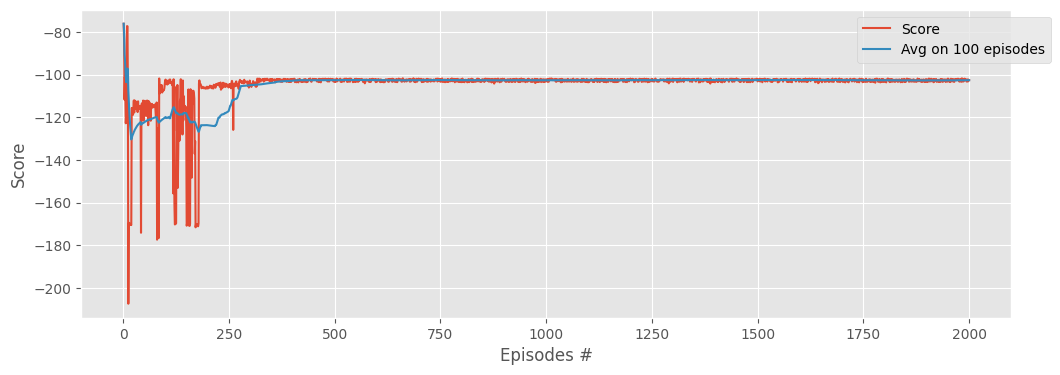

In [ ]:
%matplotlib inline

print('length of scores: ', len(scores), ', len of average scores: ', len(Avg_Scores))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores, label="Score")
plt.plot(np.arange(1, len(Avg_Scores) + 1), Avg_Scores, label="Avg on 100 episodes")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel('Score')
plt.xlabel('Episodes #')
plt.show()

In [ ]:
env.close

<bound method Wrapper.close of <TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<BipedalWalker<BipedalWalker-v3>>>>>>>